### **Intersection point of two curves**

**Dependencies**

In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
!pip install intersect
from intersect import intersection

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Importing Data**

In [ ]:
file_path = '/content/Data1.csv'
df = pd.read_csv(file_path, dtype=np.float64)
df 

50.000  10.000   0.000  0.000.1
0    49.999  10.001   0.000    0.000
1    49.999  10.001   0.000    0.000
2    49.998  10.002   0.000    0.000
3    49.995  10.004   0.000    0.000
4    49.988  10.012   0.000    0.000
..      ...     ...     ...      ...
137   0.000   2.845  57.155   76.641
138   0.000   2.734  57.266   77.641
139   0.000   2.627  57.373   78.641
140   0.000   2.524  57.476   79.641
141   0.000   2.488  57.512   80.000

[142 rows x 4 columns]

**Preprocessing**

In [ ]:
def preprocessing(df):
  susecptible = df.iloc[:,0].values
  infected = df.iloc[:,1].values
  recovered = df.iloc[:,2].values
  times = df.iloc[:,3].values
  return susecptible, infected, recovered, times

**Plotting the graph**

In [ ]:
def find_intersection(df):
  susecptible, infected, recovered, times = preprocessing(df)
  plt.plot(times, infected)
  plt.plot(times, recovered)
  plt.plot(times, susecptible)
  plt.xlabel("Time")
  plt.ylabel("Number of Patients")
  x, y = intersection(times, infected, times, recovered)
  plt.plot(x, y, 'ro')
  plt.show()
  return x, y

**Intersection Point**

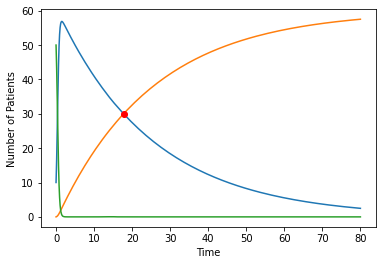

x-coordinate of intersection:  [17.76282741]
y-coordinate of intersection:  [29.999]


In [ ]:
x, y = find_intersection(df)
print("x-coordinate of intersection: ", x) 
print("y-coordinate of intersection: ", y)

### **SIR Curves**

In [ ]:
#@title SIR Model Parameters { run: "auto" }

#@markdown Total Population
N = 50 #@param {type:"slider", min:0, max:100, step:50}

#@markdown Recovered
R = 0 #@param {type:"slider", min:0, max:100, step:100}

#@markdown Infected
I = 10 #@param {type:"slider", min:0, max:100, step:10}

#@markdown k1 (Effective contact rate)
k1 = 0.07 #@param {type:"slider", min:0, max:10, step:0.001}

#@markdown k2 (Recovery Rate)
k2 = 0.04 #@param {type:"slider", min:0, max:10, step:0.001}

**Assumptions -**

(1) Population remains constant

(2) Rate of Infected directly proportional to the number of contacts.

(3) Infected people recover/die at constant rate.



**The SIR model differential equations**

In [ ]:
def calculate_rates(state, t, N, k1, k2):
    S, I, R = state
    dSdt = (-k1 * S * I)
    dIdt = (k1 * S * I) - (k2 * I)
    dRdt = k2 * I
    return dSdt, dIdt, dRdt

Effective contact rate **(k1**) = `transmission_rate * contact_rate`

Recovery rate **(k2)** = `1/ time_recover`

**k1, k2**

In [ ]:
#Finding Effective contact rate and recovery rate
# effective_contact_rate = k1
# recovery_rate = k2
# effective_contact_rate = (transmission_rate * contact_rate)
# recovery_rate = 1/time_recover
# print("Effective Contact rate: ", effective_contact_rate)
# print("Recovery Rate: ", recovery_rate)
print("R0: ", k1/k2)

R0:  1.7500000000000002


**Initial State of S, I, R**

In [ ]:
#Calculating the suscpetible population
S = N
#Days for which the SIR model is plotted.
t = range(0, 160)
print("Susecptible: ", S)
print("Infected: ", I)
print("Recovered: ", R)

Susecptible:  50
Infected:  10
Recovered:  0


**Plotting the SIR Curves**

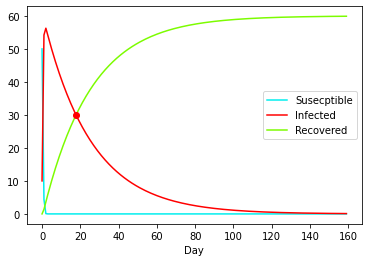

In [ ]:
from scipy.integrate import odeint
S, I, R = odeint(calculate_rates,
             [S, I, R],
             t,
             args=(N, k1, k2)).T

df = pd.DataFrame({"Susecptible": S, "Infected": I, "Recovered": R, "Day": t})
plt = df.plot(x = "Day", y = ["Susecptible", "Infected", "Recovered"], color = ["#00EEEE", "#FF0000", "#7CFC00"], kind="line")
x, y = intersection(t, I, t, R)
plt.plot(x, y, 'ro')

In [ ]:
print("x-coordinate of intersection - ", x[0])
print("y-coordinate of intersection - ", y[0])

x-coordinate of intersection -  17.765718836057726
y-coordinate of intersection -  29.99999999987595


In [ ]:
pulse_width_k2 = []
k1s = np.linspace(0.002, 0.2, 1000)
R0_k2 = []
for i in k1s:
  S = 50
  I = 10
  R = 0
  R0_k2.append(k1/i)
  S, I, R = odeint(calculate_rates,
             [S, I, R],
             t,
             args=(N, i, k2)).T

  df = pd.DataFrame({"Susecptible": S, "Infected": I, "Recovered": R, "Day": t})  
  x, y = intersection(t, I, t, R)
  pulse_width_k2.append(x[0])

In [ ]:
pulse_width_k1 = []
k2s = np.linspace(0.002, 0.2, 1000)
k2s_upgraded= []
R0_k1 = []
for i in k2s:
  S = 50
  I = 10
  R = 0
  R0_k1.append(i/k2)
  S, I, R = odeint(calculate_rates,
             [S, I, R],
             t,
             args=(N, k1, i)).T

  df = pd.DataFrame({"Susecptible": S, "Infected": I, "Recovered": R, "Day": t})  
  x, y = intersection(t, I, t, R)
  if len(x) == 1:
    pulse_width_k1.append(x[0])
    k2s_upgraded.append(i)

In [ ]:
print(pulse_width_k1)

[158.7391580564798, 151.8830008877958, 145.5965444160626, 139.81067891146563, 134.46877427437053, 129.52102543056162, 124.92504356706058, 120.64594804388206, 116.65084890020927, 112.91229830810911, 109.40767209663612, 106.11393958174816, 103.0135691866907, 100.09041112887039, 97.3295231514289, 94.71698855399858, 92.24161486411784, 89.89262300985206, 87.66163752265128, 85.53886917820574, 83.51688413714116, 81.58871156368755, 79.74780223404359, 77.98797425305753, 76.30616618225136, 74.69493230339528, 73.15030365737947, 71.66944374444243, 70.2471046718525, 68.8802085319082, 67.56689933000683, 66.30220037952337, 65.08372065700601, 63.91018925732093, 62.77897543277483, 61.6871578647816, 60.63280311375924, 59.61406855472813, 58.62919373505927, 57.67649699412316, 56.75436665171818, 55.86125475310174, 54.995673188328944, 54.15821668042215, 53.34592205824886, 52.55740137043075, 51.79136459542389, 51.04719872682952, 50.326275067304444, 49.62457839845668, 48.94096870880658, 48.27833779766076, 47.

In [ ]:
print(pulse_width_k2)

[30.063410465683212, 29.88898000526509, 29.567670823494648, 29.16603765771786, 28.72121895722532, 28.26207477243935, 27.803815402220796, 27.356681037146267, 26.925868624067235, 26.51540497965659, 26.125082251184303, 25.756784848980743, 25.40978040464344, 25.081234674762324, 24.774078291017926, 24.48530721285055, 24.212088575373453, 23.954263968507913, 23.714994197663238, 23.48852187762924, 23.273824037840818, 23.070019839329266, 22.880063221698663, 22.70175282139424, 22.532367502595303, 22.37127925571303, 22.21792877994185, 22.071813619790554, 21.93479392914563, 21.806513899129698, 21.684151077004994, 21.56733030277705, 21.455709443894875, 21.34897500342244, 21.246838537253087, 21.149033709021463, 21.055313848373718, 20.966740469828864, 20.883769079966406, 20.804146711298607, 20.7276861220148, 20.65421341637807, 20.583566795959115, 20.515595464488886, 20.45015867045866, 20.387124864945186, 20.32637095472973, 20.267781635626676, 20.211248798728036, 20.156670989518208, 20.103952912351865

In [ ]:
len(pulse_width_k1)

988

In [ ]:
len(k2s_upgraded)

988

In [ ]:
len(R0_k1)

1000

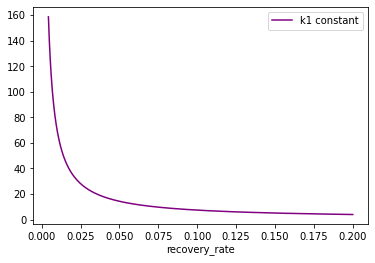

In [ ]:
df = pd.DataFrame({"k1 constant": pulse_width_k1, "recovery_rate": k2s_upgraded})
plt = df.plot(x = "recovery_rate", y = "k1 constant", color = "#800080", kind="line")

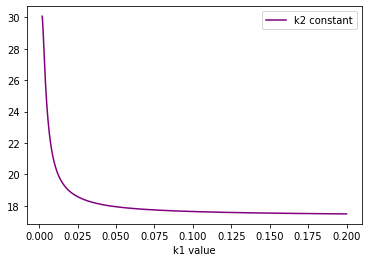

In [ ]:
df = pd.DataFrame({"k2 constant": pulse_width_k2, "k1 value": k1s})
plt = df.plot(x = "k1 value", y = "k2 constant", color = "#800080", kind="line")

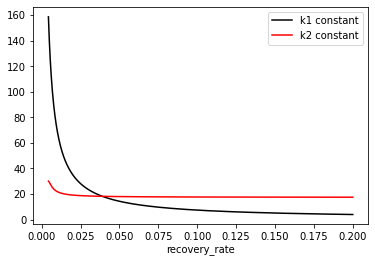

In [ ]:
df = pd.DataFrame({"k1 constant": pulse_width_k1, "recovery_rate": k2s_upgraded, "k2 constant": pulse_width_k2[0:len(pulse_width_k1)]})
plt = df.plot(x = "recovery_rate", y = ["k1 constant", "k2 constant"], color = ["#000000", "#FF0000"], kind="line")

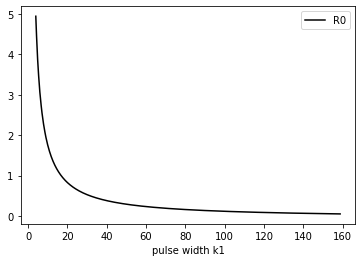

In [ ]:
df = pd.DataFrame({"pulse width k1": pulse_width_k1, "R0": R0_k1[0:len(pulse_width_k1)]})
plt = df.plot(x = "pulse width k1", y = "R0", color = "#000000", kind="line")

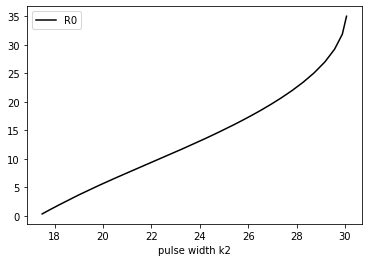

In [ ]:
df = pd.DataFrame({"pulse width k2": pulse_width_k2, "R0": R0_k2})
plt = df.plot(x = "pulse width k2", y = "R0", color = "#000000", kind="line")

# **Transfer Function**

Dependencies

In [ ]:
from scipy import signal
import matplotlib.pyplot as plot
import numpy as np
from scipy.signal import lsim

Input signal

In [ ]:
#Sampling Rate
t = np.linspace(0, 100, 1000, endpoint=True)

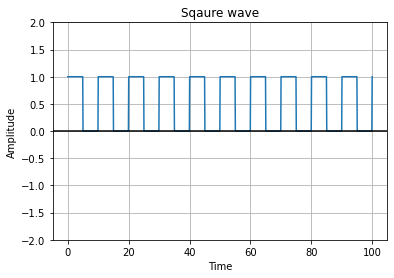

In [ ]:
# Plot the square wave signal
square_wave_1 = (signal.square(2 * np.pi * 100 * t) + 1)/2
plot.plot(t, square_wave_1)
plot.title('Sqaure wave')
plot.xlabel('Time')
plot.ylabel('Amplitude')
plot.grid(True, which='both')
plot.axhline(y=0, color='k')
plot.ylim(-2, 2)
plot.show()

Transfer Function

In [ ]:
num = [2]
den = [1, 2]
transfer_function_1 = signal.TransferFunction(num, den)
transfer_function_1

TransferFunctionContinuous(
array([2.]),
array([1., 2.]),
dt: None
)

Step Response

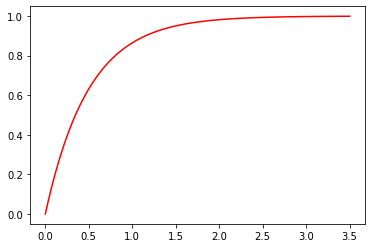

In [ ]:
 T,y = signal.step(transfer_function_1)
 plot.figure(1)
 plot.plot(T,y,'r-')

Square Wave Response

In [ ]:
t_out, y_out_1, x_out = lsim(system=transfer_function_1, T=t, U=square_wave_1)

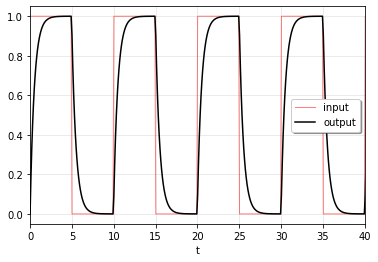

In [ ]:
plot.plot(t, square_wave_1, 'r', alpha=0.5, linewidth=1, label='input')
plot.plot(t_out, y_out_1, 'k', linewidth=1.5, label='output')
plot.legend(loc='best', shadow=True, framealpha=1)
plot.grid(alpha=0.3)
plot.xlabel('t')
plot.xlim(0,40)
plot.show()

Input Signal (2)

In [ ]:
#Sampling Rate
t = np.linspace(0, 100, 1000, endpoint=True)

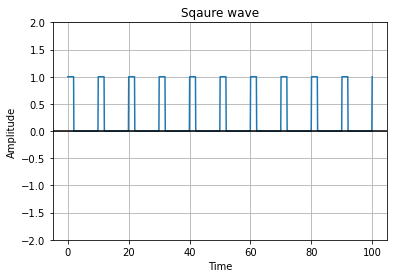

In [ ]:
# Plot the square wave signal
square_wave_2 = (signal.square(2 * np.pi * 100 * t, duty=0.2) + 1)/2
plot.plot(t, square_wave_2)
plot.title('Sqaure wave')
plot.xlabel('Time')
plot.ylabel('Amplitude')
plot.grid(True, which='both')
plot.axhline(y=0, color='k')
plot.ylim(-2, 2)
plot.show()

Transfer Function

In [ ]:
num = [2]
den = [1, 2]
transfer_function_2 = signal.TransferFunction(num, den)
transfer_function_2

TransferFunctionContinuous(
array([2.]),
array([1., 2.]),
dt: None
)

Step Response

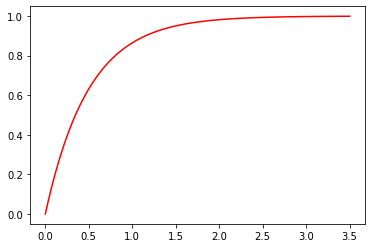

In [ ]:
 T,y = signal.step(transfer_function_2)
 plot.figure(1)
 plot.plot(T,y,'r-')

Square Wave Response

In [ ]:
t_out, y_out_2, x_out = lsim(system=transfer_function_2, T=t, U=square_wave_2)

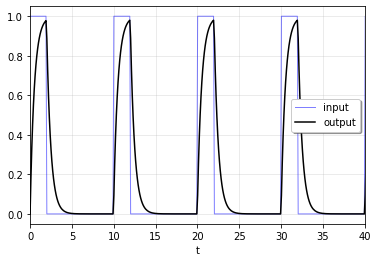

In [ ]:
plot.plot(t, square_wave_2, 'b', alpha=0.5, linewidth=1, label='input')
plot.plot(t_out, y_out_2, 'k', linewidth=1.5, label='output')
plot.legend(loc='best', shadow=True, framealpha=1)
plot.grid(alpha=0.3)
plot.xlabel('t')
plot.xlim(0,40)
plot.show()

MISO

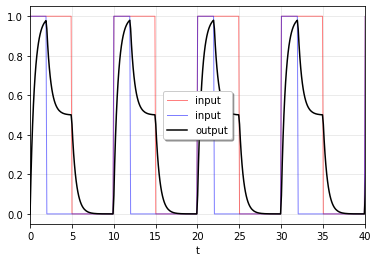

In [ ]:
plot.plot(t, square_wave_1, 'r', alpha=0.5, linewidth=1, label='input')
plot.plot(t, square_wave_2, 'b', alpha=0.5, linewidth=1, label='input')
plot.plot(t_out, (y_out_1 + y_out_2)/2, 'k', linewidth=1.5, label='output')
plot.legend(loc='best', shadow=True, framealpha=1)
plot.grid(alpha=0.3)
plot.xlabel('t')
plot.xlim(0,40)
plot.show()

# **SIR for US using JHU Dataset**

Dataset - https://github.com/CSSEGISandData/COVID-19 \\
Reference - https://www.lewuathe.com/covid-19-dynamics-with-sir-model.html

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
from scipy.integrate import odeint

In [ ]:
file_path = '/content/time_series_covid19_confirmed_global.csv'
df_confirm = pd.read_csv(file_path)
file_path = '/content/time_series_covid19_recovered_global.csv'
df_recovered = pd.read_csv(file_path)
file_path = '/content/time_series_covid19_deaths_global.csv'
df_dead = pd.read_csv(file_path)

In [ ]:
df_confirm

Province/State      Country/Region        Lat        Long  1/22/20  \
0              NaN         Afghanistan  33.939110   67.709953        0   
1              NaN             Albania  41.153300   20.168300        0   
2              NaN             Algeria  28.033900    1.659600        0   
3              NaN             Andorra  42.506300    1.521800        0   
4              NaN              Angola -11.202700   17.873900        0   
..             ...                 ...        ...         ...      ...   
271            NaN             Vietnam  14.058324  108.277199        0   
272            NaN  West Bank and Gaza  31.952200   35.233200        0   
273            NaN               Yemen  15.552727   48.516388        0   
274            NaN              Zambia -13.133897   27.849332        0   
275            NaN            Zimbabwe -19.015438   29.154857        0   

     1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  6/5/21  6/6/21  6/7/21  \
0          0        0        0        0        0  ...   77963   79224   80841   
1          0        0        0        0        0  ...  132374  132379  132384   
2          0        0        0        0        0  ...  130681  130958  131283   
3          0        0        0        0        0  ...   13758   13758   13777   
4          0        0        0        0        0  ...   35594   35772   35854   
..       ...      ...      ...      ...      ...  ...     ...     ...     ...   
271        2        2        2        2        2  ...    8580    8791    9027   
272        0        0        0        0        0  ...  309853  310026  310026   
273        0        0        0        0        0  ...    6780    6787    6812   
274        0        0        0        0        0  ...   99540  100278  100765   
275        0        0        0        0        0  ...   39168   39189   39238   

     6/8/21  6/9/21  6/10/21  6/11/21  6/12/21  6/13/21  6/14/21  
0     82326   84050    85892    87716    88740    89861    91458  
1    132397  132415   132426   132437   132449   132459   132461  
2    131647  132034   132355   132727   133070   133388   133742  
3     13781   13791    13805    13813    13813    13813    13826  
4     36004   36115    36325    36455    36600    36705    36790  
..      ...     ...      ...      ...      ...      ...      ...  
271    9222    9635     9835    10048    10337    10630    10881  
272  310544  310544   311018   311018   311018   311534   311690  
273    6823    6832     6836     6856     6857     6862     6863  
274  101996  103763   105909   107974   110332   111746   113134  
275   39321   39432    39496    39688    39852    39959    40077  

[276 rows x 514 columns]

In [ ]:
df_recovered

Province/State      Country/Region        Lat        Long  1/22/20  \
0              NaN         Afghanistan  33.939110   67.709953        0   
1              NaN             Albania  41.153300   20.168300        0   
2              NaN             Algeria  28.033900    1.659600        0   
3              NaN             Andorra  42.506300    1.521800        0   
4              NaN              Angola -11.202700   17.873900        0   
..             ...                 ...        ...         ...      ...   
256            NaN             Vietnam  14.058324  108.277199        0   
257            NaN  West Bank and Gaza  31.952200   35.233200        0   
258            NaN               Yemen  15.552727   48.516388        0   
259            NaN              Zambia -13.133897   27.849332        0   
260            NaN            Zimbabwe -19.015438   29.154857        0   

     1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  6/5/21  6/6/21  6/7/21  \
0          0        0        0        0        0  ...   58265   58622   58998   
1          0        0        0        0        0  ...  129627  129664  129702   
2          0        0        0        0        0  ...   90995   91198   91413   
3          0        0        0        0        0  ...   13527   13527   13557   
4          0        0        0        0        0  ...   28866   28880   29329   
..       ...      ...      ...      ...      ...  ...     ...     ...     ...   
256        0        0        0        0        0  ...    3310    3368    3509   
257        0        0        0        0        0  ...  301670  301881  301881   
258        0        0        0        0        0  ...    3550    3571    3588   
259        0        0        0        0        0  ...   93036   93374   93694   
260        0        0        0        0        0  ...   36698   36728   36746   

     6/8/21  6/9/21  6/10/21  6/11/21  6/12/21  6/13/21  6/14/21  
0     59569   59871    60280    60598    60939    61410    61706  
1    129736  129761   129785   129807   129826   129842   129865  
2     91651   91894    92132    92384    92620    92852    93094  
3     13557   13569    13578    13591    13591    13591    13618  
4     29368   29553    29960    30101    30207    30282    30359  
..      ...     ...      ...      ...      ...      ...      ...  
256    3547    3636     3708     3804     3827     3998     4236  
257  302357  302357   302944   302944   302944   303813   304138  
258    3638    3675     3689     3697     3727     3743     3765  
259   93992   94189    94995    95674    96646    97756    98994  
260   36756   36917    36940    36970    36992    37004    37027  

[261 rows x 514 columns]

In [ ]:
df_dead

Province/State      Country/Region        Lat        Long  1/22/20  \
0              NaN         Afghanistan  33.939110   67.709953        0   
1              NaN             Albania  41.153300   20.168300        0   
2              NaN             Algeria  28.033900    1.659600        0   
3              NaN             Andorra  42.506300    1.521800        0   
4              NaN              Angola -11.202700   17.873900        0   
..             ...                 ...        ...         ...      ...   
271            NaN             Vietnam  14.058324  108.277199        0   
272            NaN  West Bank and Gaza  31.952200   35.233200        0   
273            NaN               Yemen  15.552727   48.516388        0   
274            NaN              Zambia -13.133897   27.849332        0   
275            NaN            Zimbabwe -19.015438   29.154857        0   

     1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  6/5/21  6/6/21  6/7/21  \
0          0        0        0        0        0  ...    3104    3145    3187   
1          0        0        0        0        0  ...    2451    2451    2452   
2          0        0        0        0        0  ...    3510    3518    3527   
3          0        0        0        0        0  ...     127     127     127   
4          0        0        0        0        0  ...     794     797     800   
..       ...      ...      ...      ...      ...  ...     ...     ...     ...   
271        0        0        0        0        0  ...      53      53      53   
272        0        0        0        0        0  ...    3516    3517    3517   
273        0        0        0        0        0  ...    1325    1329    1336   
274        0        0        0        0        0  ...    1303    1308    1315   
275        0        0        0        0        0  ...    1605    1606    1611   

     6/8/21  6/9/21  6/10/21  6/11/21  6/12/21  6/13/21  6/14/21  
0      3251    3305     3356     3412     3449     3527     3612  
1      2452    2452     2452     2453     2453     2453     2453  
2      3537    3544     3552     3560     3565     3571     3579  
3       127     127      127      127      127      127      127  
4       803     811      815      819      825      831      836  
..      ...     ...      ...      ...      ...      ...      ...  
271      55      55       55       57       58       59       59  
272    3520    3520     3524     3524     3524     3533     3539  
273    1336    1337     1338     1342     1347     1349     1350  
274    1321    1324     1332     1348     1365     1389     1416  
275    1617    1622     1626     1629     1632     1632     1635  

[276 rows x 514 columns]

In [ ]:
US_confirm = df_confirm.loc[df_confirm['Country/Region'] == 'US']
US_confirm

Province/State Country/Region   Lat   Long  1/22/20  1/23/20  1/24/20  \
251            NaN             US  40.0 -100.0        1        1        2   

     1/25/20  1/26/20  1/27/20  ...    6/5/21    6/6/21    6/7/21    6/8/21  \
251        2        5        5  ...  33357205  33362600  33378096  33391107   

       6/9/21   6/10/21   6/11/21   6/12/21   6/13/21   6/14/21  
251  33409753  33424296  33449200  33457407  33461982  33474692  

[1 rows x 514 columns]

In [ ]:
confirmed = US_confirm.iloc[0].loc['1/22/20':'12/13/20']
confirmed

1/22/20            1
1/23/20            1
1/24/20            2
1/25/20            2
1/26/20            5
              ...   
12/9/20     15556569
12/10/20    15787997
12/11/20    16028086
12/12/20    16245883
12/13/20    16433854
Name: 251, Length: 327, dtype: object

In [ ]:
US_recovered = df_recovered.loc[df_recovered['Country/Region'] == 'US']
US_recovered

Province/State Country/Region   Lat   Long  1/22/20  1/23/20  1/24/20  \
236            NaN             US  40.0 -100.0        0        0        0   

     1/25/20  1/26/20  1/27/20  ...  6/5/21  6/6/21  6/7/21  6/8/21  6/9/21  \
236        0        0        0  ...       0       0       0       0       0   

     6/10/21  6/11/21  6/12/21  6/13/21  6/14/21  
236        0        0        0        0        0  

[1 rows x 514 columns]

In [ ]:
recovered = US_recovered.iloc[0].loc['1/22/20':'12/13/20']
recovered

1/22/20           0
1/23/20           0
1/24/20           0
1/25/20           0
1/26/20           0
             ...   
12/9/20     5889896
12/10/20    5985047
12/11/20    6135314
12/12/20    6246605
12/13/20    6298082
Name: 236, Length: 327, dtype: object

In [ ]:
US_dead = df_dead.loc[df_dead['Country/Region'] == 'US']
US_dead

Province/State Country/Region   Lat   Long  1/22/20  1/23/20  1/24/20  \
251            NaN             US  40.0 -100.0        0        0        0   

     1/25/20  1/26/20  1/27/20  ...  6/5/21  6/6/21  6/7/21  6/8/21  6/9/21  \
251        0        0        0  ...  597066  597232  597542  597877  598314   

     6/10/21  6/11/21  6/12/21  6/13/21  6/14/21  
251   598739   599385   599664   599775   599945  

[1 rows x 514 columns]

In [ ]:
dead = US_dead.iloc[0].loc['1/22/20':'12/13/20']
dead

1/22/20          0
1/23/20          0
1/24/20          0
1/25/20          0
1/26/20          0
             ...  
12/9/20     293132
12/10/20    296128
12/11/20    299538
12/12/20    302008
12/13/20    303642
Name: 251, Length: 327, dtype: object

In [ ]:
print(len(confirmed), len(recovered), len(dead))

327 327 327


In [ ]:
t = np.arange(0, len(confirmed))
len(t)

327

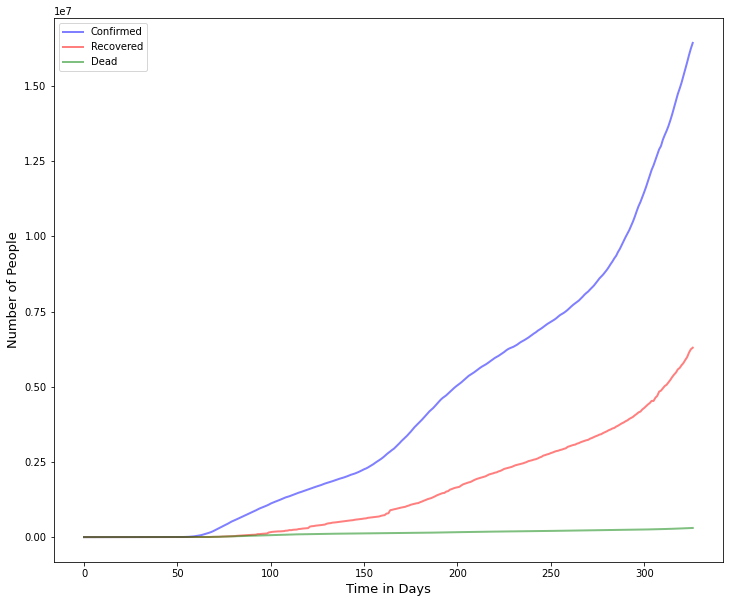

In [ ]:
fig = plt.figure(facecolor='w', figsize=(12,10))
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(t, confirmed, 'b', alpha=0.5, lw=2, label='Confirmed')
ax.plot(t, recovered, 'r', alpha=0.5, lw=2, label='Recovered')
ax.plot(t, dead, 'g', alpha=0.5, lw=2, label='Dead')
ax.set_xlabel('Time in Days', size=13)
ax.set_ylabel('Number of People', size=13)
legend = ax.legend()
plt.show()

In [ ]:
activecases = confirmed - recovered - dead
activecases

1/22/20           1
1/23/20           1
1/24/20           2
1/25/20           2
1/26/20           5
             ...   
12/9/20     9373541
12/10/20    9506822
12/11/20    9593234
12/12/20    9697270
12/13/20    9832130
Length: 327, dtype: object

In [ ]:
datadf = {"Active Cases": activecases, "Infected": confirmed, "Recovered": recovered}
days = [x for x in range(0,len(activecases))]
df = pd.DataFrame(data=datadf)
df["Days"] = days
df

Active Cases  Infected Recovered  Days
1/22/20             1         1         0     0
1/23/20             1         1         0     1
1/24/20             2         2         0     2
1/25/20             2         2         0     3
1/26/20             5         5         0     4
...               ...       ...       ...   ...
12/9/20       9373541  15556569   5889896   322
12/10/20      9506822  15787997   5985047   323
12/11/20      9593234  16028086   6135314   324
12/12/20      9697270  16245883   6246605   325
12/13/20      9832130  16433854   6298082   326

[327 rows x 4 columns]

In [ ]:
index = list(df.index.values)
index.index('3/19/20')

57

We will divide the dataset in two parts - Pre-Lockdwon Period and Lockdown Period. \\
1) Pre Lockdown Period - 22/1/20 - 19/3/20 \\
2) Lockdown Period - 20/3/20 - 8/5/20

**Pre Lockdown Period**

In [ ]:
data = df["Active Cases"][:index.index('3/19/20')]
infected = df["Infected"][:index.index('3/19/20')]
recovered = df["Recovered"][:index.index('3/19/20')]

In [ ]:
def loss(point, data, recovered, s_0, i_0, r_0):
    size = len(data)
    beta, gamma = point
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I/s_0, beta*S*I/s_0-gamma*I, gamma*I]
    solution = solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1), vectorized=True)
    l1 = np.sqrt(np.mean((solution.y[1] - data)**2))
    l2 = np.sqrt(np.mean((solution.y[2] - recovered)**2))
    alpha = 0.1
    return alpha * l1 + (1 - alpha) * l2

In [ ]:
def predict(beta, gamma, data, recovered, s_0, i_0, r_0):
    new_index = list(data.index.values)
    size = len(new_index)
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I/s_0, beta*S*I/s_0-gamma*I, gamma*I]
    extended_actual = np.concatenate((data.values, [None] * (size - len(data.values))))
    extended_recovered = np.concatenate((recovered.values, [None] * (size - len(recovered.values))))
    return new_index, extended_actual, extended_recovered, solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1))

In [ ]:
def train(recovered, infected, data):
    recovered = recovered
    infected = infected
    data = data

    optimal = minimize(loss, [0.001, 0.001], args=(data, recovered, s_0, i_0, r_0), method='L-BFGS-B', bounds=[(0.00000001, 2), (0.00000001, 0.4)])
    print(optimal)
    beta, gamma = optimal.x
    new_index, extended_actual, extended_recovered, prediction = predict(beta, gamma, data, recovered, s_0, i_0, r_0)
    df = pd.DataFrame({'Actual Infected': extended_actual, 'Actual Recovered': extended_recovered, 'Susceptible': prediction.y[0], 'Predicted Infected': prediction.y[1], 'Predicted Recovered': prediction.y[2]}, index=new_index)
    fig, ax = plt.subplots(figsize=(25, 10))
    ax.set_title('Curves using JHU Dataset for US in Pre-Lockdown Period')
    df.plot(ax=ax)
    print(f"country=US, beta={beta:.8f}, gamma={gamma:.8f}, r_0:{(beta/gamma):.8f}")

In [ ]:
s_0 = 30000
i_0 = 1
r_0 = 0

      fun: 70.31089209590994
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.00071907, -0.04307026])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 108
      nit: 10
   status: 0
  success: True
        x: array([0.16024187, 0.00106421])
country=US, beta=0.16024187, gamma=0.00106421, r_0:150.57346179


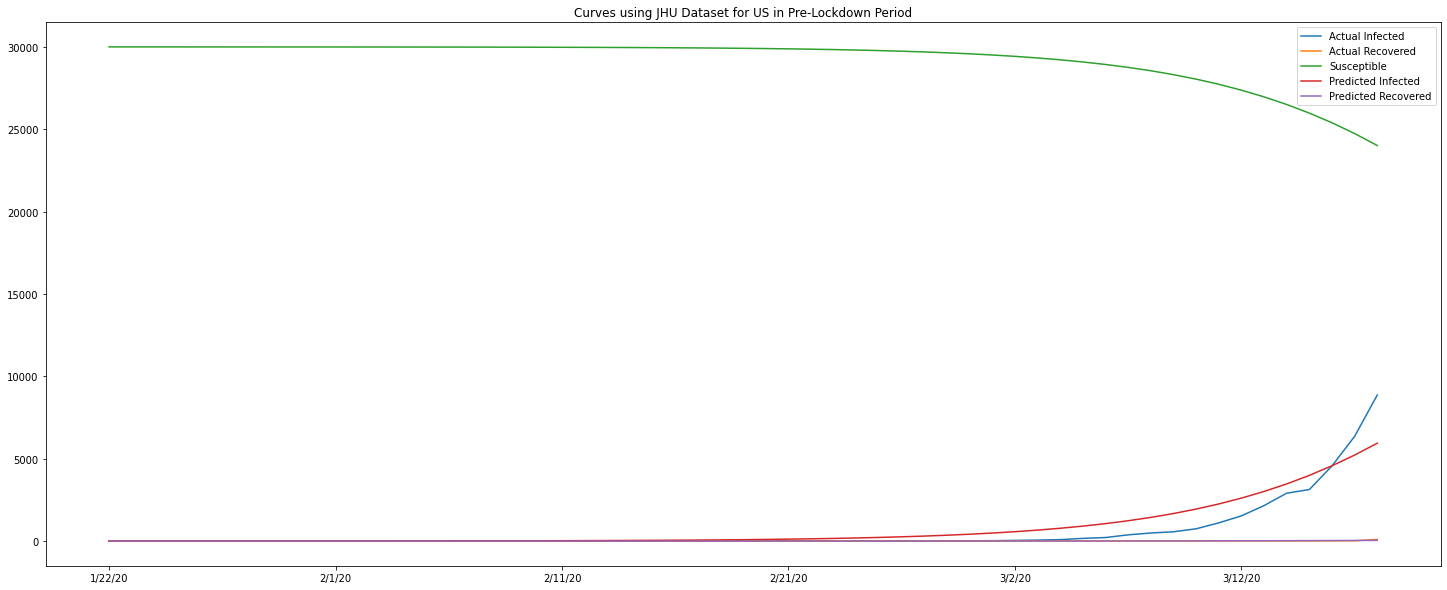

In [ ]:
train(recovered, infected, data)

**Lockdown Period**

In [ ]:
data = df["Active Cases"][:index.index('3/19/20')]
infected = df["Infected"][:index.index('3/19/20')]
recovered = df["Recovered"][:index.index('3/19/20')]

In [ ]:
def loss(point, data, recovered, s_0, i_0, r_0):
    size = len(data)
    beta, gamma = point
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I/s_0, beta*S*I/s_0-gamma*I, gamma*I]
    solution = solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1), vectorized=True)
    l1 = np.sqrt(np.mean((solution.y[1] - data)**2))
    l2 = np.sqrt(np.mean((solution.y[2] - recovered)**2))
    alpha = 0.1
    return alpha * l1 + (1 - alpha) * l2

In [ ]:
pres_fut = np.array(list(data.index.values)+ list((np.array(pd.date_range('3/19/20', periods=50)))))

In [ ]:
def predict(beta, gamma, data, recovered, s_0, i_0, r_0):
    new_index = pres_fut
    size = len(new_index)
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I/s_0, beta*S*I/s_0-gamma*I, gamma*I]
    extended_actual = np.concatenate((data.values, [None] * (size - len(data.values))))
    extended_recovered = np.concatenate((recovered.values, [None] * (size - len(recovered.values))))
    return new_index, extended_actual, extended_recovered, solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1))

In [ ]:
def train(recovered, infected, data):
    recovered = recovered
    infected = infected
    data = data

    optimal = minimize(loss, [0.001, 0.001], args=(data, recovered, s_0, i_0, r_0), method='L-BFGS-B', bounds=[(0.00000001, 2), (0.00000001, 0.4)])
    print(optimal)
    beta, gamma = optimal.x
    new_index, extended_actual, extended_recovered, prediction = predict(beta, gamma, data, recovered, s_0, i_0, r_0)
    df = pd.DataFrame({'Actual Infected': extended_actual, 'Actual Recovered': extended_recovered, 'Susceptible': prediction.y[0], 'Predicted Infected': prediction.y[1], 'Predicted Recovered': prediction.y[2]}, index=new_index)
    fig, ax = plt.subplots(figsize=(25, 10))
    ax.set_title('Curves using JHU Dataset for US in Lockdown Period and Prediction for 50 days')
    df.plot(ax=ax)
    print(f"country=US, beta={beta:.8f}, gamma={gamma:.8f}, r_0:{(beta/gamma):.8f}")
    return prediction.y[0], prediction.y[1], prediction.y[2]

In [ ]:
print(data[0], infected[0], recovered[0])

1 1 0


In [ ]:
s_0 = 1000000
i_0 = 1
r_0 = 1

      fun: 62.763519371694564
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.00042775,  0.0026688 ])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 111
      nit: 10
   status: 0
  success: True
        x: array([0.15795201, 0.0010703 ])
country=US, beta=0.15795201, gamma=0.00107030, r_0:147.57714420


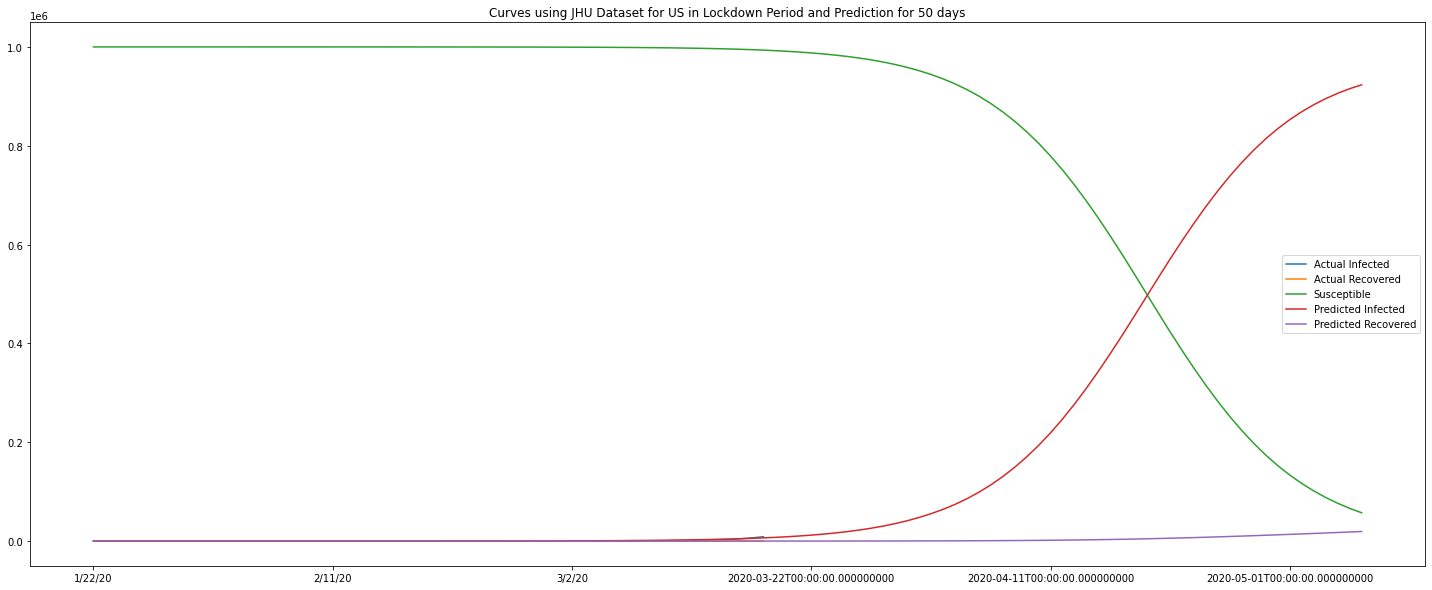

In [ ]:
susceptible, predicted_infected, predicted_recovered = train(recovered, infected, data)

In [ ]:
actual_infected = df["Active Cases"][:len(susceptible)]
actual_recovered = df["Recovered"][:len(susceptible)]

In [ ]:
plot_data = {"Predicted Infected": predicted_infected, "Predicted Recovered": predicted_recovered, "Susceptible": susceptible, "Actual Infected": actual_infected, "Actual Recovered": actual_recovered}
df_plot = pd.DataFrame(data=plot_data)
df_plot

Predicted Infected  Predicted Recovered     Susceptible  \
1/22/20            1.000000             1.000000  1000000.000000   
1/23/20            1.169857             1.001159   999999.828984   
1/24/20            1.368576             1.002515   999999.628910   
1/25/20            1.601157             1.004101   999999.394741   
1/26/20            1.873068             1.005956   999999.120976   
...                     ...                  ...             ...   
5/3/20        883057.285983         15486.716250   101457.997767   
5/4/20        895406.651979         16438.554035    88156.793985   
5/5/20        906141.064699         17402.746855    76458.188445   
5/6/20        915414.114802         18377.694054    66210.191144   
5/7/20        923377.395614         19361.900400    57262.703987   

        Actual Infected Actual Recovered  
1/22/20               1                0  
1/23/20               1                0  
1/24/20               2                0  
1/25/20               2                0  
1/26/20               5                0  
...                 ...              ...  
5/3/20           916395           180152  
5/4/20           932045           187180  
5/5/20           951747           189791  
5/6/20           973888           189910  
5/7/20           994266           195036  

[107 rows x 5 columns]

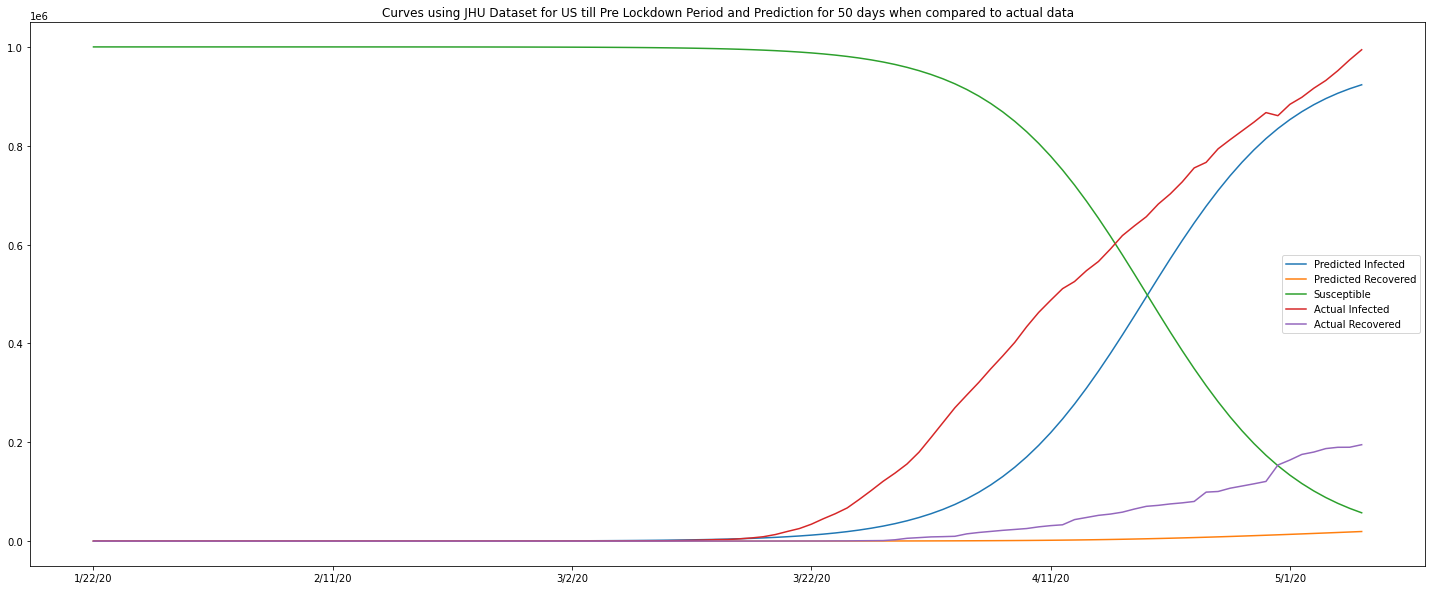

In [ ]:
fig, ax = plt.subplots(figsize=(25, 10))
ax.set_title('Curves using JHU Dataset for US till Pre Lockdown Period and Prediction for 50 days when compared to actual data')
df_plot.plot(ax=ax)

In [ ]:
print(index.index('3/19/20'))

57


In [ ]:
pres_fut = list(data.index.values) + list(np.array(index[57:120]))

      fun: 62.763519371694564
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.00042775,  0.0026688 ])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 111
      nit: 10
   status: 0
  success: True
        x: array([0.15795201, 0.0010703 ])
country=US, beta=0.15795201, gamma=0.00107030, r_0:147.57714420


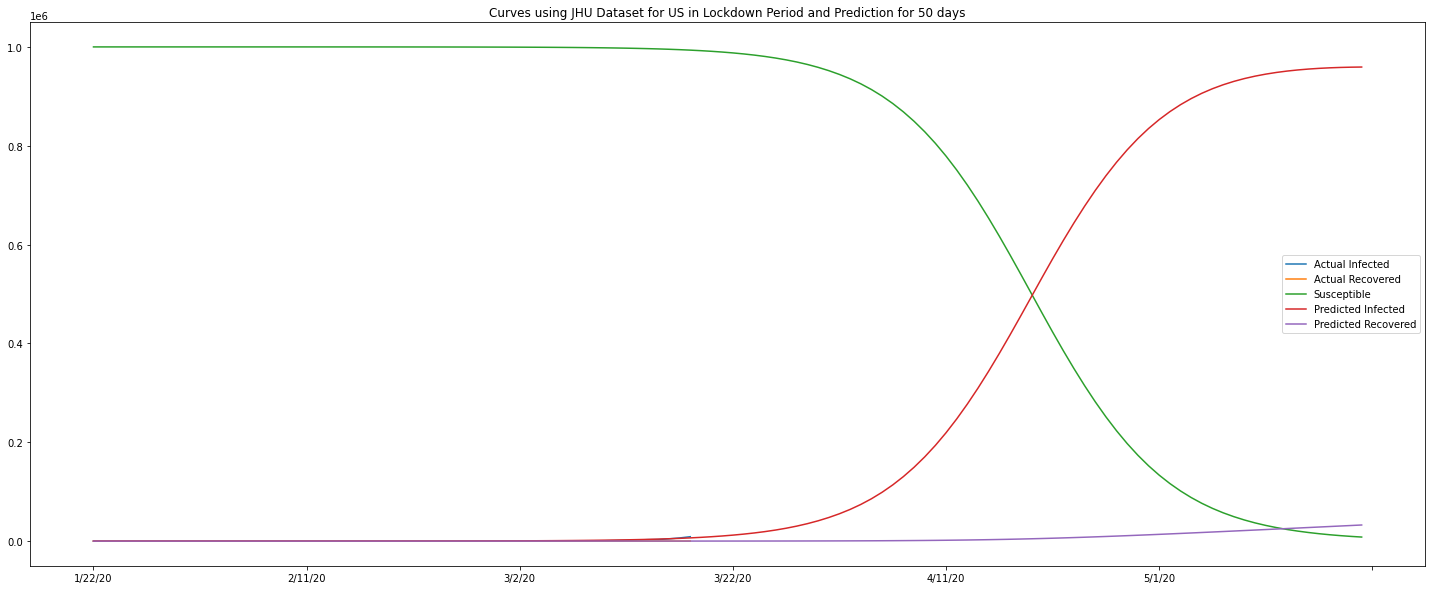

In [ ]:
susceptible, predicted_infected, predicted_recovered = train(recovered, infected, data)

In [ ]:
actual_infected = df["Active Cases"][:len(susceptible)]
actual_recovered = df["Recovered"][:len(susceptible)]

In [ ]:
plot_data = {"Predicted Infected": predicted_infected, "Predicted Recovered": predicted_recovered, "Susceptible": susceptible, "Actual Infected": actual_infected, "Actual Recovered": actual_recovered}
df_plot = pd.DataFrame(data=plot_data)
df_plot

Predicted Infected  Predicted Recovered     Susceptible  \
1/22/20            1.000000             1.000000  1000000.000000   
1/23/20            1.169857             1.001159   999999.828984   
1/24/20            1.368576             1.002515   999999.628910   
1/25/20            1.601157             1.004101   999999.394741   
1/26/20            1.873068             1.005956   999999.120976   
...                     ...                  ...             ...   
5/16/20       956600.219791         28459.834971    14941.945238   
5/17/20       957676.705511         29484.259653    12841.034836   
5/18/20       958452.668923         30509.728437    11039.602639   
5/19/20       958970.767517         31535.930048     9495.302436   
5/20/20       959271.351593         32562.568743     8168.079664   

        Actual Infected Actual Recovered  
1/22/20               1                0  
1/23/20               1                0  
1/24/20               2                0  
1/25/20               2                0  
1/26/20               5                0  
...                 ...              ...  
5/16/20         1116856           268376  
5/17/20         1130530           272265  
5/18/20         1140783           283178  
5/19/20         1154088           289392  
5/20/20         1170394           294312  

[120 rows x 5 columns]

In [ ]:
days = list(range(index.index('1/22/20'), index.index('5/20/20')+1))
len(days)

120

In [ ]:
len(df_plot['Predicted Recovered'])

120

In [ ]:
# x, y = intersection(days, df_plot['Predicted Infected'], days, df_plot['Predicted Recovered'])

In [ ]:
# x

In [ ]:
# start = index.index('4/1/20')
# pw_1 = abs(x[1] - start)
# pw_1

**Taking data till 7/5/2020 for plotting SIR curves**

In [ ]:
data = df["Active Cases"][:index.index('5/7/20')]
infected = df["Infected"][:index.index('5/7/20')]
recovered = df["Recovered"][:index.index('5/7/20')]

In [ ]:
def loss(point, data, recovered, s_0, i_0, r_0):
    size = len(data)
    beta, gamma = point
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I/s_0, beta*S*I/s_0-gamma*I, gamma*I]
    solution = solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1), vectorized=True)
    l1 = np.sqrt(np.mean((solution.y[1] - data)**2))
    l2 = np.sqrt(np.mean((solution.y[2] - recovered)**2))
    alpha = 0.1
    return alpha * l1 + (1 - alpha) * l2

In [ ]:
def predict(beta, gamma, data, recovered, s_0, i_0, r_0):
    new_index = list(data.index.values)
    size = len(new_index)
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I/s_0, beta*S*I/s_0-gamma*I, gamma*I]
    extended_actual = np.concatenate((data.values, [None] * (size - len(data.values))))
    extended_recovered = np.concatenate((recovered.values, [None] * (size - len(recovered.values))))
    return new_index, extended_actual, extended_recovered, solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1))

In [ ]:
def train(recovered, infected, data):
    recovered = recovered
    infected = infected
    data = data

    optimal = minimize(loss, [0.001, 0.001], args=(data, recovered, s_0, i_0, r_0), method='L-BFGS-B', bounds=[(0.00000001, 2), (0.00000001, 0.4)])
    print(optimal)
    beta, gamma = optimal.x
    new_index, extended_actual, extended_recovered, prediction = predict(beta, gamma, data, recovered, s_0, i_0, r_0)
    df = pd.DataFrame({'Actual Infected': extended_actual, 'Actual Recovered': extended_recovered, 'Susceptible': prediction.y[0], 'Predicted Infected': prediction.y[1], 'Predicted Recovered': prediction.y[2]}, index=new_index)
    fig, ax = plt.subplots(figsize=(25, 10))
    ax.set_title('Curves using JHU Dataset for US till Lockdown Period')
    df.plot(ax=ax)
    print(f"country=US, beta={beta:.8f}, gamma={gamma:.8f}, r_0:{(beta/gamma):.8f}")

In [ ]:
print(data[0], infected[0], recovered[0])

1 1 0


In [ ]:
s_0 = 2000000
i_0 = 1
r_0 = 1

      fun: 24722.457437494937
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.68175723, -1.87646947])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 102
      nit: 11
   status: 0
  success: True
        x: array([0.16384899, 0.01157369])
country=US, beta=0.16384899, gamma=0.01157369, r_0:14.15702212


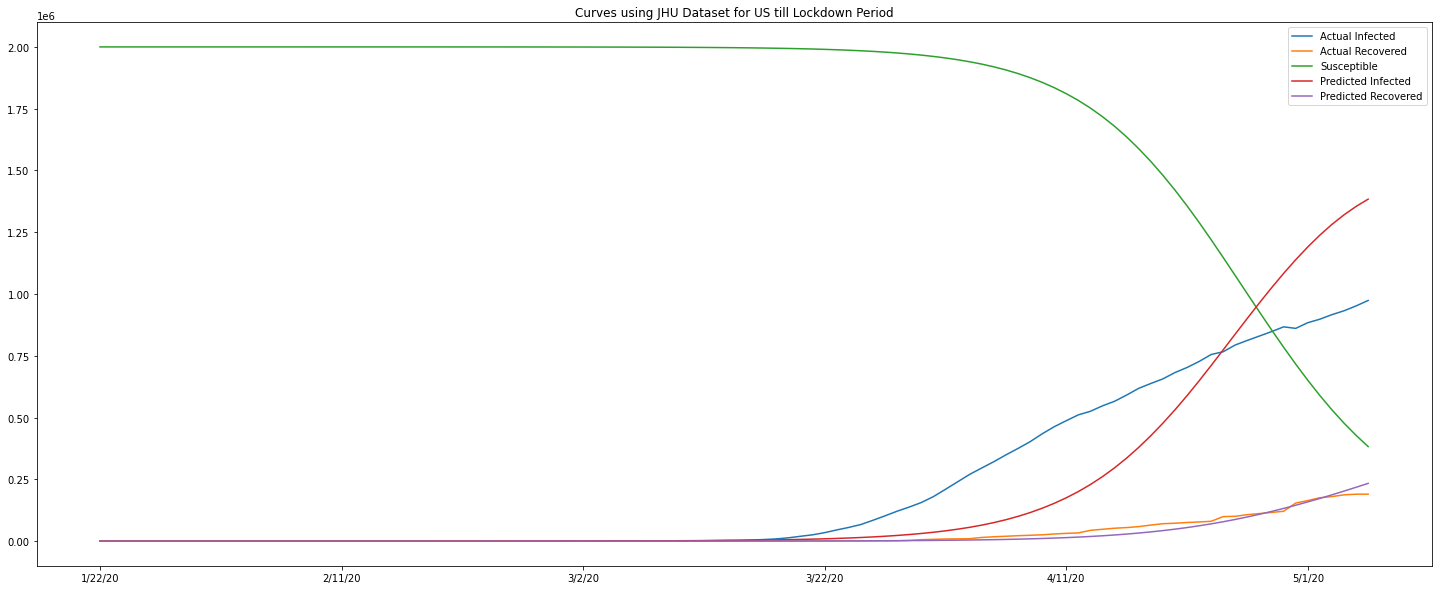

In [ ]:
train(recovered, infected, data)

**Predciting the curve for next 30 days**

In [ ]:
data = df["Active Cases"][:index.index('5/7/20')]
infected = df["Infected"][:index.index('5/7/20')]
recovered = df["Recovered"][:index.index('5/7/20')]

In [ ]:
def loss(point, data, recovered, s_0, i_0, r_0):
    size = len(data)
    beta, gamma = point
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I/s_0, beta*S*I/s_0-gamma*I, gamma*I]
    solution = solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1), vectorized=True)
    l1 = np.sqrt(np.mean((solution.y[1] - data)**2))
    l2 = np.sqrt(np.mean((solution.y[2] - recovered)**2))
    alpha = 0.1
    return alpha * l1 + (1 - alpha) * l2

In [ ]:
print(index.index('5/7/20'))

106


In [ ]:
pres_fut = list(data.index.values) + list(np.array(index[106:136]))

In [ ]:
def predict(beta, gamma, data, recovered, s_0, i_0, r_0):
    new_index = pres_fut
    size = len(new_index)
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I/s_0, beta*S*I/s_0-gamma*I, gamma*I]
    extended_actual = np.concatenate((data.values, [None] * (size - len(data.values))))
    extended_recovered = np.concatenate((recovered.values, [None] * (size - len(recovered.values))))
    return new_index, extended_actual, extended_recovered, solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1))

In [ ]:
def train(recovered, infected, data):
    recovered = recovered
    infected = infected
    data = data

    optimal = minimize(loss, [0.001, 0.001], args=(data, recovered, s_0, i_0, r_0), method='L-BFGS-B', bounds=[(0.00000001, 2), (0.00000001, 0.4)])
    print(optimal)
    beta, gamma = optimal.x
    new_index, extended_actual, extended_recovered, prediction = predict(beta, gamma, data, recovered, s_0, i_0, r_0)
    df = pd.DataFrame({'Actual Infected': extended_actual, 'Actual Recovered': extended_recovered, 'Susceptible': prediction.y[0], 'Predicted Infected': prediction.y[1], 'Predicted Recovered': prediction.y[2]}, index=new_index)
    fig, ax = plt.subplots(figsize=(25, 10))
    ax.set_title('Curves using JHU Dataset for US till Lockdown Period and Prediction for 50 days')
    df.plot(ax=ax)
    print(f"country=US, beta={beta:.8f}, gamma={gamma:.8f}, r_0:{(beta/gamma):.8f}")
    return prediction.y[0], prediction.y[1], prediction.y[2]

In [ ]:
print(data[0], infected[0], recovered[0])

1 1 0


In [ ]:
s_0 = 10000000
i_0 = 1
r_0 = 1

      fun: 37857.25105254135
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.65119821,  0.39726729])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 99
      nit: 9
   status: 0
  success: True
        x: array([0.15945828, 0.02186725])
country=US, beta=0.15945828, gamma=0.02186725, r_0:7.29210567


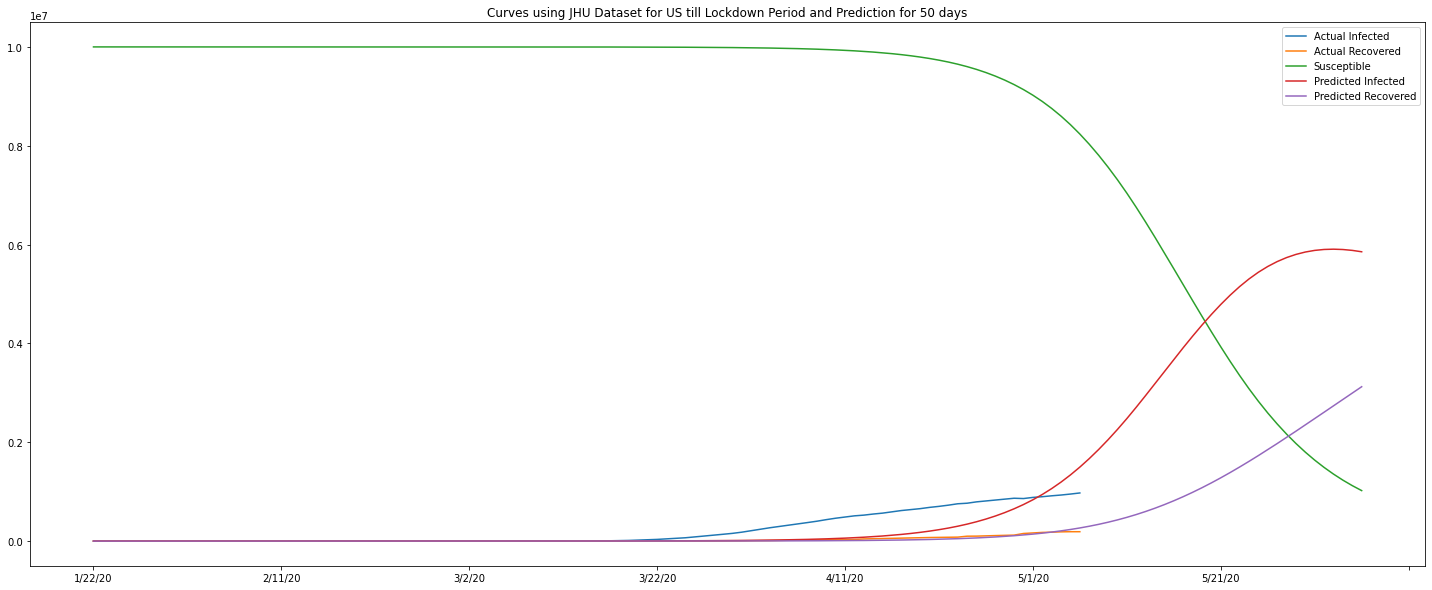

In [ ]:
susceptible, predicted_infected, predicted_recovered = train(recovered, infected, data)

In [ ]:
actual_infected = df["Active Cases"][:len(susceptible)]
actual_recovered = df["Recovered"][:len(susceptible)]

In [ ]:
plot_data = {"Predicted Infected": predicted_infected, "Predicted Recovered": predicted_recovered, "Susceptible": susceptible, "Actual Infected": actual_infected, "Actual Recovered": actual_recovered}
df_plot = pd.DataFrame(data=plot_data)
df_plot

Predicted Infected  Predicted Recovered   Susceptible  \
1/22/20        1.000000e+00         1.000000e+00  1.000000e+07   
1/23/20        1.147506e+00         1.023443e+00  1.000000e+07   
1/24/20        1.316775e+00         1.050345e+00  1.000000e+07   
1/25/20        1.511107e+00         1.081230e+00  9.999999e+06   
1/26/20        1.734008e+00         1.116655e+00  9.999999e+06   
...                     ...                  ...           ...   
6/1/20         5.901273e+06         2.607936e+06  1.490792e+06   
6/2/20         5.906911e+06         2.737115e+06  1.355976e+06   
6/3/20         5.900287e+06         2.866310e+06  1.233405e+06   
6/4/20         5.882467e+06         2.995248e+06  1.122287e+06   
6/5/20         5.854570e+06         3.123674e+06  1.021758e+06   

        Actual Infected Actual Recovered  
1/22/20               1                0  
1/23/20               1                0  
1/24/20               2                0  
1/25/20               2                0  
1/26/20               5                0  
...                 ...              ...  
6/1/20          1249334           458231  
6/2/20          1264219           463868  
6/3/20          1267678           479258  
6/4/20          1282586           485002  
6/5/20          1300396           491706  

[136 rows x 5 columns]

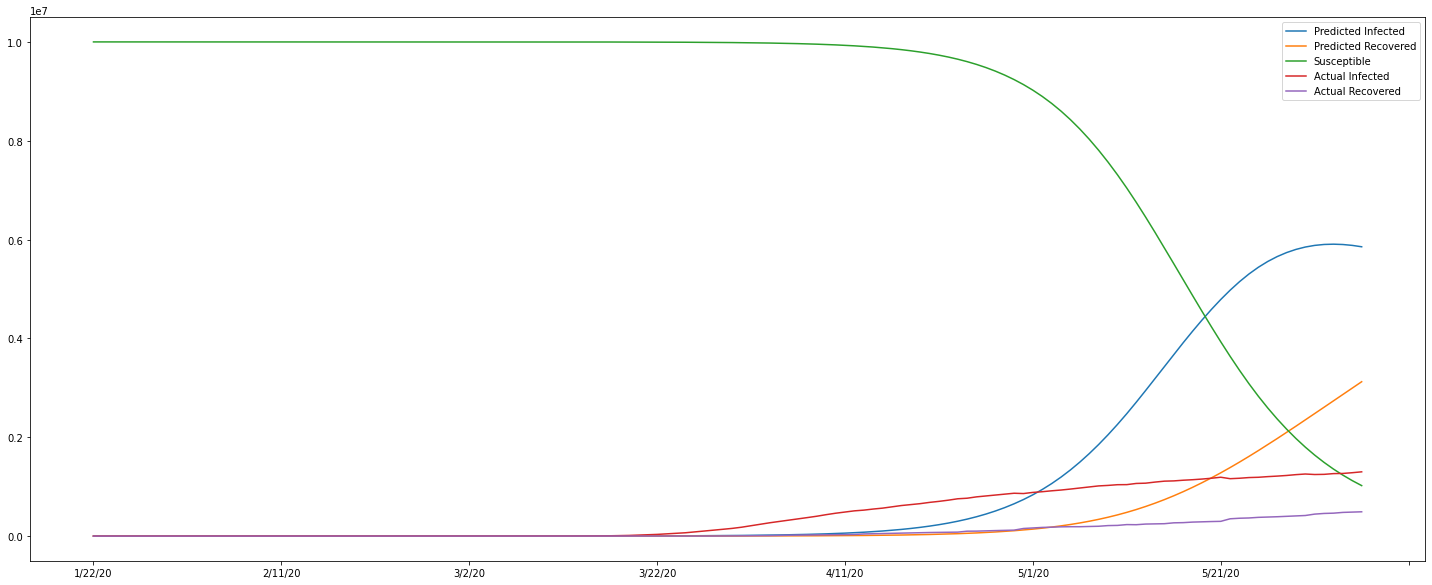

In [ ]:
fig, ax = plt.subplots(figsize=(25, 10))
df_plot.plot(ax=ax)

In [ ]:
!pip install plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


fig=go.Figure()
fig.layout.plot_bgcolor = '#FFFFFF'
fig.layout.paper_bgcolor = '#FFFFFF'
fig.add_trace(go.Scatter(x=pres_fut, y=susceptible,
                    mode='lines',name="Active Cases", line=dict(color='blue', dash='dashdot', shape='linear')))

fig.add_trace(go.Scatter(x=pres_fut, y=actual_infected,
                    mode='lines+markers',name="Infected Cases", line=dict(color='red', dash='dash', shape='linear'), marker = dict(symbol = "cross-dot")))

fig.add_trace(go.Scatter(x=pres_fut, y=predicted_infected,
                    mode='lines',name="Predicted Infected",
                    line=dict(color='red', dash='dash', shape='linear')))

fig.add_trace(go.Scatter(x=pres_fut, y=predicted_recovered,
                    mode='lines',name="Predicted Recovered",
                    line=dict(color='green', dash='dot', shape='linear')))
fig.add_trace(go.Scatter(x=pres_fut, y=actual_recovered,
                    mode='lines+markers',name="Recovered Cases", line=dict(color='green', dash='dot', shape='linear')))

fig.update_layout(xaxis_title="Date",yaxis_title="Covid 19 Cases",
                 legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Transfer Function**

Input Signal

In [ ]:
#Sampling Rate
t = np.linspace(0, 300, 300, endpoint=True)

In [ ]:
# pw_1

In [ ]:
square_wave_1 = []
for i in range(index.index('1/22/20'), index.index('3/22/20')):
  square_wave_1.append(0)
while len(square_wave_1) < 300:
  for i in range(0, 50):
    if len(square_wave_1) >= 300:
      break
    else:
      square_wave_1.append(1)
  for i in range(0, 50):
    if len(square_wave_1) >= 300:
      break
    else:
      square_wave_1.append(0)

In [ ]:
len(square_wave_1)

300

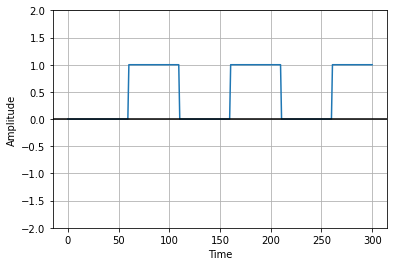

In [ ]:
# Plot the square wave signal 
plot.plot(t, square_wave_1)
plot.xlabel('Time')
plot.ylabel('Amplitude')
plot.grid(True, which='both')
plot.axhline(y=0, color='k')
plot.ylim(-2, 2)
plot.show()

Transfer Function 

In [ ]:
k1 = 0.15795201
k2 = 0.00107030
R = k1/k2
M = (k1 * math.log(R))/2
print(k1, k2, R, M)

0.15795201 0.0010703 147.5773241147342 0.3944339898239827


In [ ]:
num = [M]
den = [1, M]
transfer_function_1 = signal.TransferFunction(num, den)
transfer_function_1

TransferFunctionContinuous(
array([0.39443399]),
array([1.        , 0.39443399]),
dt: None
)

Sqaure Wave Response

In [ ]:
t_out, y_out_1, x_out = lsim(system=transfer_function_1, T=t, U=square_wave_1)

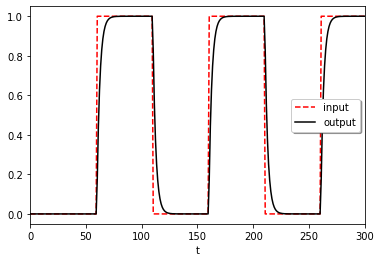

In [ ]:
plot.plot(t, square_wave_1, 'r--', linewidth=1.5, label='input')
plot.plot(t_out, y_out_1, 'k', linewidth=1.5, label='output')
plot.legend(loc='best', shadow=True, framealpha=1)
# plot.grid(alpha=0.3)
plot.xlabel('t')
plot.xlim(0,300)
plot.show()

# **SIR for Italy using JHU Dataset**

Dataset - https://github.com/CSSEGISandData/COVID-19 \\
Reference - https://www.lewuathe.com/covid-19-dynamics-with-sir-model.html

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
from scipy.integrate import odeint

In [ ]:
file_path = '/content/time_series_covid19_confirmed_global.csv'
df_confirm = pd.read_csv(file_path)
file_path = '/content/time_series_covid19_recovered_global.csv'
df_recovered = pd.read_csv(file_path)
file_path = '/content/time_series_covid19_deaths_global.csv'
df_dead = pd.read_csv(file_path)

In [ ]:
df_confirm

Province/State      Country/Region        Lat        Long  1/22/20  \
0              NaN         Afghanistan  33.939110   67.709953        0   
1              NaN             Albania  41.153300   20.168300        0   
2              NaN             Algeria  28.033900    1.659600        0   
3              NaN             Andorra  42.506300    1.521800        0   
4              NaN              Angola -11.202700   17.873900        0   
..             ...                 ...        ...         ...      ...   
271            NaN             Vietnam  14.058324  108.277199        0   
272            NaN  West Bank and Gaza  31.952200   35.233200        0   
273            NaN               Yemen  15.552727   48.516388        0   
274            NaN              Zambia -13.133897   27.849332        0   
275            NaN            Zimbabwe -19.015438   29.154857        0   

     1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  6/5/21  6/6/21  6/7/21  \
0          0        0        0        0        0  ...   77963   79224   80841   
1          0        0        0        0        0  ...  132374  132379  132384   
2          0        0        0        0        0  ...  130681  130958  131283   
3          0        0        0        0        0  ...   13758   13758   13777   
4          0        0        0        0        0  ...   35594   35772   35854   
..       ...      ...      ...      ...      ...  ...     ...     ...     ...   
271        2        2        2        2        2  ...    8580    8791    9027   
272        0        0        0        0        0  ...  309853  310026  310026   
273        0        0        0        0        0  ...    6780    6787    6812   
274        0        0        0        0        0  ...   99540  100278  100765   
275        0        0        0        0        0  ...   39168   39189   39238   

     6/8/21  6/9/21  6/10/21  6/11/21  6/12/21  6/13/21  6/14/21  
0     82326   84050    85892    87716    88740    89861    91458  
1    132397  132415   132426   132437   132449   132459   132461  
2    131647  132034   132355   132727   133070   133388   133742  
3     13781   13791    13805    13813    13813    13813    13826  
4     36004   36115    36325    36455    36600    36705    36790  
..      ...     ...      ...      ...      ...      ...      ...  
271    9222    9635     9835    10048    10337    10630    10881  
272  310544  310544   311018   311018   311018   311534   311690  
273    6823    6832     6836     6856     6857     6862     6863  
274  101996  103763   105909   107974   110332   111746   113134  
275   39321   39432    39496    39688    39852    39959    40077  

[276 rows x 514 columns]

In [ ]:
df_recovered

Province/State      Country/Region        Lat        Long  1/22/20  \
0              NaN         Afghanistan  33.939110   67.709953        0   
1              NaN             Albania  41.153300   20.168300        0   
2              NaN             Algeria  28.033900    1.659600        0   
3              NaN             Andorra  42.506300    1.521800        0   
4              NaN              Angola -11.202700   17.873900        0   
..             ...                 ...        ...         ...      ...   
256            NaN             Vietnam  14.058324  108.277199        0   
257            NaN  West Bank and Gaza  31.952200   35.233200        0   
258            NaN               Yemen  15.552727   48.516388        0   
259            NaN              Zambia -13.133897   27.849332        0   
260            NaN            Zimbabwe -19.015438   29.154857        0   

     1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  6/5/21  6/6/21  6/7/21  \
0          0        0        0        0        0  ...   58265   58622   58998   
1          0        0        0        0        0  ...  129627  129664  129702   
2          0        0        0        0        0  ...   90995   91198   91413   
3          0        0        0        0        0  ...   13527   13527   13557   
4          0        0        0        0        0  ...   28866   28880   29329   
..       ...      ...      ...      ...      ...  ...     ...     ...     ...   
256        0        0        0        0        0  ...    3310    3368    3509   
257        0        0        0        0        0  ...  301670  301881  301881   
258        0        0        0        0        0  ...    3550    3571    3588   
259        0        0        0        0        0  ...   93036   93374   93694   
260        0        0        0        0        0  ...   36698   36728   36746   

     6/8/21  6/9/21  6/10/21  6/11/21  6/12/21  6/13/21  6/14/21  
0     59569   59871    60280    60598    60939    61410    61706  
1    129736  129761   129785   129807   129826   129842   129865  
2     91651   91894    92132    92384    92620    92852    93094  
3     13557   13569    13578    13591    13591    13591    13618  
4     29368   29553    29960    30101    30207    30282    30359  
..      ...     ...      ...      ...      ...      ...      ...  
256    3547    3636     3708     3804     3827     3998     4236  
257  302357  302357   302944   302944   302944   303813   304138  
258    3638    3675     3689     3697     3727     3743     3765  
259   93992   94189    94995    95674    96646    97756    98994  
260   36756   36917    36940    36970    36992    37004    37027  

[261 rows x 514 columns]

In [ ]:
df_dead

Province/State      Country/Region        Lat        Long  1/22/20  \
0              NaN         Afghanistan  33.939110   67.709953        0   
1              NaN             Albania  41.153300   20.168300        0   
2              NaN             Algeria  28.033900    1.659600        0   
3              NaN             Andorra  42.506300    1.521800        0   
4              NaN              Angola -11.202700   17.873900        0   
..             ...                 ...        ...         ...      ...   
271            NaN             Vietnam  14.058324  108.277199        0   
272            NaN  West Bank and Gaza  31.952200   35.233200        0   
273            NaN               Yemen  15.552727   48.516388        0   
274            NaN              Zambia -13.133897   27.849332        0   
275            NaN            Zimbabwe -19.015438   29.154857        0   

     1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  6/5/21  6/6/21  6/7/21  \
0          0        0        0        0        0  ...    3104    3145    3187   
1          0        0        0        0        0  ...    2451    2451    2452   
2          0        0        0        0        0  ...    3510    3518    3527   
3          0        0        0        0        0  ...     127     127     127   
4          0        0        0        0        0  ...     794     797     800   
..       ...      ...      ...      ...      ...  ...     ...     ...     ...   
271        0        0        0        0        0  ...      53      53      53   
272        0        0        0        0        0  ...    3516    3517    3517   
273        0        0        0        0        0  ...    1325    1329    1336   
274        0        0        0        0        0  ...    1303    1308    1315   
275        0        0        0        0        0  ...    1605    1606    1611   

     6/8/21  6/9/21  6/10/21  6/11/21  6/12/21  6/13/21  6/14/21  
0      3251    3305     3356     3412     3449     3527     3612  
1      2452    2452     2452     2453     2453     2453     2453  
2      3537    3544     3552     3560     3565     3571     3579  
3       127     127      127      127      127      127      127  
4       803     811      815      819      825      831      836  
..      ...     ...      ...      ...      ...      ...      ...  
271      55      55       55       57       58       59       59  
272    3520    3520     3524     3524     3524     3533     3539  
273    1336    1337     1338     1342     1347     1349     1350  
274    1321    1324     1332     1348     1365     1389     1416  
275    1617    1622     1626     1629     1632     1632     1635  

[276 rows x 514 columns]

In [ ]:
Italy_confirm = df_confirm.loc[df_confirm['Country/Region'] == 'Italy']
Italy_confirm

Province/State Country/Region       Lat      Long  1/22/20  1/23/20  \
153            NaN          Italy  41.87194  12.56738        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...   6/5/21   6/6/21   6/7/21  \
153        0        0        0        0  ...  4230153  4232428  4233698   

      6/8/21   6/9/21  6/10/21  6/11/21  6/12/21  6/13/21  6/14/21  
153  4235592  4237790  4239868  4241760  4243482  4244872  4245779  

[1 rows x 514 columns]

In [ ]:
confirmed = Italy_confirm.iloc[0].loc['1/22/20':]
confirmed

1/22/20          0
1/23/20          0
1/24/20          0
1/25/20          0
1/26/20          0
            ...   
6/10/21    4239868
6/11/21    4241760
6/12/21    4243482
6/13/21    4244872
6/14/21    4245779
Name: 153, Length: 510, dtype: object

In [ ]:
Italy_recovered = df_recovered.loc[df_recovered['Country/Region'] == 'Italy']
Italy_recovered

Province/State Country/Region       Lat      Long  1/22/20  1/23/20  \
138            NaN          Italy  41.87194  12.56738        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...   6/5/21   6/6/21   6/7/21  \
138        0        0        0        0  ...  3908312  3913633  3918657   

      6/8/21   6/9/21  6/10/21  6/11/21  6/12/21  6/13/21  6/14/21  
138  3927176  3936088  3943704  3949597  3954097  3957557  3960951  

[1 rows x 514 columns]

In [ ]:
recovered = Italy_recovered.iloc[0].loc['1/22/20':]
recovered

1/22/20          0
1/23/20          0
1/24/20          0
1/25/20          0
1/26/20          0
            ...   
6/10/21    3943704
6/11/21    3949597
6/12/21    3954097
6/13/21    3957557
6/14/21    3960951
Name: 138, Length: 510, dtype: object

In [ ]:
Italy_dead = df_dead.loc[df_dead['Country/Region'] == 'Italy']
Italy_dead

Province/State Country/Region       Lat      Long  1/22/20  1/23/20  \
153            NaN          Italy  41.87194  12.56738        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  6/5/21  6/6/21  6/7/21  6/8/21  \
153        0        0        0        0  ...  126472  126523  126588  126690   

     6/9/21  6/10/21  6/11/21  6/12/21  6/13/21  6/14/21  
153  126767   126855   126924   126976   127002   127038  

[1 rows x 514 columns]

In [ ]:
dead = Italy_dead.iloc[0].loc['1/22/20':]
dead

1/22/20         0
1/23/20         0
1/24/20         0
1/25/20         0
1/26/20         0
            ...  
6/10/21    126855
6/11/21    126924
6/12/21    126976
6/13/21    127002
6/14/21    127038
Name: 153, Length: 510, dtype: object

In [ ]:
print(len(confirmed), len(recovered), len(dead))

510 510 510


In [ ]:
t = np.arange(0, len(confirmed))
len(t)

510

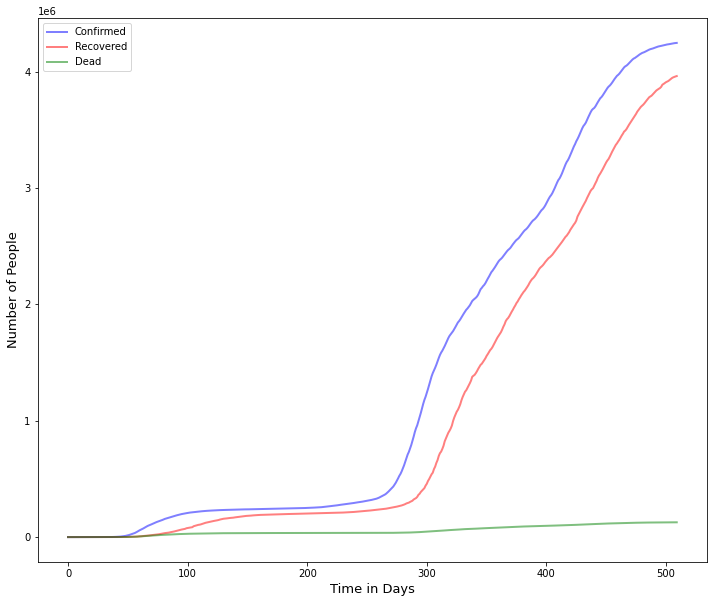

In [ ]:
fig = plt.figure(facecolor='w', figsize=(12,10))
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(t, confirmed, 'b', alpha=0.5, lw=2, label='Confirmed')
ax.plot(t, recovered, 'r', alpha=0.5, lw=2, label='Recovered')
ax.plot(t, dead, 'g', alpha=0.5, lw=2, label='Dead')
ax.set_xlabel('Time in Days', size=13)
ax.set_ylabel('Number of People', size=13)
legend = ax.legend()
plt.show()

In [ ]:
activecases = confirmed - recovered - dead
activecases

1/22/20         0
1/23/20         0
1/24/20         0
1/25/20         0
1/26/20         0
            ...  
6/10/21    169309
6/11/21    165239
6/12/21    162409
6/13/21    160313
6/14/21    157790
Length: 510, dtype: object

In [ ]:
datadf = {"Active Cases": activecases, "Infected": confirmed, "Recovered": recovered}
days = [x for x in range(0,len(activecases))]
df = pd.DataFrame(data=datadf)
df["Days"] = days
df

Active Cases Infected Recovered  Days
1/22/20            0        0         0     0
1/23/20            0        0         0     1
1/24/20            0        0         0     2
1/25/20            0        0         0     3
1/26/20            0        0         0     4
...              ...      ...       ...   ...
6/10/21       169309  4239868   3943704   505
6/11/21       165239  4241760   3949597   506
6/12/21       162409  4243482   3954097   507
6/13/21       160313  4244872   3957557   508
6/14/21       157790  4245779   3960951   509

[510 rows x 4 columns]

In [ ]:
index = list(df.index.values)
index.index('3/9/20')

47

We will divide the dataset in two parts - Pre-Lockdown Period and Lockdown Period \\
1) Pre Lockdown Period - 22/1/20 - 9/3/2020 \\
2) Lockdown Period - 9/3/2020 - 18/5/2020

**Pre Lockdown Period**

In [ ]:
data = df["Active Cases"][:index.index('3/9/20')]
infected = df["Infected"][:index.index('3/9/20')]
recovered = df["Recovered"][:index.index('3/9/20')]

In [ ]:
def loss(point, data, recovered, s_0, i_0, r_0):
    size = len(data)
    beta, gamma = point
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I/s_0, beta*S*I/s_0-gamma*I, gamma*I]
    solution = solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1), vectorized=True)
    l1 = np.sqrt(np.mean((solution.y[1] - data)**2))
    l2 = np.sqrt(np.mean((solution.y[2] - recovered)**2))
    alpha = 0.1
    return alpha * l1 + (1 - alpha) * l2

In [ ]:
def predict(beta, gamma, data, recovered, s_0, i_0, r_0):
    new_index = list(data.index.values)
    size = len(new_index)
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I/s_0, beta*S*I/s_0-gamma*I, gamma*I]
    extended_actual = np.concatenate((data.values, [None] * (size - len(data.values))))
    extended_recovered = np.concatenate((recovered.values, [None] * (size - len(recovered.values))))
    return new_index, extended_actual, extended_recovered, solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1))

In [ ]:
def train(recovered, infected, data):
    recovered = recovered
    infected = infected
    data = data

    optimal = minimize(loss, [0.001, 0.001], args=(data, recovered, s_0, i_0, r_0), method='L-BFGS-B', bounds=[(0.00000001, 2), (0.00000001, 0.4)])
    print(optimal)
    beta, gamma = optimal.x
    new_index, extended_actual, extended_recovered, prediction = predict(beta, gamma, data, recovered, s_0, i_0, r_0)
    df = pd.DataFrame({'Actual Infected': extended_actual, 'Actual Recovered': extended_recovered, 'Susceptible': prediction.y[0], 'Predicted Infected': prediction.y[1], 'Predicted Recovered': prediction.y[2]}, index=new_index)
    fig, ax = plt.subplots(figsize=(25, 10))
    ax.set_title('Curves using JHU Dataset for Italy in Pre-Lockdown Period')
    df.plot(ax=ax)
    print(f"country=Italy, beta={beta:.8f}, gamma={gamma:.8f}, r_0:{(beta/gamma):.8f}")

In [ ]:
s_0 = 30000
i_0 = 1
r_0 = 0

      fun: 58.47171661498899
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([7.10542736e-05, 7.88702437e-05])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 99
      nit: 8
   status: 0
  success: True
        x: array([0.21167464, 0.01847119])
country=Italy, beta=0.21167464, gamma=0.01847119, r_0:11.45972109


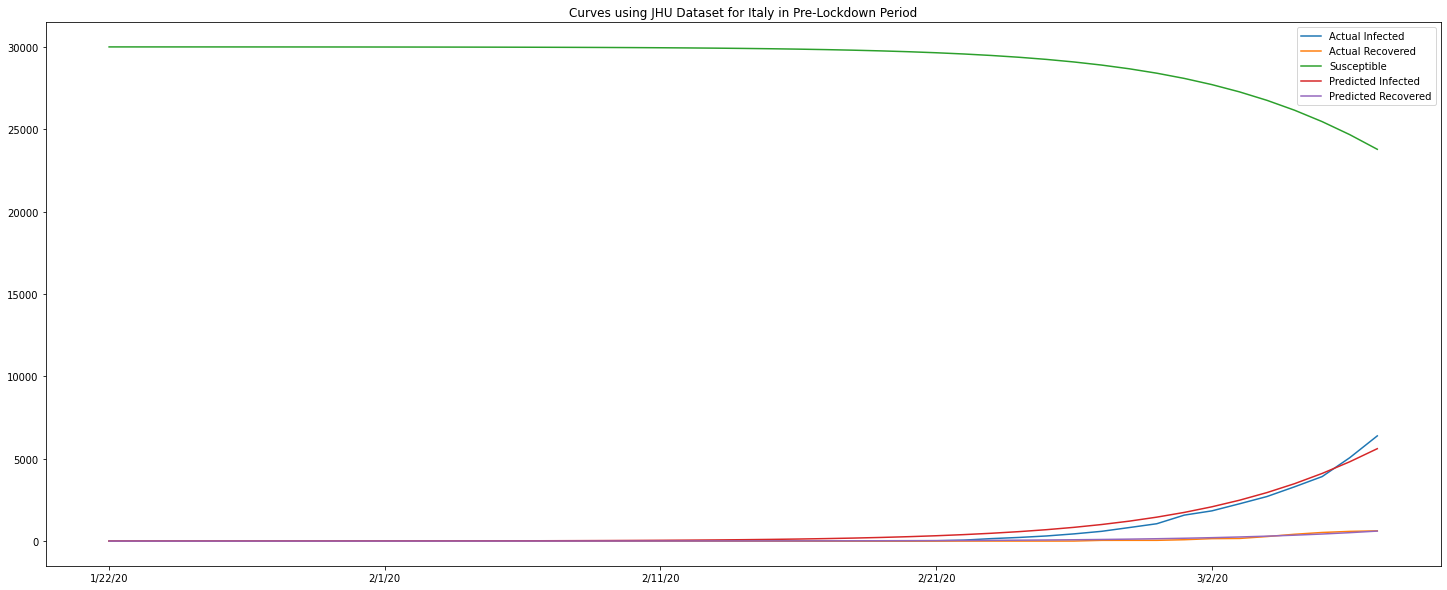

In [ ]:
train(recovered, infected, data)

**Lockdown Period**

In [ ]:
data = df["Active Cases"][:index.index('3/9/20')]
infected = df["Infected"][:index.index('3/9/20')]
recovered = df["Recovered"][:index.index('3/9/20')]

In [ ]:
def loss(point, data, recovered, s_0, i_0, r_0):
    size = len(data)
    beta, gamma = point
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I/s_0, beta*S*I/s_0-gamma*I, gamma*I]
    solution = solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1), vectorized=True)
    l1 = np.sqrt(np.mean((solution.y[1] - data)**2))
    l2 = np.sqrt(np.mean((solution.y[2] - recovered)**2))
    alpha = 0.1
    return alpha * l1 + (1 - alpha) * l2

In [ ]:
pres_fut = np.array(list(data.index.values)+ list((np.array(pd.date_range('3/9/20', periods=50)))))

In [ ]:
def predict(beta, gamma, data, recovered, s_0, i_0, r_0):
    new_index = pres_fut
    size = len(new_index)
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I/s_0, beta*S*I/s_0-gamma*I, gamma*I]
    extended_actual = np.concatenate((data.values, [None] * (size - len(data.values))))
    extended_recovered = np.concatenate((recovered.values, [None] * (size - len(recovered.values))))
    return new_index, extended_actual, extended_recovered, solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1))

In [ ]:
def train(recovered, infected, data):
    recovered = recovered
    infected = infected
    data = data

    optimal = minimize(loss, [0.001, 0.001], args=(data, recovered, s_0, i_0, r_0), method='L-BFGS-B', bounds=[(0.00000001, 2), (0.00000001, 0.4)])
    print(optimal)
    beta, gamma = optimal.x
    new_index, extended_actual, extended_recovered, prediction = predict(beta, gamma, data, recovered, s_0, i_0, r_0)
    df = pd.DataFrame({'Actual Infected': extended_actual, 'Actual Recovered': extended_recovered, 'Susceptible': prediction.y[0], 'Predicted Infected': prediction.y[1], 'Predicted Recovered': prediction.y[2]}, index=new_index)
    fig, ax = plt.subplots(figsize=(25, 10))
    ax.set_title('Curves using JHU Dataset for Italy in Lockdown Period and Prediction for 50 days')
    df.plot(ax=ax)
    print(f"country=Italy, beta={beta:.8f}, gamma={gamma:.8f}, r_0:{(beta/gamma):.8f}")
    return prediction.y[0], prediction.y[1], prediction.y[2]

In [ ]:
print(data[0], infected[0], recovered[0])

0 0 0


In [ ]:
s_0 = 300000
i_0 = 1
r_0 = 1

      fun: 51.11655023834179
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.00039506, -0.00013927])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 90
      nit: 8
   status: 0
  success: True
        x: array([0.2091225 , 0.01956688])
country=Italy, beta=0.20912250, gamma=0.01956688, r_0:10.68757376


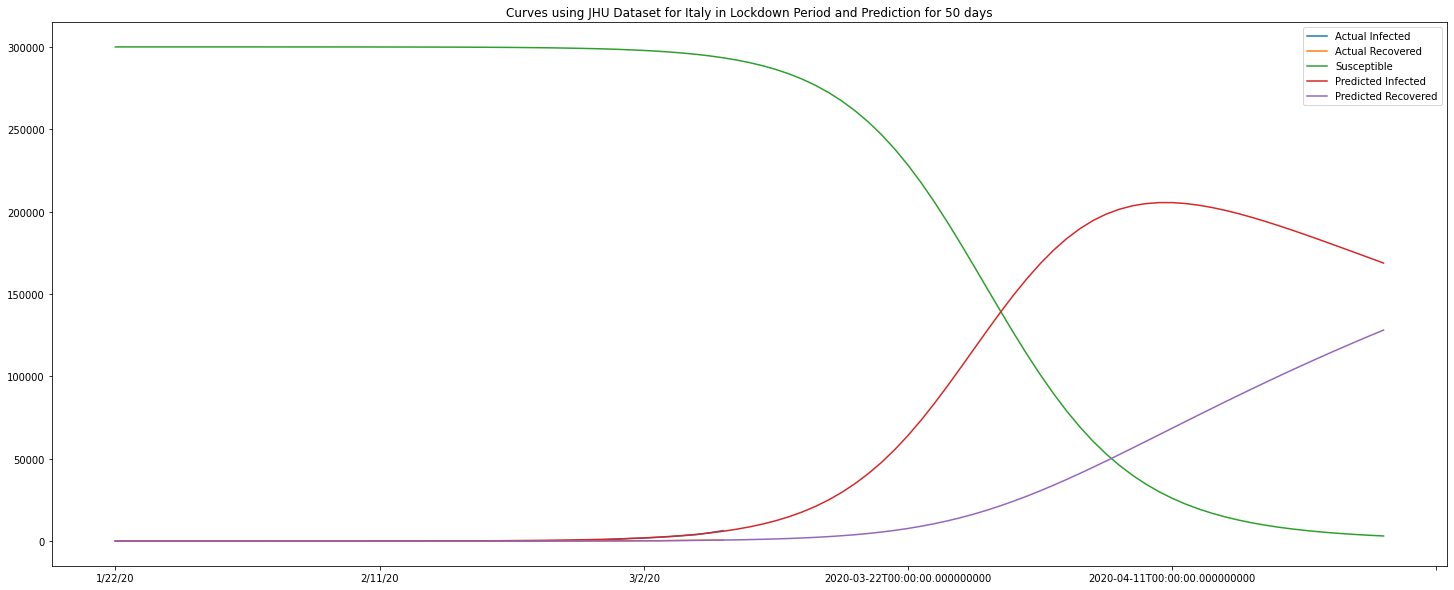

In [ ]:
susceptible, predicted_infected, predicted_recovered = train(recovered, infected, data)

In [ ]:
actual_infected = df["Active Cases"][:len(susceptible)]
actual_recovered = df["Recovered"][:len(susceptible)]

In [ ]:
plot_data = {"Predicted Infected": predicted_infected, "Predicted Recovered": predicted_recovered, "Susceptible": susceptible, "Actual Infected": actual_infected, "Actual Recovered": actual_recovered}
df_plot = pd.DataFrame(data=plot_data)
df_plot

Predicted Infected  Predicted Recovered    Susceptible  \
1/22/20            1.000000             1.000000  300000.000000   
1/23/20            1.208713             1.021544  299999.769743   
1/24/20            1.461009             1.047588  299999.491403   
1/25/20            1.766069             1.079078  299999.154853   
1/26/20            2.134452             1.117104  299998.748444   
...                     ...                  ...            ...   
4/23/20       180520.921936        114428.238958    5052.839106   
4/24/20       177609.940618        117932.194078    4459.865303   
4/25/20       174677.979923        121379.162290    3944.857787   
4/26/20       171736.854525        124768.669522    3496.475953   
4/27/20       168796.371712        128100.397444    3105.230844   

        Actual Infected Actual Recovered  
1/22/20               0                0  
1/23/20               0                0  
1/24/20               0                0  
1/25/20               0                0  
1/26/20               0                0  
...                 ...              ...  
4/23/20          106848            57576  
4/24/20          106527            60498  
4/25/20          105847            63120  
4/26/20          106103            64928  
4/27/20          105813            66624  

[97 rows x 5 columns]

In [ ]:
days = list(range(index.index('1/22/20'), index.index('4/27/20')+1))
len(days)

97

In [ ]:
len(df_plot['Predicted Recovered'])

97

In [ ]:
x, y = intersection(days, df_plot['Predicted Infected'], days, df_plot['Predicted Recovered'])

In [ ]:
x

array([0.])

In [ ]:
# start = index.index('3/9/20')
# pw_1 = abs(x[1] - start)
# pw_1

Predicted Lockdown Duration = 49 days
Actual Lockdown Duration = 70 days

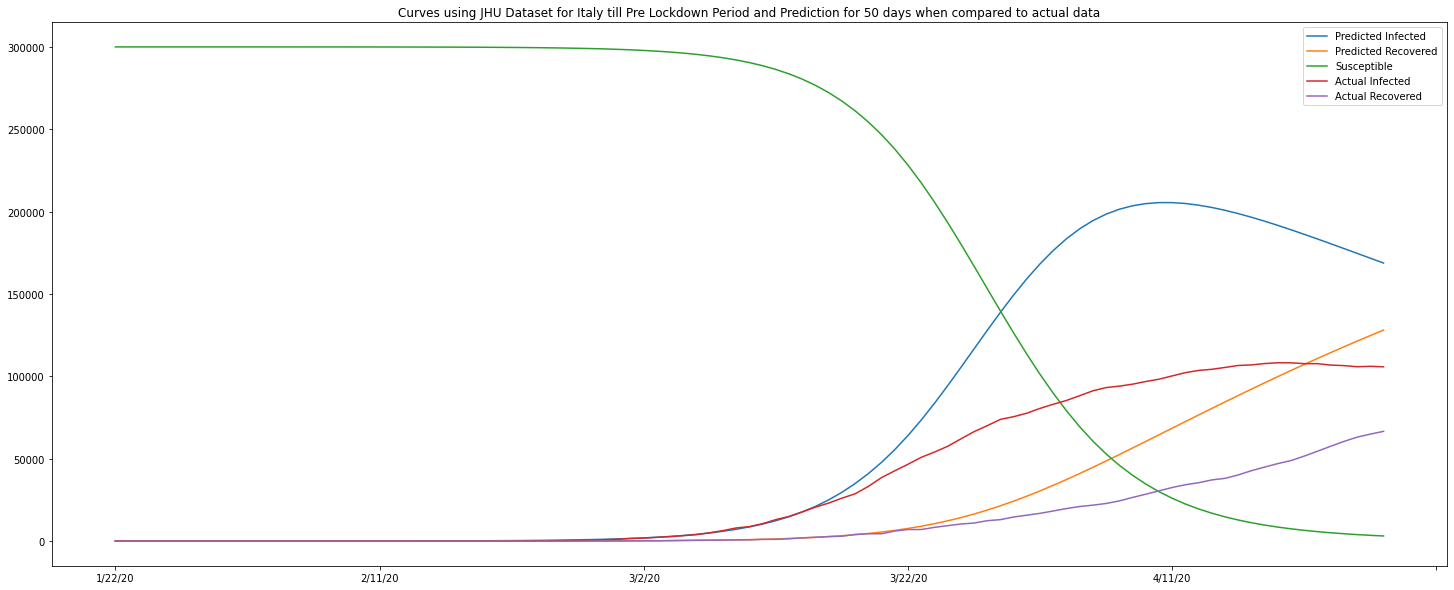

In [ ]:
fig, ax = plt.subplots(figsize=(25, 10))
ax.set_title('Curves using JHU Dataset for Italy till Pre Lockdown Period and Prediction for 50 days when compared to actual data')
df_plot.plot(ax=ax)

**Taking Date till 18/5/2020 for plotting SIR curves**

In [ ]:
data = df["Active Cases"][:index.index('5/15/20')]
infected = df["Infected"][:index.index('5/15/20')]
recovered = df["Recovered"][:index.index('5/15/20')]

In [ ]:
def loss(point, data, recovered, s_0, i_0, r_0):
    size = len(data)
    beta, gamma = point
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I/s_0, beta*S*I/s_0-gamma*I, gamma*I]
    solution = solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1), vectorized=True)
    l1 = np.sqrt(np.mean((solution.y[1] - data)**2))
    l2 = np.sqrt(np.mean((solution.y[2] - recovered)**2))
    alpha = 0.1
    return alpha * l1 + (1 - alpha) * l2

In [ ]:
def predict(beta, gamma, data, recovered, s_0, i_0, r_0):
    new_index = list(data.index.values)
    size = len(new_index)
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I/s_0, beta*S*I/s_0-gamma*I, gamma*I]
    extended_actual = np.concatenate((data.values, [None] * (size - len(data.values))))
    extended_recovered = np.concatenate((recovered.values, [None] * (size - len(recovered.values))))
    return new_index, extended_actual, extended_recovered, solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1))

In [ ]:
def train(recovered, infected, data):
    recovered = recovered
    infected = infected
    data = data

    optimal = minimize(loss, [0.001, 0.001], args=(data, recovered, s_0, i_0, r_0), method='L-BFGS-B', bounds=[(0.00000001, 2), (0.00000001, 0.4)])
    print(optimal)
    beta, gamma = optimal.x
    new_index, extended_actual, extended_recovered, prediction = predict(beta, gamma, data, recovered, s_0, i_0, r_0)
    df = pd.DataFrame({'Actual Infected': extended_actual, 'Actual Recovered': extended_recovered, 'Susceptible': prediction.y[0], 'Predicted Infected': prediction.y[1], 'Predicted Recovered': prediction.y[2]}, index=new_index)
    fig, ax = plt.subplots(figsize=(25, 10))
    ax.set_title('Curves using JHU Dataset for Italy till Lockdown Period')
    df.plot(ax=ax)
    print(f"country=Italy, beta={beta:.8f}, gamma={gamma:.8f}, r_0:{(beta/gamma):.8f}")

In [ ]:
print(data[0], infected[0], recovered[0])

0 0 0


In [ ]:
s_0 = 200000
i_0 = 1
r_0 = 1

      fun: 4163.24637999436
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([0.05265974, 0.13324097])
  message: b'ABNORMAL_TERMINATION_IN_LNSRCH'
     nfev: 216
      nit: 11
   status: 2
  success: False
        x: array([0.18760542, 0.02004184])
country=Italy, beta=0.18760542, gamma=0.02004184, r_0:9.36068979


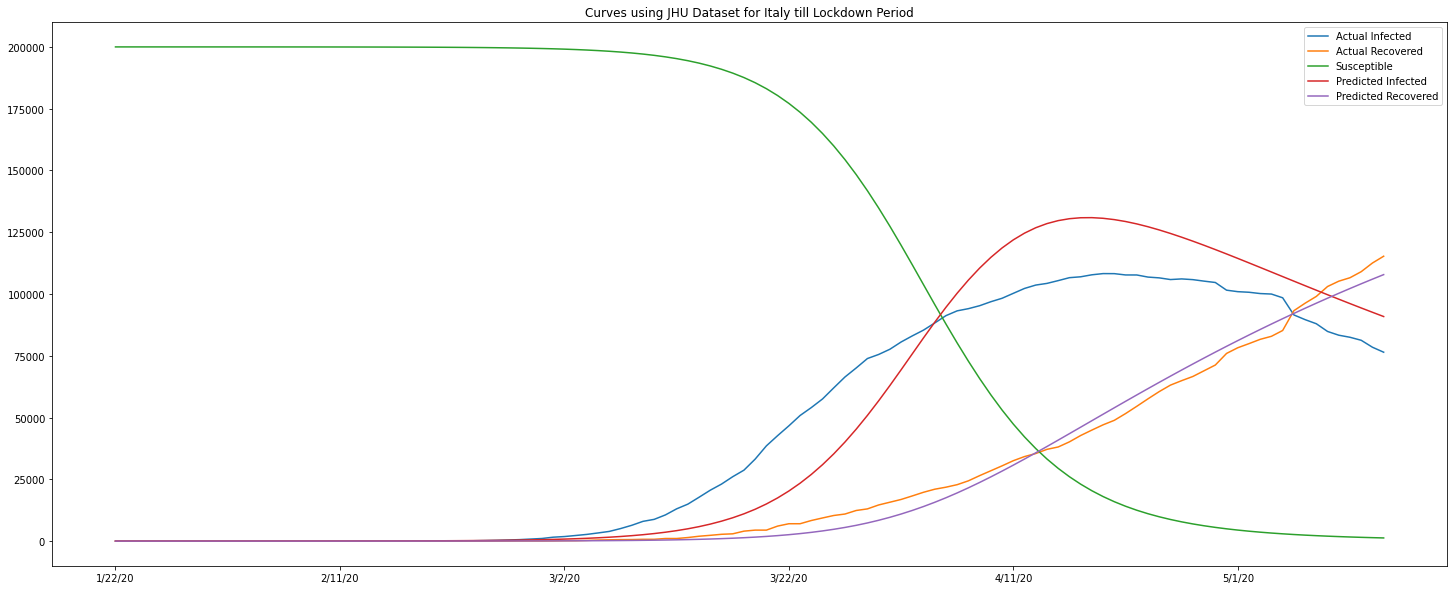

In [ ]:
train(recovered, infected, data)

**Predicting the curve for next 30 days**

In [ ]:
data = df["Active Cases"][:index.index('5/18/20')]
infected = df["Infected"][:index.index('5/18/20')]
recovered = df["Recovered"][:index.index('5/18/20')]

In [ ]:
def loss(point, data, recovered, s_0, i_0, r_0):
    size = len(data)
    beta, gamma = point
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I/s_0, beta*S*I/s_0-gamma*I, gamma*I]
    solution = solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1), vectorized=True)
    l1 = np.sqrt(np.mean((solution.y[1] - data)**2))
    l2 = np.sqrt(np.mean((solution.y[2] - recovered)**2))
    alpha = 0.1
    return alpha * l1 + (1 - alpha) * l2

In [ ]:
index.index('5/18/20')

117

In [ ]:
pres_fut = list(data.index.values) + list(np.array(index[117:167]))

In [ ]:
def predict(beta, gamma, data, recovered, s_0, i_0, r_0):
    new_index = pres_fut
    size = len(new_index)
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I/s_0, beta*S*I/s_0-gamma*I, gamma*I]
    extended_actual = np.concatenate((data.values, [None] * (size - len(data.values))))
    extended_recovered = np.concatenate((recovered.values, [None] * (size - len(recovered.values))))
    return new_index, extended_actual, extended_recovered, solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1))

In [ ]:
def train(recovered, infected, data):
    recovered = recovered
    infected = infected
    data = data

    optimal = minimize(loss, [0.001, 0.001], args=(data, recovered, s_0, i_0, r_0), method='L-BFGS-B', bounds=[(0.00000001, 2), (0.00000001, 0.4)])
    print(optimal)
    beta, gamma = optimal.x
    new_index, extended_actual, extended_recovered, prediction = predict(beta, gamma, data, recovered, s_0, i_0, r_0)
    df = pd.DataFrame({'Actual Infected': extended_actual, 'Actual Recovered': extended_recovered, 'Susceptible': prediction.y[0], 'Predicted Infected': prediction.y[1], 'Predicted Recovered': prediction.y[2]}, index=new_index)
    fig, ax = plt.subplots(figsize=(25, 10))
    ax.set_title('Curves using JHU Dataset for Italy till Lockdown Period and Prediction for 50 days')
    df.plot(ax=ax)
    print(f"country=Italy, beta={beta:.8f}, gamma={gamma:.8f}, r_0:{(beta/gamma):.8f}")
    return prediction.y[0], prediction.y[1], prediction.y[2]

In [ ]:
print(data[0], infected[0], recovered[0])

0 0 0


In [ ]:
s_0 = 200000
i_0 = 1
r_0 = 1

      fun: 4489.883527921739
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.07785275, -0.13396857])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 93
      nit: 12
   status: 0
  success: True
        x: array([0.18677888, 0.02126309])
country=Italy, beta=0.18677888, gamma=0.02126309, r_0:8.78418328


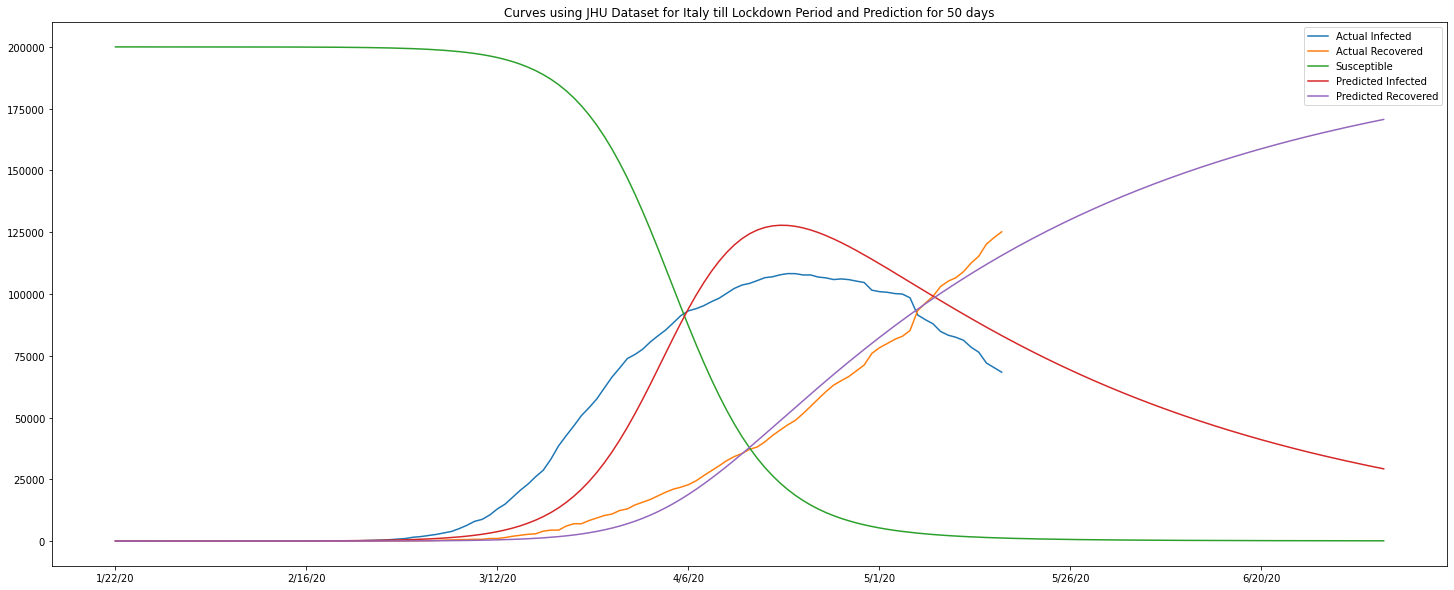

In [ ]:
susceptible, predicted_infected, predicted_recovered = train(recovered, infected, data)

In [ ]:
actual_infected = df["Active Cases"][:len(susceptible)]
actual_recovered = df["Recovered"][:len(susceptible)]

In [ ]:
plot_data = {"Actual Infected": actual_infected, "Actual Recovered": actual_recovered, "Susceptible": susceptible, "Predicted Infected": predicted_infected, "Predicted Recovered": predicted_recovered}
df_plot = pd.DataFrame(data=plot_data)
df_plot

Actual Infected Actual Recovered    Susceptible  Predicted Infected  \
1/22/20               0                0  200000.000000            1.000000   
1/23/20               0                0  199999.796874            1.180002   
1/24/20               0                0  199999.557172            1.392416   
1/25/20               0                0  199999.274198            1.643176   
1/26/20               0                0  199998.940533            1.938856   
...                 ...              ...            ...                 ...   
7/2/20            15060           191083     123.769583        31830.878675   
7/3/20            14884           191467     120.186685        31164.762074   
7/4/20            14621           191944     116.777968        30512.486573   
7/5/20            14642           192108     113.532847        29873.769669   
7/6/20            14709           192241     110.441863        29248.333770   

         Predicted Recovered  
1/22/20             1.000000  
1/23/20             1.023124  
1/24/20             1.050412  
1/25/20             1.082626  
1/26/20             1.120611  
...                      ...  
7/2/20         168047.351742  
7/3/20         168717.051241  
7/4/20         169372.735459  
7/5/20         170014.697484  
7/6/20         170643.224367  

[167 rows x 5 columns]

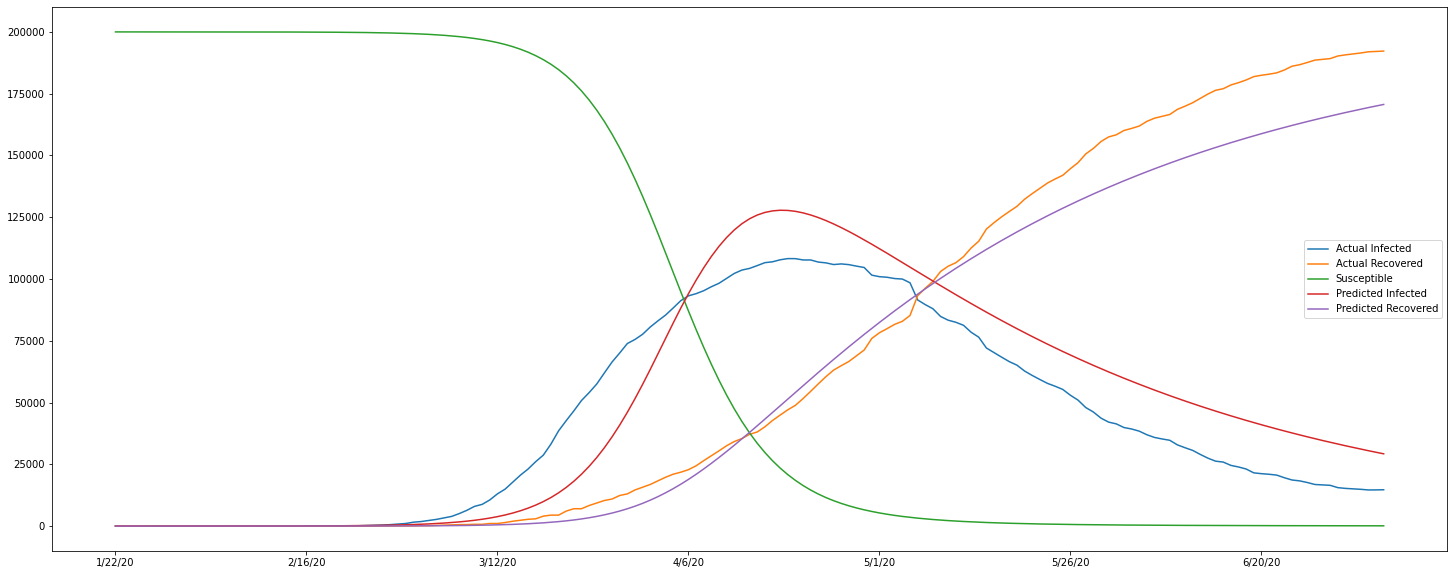

In [ ]:
fig, ax = plt.subplots(figsize=(25, 10))
df_plot.plot(ax=ax)

In [ ]:
!pip install plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


fig=go.Figure()
fig.layout.plot_bgcolor = '#FFFFFF'
fig.layout.paper_bgcolor = '#FFFFFF'
fig.add_trace(go.Scatter(x=pres_fut, y=susceptible,
                    mode='lines',name="Active Cases", line=dict(color='blue', dash='dashdot', shape='linear')))

fig.add_trace(go.Scatter(x=pres_fut, y=actual_infected,
                    mode='lines+markers',name="Infected Cases", line=dict(color='red', dash='dash', shape='linear'), marker = dict(symbol = "cross-dot")))

fig.add_trace(go.Scatter(x=pres_fut, y=predicted_infected,
                    mode='lines',name="Predicted Infected",
                    line=dict(color='red', dash='dash', shape='linear')))

fig.add_trace(go.Scatter(x=pres_fut, y=predicted_recovered,
                    mode='lines',name="Predicted Recovered",
                    line=dict(color='green', dash='dot', shape='linear')))
fig.add_trace(go.Scatter(x=pres_fut, y=actual_recovered,
                    mode='lines+markers',name="Recovered Cases", line=dict(color='green', dash='dot', shape='linear')))

fig.update_layout(xaxis_title="Date",yaxis_title="Covid 19 Cases",
                 legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Transfer Function** 

Input Signal

In [ ]:
#Sampling Rate
t = np.linspace(0, 300, 300, endpoint=True)

In [ ]:
pw_1

13.755708984664494

In [ ]:
square_wave_1 = []
for i in range(index.index('1/22/20'), index.index('3/9/20')):
  square_wave_1.append(0)
while len(square_wave_1) < 300:
  for i in range(0, 49):
    if len(square_wave_1) >= 300:
      break
    else:
      square_wave_1.append(1)
  for i in range(0, 49):
    if len(square_wave_1) >= 300:
      break
    else:
      square_wave_1.append(0)

In [ ]:
len(square_wave_1)

300

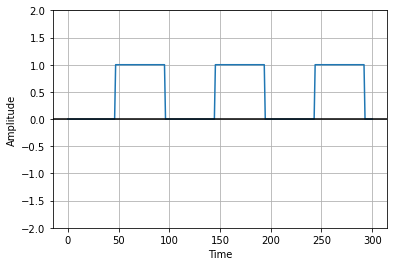

In [ ]:
# Plot the square wave signal 
plt.plot(t, square_wave_1)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.ylim(-2, 2)
plt.show()

Transfer Function

In [ ]:
# #Pre Lockdown
# k1 = 0.21167464
# k2 = 0.01847119
# M = k1/k2
#After Lockdown
k1 = 0.20992934
k2 = 0.01916841
R = k1/k2
M = (k1 * math.log(R))/2
print(k1, k2, R, M)

0.20992934 0.01916841 10.951838989253673 0.25123371295452035


In [ ]:
num = [M]
den = [1, M]
transfer_function_1 = signal.TransferFunction(num, den)
transfer_function_1

TransferFunctionContinuous(
array([0.25123371]),
array([1.        , 0.25123371]),
dt: None
)

Square Wave Response

In [ ]:
t_out, y_out_1, x_out = lsim(system=transfer_function_1, T=t, U=square_wave_1)

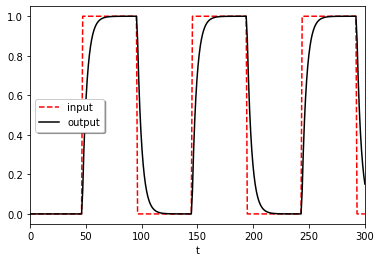

In [ ]:
plot.plot(t, square_wave_1, 'r--', linewidth=1.5, label='input')
plot.plot(t_out, y_out_1, 'k', linewidth=1.5, label='output')
plot.legend(loc='best', shadow=True, framealpha=1)
# plot.grid(alpha=0.3)
plot.xlabel('t')
plot.xlim(0,300)
plot.show()

**Continuous Prediction**

In [ ]:
start_index = index.index('3/9/20')
start_index

47

In [ ]:
data = df["Active Cases"][:start_index]
infected = df["Infected"][:start_index]
recovered = df["Recovered"][:start_index]

In [ ]:
def loss(point, data, recovered, s_0, i_0, r_0):
    size = len(data)
    beta, gamma = point
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I/s_0, beta*S*I/s_0-gamma*I, gamma*I]
    solution = solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1), vectorized=True)
    l1 = np.sqrt(np.mean((solution.y[1] - data)**2))
    l2 = np.sqrt(np.mean((solution.y[2] - recovered)**2))
    alpha = 0.1
    return alpha * l1 + (1 - alpha) * l2

In [ ]:
def predict(beta, gamma, data, recovered, s_0, i_0, r_0):
    new_index = list(data.index.values)
    size = len(new_index)
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I/s_0, beta*S*I/s_0-gamma*I, gamma*I]
    extended_actual = np.concatenate((data.values, [None] * (size - len(data.values))))
    extended_recovered = np.concatenate((recovered.values, [None] * (size - len(recovered.values))))
    return new_index, extended_actual, extended_recovered, solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1))

In [ ]:
def train(recovered, infected, data):
    recovered = recovered
    infected = infected
    data = data

    optimal = minimize(loss, [0.001, 0.001], args=(data, recovered, s_0, i_0, r_0), method='L-BFGS-B', bounds=[(0.00000001, 2), (0.00000001, 0.4)])
    beta, gamma = optimal.x
    return beta/gamma

In [ ]:
date = []
R0_list = []
for i in range(1,100):
  data = df["Active Cases"][:start_index + (3 * i)]
  infected = df["Infected"][:start_index + (3 * i)]
  recovered = df["Recovered"][:start_index + (3 * i)]
  s_0 = 75000 + max(i-30,0) * 17  * i
  i_0 = 1
  r_0 = 0
  R0 = train(recovered, infected, data)
  R0_list.append(R0)
  date.append(index[start_index + (3 * i)])

In [ ]:
print(s_0)

191127


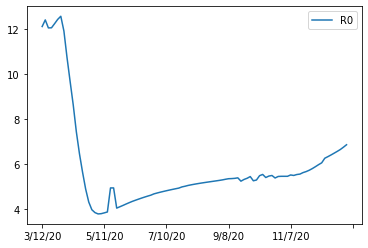

In [ ]:
dataFrame = pd.DataFrame(data={"R0": R0_list}, index=date)
dataFrame.plot()
plt.show()

# **SIR for India using JHU Dataset for 2021**

Dataset - https://github.com/CSSEGISandData/COVID-19 \\
Reference - https://www.lewuathe.com/covid-19-dynamics-with-sir-model.html

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
from scipy.integrate import odeint

In [ ]:
file_path = '/content/time_series_covid19_confirmed_global.csv'
df_confirm = pd.read_csv(file_path)
file_path = '/content/time_series_covid19_recovered_global.csv'
df_recovered = pd.read_csv(file_path)
file_path = '/content/time_series_covid19_deaths_global.csv'
df_dead = pd.read_csv(file_path)

In [ ]:
df_confirm

Province/State      Country/Region        Lat  ...  6/12/21  6/13/21  6/14/21
0              NaN         Afghanistan  33.939110  ...    88740    89861    91458
1              NaN             Albania  41.153300  ...   132449   132459   132461
2              NaN             Algeria  28.033900  ...   133070   133388   133742
3              NaN             Andorra  42.506300  ...    13813    13813    13826
4              NaN              Angola -11.202700  ...    36600    36705    36790
..             ...                 ...        ...  ...      ...      ...      ...
271            NaN             Vietnam  14.058324  ...    10337    10630    10881
272            NaN  West Bank and Gaza  31.952200  ...   311018   311534   311690
273            NaN               Yemen  15.552727  ...     6857     6862     6863
274            NaN              Zambia -13.133897  ...   110332   111746   113134
275            NaN            Zimbabwe -19.015438  ...    39852    39959    40077

[276 rows x 514 columns]

In [ ]:
df_recovered

Province/State      Country/Region        Lat  ...  6/12/21  6/13/21  6/14/21
0              NaN         Afghanistan  33.939110  ...    60939    61410    61706
1              NaN             Albania  41.153300  ...   129826   129842   129865
2              NaN             Algeria  28.033900  ...    92620    92852    93094
3              NaN             Andorra  42.506300  ...    13591    13591    13618
4              NaN              Angola -11.202700  ...    30207    30282    30359
..             ...                 ...        ...  ...      ...      ...      ...
256            NaN             Vietnam  14.058324  ...     3827     3998     4236
257            NaN  West Bank and Gaza  31.952200  ...   302944   303813   304138
258            NaN               Yemen  15.552727  ...     3727     3743     3765
259            NaN              Zambia -13.133897  ...    96646    97756    98994
260            NaN            Zimbabwe -19.015438  ...    36992    37004    37027

[261 rows x 514 columns]

In [ ]:
df_dead

Province/State      Country/Region        Lat  ...  6/12/21  6/13/21  6/14/21
0              NaN         Afghanistan  33.939110  ...     3449     3527     3612
1              NaN             Albania  41.153300  ...     2453     2453     2453
2              NaN             Algeria  28.033900  ...     3565     3571     3579
3              NaN             Andorra  42.506300  ...      127      127      127
4              NaN              Angola -11.202700  ...      825      831      836
..             ...                 ...        ...  ...      ...      ...      ...
271            NaN             Vietnam  14.058324  ...       58       59       59
272            NaN  West Bank and Gaza  31.952200  ...     3524     3533     3539
273            NaN               Yemen  15.552727  ...     1347     1349     1350
274            NaN              Zambia -13.133897  ...     1365     1389     1416
275            NaN            Zimbabwe -19.015438  ...     1632     1632     1635

[276 rows x 514 columns]

In [ ]:
India_confirm = df_confirm.loc[df_confirm['Country/Region'] == 'India']
India_confirm

Province/State Country/Region        Lat  ...   6/12/21   6/13/21   6/14/21
147            NaN          India  20.593684  ...  29439989  29510410  29510410

[1 rows x 514 columns]

In [ ]:
confirmed = India_confirm.iloc[0].loc['1/22/20':]
confirmed

1/22/20           0
1/23/20           0
1/24/20           0
1/25/20           0
1/26/20           0
             ...   
6/10/21    29274823
6/11/21    29359155
6/12/21    29439989
6/13/21    29510410
6/14/21    29510410
Name: 147, Length: 510, dtype: object

In [ ]:
India_recovered = df_recovered.loc[df_recovered['Country/Region'] == 'India']
India_recovered

Province/State Country/Region        Lat  ...   6/12/21   6/13/21   6/14/21
132            NaN          India  20.593684  ...  28043446  28162947  28162947

[1 rows x 514 columns]

In [ ]:
recovered = India_recovered.iloc[0].loc['1/22/20':]
recovered

1/22/20           0
1/23/20           0
1/24/20           0
1/25/20           0
1/26/20           0
             ...   
6/10/21    27790073
6/11/21    27911384
6/12/21    28043446
6/13/21    28162947
6/14/21    28162947
Name: 132, Length: 510, dtype: object

In [ ]:
India_dead = df_dead.loc[df_dead['Country/Region'] == 'India']
India_dead

Province/State Country/Region        Lat  ...  6/12/21  6/13/21  6/14/21
147            NaN          India  20.593684  ...   370384   374305   374305

[1 rows x 514 columns]

In [ ]:
dead = India_dead.iloc[0].loc['1/22/20':]
dead

1/22/20         0
1/23/20         0
1/24/20         0
1/25/20         0
1/26/20         0
            ...  
6/10/21    363079
6/11/21    367081
6/12/21    370384
6/13/21    374305
6/14/21    374305
Name: 147, Length: 510, dtype: object

In [ ]:
print(len(confirmed),len(recovered), len(dead))

510 510 510


In [ ]:
t = np.arange(0, len(confirmed))
len(t)

510

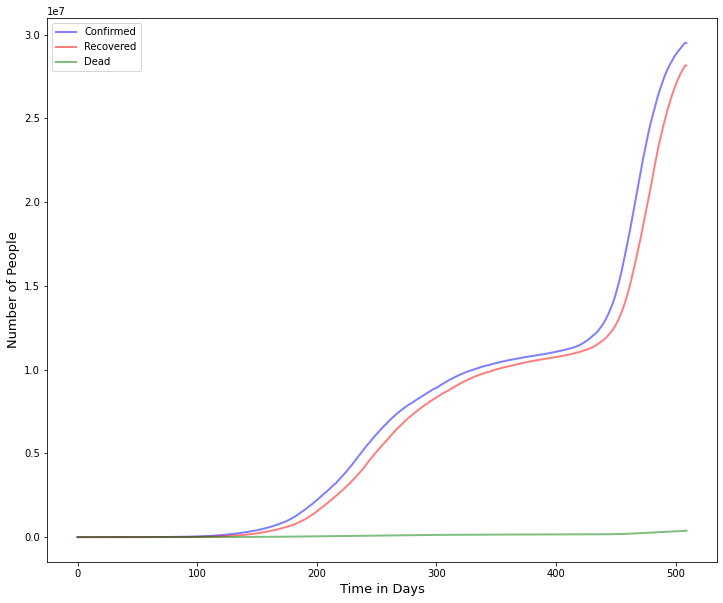

In [ ]:
fig = plt.figure(facecolor='w', figsize=(12,10))
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(t, confirmed, 'b', alpha=0.5, lw=2, label='Confirmed')
ax.plot(t, recovered, 'r', alpha=0.5, lw=2, label='Recovered')
ax.plot(t, dead, 'g', alpha=0.5, lw=2, label='Dead')
ax.set_xlabel('Time in Days', size=13)
ax.set_ylabel('Number of People', size=13)
legend = ax.legend()
plt.show()

In [ ]:
activecases = confirmed - recovered - dead
activecases

1/22/20          0
1/23/20          0
1/24/20          0
1/25/20          0
1/26/20          0
            ...   
6/10/21    1121671
6/11/21    1080690
6/12/21    1026159
6/13/21     973158
6/14/21     973158
Length: 510, dtype: object

In [ ]:
datadf = {"Active Cases": activecases, "Infected": confirmed, "Recovered": recovered}
days = [x for x in range(0,len(activecases))]
df = pd.DataFrame(data=datadf)
df["Days"] = days
df

Active Cases  Infected Recovered  Days
1/22/20            0         0         0     0
1/23/20            0         0         0     1
1/24/20            0         0         0     2
1/25/20            0         0         0     3
1/26/20            0         0         0     4
...              ...       ...       ...   ...
6/10/21      1121671  29274823  27790073   505
6/11/21      1080690  29359155  27911384   506
6/12/21      1026159  29439989  28043446   507
6/13/21       973158  29510410  28162947   508
6/14/21       973158  29510410  28162947   509

[510 rows x 4 columns]

In [ ]:
index = list(df.index.values)
index.index('4/14/21')

448

We will divide the dataset in two parts - Pre-Lockdown Period and Lockdown Period \\
1) Pre Lockdown Period - 22/1/20 - 25/3/2020 \\
2) Lockdown Period - 25/3/2020 - 7/6/2020

**Pre Lockdown Period**

In [ ]:
data = df["Active Cases"][index.index('3/1/21'):index.index('4/14/21')]
infected = df["Infected"][index.index('3/1/21'):index.index('4/14/21')]
recovered = df["Recovered"][index.index('3/1/21'):index.index('4/14/21')]

In [ ]:
def loss(point, data, recovered, s_0, i_0, r_0):
    size = len(data)
    beta, gamma = point
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I/s_0, beta*S*I/s_0-gamma*I, gamma*I]
    solution = solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1), vectorized=True)
    l1 = np.sqrt(np.mean((solution.y[1] - data)**2))
    l2 = np.sqrt(np.mean((solution.y[2] - recovered)**2))
    alpha = 0.1
    return alpha * l1 + (1 - alpha) * l2

In [ ]:
def predict(beta, gamma, data, recovered, s_0, i_0, r_0):
    new_index = list(data.index.values)
    size = len(new_index)
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I/s_0, beta*S*I/s_0-gamma*I, gamma*I]
    extended_actual = np.concatenate((data.values, [None] * (size - len(data.values))))
    extended_recovered = np.concatenate((recovered.values, [None] * (size - len(recovered.values))))
    return new_index, extended_actual, extended_recovered, solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1))

In [ ]:
def train(recovered, infected, data):
    recovered = recovered
    infected = infected
    data = data

    optimal = minimize(loss, [0.001, 0.001], args=(data, recovered, s_0, i_0, r_0), method='L-BFGS-B', bounds=[(0.00000001, 2), (0.00000001, 0.4)])
    print(optimal)
    beta, gamma = optimal.x
    new_index, extended_actual, extended_recovered, prediction = predict(beta, gamma, data, recovered, s_0, i_0, r_0)
    df = pd.DataFrame({'Actual Infected': extended_actual, 'Actual Recovered': extended_recovered, 'Susceptible': prediction.y[0], 'Predicted Infected': prediction.y[1], 'Predicted Recovered': prediction.y[2]}, index=new_index)
    fig, ax = plt.subplots(figsize=(25, 10))
    ax.set_title('Curves using JHU Dataset for India in Pre-Lockdown Period')
    df.plot(ax=ax)
    print(f"country=India, beta={beta:.8f}, gamma={gamma:.8f}, r_0:{(beta/gamma):.8f}")

In [ ]:
s_0 = 20000000
i_0 = 168358
r_0 = 10798921

      fun: 29891.617527606388
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 2.12676241, -1.01535989])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 69
      nit: 11
   status: 0
  success: True
        x: array([0.11220628, 0.06041476])
country=India, beta=0.11220628, gamma=0.06041476, r_0:1.85726595


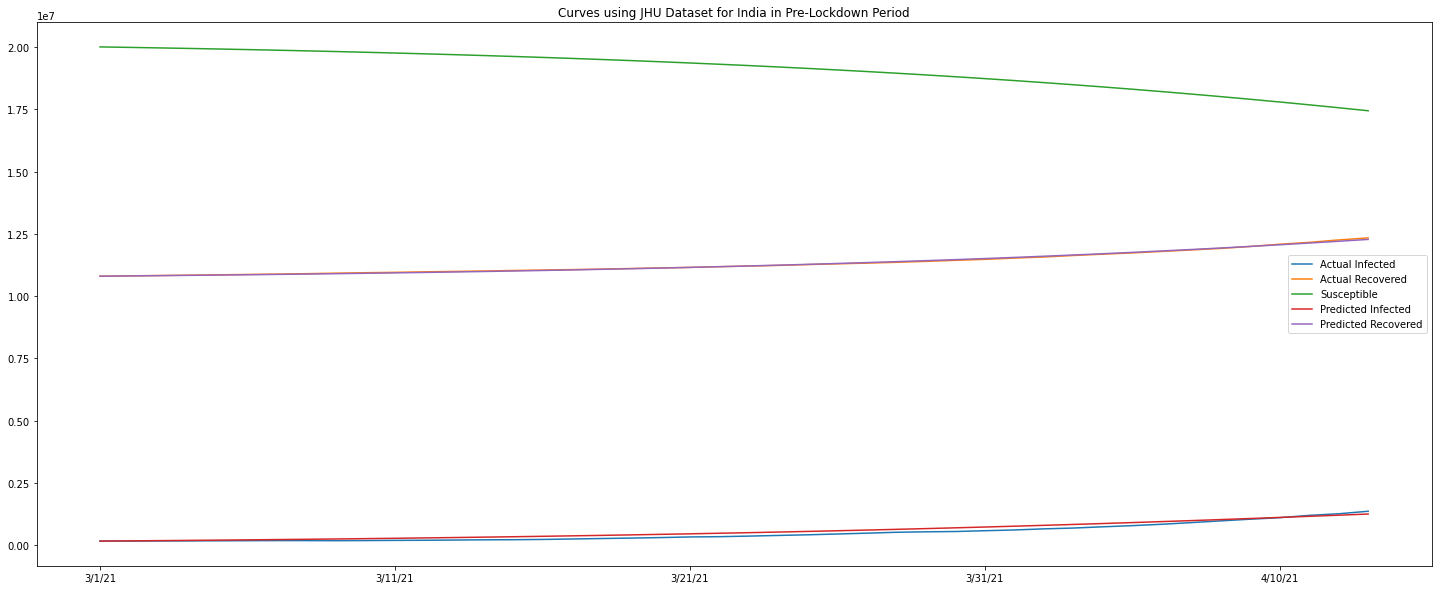

In [ ]:
train(recovered, infected, data)

**Lockdown Period**

In [ ]:
data = df["Active Cases"][index.index('3/1/21'):index.index('4/14/21')]
infected = df["Infected"][index.index('3/1/21'):index.index('4/14/21')]
recovered = df["Recovered"][index.index('3/1/21'):index.index('4/14/21')]

In [ ]:
def loss(point, data, recovered, s_0, i_0, r_0):
    size = len(data)
    beta, gamma = point
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I/s_0, beta*S*I/s_0-gamma*I, gamma*I]
    solution = solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1), vectorized=True)
    l1 = np.sqrt(np.mean((solution.y[1] - data)**2))
    l2 = np.sqrt(np.mean((solution.y[2] - recovered)**2))
    alpha = 0.1
    return alpha * l1 + (1 - alpha) * l2

In [ ]:
print(index.index('3/1/21'))

404


In [ ]:
print(index.index('4/14/21'), index.index('5/30/21'))

448 494


In [ ]:
pres_fut = np.array(list(data.index.values)+ list((np.array(index[494:510]))))

In [ ]:
def predict(beta, gamma, data, recovered, s_0, i_0, r_0):
    new_index = pres_fut
    size = len(new_index)
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I/s_0, beta*S*I/s_0-gamma*I, gamma*I]
    extended_actual = np.concatenate((data.values, [None] * (size - len(data.values))))
    extended_recovered = np.concatenate((recovered.values, [None] * (size - len(recovered.values))))
    return new_index, extended_actual, extended_recovered, solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1))

In [ ]:
def train(recovered, infected, data):
    recovered = recovered
    infected = infected
    data = data

    optimal = minimize(loss, [0.001, 0.001], args=(data, recovered, s_0, i_0, r_0), method='L-BFGS-B', bounds=[(0.00000001, 2), (0.00000001, 0.4)])
    print(optimal)
    beta, gamma = optimal.x
    new_index, extended_actual, extended_recovered, prediction = predict(beta, gamma, data, recovered, s_0, i_0, r_0)
    df = pd.DataFrame({'Actual Infected': extended_actual, 'Actual Recovered': extended_recovered, 'Susceptible': prediction.y[0], 'Predicted Infected': prediction.y[1], 'Predicted Recovered': prediction.y[2]}, index=new_index)
    fig, ax = plt.subplots(figsize=(25, 10))
    ax.set_title('Curves using JHU Dataset for India in Lockdown Period and Prediction for 50 days')
    df.plot(ax=ax)
    print(f"country=India, beta={beta:.8f}, gamma={gamma:.8f}, r_0:{(beta/gamma):.8f}")
    return prediction.y[0], prediction.y[1], prediction.y[2]

In [ ]:
print(data[0], infected[0], recovered[0])

168358 11124527 10798921


In [ ]:
s_0 = 20000000
i_0 = 168358
r_0 = 10798921

      fun: 29891.617527606388
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 2.12676241, -1.01535989])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 69
      nit: 11
   status: 0
  success: True
        x: array([0.11220628, 0.06041476])
country=India, beta=0.11220628, gamma=0.06041476, r_0:1.85726595


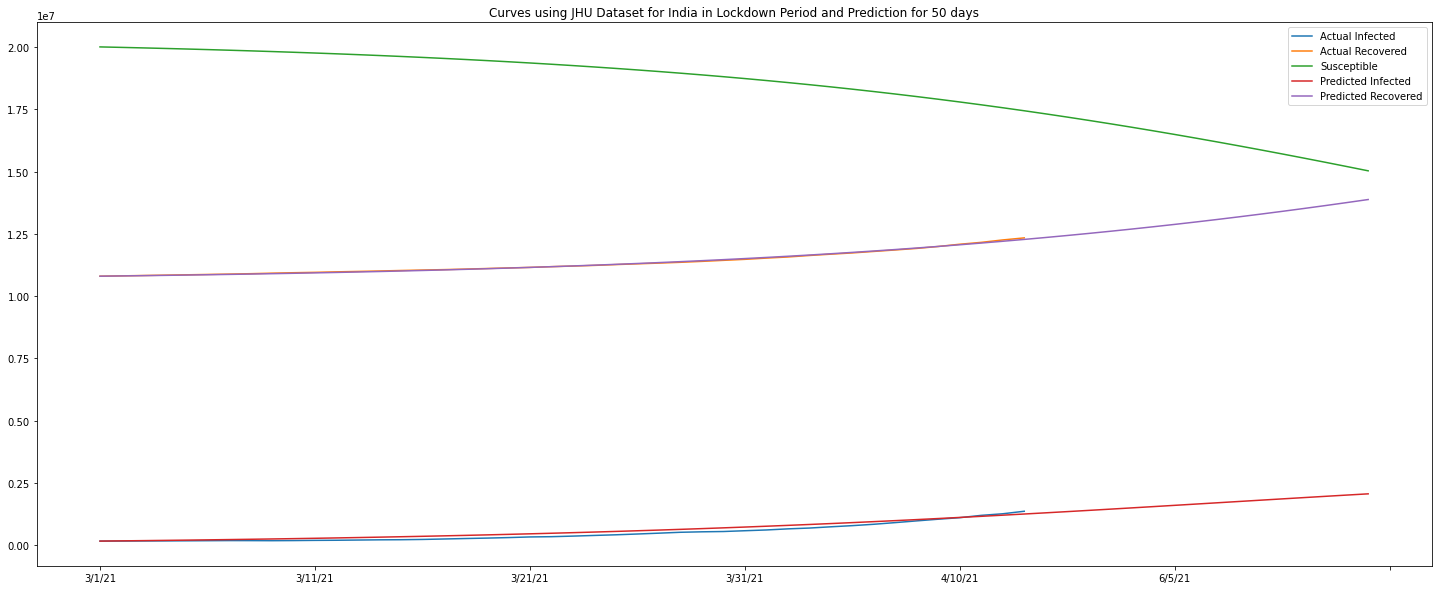

In [ ]:
susceptible, predicted_infected, predicted_recovered = train(recovered, infected, data)

In [ ]:
actual_infected = df["Active Cases"][404:404+len(susceptible)]
actual_recovered = df["Recovered"][404:404+len(susceptible)]

In [ ]:
print(len(actual_infected), len(susceptible))

60 60


In [ ]:
plot_data = {"Predicted Infected": predicted_infected, "Predicted Recovered": predicted_recovered, "Susceptible": susceptible, "Actual Infected": actual_infected, "Actual Recovered": actual_recovered}
df_plot = pd.DataFrame(data=plot_data)
df_plot

Predicted Infected  ...  Actual Recovered
3/1/21         1.683580e+05  ...          10798921
3/2/21         1.772977e+05  ...          10812044
3/3/21         1.866913e+05  ...          10826075
3/4/21         1.965574e+05  ...          10839894
3/5/21         2.069143e+05  ...          10854126
3/6/21         2.177869e+05  ...          10868520
3/7/21         2.292001e+05  ...          10882798
3/8/21         2.411791e+05  ...          10899394
3/9/21         2.537494e+05  ...          10920046
3/10/21        2.669365e+05  ...          10938146
3/11/21        2.807662e+05  ...          10953303
3/12/21        2.952642e+05  ...          10973260
3/13/21        3.104568e+05  ...          10989897
3/14/21        3.263701e+05  ...          11007352
3/15/21        3.430305e+05  ...          11027543
3/16/21        3.604646e+05  ...          11045284
3/17/21        3.786992e+05  ...          11063025
3/18/21        3.977612e+05  ...          11083679
3/19/21        4.176775e+05  ...          11107332
3/20/21        4.384756e+05  ...          11130288
3/21/21        4.601828e+05  ...          11151468
3/22/21        4.828267e+05  ...          11181253
3/23/21        5.064351e+05  ...          11205160
3/24/21        5.310146e+05  ...          11231650
3/25/21        5.565221e+05  ...          11264637
3/26/21        5.830056e+05  ...          11295023
3/27/21        6.105167e+05  ...          11323762
3/28/21        6.391007e+05  ...          11355993
3/29/21        6.687967e+05  ...          11393021
3/30/21        6.996375e+05  ...          11434301
3/31/21        7.316497e+05  ...          11474683
4/1/21         7.648535e+05  ...          11525039
4/2/21         7.992629e+05  ...          11569241
4/3/21         8.348855e+05  ...          11629289
4/4/21         8.717229e+05  ...          11682136
4/5/21         9.097702e+05  ...          11732279
4/6/21         9.490161e+05  ...          11792135
4/7/21         9.894434e+05  ...          11851393
4/8/21         1.031028e+06  ...          11913292
4/9/21         1.073741e+06  ...          11990859
4/10/21        1.117545e+06  ...          12081443
4/11/21        1.162398e+06  ...          12156529
4/12/21        1.208250e+06  ...          12253697
4/13/21        1.255048e+06  ...          12336036
4/14/21        1.302730e+06  ...          12429564
4/15/21        1.351227e+06  ...          12547866
4/16/21        1.400467e+06  ...          12671220
4/17/21        1.450369e+06  ...          12809638
4/18/21        1.500846e+06  ...          12953817
4/19/21        1.551806e+06  ...          13108565
4/20/21        1.603149e+06  ...          13276039
4/21/21        1.654771e+06  ...          13454880
4/22/21        1.706561e+06  ...          13648159
4/23/21        1.758432e+06  ...          13867997
4/24/21        1.810273e+06  ...          14085110
4/25/21        1.861957e+06  ...          14304382
4/26/21        1.913354e+06  ...          14556089
4/27/21        1.964330e+06  ...          14817240
4/28/21        2.014750e+06  ...          15086740
4/29/21        2.064475e+06  ...          15384418

[60 rows x 5 columns]

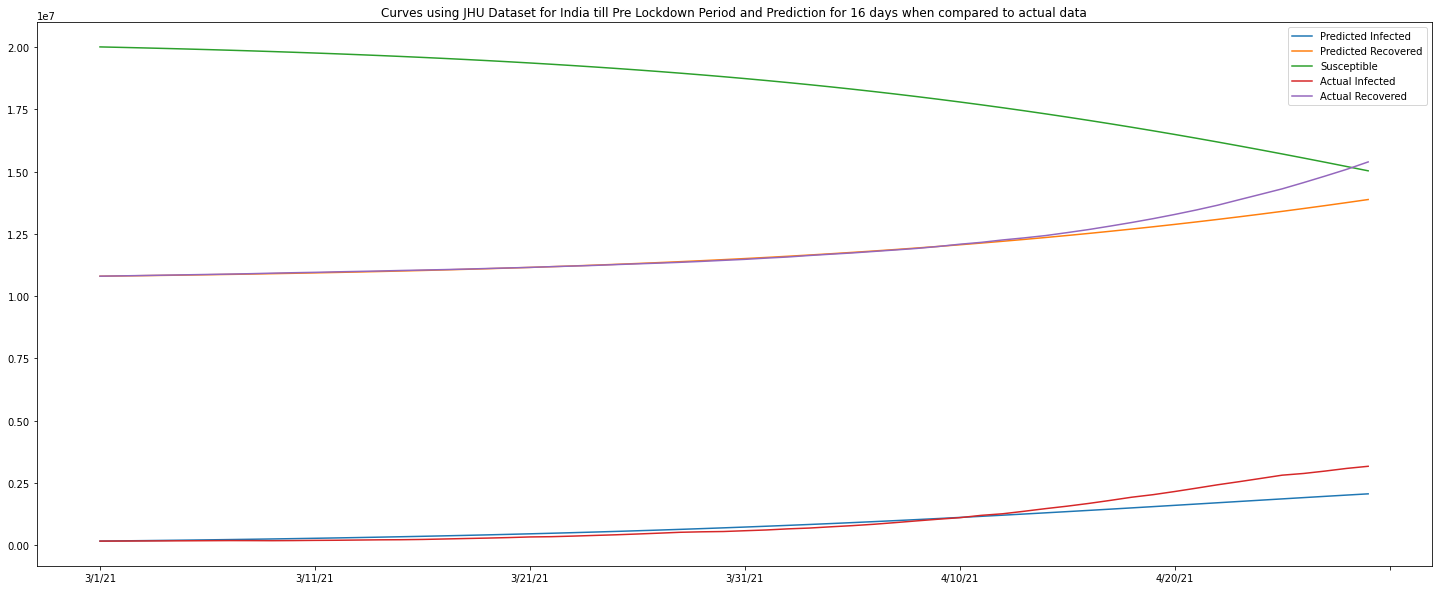

In [ ]:
fig, ax = plt.subplots(figsize=(25, 10))
ax.set_title('Curves using JHU Dataset for India till Pre Lockdown Period and Prediction for 16 days when compared to actual data')
df_plot.plot(ax=ax)

In [ ]:
!pip install plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig=go.Figure()
fig.layout.plot_bgcolor = '#FFFFFF'
fig.layout.paper_bgcolor = '#FFFFFF'
fig.add_trace(go.Scatter(x=pres_fut, y=susceptible,
                    mode='lines+markers',name="Active Cases"))

fig.add_trace(go.Scatter(x=pres_fut, y=actual_infected,
                    mode='lines+markers',name="Infected Cases", line=dict(color='red')))

fig.add_trace(go.Scatter(x=pres_fut, y=predicted_infected,
                    mode='lines',name="Predicted Infected",
                    line=dict(color='red', dash='dot')))

fig.add_trace(go.Scatter(x=pres_fut, y=predicted_recovered,
                    mode='lines',name="Predicted Recovered",
                    line=dict(color='green', dash='dot')))
fig.add_trace(go.Scatter(x=pres_fut, y=actual_recovered,
                    mode='lines+markers',name="Recovered Cases", line=dict(color='green')))


fig.update_layout(title="Italy SIR Prediction",
                 xaxis_title="Date",yaxis_title="Covid 19 Cases",
                 legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

# **SIR for India using JHU Dataset for 2020**

Dataset - https://github.com/CSSEGISandData/COVID-19 \\
Reference - https://www.lewuathe.com/covid-19-dynamics-with-sir-model.html

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
from scipy.integrate import odeint

In [ ]:
file_path = '/content/time_series_covid19_confirmed_global.csv'
df_confirm = pd.read_csv(file_path)
file_path = '/content/time_series_covid19_recovered_global.csv'
df_recovered = pd.read_csv(file_path)
file_path = '/content/time_series_covid19_deaths_global.csv'
df_dead = pd.read_csv(file_path)

In [ ]:
df_confirm

Province/State      Country/Region        Lat        Long  1/22/20  \
0              NaN         Afghanistan  33.939110   67.709953        0   
1              NaN             Albania  41.153300   20.168300        0   
2              NaN             Algeria  28.033900    1.659600        0   
3              NaN             Andorra  42.506300    1.521800        0   
4              NaN              Angola -11.202700   17.873900        0   
..             ...                 ...        ...         ...      ...   
271            NaN             Vietnam  14.058324  108.277199        0   
272            NaN  West Bank and Gaza  31.952200   35.233200        0   
273            NaN               Yemen  15.552727   48.516388        0   
274            NaN              Zambia -13.133897   27.849332        0   
275            NaN            Zimbabwe -19.015438   29.154857        0   

     1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  6/5/21  6/6/21  6/7/21  \
0          0        0        0        0        0  ...   77963   79224   80841   
1          0        0        0        0        0  ...  132374  132379  132384   
2          0        0        0        0        0  ...  130681  130958  131283   
3          0        0        0        0        0  ...   13758   13758   13777   
4          0        0        0        0        0  ...   35594   35772   35854   
..       ...      ...      ...      ...      ...  ...     ...     ...     ...   
271        2        2        2        2        2  ...    8580    8791    9027   
272        0        0        0        0        0  ...  309853  310026  310026   
273        0        0        0        0        0  ...    6780    6787    6812   
274        0        0        0        0        0  ...   99540  100278  100765   
275        0        0        0        0        0  ...   39168   39189   39238   

     6/8/21  6/9/21  6/10/21  6/11/21  6/12/21  6/13/21  6/14/21  
0     82326   84050    85892    87716    88740    89861    91458  
1    132397  132415   132426   132437   132449   132459   132461  
2    131647  132034   132355   132727   133070   133388   133742  
3     13781   13791    13805    13813    13813    13813    13826  
4     36004   36115    36325    36455    36600    36705    36790  
..      ...     ...      ...      ...      ...      ...      ...  
271    9222    9635     9835    10048    10337    10630    10881  
272  310544  310544   311018   311018   311018   311534   311690  
273    6823    6832     6836     6856     6857     6862     6863  
274  101996  103763   105909   107974   110332   111746   113134  
275   39321   39432    39496    39688    39852    39959    40077  

[276 rows x 514 columns]

In [ ]:
df_dead

Province/State      Country/Region        Lat        Long  1/22/20  \
0              NaN         Afghanistan  33.939110   67.709953        0   
1              NaN             Albania  41.153300   20.168300        0   
2              NaN             Algeria  28.033900    1.659600        0   
3              NaN             Andorra  42.506300    1.521800        0   
4              NaN              Angola -11.202700   17.873900        0   
..             ...                 ...        ...         ...      ...   
271            NaN             Vietnam  14.058324  108.277199        0   
272            NaN  West Bank and Gaza  31.952200   35.233200        0   
273            NaN               Yemen  15.552727   48.516388        0   
274            NaN              Zambia -13.133897   27.849332        0   
275            NaN            Zimbabwe -19.015438   29.154857        0   

     1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  6/5/21  6/6/21  6/7/21  \
0          0        0        0        0        0  ...    3104    3145    3187   
1          0        0        0        0        0  ...    2451    2451    2452   
2          0        0        0        0        0  ...    3510    3518    3527   
3          0        0        0        0        0  ...     127     127     127   
4          0        0        0        0        0  ...     794     797     800   
..       ...      ...      ...      ...      ...  ...     ...     ...     ...   
271        0        0        0        0        0  ...      53      53      53   
272        0        0        0        0        0  ...    3516    3517    3517   
273        0        0        0        0        0  ...    1325    1329    1336   
274        0        0        0        0        0  ...    1303    1308    1315   
275        0        0        0        0        0  ...    1605    1606    1611   

     6/8/21  6/9/21  6/10/21  6/11/21  6/12/21  6/13/21  6/14/21  
0      3251    3305     3356     3412     3449     3527     3612  
1      2452    2452     2452     2453     2453     2453     2453  
2      3537    3544     3552     3560     3565     3571     3579  
3       127     127      127      127      127      127      127  
4       803     811      815      819      825      831      836  
..      ...     ...      ...      ...      ...      ...      ...  
271      55      55       55       57       58       59       59  
272    3520    3520     3524     3524     3524     3533     3539  
273    1336    1337     1338     1342     1347     1349     1350  
274    1321    1324     1332     1348     1365     1389     1416  
275    1617    1622     1626     1629     1632     1632     1635  

[276 rows x 514 columns]

In [ ]:
df_recovered

Province/State      Country/Region        Lat        Long  1/22/20  \
0              NaN         Afghanistan  33.939110   67.709953        0   
1              NaN             Albania  41.153300   20.168300        0   
2              NaN             Algeria  28.033900    1.659600        0   
3              NaN             Andorra  42.506300    1.521800        0   
4              NaN              Angola -11.202700   17.873900        0   
..             ...                 ...        ...         ...      ...   
256            NaN             Vietnam  14.058324  108.277199        0   
257            NaN  West Bank and Gaza  31.952200   35.233200        0   
258            NaN               Yemen  15.552727   48.516388        0   
259            NaN              Zambia -13.133897   27.849332        0   
260            NaN            Zimbabwe -19.015438   29.154857        0   

     1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  6/5/21  6/6/21  6/7/21  \
0          0        0        0        0        0  ...   58265   58622   58998   
1          0        0        0        0        0  ...  129627  129664  129702   
2          0        0        0        0        0  ...   90995   91198   91413   
3          0        0        0        0        0  ...   13527   13527   13557   
4          0        0        0        0        0  ...   28866   28880   29329   
..       ...      ...      ...      ...      ...  ...     ...     ...     ...   
256        0        0        0        0        0  ...    3310    3368    3509   
257        0        0        0        0        0  ...  301670  301881  301881   
258        0        0        0        0        0  ...    3550    3571    3588   
259        0        0        0        0        0  ...   93036   93374   93694   
260        0        0        0        0        0  ...   36698   36728   36746   

     6/8/21  6/9/21  6/10/21  6/11/21  6/12/21  6/13/21  6/14/21  
0     59569   59871    60280    60598    60939    61410    61706  
1    129736  129761   129785   129807   129826   129842   129865  
2     91651   91894    92132    92384    92620    92852    93094  
3     13557   13569    13578    13591    13591    13591    13618  
4     29368   29553    29960    30101    30207    30282    30359  
..      ...     ...      ...      ...      ...      ...      ...  
256    3547    3636     3708     3804     3827     3998     4236  
257  302357  302357   302944   302944   302944   303813   304138  
258    3638    3675     3689     3697     3727     3743     3765  
259   93992   94189    94995    95674    96646    97756    98994  
260   36756   36917    36940    36970    36992    37004    37027  

[261 rows x 514 columns]

In [ ]:
India_confirm = df_confirm.loc[df_confirm['Country/Region'] == 'India']
India_confirm

Province/State Country/Region        Lat      Long  1/22/20  1/23/20  \
147            NaN          India  20.593684  78.96288        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...    6/5/21    6/6/21    6/7/21  \
147        0        0        0        0  ...  28809339  28909975  28996473   

       6/8/21    6/9/21   6/10/21   6/11/21   6/12/21   6/13/21   6/14/21  
147  29089069  29182532  29274823  29359155  29439989  29510410  29510410  

[1 rows x 514 columns]

In [ ]:
confirmed = India_confirm.iloc[0].loc['1/22/20':]
confirmed

1/22/20           0
1/23/20           0
1/24/20           0
1/25/20           0
1/26/20           0
             ...   
6/10/21    29274823
6/11/21    29359155
6/12/21    29439989
6/13/21    29510410
6/14/21    29510410
Name: 147, Length: 510, dtype: object

In [ ]:
India_recovered = df_recovered.loc[df_recovered['Country/Region'] == 'India']
India_recovered

Province/State Country/Region        Lat      Long  1/22/20  1/23/20  \
132            NaN          India  20.593684  78.96288        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...    6/5/21    6/6/21    6/7/21  \
132        0        0        0        0  ...  26984781  27159180  27341462   

       6/8/21    6/9/21   6/10/21   6/11/21   6/12/21   6/13/21   6/14/21  
132  27504126  27655493  27790073  27911384  28043446  28162947  28162947  

[1 rows x 514 columns]

In [ ]:
recovered = India_recovered.iloc[0].loc['1/22/20':]
recovered

1/22/20           0
1/23/20           0
1/24/20           0
1/25/20           0
1/26/20           0
             ...   
6/10/21    27790073
6/11/21    27911384
6/12/21    28043446
6/13/21    28162947
6/14/21    28162947
Name: 132, Length: 510, dtype: object

In [ ]:
India_dead = df_dead.loc[df_dead['Country/Region'] == 'India']
India_dead

Province/State Country/Region        Lat      Long  1/22/20  1/23/20  \
147            NaN          India  20.593684  78.96288        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  6/5/21  6/6/21  6/7/21  6/8/21  \
147        0        0        0        0  ...  346759  349186  351309  353528   

     6/9/21  6/10/21  6/11/21  6/12/21  6/13/21  6/14/21  
147  355705   363079   367081   370384   374305   374305  

[1 rows x 514 columns]

In [ ]:
dead = India_dead.iloc[0].loc['1/22/20':]
dead

1/22/20         0
1/23/20         0
1/24/20         0
1/25/20         0
1/26/20         0
            ...  
6/10/21    363079
6/11/21    367081
6/12/21    370384
6/13/21    374305
6/14/21    374305
Name: 147, Length: 510, dtype: object

In [ ]:
print(len(confirmed),len(recovered), len(dead))

510 510 510


In [ ]:
t = np.arange(0, len(confirmed))
len(t)

510

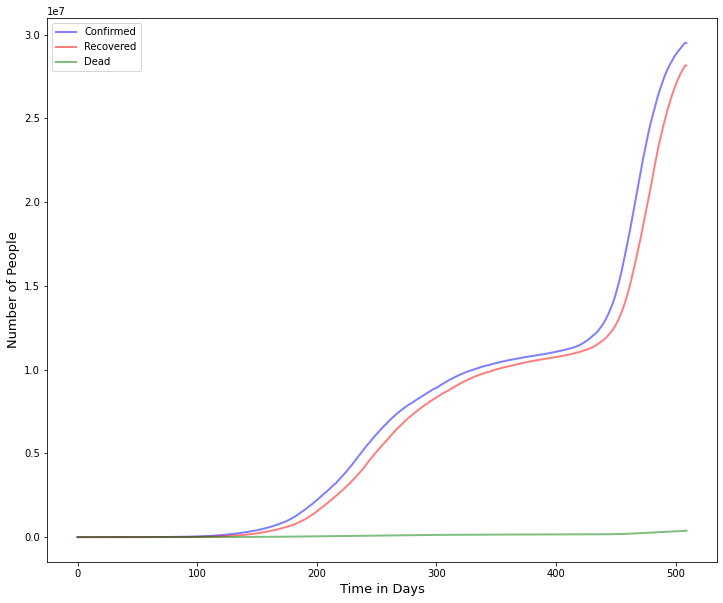

In [ ]:
fig = plt.figure(facecolor='w', figsize=(12,10))
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(t, confirmed, 'b', alpha=0.5, lw=2, label='Confirmed')
ax.plot(t, recovered, 'r', alpha=0.5, lw=2, label='Recovered')
ax.plot(t, dead, 'g', alpha=0.5, lw=2, label='Dead')
ax.set_xlabel('Time in Days', size=13)
ax.set_ylabel('Number of People', size=13)
legend = ax.legend()
plt.show()

In [ ]:
activecases = confirmed - recovered - dead
activecases

1/22/20          0
1/23/20          0
1/24/20          0
1/25/20          0
1/26/20          0
            ...   
6/10/21    1121671
6/11/21    1080690
6/12/21    1026159
6/13/21     973158
6/14/21     973158
Length: 510, dtype: object

In [ ]:
datadf = {"Active Cases": activecases, "Infected": confirmed, "Recovered": recovered}
days = [x for x in range(0,len(activecases))]
df = pd.DataFrame(data=datadf)
df["Days"] = days
df

Active Cases  Infected Recovered  Days
1/22/20            0         0         0     0
1/23/20            0         0         0     1
1/24/20            0         0         0     2
1/25/20            0         0         0     3
1/26/20            0         0         0     4
...              ...       ...       ...   ...
6/10/21      1121671  29274823  27790073   505
6/11/21      1080690  29359155  27911384   506
6/12/21      1026159  29439989  28043446   507
6/13/21       973158  29510410  28162947   508
6/14/21       973158  29510410  28162947   509

[510 rows x 4 columns]

In [ ]:
index = list(df.index.values)
index.index('3/25/20')

63

We will divide the dataset in two parts - Pre-Lockdown Period and Lockdown Period \\
1) Pre Lockdown Period - 22/1/20 - 25/3/2020 \\
2) Lockdown Period - 25/3/2020 - 7/6/2020

**Pre Lockdown Period**

In [ ]:
data = df["Active Cases"][index.index('1/22/20'):index.index('3/25/20')]
infected = df["Infected"][index.index('1/22/20'):index.index('3/25/20')]
recovered = df["Recovered"][index.index('1/22/20'):index.index('3/25/20')]

In [ ]:
def loss(point, data, recovered, s_0, i_0, r_0):
    size = len(data)
    beta, gamma = point
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I/s_0, beta*S*I/s_0-gamma*I, gamma*I]
    solution = solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1), vectorized=True)
    l1 = np.sqrt(np.mean((solution.y[1] - data)**2))
    l2 = np.sqrt(np.mean((solution.y[2] - recovered)**2))
    alpha = 0.1
    return alpha * l1 + (1 - alpha) * l2

In [ ]:
def predict(beta, gamma, data, recovered, s_0, i_0, r_0):
    new_index = list(data.index.values)
    size = len(new_index)
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I/s_0, beta*S*I/s_0-gamma*I, gamma*I]
    extended_actual = np.concatenate((data.values, [None] * (size - len(data.values))))
    extended_recovered = np.concatenate((recovered.values, [None] * (size - len(recovered.values))))
    return new_index, extended_actual, extended_recovered, solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1))

In [ ]:
def train(recovered, infected, data):
    recovered = recovered
    infected = infected
    data = data

    optimal = minimize(loss, [0.001, 0.001], args=(data, recovered, s_0, i_0, r_0), method='L-BFGS-B', bounds=[(0.00000001, 2), (0.00000001, 0.4)])
    print(optimal)
    beta, gamma = optimal.x
    new_index, extended_actual, extended_recovered, prediction = predict(beta, gamma, data, recovered, s_0, i_0, r_0)
    df = pd.DataFrame({'Actual Infected': extended_actual, 'Actual Recovered': extended_recovered, 'Susceptible': prediction.y[0], 'Predicted Infected': prediction.y[1], 'Predicted Recovered': prediction.y[2]}, index=new_index)
    fig, ax = plt.subplots(figsize=(25, 10))
    ax.set_title('Curves using JHU Dataset for India in Pre-Lockdown Period')
    df.plot(ax=ax)
    print(f"country=India, beta={beta:.8f}, gamma={gamma:.8f}, r_0:{(beta/gamma):.8f}")

In [ ]:
s_0 = 200000
i_0 = 1
r_0 = 0

      fun: 5.959541621001211
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-4.79616347e-05, -2.94697600e-04])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 99
      nit: 9
   status: 0
  success: True
        x: array([0.10311084, 0.00743185])
country=India, beta=0.10311084, gamma=0.00743185, r_0:13.87419019


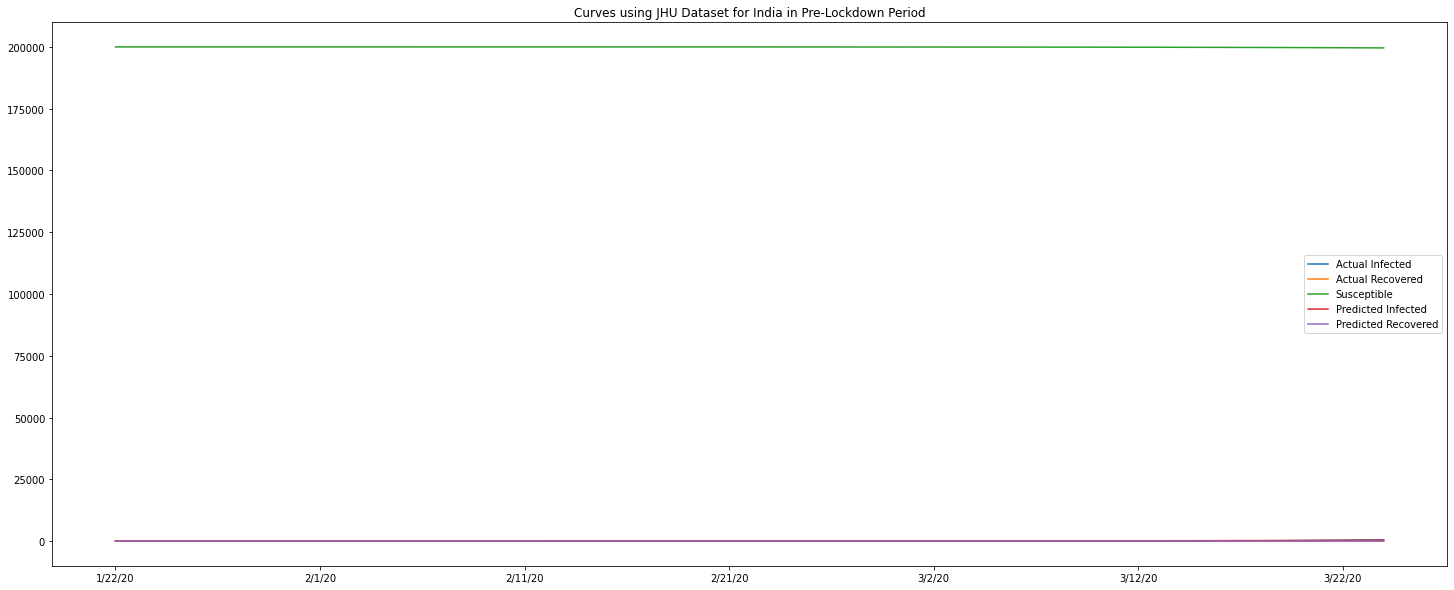

In [ ]:
train(recovered, infected, data)

**Lockdown Period**

In [ ]:
data = df["Active Cases"][index.index('1/22/20'):index.index('3/25/20')]
infected = df["Infected"][index.index('1/22/20'):index.index('3/25/20')]
recovered = df["Recovered"][index.index('1/22/20'):index.index('3/25/20')]

In [ ]:
def loss(point, data, recovered, s_0, i_0, r_0):
    size = len(data)
    beta, gamma = point
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I/s_0, beta*S*I/s_0-gamma*I, gamma*I]
    solution = solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1), vectorized=True)
    l1 = np.sqrt(np.mean((solution.y[1] - data)**2))
    l2 = np.sqrt(np.mean((solution.y[2] - recovered)**2))
    alpha = 0.1
    return alpha * l1 + (1 - alpha) * l2

In [ ]:
print(index.index('3/25/20'), index.index('6/1/20'))

63 131


In [ ]:
pres_fut = np.array(list(data.index.values)+ list((np.array(index[63:131]))))

In [ ]:
def predict(beta, gamma, data, recovered, s_0, i_0, r_0):
    new_index = pres_fut
    size = len(new_index)
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I/s_0, beta*S*I/s_0-gamma*I, gamma*I]
    extended_actual = np.concatenate((data.values, [None] * (size - len(data.values))))
    extended_recovered = np.concatenate((recovered.values, [None] * (size - len(recovered.values))))
    return new_index, extended_actual, extended_recovered, solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1))

In [ ]:
def train(recovered, infected, data):
    recovered = recovered
    infected = infected
    data = data

    optimal = minimize(loss, [0.001, 0.001], args=(data, recovered, s_0, i_0, r_0), method='L-BFGS-B', bounds=[(0.00000001, 2), (0.00000001, 0.4)])
    print(optimal)
    beta, gamma = optimal.x
    new_index, extended_actual, extended_recovered, prediction = predict(beta, gamma, data, recovered, s_0, i_0, r_0)
    df = pd.DataFrame({'Actual Infected': extended_actual, 'Actual Recovered': extended_recovered, 'Susceptible': prediction.y[0], 'Predicted Infected': prediction.y[1], 'Predicted Recovered': prediction.y[2]}, index=new_index)
    fig, ax = plt.subplots(figsize=(25, 10))
    ax.set_title('Curves using JHU Dataset for India in Lockdown Period and Prediction for 50 days')
    df.plot(ax=ax)
    print(f"country=India, beta={beta:.8f}, gamma={gamma:.8f}, r_0:{(beta/gamma):.8f}")
    return prediction.y[0], prediction.y[1], prediction.y[2]

In [ ]:
print(data[0], infected[0], recovered[0])

0 0 0


In [ ]:
s_0 = 30000
i_0 = 1
r_0 = 0

      fun: 5.9894798386715085
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([0.00013234, 0.00014708])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 96
      nit: 10
   status: 0
  success: True
        x: array([0.10321845, 0.00741731])
country=India, beta=0.10321845, gamma=0.00741731, r_0:13.91588610


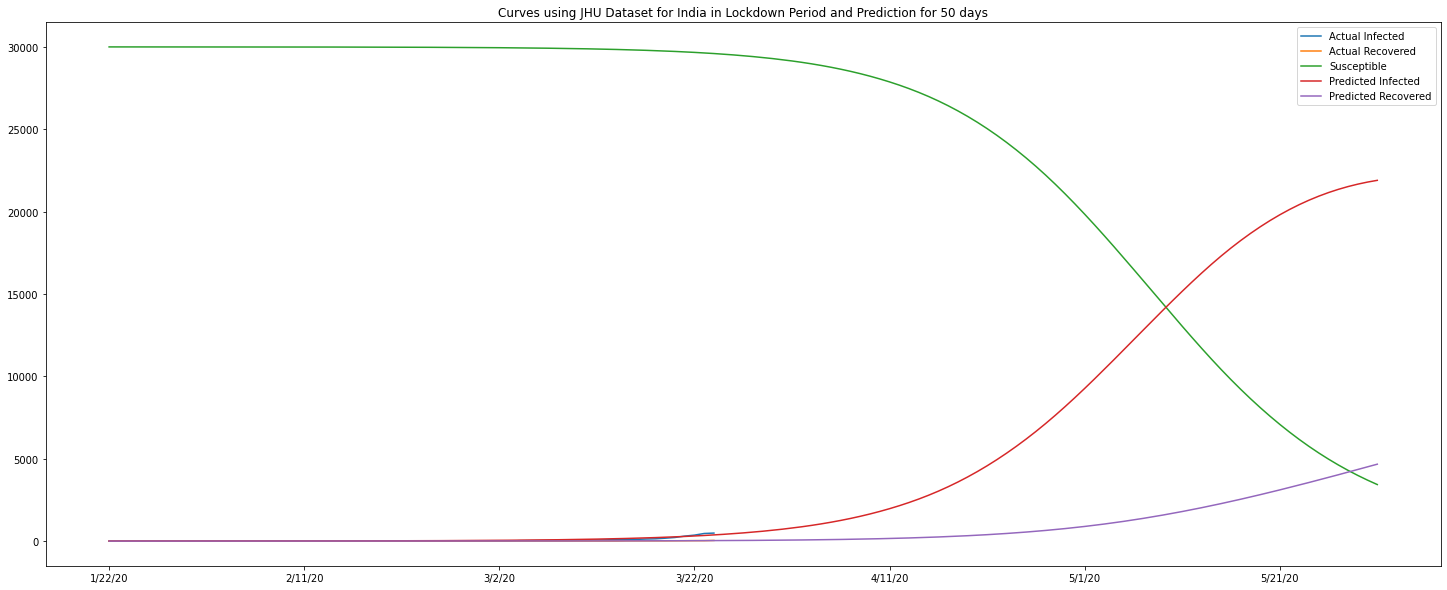

In [ ]:
susceptible, predicted_infected, predicted_recovered = train(recovered, infected, data)

In [ ]:
actual_infected = df["Active Cases"][:len(susceptible)]
actual_recovered = df["Recovered"][:len(susceptible)]

In [ ]:
plot_data = {"Predicted Infected": predicted_infected, "Predicted Recovered": predicted_recovered, "Susceptible": susceptible, "Actual Infected": actual_infected, "Actual Recovered": actual_recovered}
df_plot = pd.DataFrame(data=plot_data)
df_plot

Predicted Infected  Predicted Recovered   Susceptible  \
1/22/20            1.000000             0.000000  30000.000000   
1/23/20            1.100540             0.007784  29999.891675   
1/24/20            1.211198             0.016352  29999.772450   
1/25/20            1.332975             0.025780  29999.641245   
1/26/20            1.466982             0.036156  29999.496863   
...                     ...                  ...           ...   
5/27/20        21351.604549          4026.040066   4623.355384   
5/28/20        21521.682267          4185.099342   4294.218390   
5/29/20        21668.990193          4345.354107   3986.655701   
5/30/20        21794.693705          4506.629206   3699.677090   
5/31/20        21900.105343          4668.751843   3432.142815   

        Actual Infected Actual Recovered  
1/22/20               0                0  
1/23/20               0                0  
1/24/20               0                0  
1/25/20               0                0  
1/26/20               0                0  
...                 ...              ...  
5/27/20           85803            67749  
5/28/20           89755            70920  
5/29/20           85884            82627  
5/30/20           89706            86936  
5/31/20           93349            91852  

[131 rows x 5 columns]

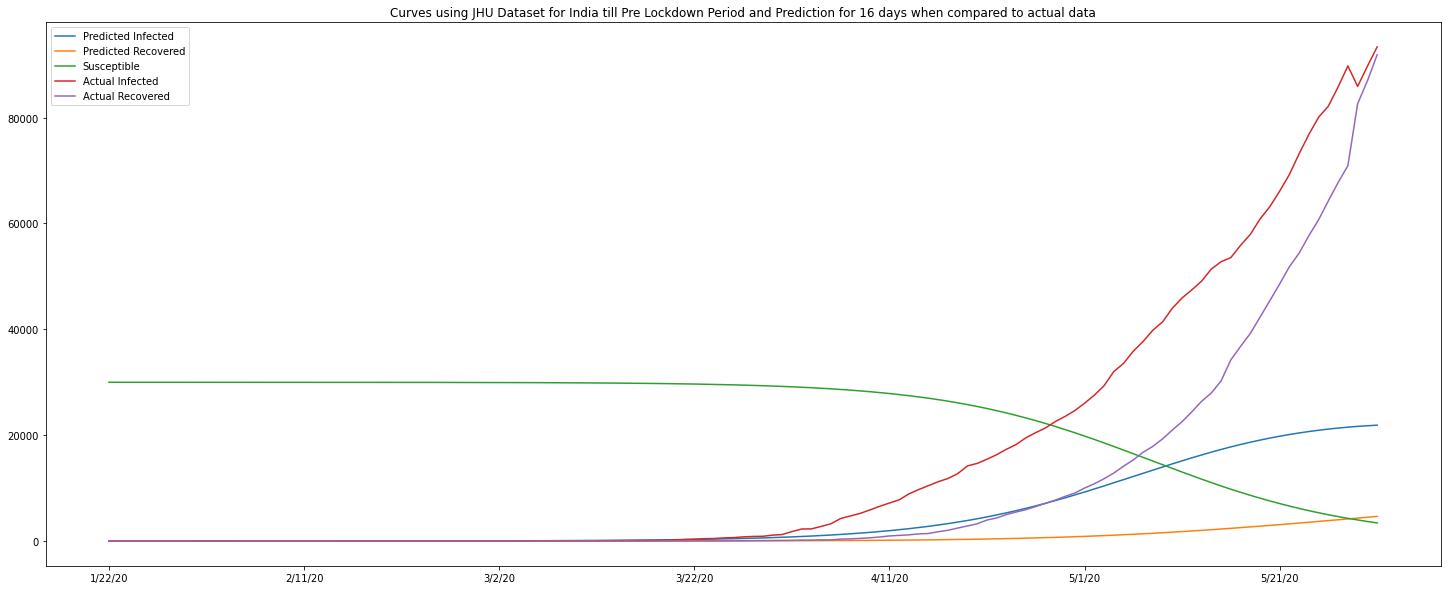

In [ ]:
fig, ax = plt.subplots(figsize=(25, 10))
ax.set_title('Curves using JHU Dataset for India till Pre Lockdown Period and Prediction for 16 days when compared to actual data')
df_plot.plot(ax=ax)

In [ ]:
print(index.index('3/25/20'))

63


In [ ]:
pres_fut = list(data.index.values) + list(np.array(index[63:240]))

      fun: 5.9894798386715085
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([0.00013234, 0.00014708])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 96
      nit: 10
   status: 0
  success: True
        x: array([0.10321845, 0.00741731])
country=India, beta=0.10321845, gamma=0.00741731, r_0:13.91588610


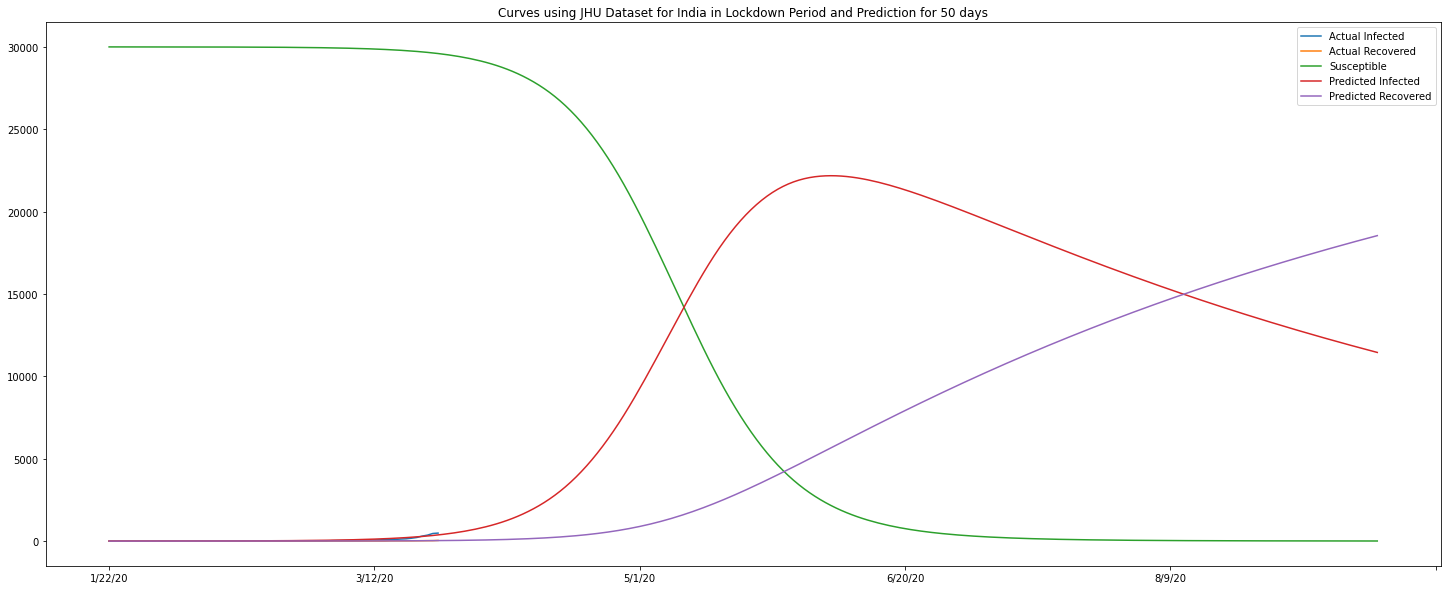

In [ ]:
susceptible, predicted_infected, predicted_recovered = train(recovered, infected, data)

In [ ]:
actual_infected = df["Active Cases"][:len(susceptible)]
actual_recovered = df["Recovered"][:len(susceptible)]

In [ ]:
plot_data = {"Predicted Infected": predicted_infected, "Predicted Recovered": predicted_recovered, "Susceptible": susceptible, "Actual Infected": actual_infected, "Actual Recovered": actual_recovered}
df_plot = pd.DataFrame(data=plot_data)
df_plot

Predicted Infected  Predicted Recovered   Susceptible  \
1/22/20            1.000000             0.000000  30000.000000   
1/23/20            1.100540             0.007784  29999.891675   
1/24/20            1.211198             0.016352  29999.772450   
1/25/20            1.332975             0.025780  29999.641245   
1/26/20            1.466982             0.036156  29999.496863   
...                     ...                  ...           ...   
9/13/20        11796.264440         18198.296804      6.438756   
9/14/20        11709.345434         18285.470670      6.183896   
9/15/20        11623.056969         18372.002170      5.940861   
9/16/20        11537.395030         18457.895962      5.709008   
9/17/20        11452.355586         18543.156670      5.487744   

        Actual Infected Actual Recovered  
1/22/20               0                0  
1/23/20               0                0  
1/24/20               0                0  
1/25/20               0                0  
1/26/20               0                0  
...                 ...              ...  
9/13/20          986598          3780107  
9/14/20          990061          3859399  
9/15/20          995933          3942360  
9/16/20         1009976          4025079  
9/17/20         1017754          4112551  

[240 rows x 5 columns]

In [ ]:
days = list(range(index.index('1/22/20'), index.index('9/17/20')+1))
len(days)

240

In [ ]:
len(df_plot['Predicted Recovered'])

240

In [ ]:
x, y = intersection(days, df_plot['Predicted Infected'], days, df_plot['Predicted Recovered'])

In [ ]:
x

array([202.51464826])

In [ ]:
start = index.index('4/1/20')
pw_1 = abs(x[0] - start)
pw_1

132.5146482608652

Predicted Lockdown Period = 40 , Actual Lockdown = 65

**Taking Date till 7/6/2020 for plotting SIR curves**

In [ ]:
data = df["Active Cases"][:index.index('7/26/20')]
infected = df["Infected"][:index.index('7/26/20')]
recovered = df["Recovered"][:index.index('7/26/20')]

In [ ]:
def loss(point, data, recovered, s_0, i_0, r_0):
    size = len(data)
    beta, gamma = point
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I/s_0, beta*S*I/s_0-gamma*I, gamma*I]
    solution = solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1), vectorized=True)
    l1 = np.sqrt(np.mean((solution.y[1] - data)**2))
    l2 = np.sqrt(np.mean((solution.y[2] - recovered)**2))
    alpha = 0.1
    return alpha * l1 + (1 - alpha) * l2

In [ ]:
def predict(beta, gamma, data, recovered, s_0, i_0, r_0):
    new_index = list(data.index.values)
    size = len(new_index)
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I/s_0, beta*S*I/s_0-gamma*I, gamma*I]
    extended_actual = np.concatenate((data.values, [None] * (size - len(data.values))))
    extended_recovered = np.concatenate((recovered.values, [None] * (size - len(recovered.values))))
    return new_index, extended_actual, extended_recovered, solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1))

In [ ]:
def train(recovered, infected, data):
    recovered = recovered
    infected = infected
    data = data

    optimal = minimize(loss, [0.001, 0.001], args=(data, recovered, s_0, i_0, r_0), method='L-BFGS-B', bounds=[(0.00000001, 2), (0.00000001, 0.4)])
    print(optimal)
    beta, gamma = optimal.x
    new_index, extended_actual, extended_recovered, prediction = predict(beta, gamma, data, recovered, s_0, i_0, r_0)
    df = pd.DataFrame({'Actual Infected': extended_actual, 'Actual Recovered': extended_recovered, 'Susceptible': prediction.y[0], 'Predicted Infected': prediction.y[1], 'Predicted Recovered': prediction.y[2]}, index=new_index)
    fig, ax = plt.subplots(figsize=(25, 10))
    ax.set_title('Curves using JHU Dataset for India till Lockdown Period')
    df.plot(ax=ax)
    print(f"country=India, beta={beta:.8f}, gamma={gamma:.8f}, r_0:{(beta/gamma):.8f}")

In [ ]:
print(data[0], infected[0], recovered[0])

0 0 0


In [ ]:
s_0 = 3000000
i_0 = 1
r_0 = 1

      fun: 26028.433175711143
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 7315.15210646, -7159.91409379])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 162
      nit: 23
   status: 0
  success: True
        x: array([0.36360443, 0.2894913 ])
country=India, beta=0.36360443, gamma=0.28949130, r_0:1.25601160


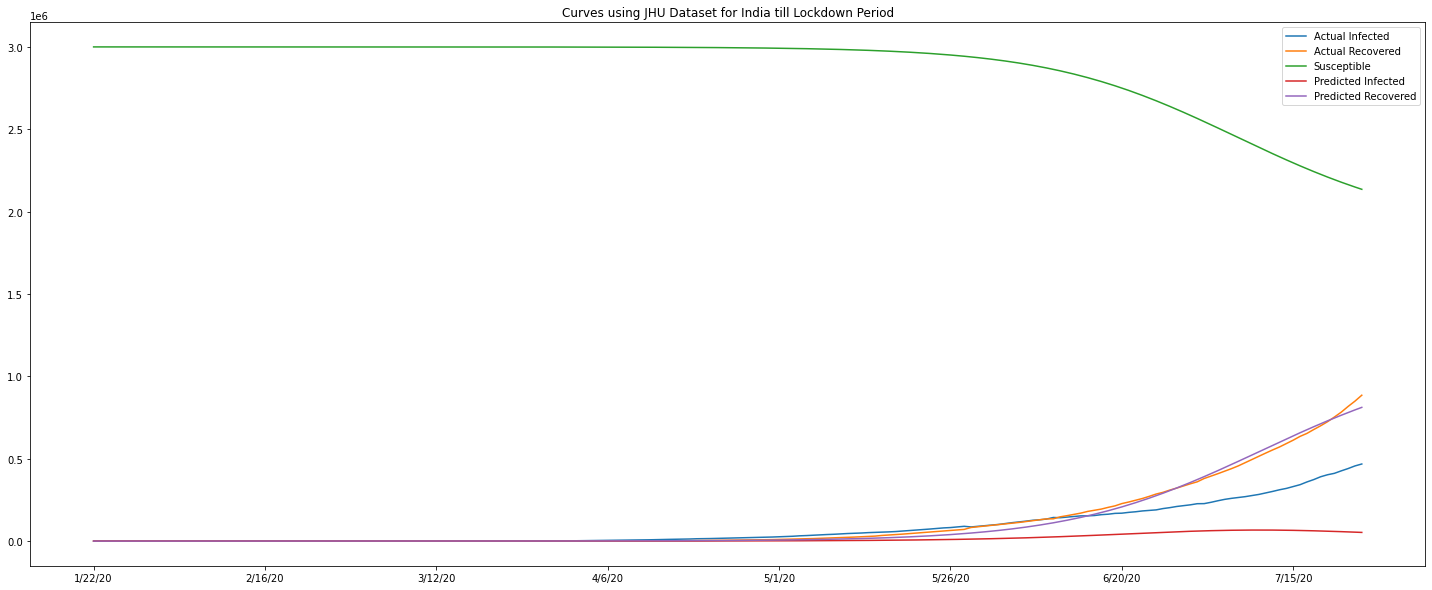

In [ ]:
train(recovered, infected, data)

**Predicting the curve for next 30 days**

In [ ]:
data = df["Active Cases"][:index.index('6/7/20')]
infected = df["Infected"][:index.index('6/7/20')]
recovered = df["Recovered"][:index.index('6/7/20')]

In [ ]:
def loss(point, data, recovered, s_0, i_0, r_0):
    size = len(data)
    beta, gamma = point
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I/s_0, beta*S*I/s_0-gamma*I, gamma*I]
    solution = solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1), vectorized=True)
    l1 = np.sqrt(np.mean((solution.y[1] - data)**2))
    l2 = np.sqrt(np.mean((solution.y[2] - recovered)**2))
    alpha = 0.1
    return alpha * l1 + (1 - alpha) * l2

In [ ]:
print(index.index('6/7/20'))

137


In [ ]:
pres_fut = np.array(list(data.index.values)+ list((np.array(index[137:187]))))

In [ ]:
def predict(beta, gamma, data, recovered, s_0, i_0, r_0):
    new_index = pres_fut
    size = len(new_index)
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I/s_0, beta*S*I/s_0-gamma*I, gamma*I]
    extended_actual = np.concatenate((data.values, [None] * (size - len(data.values))))
    extended_recovered = np.concatenate((recovered.values, [None] * (size - len(recovered.values))))
    return new_index, extended_actual, extended_recovered, solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1))

In [ ]:
def train(recovered, infected, data):
    recovered = recovered
    infected = infected
    data = data

    optimal = minimize(loss, [0.001, 0.001], args=(data, recovered, s_0, i_0, r_0), method='L-BFGS-B', bounds=[(0.00000001, 2), (0.00000001, 0.4)])
    print(optimal)
    beta, gamma = optimal.x
    new_index, extended_actual, extended_recovered, prediction = predict(beta, gamma, data, recovered, s_0, i_0, r_0)
    df = pd.DataFrame({'Actual Infected': extended_actual, 'Actual Recovered': extended_recovered, 'Susceptible': prediction.y[0], 'Predicted Infected': prediction.y[1], 'Predicted Recovered': prediction.y[2]}, index=new_index)
    fig, ax = plt.subplots(figsize=(25, 10))
    ax.set_title('Curves using JHU Dataset for India in Lockdown Period and Prediction for 50 days')
    df.plot(ax=ax)
    print(f"country=India, beta={beta:.8f}, gamma={gamma:.8f}, r_0:{(beta/gamma):.8f}")
    return prediction.y[0], prediction.y[1], prediction.y[2]

In [ ]:
print(data[0], infected[0], recovered[0])

0 0 0


In [ ]:
s_0 = 5000000
i_0 = 1
r_0 = 1

      fun: 5796.556137173236
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.9705218 ,  0.90685717])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 138
      nit: 19
   status: 0
  success: True
        x: array([0.17796994, 0.09050226])
country=India, beta=0.17796994, gamma=0.09050226, r_0:1.96646969


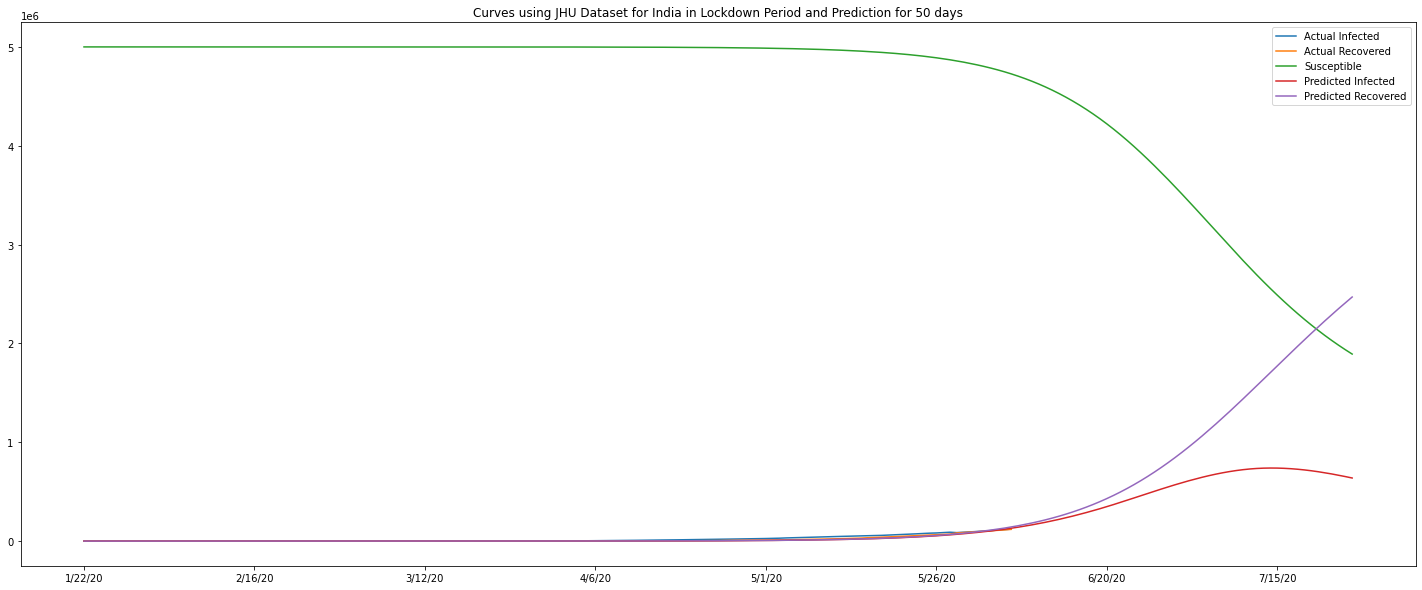

In [ ]:
susceptible, predicted_infected, predicted_recovered = train(recovered, infected, data)

In [ ]:
actual_infected = df["Active Cases"][:len(susceptible)]
actual_recovered = df["Recovered"][:len(susceptible)]

In [ ]:
plot_data = {"Predicted Infected": predicted_infected, "Predicted Recovered": predicted_recovered, "Susceptible": susceptible, "Actual Infected": actual_infected, "Actual Recovered": actual_recovered}
df_plot = pd.DataFrame(data=plot_data)
df_plot

Predicted Infected  Predicted Recovered   Susceptible  \
1/22/20            1.000000         1.000000e+00  5.000000e+06   
1/23/20            1.091407         1.094578e+00  5.000000e+06   
1/24/20            1.191170         1.197803e+00  5.000000e+06   
1/25/20            1.300089         1.310500e+00  4.999999e+06   
1/26/20            1.418964         1.433500e+00  4.999999e+06   
...                     ...                  ...           ...   
7/22/20       691239.404272         2.228513e+06  2.080250e+06   
7/23/20       679333.224960         2.290526e+06  2.030142e+06   
7/24/20       666449.334262         2.351420e+06  1.982132e+06   
7/25/20       652704.383555         2.411113e+06  1.936185e+06   
7/26/20       638220.601951         2.469532e+06  1.892250e+06   

        Actual Infected Actual Recovered  
1/22/20               0                0  
1/23/20               0                0  
1/24/20               0                0  
1/25/20               0                0  
1/26/20               0                0  
...                 ...              ...  
7/22/20          426330           782607  
7/23/20          440298           817209  
7/24/20          456234           849432  
7/25/20          468002           885573  
7/26/20          485277           917568  

[187 rows x 5 columns]

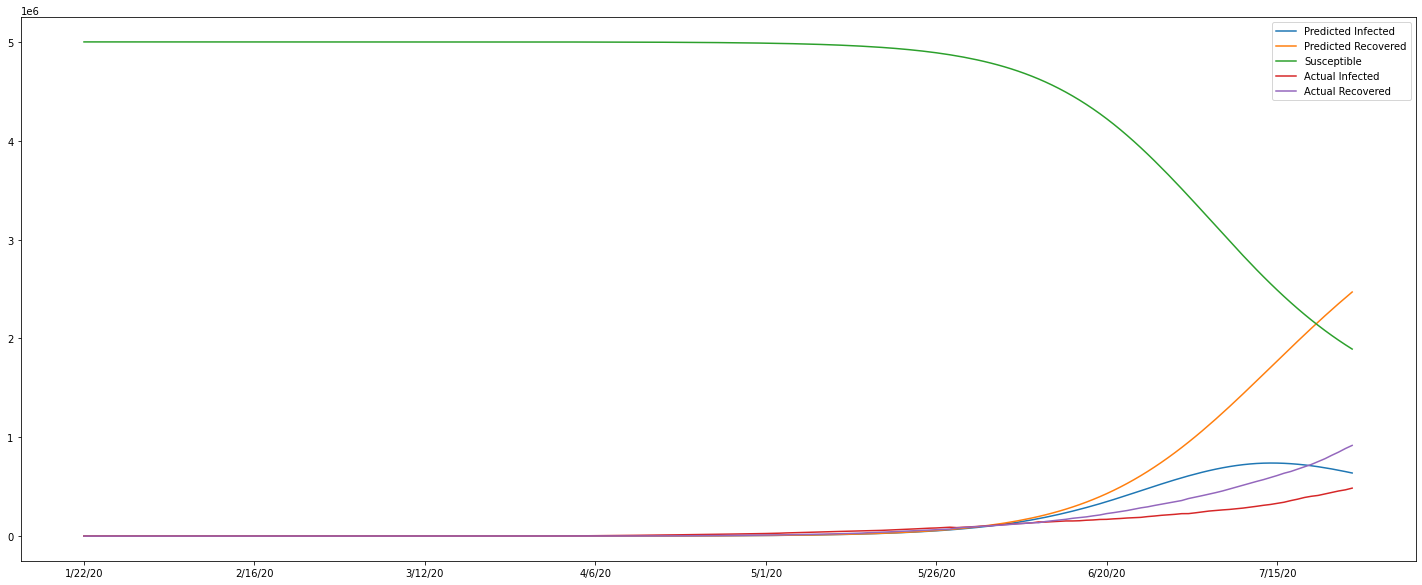

In [ ]:
fig, ax = plt.subplots(figsize=(25, 10))
df_plot.plot(ax=ax)

In [ ]:
!pip install plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


fig=go.Figure()
fig.layout.plot_bgcolor = '#FFFFFF'
fig.layout.paper_bgcolor = '#FFFFFF'
fig.add_trace(go.Scatter(x=pres_fut, y=susceptible,
                    mode='lines',name="Active Cases", line=dict(color='blue', dash='dashdot', shape='linear')))

fig.add_trace(go.Scatter(x=pres_fut, y=actual_infected,
                    mode='lines+markers',name="Infected Cases", line=dict(color='red', dash='dash', shape='linear'), marker = dict(symbol = "cross-dot")))

fig.add_trace(go.Scatter(x=pres_fut, y=predicted_infected,
                    mode='lines',name="Predicted Infected",
                    line=dict(color='red', dash='dash', shape='linear')))

fig.add_trace(go.Scatter(x=pres_fut, y=predicted_recovered,
                    mode='lines',name="Predicted Recovered",
                    line=dict(color='green', dash='dot', shape='linear')))
fig.add_trace(go.Scatter(x=pres_fut, y=actual_recovered,
                    mode='lines+markers',name="Recovered Cases", line=dict(color='green', dash='dot', shape='linear')))

fig.update_layout(xaxis_title="Date",yaxis_title="Covid 19 Cases",
                 legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Transfer Function**

Input Signal

In [ ]:
#Sampling Rate
t = np.linspace(0, 300, 300, endpoint=True)

In [ ]:
pw_1

132.5146482608652

In [ ]:
square_wave_1 = []
for i in range(index.index('1/22/20'), index.index('3/22/20')):
  square_wave_1.append(0)
while len(square_wave_1) < 300:
  for i in range(0, 40):
    if len(square_wave_1) >= 300:
      break
    else:
      square_wave_1.append(1)
  for i in range(0, 40):
    if len(square_wave_1) >= 300:
      break
    else:
      square_wave_1.append(0)

In [ ]:
len(square_wave_1)

300

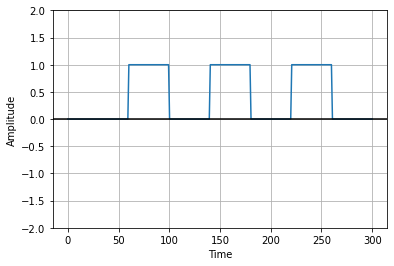

In [ ]:
# Plot the square wave signal 
plt.plot(t, square_wave_1)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.ylim(-2, 2)
plt.show()

Transfer Function

In [ ]:
k1 = 0.10311084
k2 = 0.00743185
R = k1/k2
M = (k1 * math.log(R))/2
print(k1, k2, M)

0.10311084 0.00743185 0.13559228619917793


In [ ]:
num = [M]
den = [1, M]
transfer_function_1 = signal.TransferFunction(num, den)
transfer_function_1

TransferFunctionContinuous(
array([0.13559229]),
array([1.        , 0.13559229]),
dt: None
)

Square Wave Response

In [ ]:
t_out, y_out_1, x_out = lsim(system=transfer_function_1, T=t, U=square_wave_1)

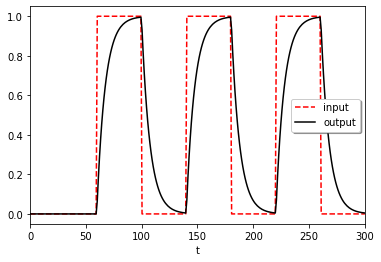

In [ ]:
plot.plot(t, square_wave_1, 'r--', linewidth=1.5, label='input')
plot.plot(t_out, y_out_1, 'k', linewidth=1.5, label='output')
plot.legend(loc='best', shadow=True, framealpha=1)
# plot.grid(alpha=0.3)
plot.xlabel('t')
plot.xlim(0,300)
plot.show()

# **SIR for Germany using JHU Dataset**

Dataset - https://github.com/CSSEGISandData/COVID-19 \\
Reference - https://www.lewuathe.com/covid-19-dynamics-with-sir-model.html

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
from scipy.integrate import odeint

In [ ]:
file_path = '/content/time_series_covid19_confirmed_global.csv'
df_confirm = pd.read_csv(file_path)
file_path = '/content/time_series_covid19_recovered_global.csv'
df_recovered = pd.read_csv(file_path)
file_path = '/content/time_series_covid19_deaths_global.csv'
df_dead = pd.read_csv(file_path)

In [ ]:
df_confirm

Province/State      Country/Region        Lat        Long  1/22/20  \
0              NaN         Afghanistan  33.939110   67.709953        0   
1              NaN             Albania  41.153300   20.168300        0   
2              NaN             Algeria  28.033900    1.659600        0   
3              NaN             Andorra  42.506300    1.521800        0   
4              NaN              Angola -11.202700   17.873900        0   
..             ...                 ...        ...         ...      ...   
271            NaN             Vietnam  14.058324  108.277199        0   
272            NaN  West Bank and Gaza  31.952200   35.233200        0   
273            NaN               Yemen  15.552727   48.516388        0   
274            NaN              Zambia -13.133897   27.849332        0   
275            NaN            Zimbabwe -19.015438   29.154857        0   

     1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  6/5/21  6/6/21  6/7/21  \
0          0        0        0        0        0  ...   77963   79224   80841   
1          0        0        0        0        0  ...  132374  132379  132384   
2          0        0        0        0        0  ...  130681  130958  131283   
3          0        0        0        0        0  ...   13758   13758   13777   
4          0        0        0        0        0  ...   35594   35772   35854   
..       ...      ...      ...      ...      ...  ...     ...     ...     ...   
271        2        2        2        2        2  ...    8580    8791    9027   
272        0        0        0        0        0  ...  309853  310026  310026   
273        0        0        0        0        0  ...    6780    6787    6812   
274        0        0        0        0        0  ...   99540  100278  100765   
275        0        0        0        0        0  ...   39168   39189   39238   

     6/8/21  6/9/21  6/10/21  6/11/21  6/12/21  6/13/21  6/14/21  
0     82326   84050    85892    87716    88740    89861    91458  
1    132397  132415   132426   132437   132449   132459   132461  
2    131647  132034   132355   132727   133070   133388   133742  
3     13781   13791    13805    13813    13813    13813    13826  
4     36004   36115    36325    36455    36600    36705    36790  
..      ...     ...      ...      ...      ...      ...      ...  
271    9222    9635     9835    10048    10337    10630    10881  
272  310544  310544   311018   311018   311018   311534   311690  
273    6823    6832     6836     6856     6857     6862     6863  
274  101996  103763   105909   107974   110332   111746   113134  
275   39321   39432    39496    39688    39852    39959    40077  

[276 rows x 514 columns]

In [ ]:
df_recovered

Province/State      Country/Region        Lat        Long  1/22/20  \
0              NaN         Afghanistan  33.939110   67.709953        0   
1              NaN             Albania  41.153300   20.168300        0   
2              NaN             Algeria  28.033900    1.659600        0   
3              NaN             Andorra  42.506300    1.521800        0   
4              NaN              Angola -11.202700   17.873900        0   
..             ...                 ...        ...         ...      ...   
256            NaN             Vietnam  14.058324  108.277199        0   
257            NaN  West Bank and Gaza  31.952200   35.233200        0   
258            NaN               Yemen  15.552727   48.516388        0   
259            NaN              Zambia -13.133897   27.849332        0   
260            NaN            Zimbabwe -19.015438   29.154857        0   

     1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  6/5/21  6/6/21  6/7/21  \
0          0        0        0        0        0  ...   58265   58622   58998   
1          0        0        0        0        0  ...  129627  129664  129702   
2          0        0        0        0        0  ...   90995   91198   91413   
3          0        0        0        0        0  ...   13527   13527   13557   
4          0        0        0        0        0  ...   28866   28880   29329   
..       ...      ...      ...      ...      ...  ...     ...     ...     ...   
256        0        0        0        0        0  ...    3310    3368    3509   
257        0        0        0        0        0  ...  301670  301881  301881   
258        0        0        0        0        0  ...    3550    3571    3588   
259        0        0        0        0        0  ...   93036   93374   93694   
260        0        0        0        0        0  ...   36698   36728   36746   

     6/8/21  6/9/21  6/10/21  6/11/21  6/12/21  6/13/21  6/14/21  
0     59569   59871    60280    60598    60939    61410    61706  
1    129736  129761   129785   129807   129826   129842   129865  
2     91651   91894    92132    92384    92620    92852    93094  
3     13557   13569    13578    13591    13591    13591    13618  
4     29368   29553    29960    30101    30207    30282    30359  
..      ...     ...      ...      ...      ...      ...      ...  
256    3547    3636     3708     3804     3827     3998     4236  
257  302357  302357   302944   302944   302944   303813   304138  
258    3638    3675     3689     3697     3727     3743     3765  
259   93992   94189    94995    95674    96646    97756    98994  
260   36756   36917    36940    36970    36992    37004    37027  

[261 rows x 514 columns]

In [ ]:
df_dead

Province/State      Country/Region        Lat        Long  1/22/20  \
0              NaN         Afghanistan  33.939110   67.709953        0   
1              NaN             Albania  41.153300   20.168300        0   
2              NaN             Algeria  28.033900    1.659600        0   
3              NaN             Andorra  42.506300    1.521800        0   
4              NaN              Angola -11.202700   17.873900        0   
..             ...                 ...        ...         ...      ...   
271            NaN             Vietnam  14.058324  108.277199        0   
272            NaN  West Bank and Gaza  31.952200   35.233200        0   
273            NaN               Yemen  15.552727   48.516388        0   
274            NaN              Zambia -13.133897   27.849332        0   
275            NaN            Zimbabwe -19.015438   29.154857        0   

     1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  6/5/21  6/6/21  6/7/21  \
0          0        0        0        0        0  ...    3104    3145    3187   
1          0        0        0        0        0  ...    2451    2451    2452   
2          0        0        0        0        0  ...    3510    3518    3527   
3          0        0        0        0        0  ...     127     127     127   
4          0        0        0        0        0  ...     794     797     800   
..       ...      ...      ...      ...      ...  ...     ...     ...     ...   
271        0        0        0        0        0  ...      53      53      53   
272        0        0        0        0        0  ...    3516    3517    3517   
273        0        0        0        0        0  ...    1325    1329    1336   
274        0        0        0        0        0  ...    1303    1308    1315   
275        0        0        0        0        0  ...    1605    1606    1611   

     6/8/21  6/9/21  6/10/21  6/11/21  6/12/21  6/13/21  6/14/21  
0      3251    3305     3356     3412     3449     3527     3612  
1      2452    2452     2452     2453     2453     2453     2453  
2      3537    3544     3552     3560     3565     3571     3579  
3       127     127      127      127      127      127      127  
4       803     811      815      819      825      831      836  
..      ...     ...      ...      ...      ...      ...      ...  
271      55      55       55       57       58       59       59  
272    3520    3520     3524     3524     3524     3533     3539  
273    1336    1337     1338     1342     1347     1349     1350  
274    1321    1324     1332     1348     1365     1389     1416  
275    1617    1622     1626     1629     1632     1632     1635  

[276 rows x 514 columns]

In [ ]:
Germany_confirm = df_confirm.loc[df_confirm['Country/Region'] == 'Germany']
Germany_confirm

Province/State Country/Region        Lat       Long  1/22/20  1/23/20  \
134            NaN        Germany  51.165691  10.451526        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...   6/5/21   6/6/21   6/7/21  \
134        0        0        0        1  ...  3706934  3708898  3710342   

      6/8/21   6/9/21  6/10/21  6/11/21  6/12/21  6/13/21  6/14/21  
134  3712595  3715870  3718617  3720811  3722295  3723295  3724168  

[1 rows x 514 columns]

In [ ]:
confirmed = Germany_confirm.iloc[0].loc['1/22/20':]
confirmed

1/22/20          0
1/23/20          0
1/24/20          0
1/25/20          0
1/26/20          0
            ...   
6/10/21    3718617
6/11/21    3720811
6/12/21    3722295
6/13/21    3723295
6/14/21    3724168
Name: 134, Length: 510, dtype: object

In [ ]:
Germany_recovered = df_recovered.loc[df_recovered['Country/Region'] == 'Germany']
Germany_recovered

Province/State Country/Region        Lat       Long  1/22/20  1/23/20  \
119            NaN        Germany  51.165691  10.451526        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...   6/5/21   6/6/21   6/7/21  \
119        0        0        0        0  ...  3538290  3542000  3549820   

      6/8/21   6/9/21  6/10/21  6/11/21  6/12/21  6/13/21  6/14/21  
119  3557840  3563140  3568460  3574000  3577840  3581340  3585660  

[1 rows x 514 columns]

In [ ]:
recovered = Germany_recovered.iloc[0].loc['1/22/20':]
recovered

1/22/20          0
1/23/20          0
1/24/20          0
1/25/20          0
1/26/20          0
            ...   
6/10/21    3568460
6/11/21    3574000
6/12/21    3577840
6/13/21    3581340
6/14/21    3585660
Name: 119, Length: 510, dtype: object

In [ ]:
Germany_dead = df_dead.loc[df_dead['Country/Region'] == 'Germany']
Germany_dead

Province/State Country/Region        Lat       Long  1/22/20  1/23/20  \
134            NaN        Germany  51.165691  10.451526        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  6/5/21  6/6/21  6/7/21  6/8/21  \
134        0        0        0        0  ...   89228   89249   89390   89497   

     6/9/21  6/10/21  6/11/21  6/12/21  6/13/21  6/14/21  
134   89592    89693    89821    89841    89849    89944  

[1 rows x 514 columns]

In [ ]:
dead = Germany_dead.iloc[0].loc['1/22/20':]
dead

1/22/20        0
1/23/20        0
1/24/20        0
1/25/20        0
1/26/20        0
           ...  
6/10/21    89693
6/11/21    89821
6/12/21    89841
6/13/21    89849
6/14/21    89944
Name: 134, Length: 510, dtype: object

In [ ]:
print(len(confirmed),len(recovered), len(dead))

510 510 510


In [ ]:
t = np.arange(0, len(confirmed))
len(t)

510

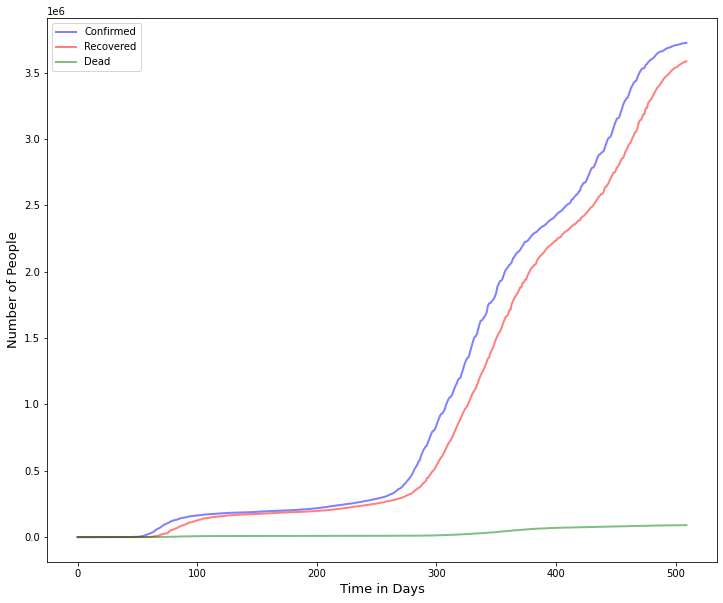

In [ ]:
fig = plt.figure(facecolor='w', figsize=(12,10))
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(t, confirmed, 'b', alpha=0.5, lw=2, label='Confirmed')
ax.plot(t, recovered, 'r', alpha=0.5, lw=2, label='Recovered')
ax.plot(t, dead, 'g', alpha=0.5, lw=2, label='Dead')
ax.set_xlabel('Time in Days', size=13)
ax.set_ylabel('Number of People', size=13)
legend = ax.legend()
plt.show()

In [ ]:
activecases = confirmed - recovered - dead
activecases

1/22/20        0
1/23/20        0
1/24/20        0
1/25/20        0
1/26/20        0
           ...  
6/10/21    60464
6/11/21    56990
6/12/21    54614
6/13/21    52106
6/14/21    48564
Length: 510, dtype: object

In [ ]:
datadf = {"Active Cases": activecases, "Infected": confirmed, "Recovered": recovered}
days = [x for x in range(0,len(activecases))]
df = pd.DataFrame(data=datadf)
df["Days"] = days
df

Active Cases Infected Recovered  Days
1/22/20            0        0         0     0
1/23/20            0        0         0     1
1/24/20            0        0         0     2
1/25/20            0        0         0     3
1/26/20            0        0         0     4
...              ...      ...       ...   ...
6/10/21        60464  3718617   3568460   505
6/11/21        56990  3720811   3574000   506
6/12/21        54614  3722295   3577840   507
6/13/21        52106  3723295   3581340   508
6/14/21        48564  3724168   3585660   509

[510 rows x 4 columns]

In [ ]:
index = list(df.index.values)
index.index('3/22/20')

60

We will divide the dataset in two parts - Pre-Lockdown Period and Lockdown Period \\
1) Pre Lockdown Period - 22/1/20 - 22/3/2020 \\
2) Lockdown Period - 22/3/2020 - 20/4/2020

**Pre Lockdown Period**

In [ ]:
data = df["Active Cases"][:index.index('3/22/20')]
infected = df["Infected"][:index.index('3/22/20')]
recovered = df["Recovered"][:index.index('3/22/20')]

In [ ]:
def loss(point, data, recovered, s_0, i_0, r_0):
    size = len(data)
    beta, gamma = point
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I/s_0, beta*S*I/s_0-gamma*I, gamma*I]
    solution = solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1), vectorized=True)
    l1 = np.sqrt(np.mean((solution.y[1] - data)**2))
    l2 = np.sqrt(np.mean((solution.y[2] - recovered)**2))
    alpha = 0.1
    return alpha * l1 + (1 - alpha) * l2

In [ ]:
def predict(beta, gamma, data, recovered, s_0, i_0, r_0):
    new_index = list(data.index.values)
    size = len(new_index)
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I/s_0, beta*S*I/s_0-gamma*I, gamma*I]
    extended_actual = np.concatenate((data.values, [None] * (size - len(data.values))))
    extended_recovered = np.concatenate((recovered.values, [None] * (size - len(recovered.values))))
    return new_index, extended_actual, extended_recovered, solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1))

In [ ]:
def train(recovered, infected, data):
    recovered = recovered
    infected = infected
    data = data

    optimal = minimize(loss, [0.001, 0.001], args=(data, recovered, s_0, i_0, r_0), method='L-BFGS-B', bounds=[(0.00000001, 2), (0.00000001, 0.4)])
    print(optimal)
    beta, gamma = optimal.x
    new_index, extended_actual, extended_recovered, prediction = predict(beta, gamma, data, recovered, s_0, i_0, r_0)
    df = pd.DataFrame({'Actual Infected': extended_actual, 'Actual Recovered': extended_recovered, 'Susceptible': prediction.y[0], 'Predicted Infected': prediction.y[1], 'Predicted Recovered': prediction.y[2]}, index=new_index)
    fig, ax = plt.subplots(figsize=(25, 10))
    ax.set_title('Curves using JHU Dataset for India in Pre-Lockdown Period')
    df.plot(ax=ax)
    print(f"country=India, beta={beta:.8f}, gamma={gamma:.8f}, r_0:{(beta/gamma):.8f}")

In [ ]:
s_0 = 50000
i_0 = 1
r_0 = 0

      fun: 169.5881906425958
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-2.01794137e-04,  5.81554339e+05])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 96
      nit: 9
   status: 0
  success: True
        x: array([1.72896747e-01, 1.00000000e-08])
country=India, beta=0.17289675, gamma=0.00000001, r_0:17289674.69776350


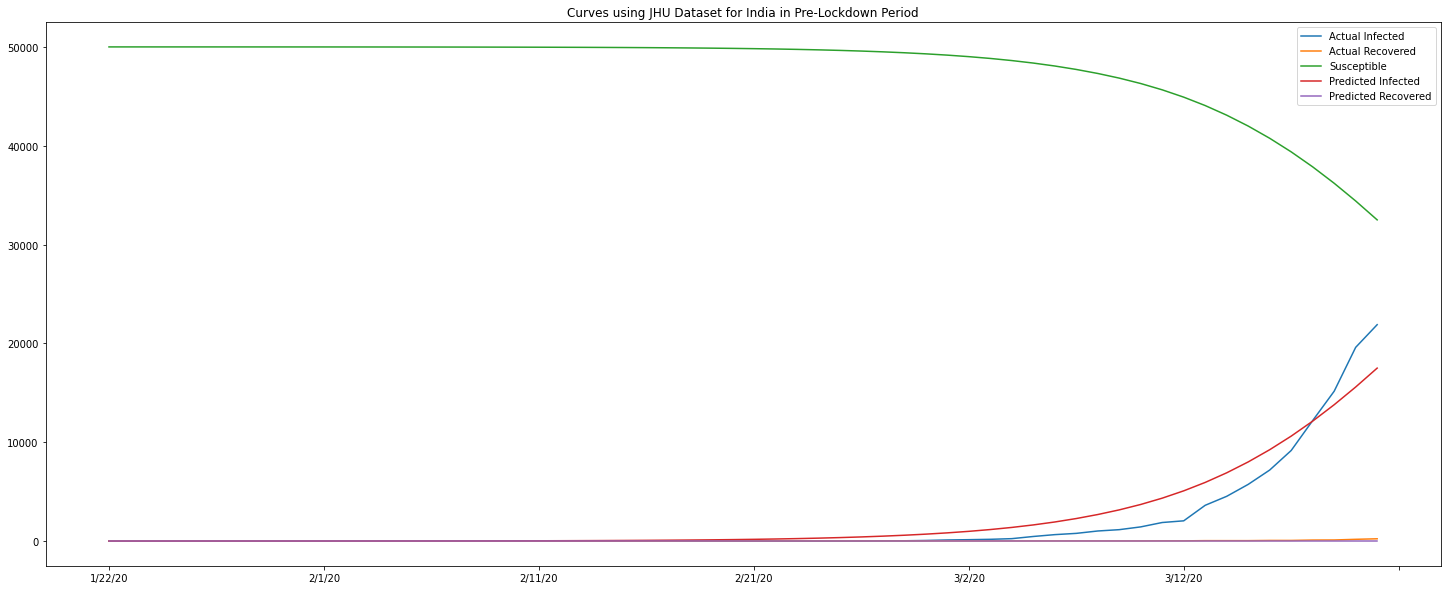

In [ ]:
train(recovered, infected, data)

**Lockdown Period**

In [ ]:
data = df["Active Cases"][:index.index('3/22/20')]
infected = df["Infected"][:index.index('3/22/20')]
recovered = df["Recovered"][:index.index('3/22/20')]

In [ ]:
def loss(point, data, recovered, s_0, i_0, r_0):
    size = len(data)
    beta, gamma = point
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I/s_0, beta*S*I/s_0-gamma*I, gamma*I]
    solution = solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1), vectorized=True)
    l1 = np.sqrt(np.mean((solution.y[1] - data)**2))
    l2 = np.sqrt(np.mean((solution.y[2] - recovered)**2))
    alpha = 0.1
    return alpha * l1 + (1 - alpha) * l2

In [ ]:
print(index.index('3/22/20'), index.index('4/20/20'))

60 89


In [ ]:
pres_fut = np.array(list(data.index.values)+ list((np.array(index[60:89]))))

In [ ]:
def predict(beta, gamma, data, recovered, s_0, i_0, r_0):
    new_index = pres_fut
    size = len(new_index)
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I/s_0, beta*S*I/s_0-gamma*I, gamma*I]
    extended_actual = np.concatenate((data.values, [None] * (size - len(data.values))))
    extended_recovered = np.concatenate((recovered.values, [None] * (size - len(recovered.values))))
    return new_index, extended_actual, extended_recovered, solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1))

In [ ]:
def train(recovered, infected, data):
    recovered = recovered
    infected = infected
    data = data

    optimal = minimize(loss, [0.001, 0.001], args=(data, recovered, s_0, i_0, r_0), method='L-BFGS-B', bounds=[(0.00000001, 2), (0.00000001, 0.4)])
    print(optimal)
    beta, gamma = optimal.x
    new_index, extended_actual, extended_recovered, prediction = predict(beta, gamma, data, recovered, s_0, i_0, r_0)
    df = pd.DataFrame({'Actual Infected': extended_actual, 'Actual Recovered': extended_recovered, 'Susceptible': prediction.y[0], 'Predicted Infected': prediction.y[1], 'Predicted Recovered': prediction.y[2]}, index=new_index)
    fig, ax = plt.subplots(figsize=(25, 10))
    ax.set_title('Curves using JHU Dataset for India in Lockdown Period and Prediction for 50 days')
    df.plot(ax=ax)
    print(f"country=India, beta={beta:.8f}, gamma={gamma:.8f}, r_0:{(beta/gamma):.8f}")
    return prediction.y[0], prediction.y[1], prediction.y[2]

In [ ]:
print(data[0], infected[0], recovered[0])

0 0 0


In [ ]:
s_0 = 2000000
i_0 = 1
r_0 = 1

      fun: 96.64601173914403
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1.35003120e-04, -5.54223334e-05])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 114
      nit: 11
   status: 0
  success: True
        x: array([0.16978988, 0.00154834])
country=India, beta=0.16978988, gamma=0.00154834, r_0:109.65900685


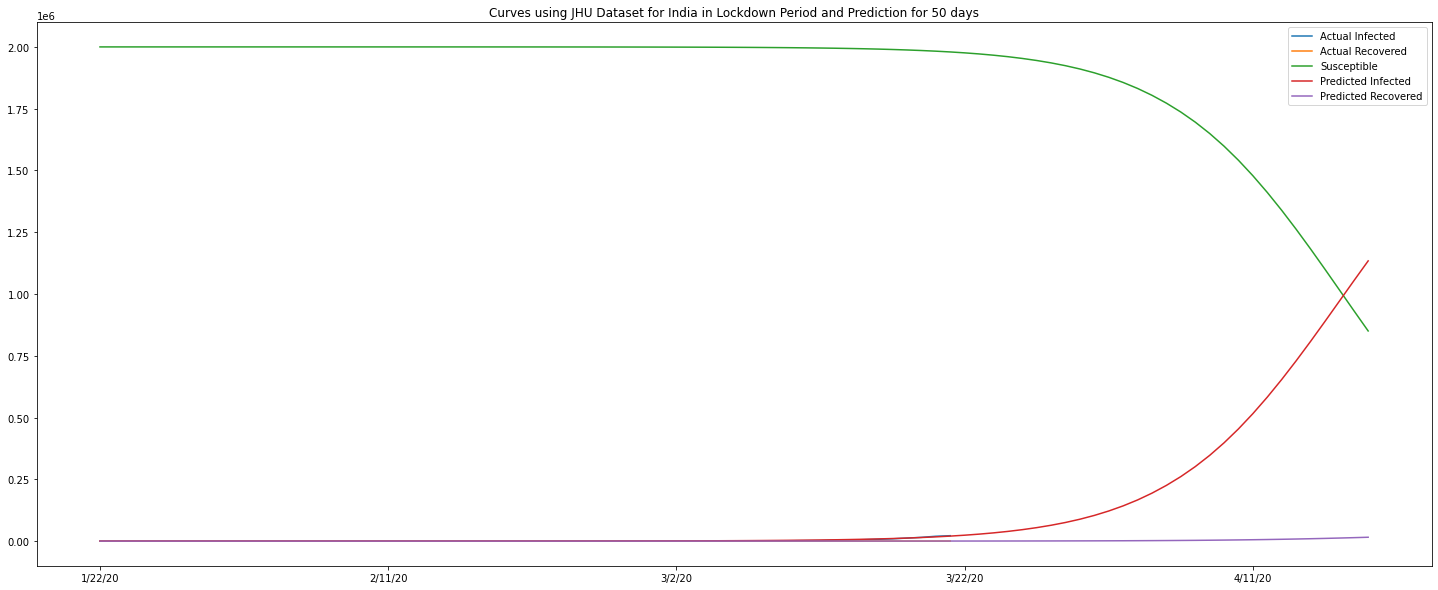

In [ ]:
susceptible, predicted_infected, predicted_recovered = train(recovered, infected, data)

In [ ]:
actual_infected = df["Active Cases"][:len(susceptible)]
actual_recovered = df["Recovered"][:len(susceptible)]

In [ ]:
plot_data = {"Predicted Infected": predicted_infected, "Predicted Recovered": predicted_recovered, "Susceptible": susceptible, "Actual Infected": actual_infected, "Actual Recovered": actual_recovered}
df_plot = pd.DataFrame(data=plot_data)
df_plot

Predicted Infected  Predicted Recovered   Susceptible  \
1/22/20        1.000000e+00             1.000000  2.000000e+06   
1/23/20        1.183223e+00             1.001686  2.000000e+06   
1/24/20        1.400029e+00             1.003682  2.000000e+06   
1/25/20        1.656672e+00             1.006043  1.999999e+06   
1/26/20        1.960106e+00             1.008836  1.999999e+06   
...                     ...                  ...           ...   
4/15/20        8.079188e+05          9568.741566  1.182514e+06   
4/16/20        8.887779e+05         10882.037915  1.100342e+06   
4/17/20        9.708281e+05         12321.604785  1.016852e+06   
4/18/20        1.052939e+06         13888.418204  9.331742e+05   
4/19/20        1.133984e+06         15581.697453  8.504364e+05   

        Actual Infected Actual Recovered  
1/22/20               0                0  
1/23/20               0                0  
1/24/20               0                0  
1/25/20               0                0  
1/26/20               0                0  
...                 ...              ...  
4/15/20           58349            72600  
4/16/20           56646            77000  
4/17/20           53931            83114  
4/18/20           53483            85400  
4/19/20           52598            88000  

[89 rows x 5 columns]

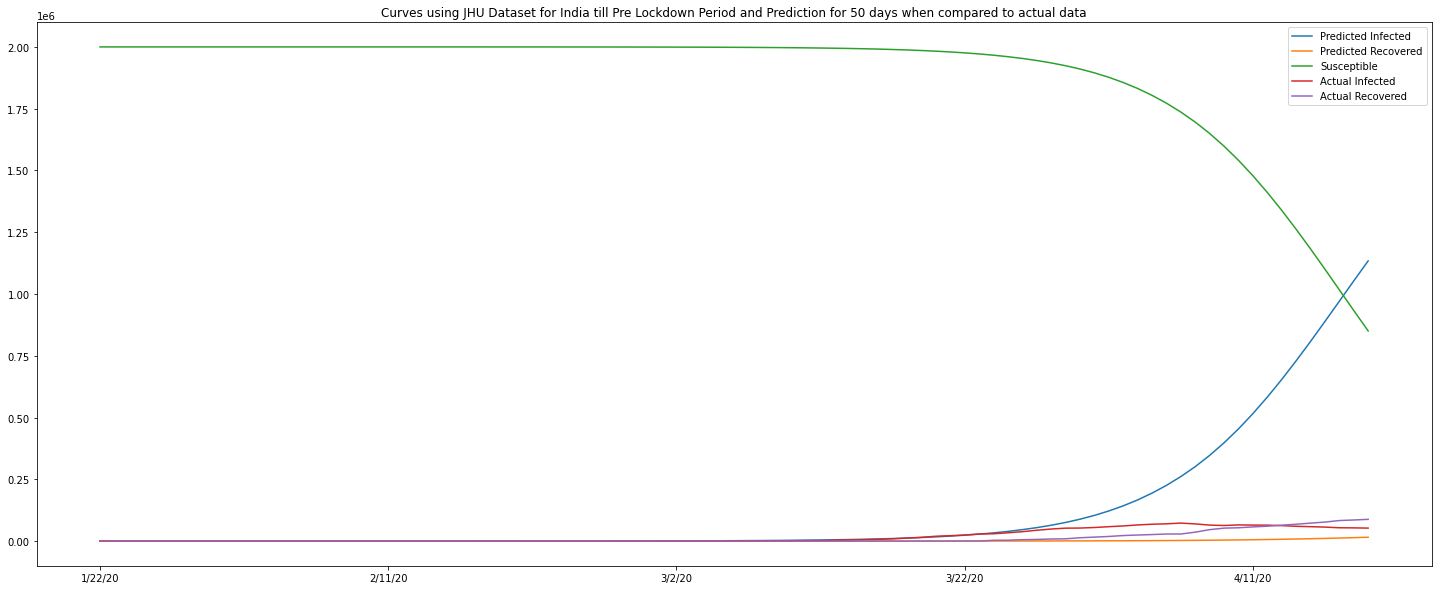

In [ ]:
fig, ax = plt.subplots(figsize=(25, 10))
ax.set_title('Curves using JHU Dataset for India till Pre Lockdown Period and Prediction for 50 days when compared to actual data')
df_plot.plot(ax=ax)

In [ ]:
pres_fut = np.array(list(data.index.values)+ list((np.array(index[60:180]))))

      fun: 96.64601173914403
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1.35003120e-04, -5.54223334e-05])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 114
      nit: 11
   status: 0
  success: True
        x: array([0.16978988, 0.00154834])
country=India, beta=0.16978988, gamma=0.00154834, r_0:109.65900685


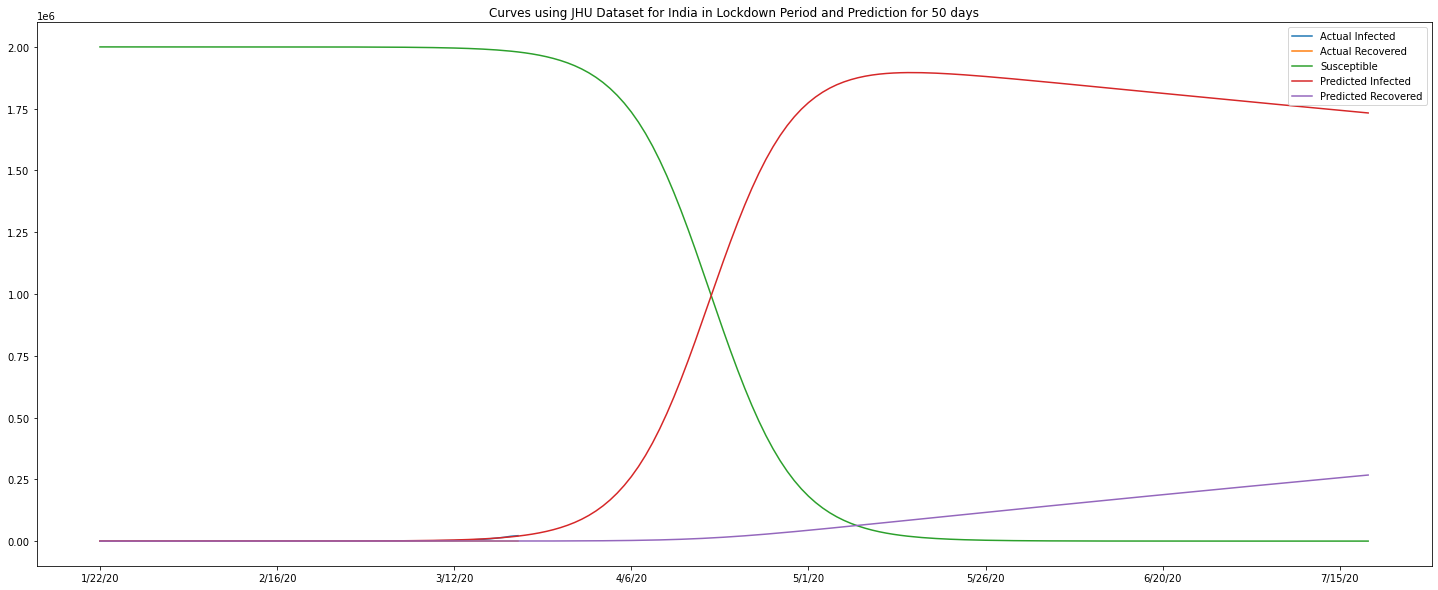

In [ ]:
susceptible, predicted_infected, predicted_recovered = train(recovered, infected, data)

In [ ]:
actual_infected = df["Active Cases"][:len(susceptible)]
actual_recovered = df["Recovered"][:len(susceptible)]

In [ ]:
plot_data = {"Predicted Infected": predicted_infected, "Predicted Recovered": predicted_recovered, "Susceptible": susceptible, "Actual Infected": actual_infected, "Actual Recovered": actual_recovered}
df_plot = pd.DataFrame(data=plot_data)
df_plot

Predicted Infected  Predicted Recovered   Susceptible  \
1/22/20        1.000000e+00             1.000000  2.000000e+06   
1/23/20        1.183223e+00             1.001686  2.000000e+06   
1/24/20        1.400029e+00             1.003682  2.000000e+06   
1/25/20        1.656672e+00             1.006043  1.999999e+06   
1/26/20        1.960106e+00             1.008836  1.999999e+06   
...                     ...                  ...           ...   
7/15/20        1.743425e+06        256575.020582  1.566441e+00   
7/16/20        1.740728e+06        259272.354538  1.351179e+00   
7/17/20        1.738035e+06        261965.515632  1.165599e+00   
7/18/20        1.735346e+06        264654.510280  1.005816e+00   
7/19/20        1.732662e+06        267339.344891  8.682225e-01   

        Actual Infected Actual Recovered  
1/22/20               0                0  
1/23/20               0                0  
1/24/20               0                0  
1/25/20               0                0  
1/26/20               0                0  
...                 ...              ...  
7/15/20            5810           186000  
7/16/20            5963           186400  
7/17/20            6057           186900  
7/18/20            6135           187200  
7/19/20            6243           187400  

[180 rows x 5 columns]

In [ ]:
days=list(range(index.index('1/22/20'),index.index('7/19/20')+1))
len(days)

180

In [ ]:
len(df_plot['Predicted Infected'])

180

In [ ]:
x, y = intersection(days, df_plot['Predicted Infected'], days, df_plot['Predicted Recovered'])

In [ ]:
x

array([0.])

The curves don't interesect and there is no need of Lockdown

In [ ]:
# start = index.index('3/22/20')
# pw_1 = abs(x[1] - start)
# pw_1

**Taking Data till 10/5/20 for plotting SIR curves**

In [ ]:
data = df["Active Cases"][:index.index('5/29/20')]
infected = df["Infected"][:index.index('5/29/20')]
recovered = df["Recovered"][:index.index('5/29/20')]

In [ ]:
def loss(point, data, recovered, s_0, i_0, r_0):
    size = len(data)
    beta, gamma = point
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I/s_0, beta*S*I/s_0-gamma*I, gamma*I]
    solution = solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1), vectorized=True)
    l1 = np.sqrt(np.mean((solution.y[1] - data)**2))
    l2 = np.sqrt(np.mean((solution.y[2] - recovered)**2))
    alpha = 0.1
    return alpha * l1 + (1 - alpha) * l2

In [ ]:
def predict(beta, gamma, data, recovered, s_0, i_0, r_0):
    new_index = list(data.index.values)
    size = len(new_index)
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I/s_0, beta*S*I/s_0-gamma*I, gamma*I]
    extended_actual = np.concatenate((data.values, [None] * (size - len(data.values))))
    extended_recovered = np.concatenate((recovered.values, [None] * (size - len(recovered.values))))
    return new_index, extended_actual, extended_recovered, solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1))

In [ ]:
def train(recovered, infected, data):
    recovered = recovered
    infected = infected
    data = data

    optimal = minimize(loss, [0.001, 0.001], args=(data, recovered, s_0, i_0, r_0), method='L-BFGS-B', bounds=[(0.00000001, 10), (0.00000001, 10)])
    print(optimal)
    beta, gamma = optimal.x
    new_index, extended_actual, extended_recovered, prediction = predict(beta, gamma, data, recovered, s_0, i_0, r_0)
    df = pd.DataFrame({'Actual Infected': extended_actual, 'Actual Recovered': extended_recovered, 'Susceptible': prediction.y[0], 'Predicted Infected': prediction.y[1], 'Predicted Recovered': prediction.y[2]}, index=new_index)
    fig, ax = plt.subplots(figsize=(25, 10))
    ax.set_title('Curves using JHU Dataset for India till Lockdown Period')
    df.plot(ax=ax)
    print(f"country=India, beta={beta:.8f}, gamma={gamma:.8f}, r_0:{(beta/gamma):.8f}")

In [ ]:
print(data[0], infected[0], recovered[0])

0 0 0


In [ ]:
s_0 = 5000000
i_0 = 1
r_0 = 1

      fun: 7562.613184067159
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-154709.86636501,  157306.84826849])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 93
      nit: 9
   status: 0
  success: True
        x: array([5.48718747, 5.39651549])
country=India, beta=5.48718747, gamma=5.39651549, r_0:1.01680195


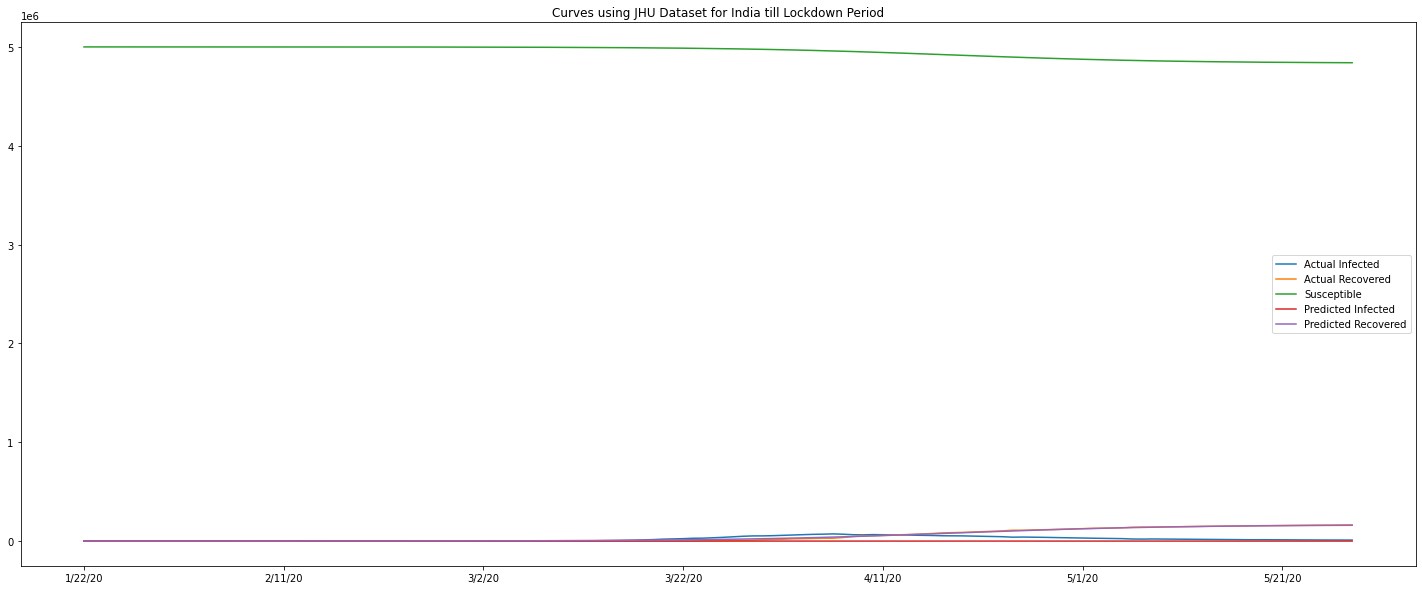

In [ ]:
train(recovered, infected, data)

**Predicting the curve for next 30 days**

In [ ]:
data = df["Active Cases"][:index.index('5/20/20')]
infected = df["Infected"][:index.index('5/20/20')]
recovered = df["Recovered"][:index.index('5/20/20')]

In [ ]:
def loss(point, data, recovered, s_0, i_0, r_0):
    size = len(data)
    beta, gamma = point
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I/s_0, beta*S*I/s_0-gamma*I, gamma*I]
    solution = solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1), vectorized=True)
    l1 = np.sqrt(np.mean((solution.y[1] - data)**2))
    l2 = np.sqrt(np.mean((solution.y[2] - recovered)**2))
    alpha = 0.1
    return alpha * l1 + (1 - alpha) * l2

In [ ]:
print(index.index('5/20/20'))

119


In [ ]:
pres_fut = np.array(list(data.index.values)+ list((np.array(index[119:149]))))

In [ ]:
def predict(beta, gamma, data, recovered, s_0, i_0, r_0):
    new_index = pres_fut
    size = len(new_index)
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I/s_0, beta*S*I/s_0-gamma*I, gamma*I]
    extended_actual = np.concatenate((data.values, [None] * (size - len(data.values))))
    extended_recovered = np.concatenate((recovered.values, [None] * (size - len(recovered.values))))
    return new_index, extended_actual, extended_recovered, solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1))

In [ ]:
def train(recovered, infected, data):
    recovered = recovered
    infected = infected
    data = data

    optimal = minimize(loss, [0.001, 0.001], args=(data, recovered, s_0, i_0, r_0), method='L-BFGS-B', bounds=[(0.00000001, 10), (0.00000001, 10)])
    print(optimal)
    beta, gamma = optimal.x
    new_index, extended_actual, extended_recovered, prediction = predict(beta, gamma, data, recovered, s_0, i_0, r_0)
    df = pd.DataFrame({'Actual Infected': extended_actual, 'Actual Recovered': extended_recovered, 'Susceptible': prediction.y[0], 'Predicted Infected': prediction.y[1], 'Predicted Recovered': prediction.y[2]}, index=new_index)
    fig, ax = plt.subplots(figsize=(25, 10))
    ax.set_title('Curves using JHU Dataset for India in Lockdown Period and Prediction for 50 days')
    df.plot(ax=ax)
    print(f"country=India, beta={beta:.8f}, gamma={gamma:.8f}, r_0:{(beta/gamma):.8f}")
    return prediction.y[0], prediction.y[1], prediction.y[2]

In [ ]:
print(data[0], infected[0], recovered[0])

0 0 0


In [ ]:
s_0 = 5000000
i_0 = 1
r_0 = 1

      fun: 7630.561610373579
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1069.33694042,  1077.49838207])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 159
      nit: 22
   status: 0
  success: True
        x: array([5.30529615, 5.21493556])
country=India, beta=5.30529615, gamma=5.21493556, r_0:1.01732727


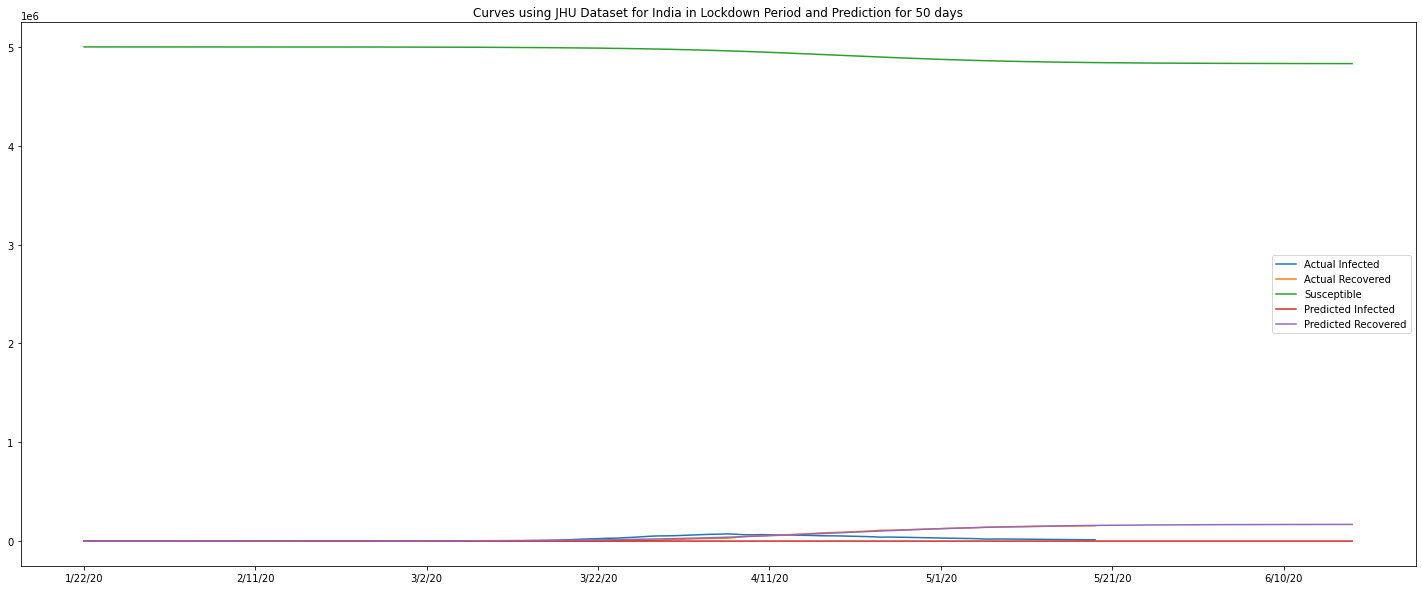

In [ ]:
susceptible, predicted_infected, predicted_recovered = train(recovered, infected, data)

In [ ]:
actual_infected = df["Active Cases"][:len(susceptible)]
actual_recovered = df["Recovered"][:len(susceptible)]

In [ ]:
plot_data = {"Predicted Infected": predicted_infected, "Predicted Recovered": predicted_recovered, "Susceptible": susceptible, "Actual Infected": actual_infected, "Actual Recovered": actual_recovered}
df_plot = pd.DataFrame(data=plot_data)
df_plot

Predicted Infected  Predicted Recovered   Susceptible  \
1/22/20            1.000000             1.000000  5.000000e+06   
1/23/20            1.094566             6.457814  4.999994e+06   
1/24/20            1.198076            12.432264  4.999988e+06   
1/25/20            1.311362            18.971411  4.999982e+06   
1/26/20            1.435336            26.128125  4.999974e+06   
...                     ...                  ...           ...   
6/14/20           19.481953        168434.141608  4.831548e+06   
6/15/20           17.834202        168531.296901  4.831453e+06   
6/16/20           16.323237        168620.307433  4.831365e+06   
6/17/20           14.939002        168701.770234  4.831285e+06   
6/18/20           13.671094        168776.318662  4.831212e+06   

        Actual Infected Actual Recovered  
1/22/20               0                0  
1/23/20               0                0  
1/24/20               0                0  
1/25/20               0                0  
1/26/20               0                0  
...                 ...              ...  
6/14/20            6628           172089  
6/15/20            6183           172692  
6/16/20            6590           172842  
6/17/20            6154           173599  
6/18/20            7095           173847  

[149 rows x 5 columns]

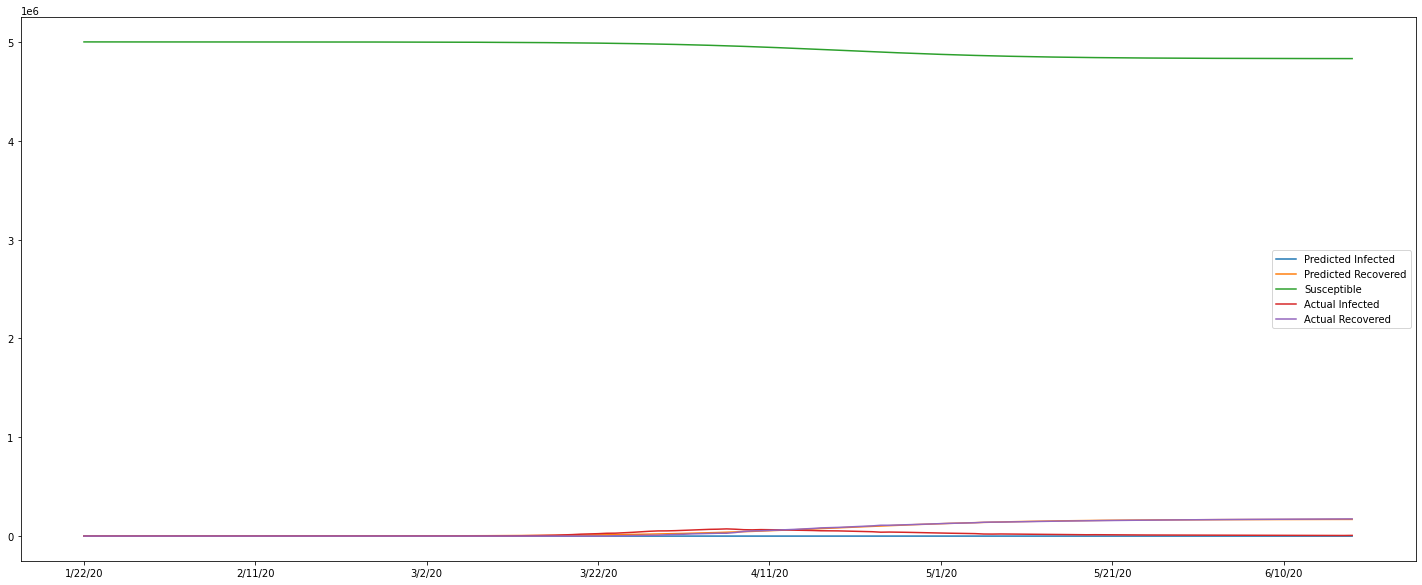

In [ ]:
fig, ax = plt.subplots(figsize=(25, 10))
df_plot.plot(ax=ax)

In [ ]:
!pip install plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


fig=go.Figure()
fig.layout.plot_bgcolor = '#FFFFFF'
fig.layout.paper_bgcolor = '#FFFFFF'
fig.add_trace(go.Scatter(x=pres_fut, y=susceptible,
                    mode='lines',name="Active Cases", line=dict(color='blue', dash='dashdot', shape='linear')))

fig.add_trace(go.Scatter(x=pres_fut, y=actual_infected,
                    mode='lines+markers',name="Infected Cases", line=dict(color='red', dash='dash', shape='linear'), marker = dict(symbol = "cross-dot")))

fig.add_trace(go.Scatter(x=pres_fut, y=predicted_infected,
                    mode='lines',name="Predicted Infected",
                    line=dict(color='red', dash='dash', shape='linear')))

fig.add_trace(go.Scatter(x=pres_fut, y=predicted_recovered,
                    mode='lines',name="Predicted Recovered",
                    line=dict(color='green', dash='dot', shape='linear')))
fig.add_trace(go.Scatter(x=pres_fut, y=actual_recovered,
                    mode='lines+markers',name="Recovered Cases", line=dict(color='green', dash='dot', shape='linear')))

fig.update_layout(xaxis_title="Date",yaxis_title="Covid 19 Cases",
                 legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Transfer Function**

Input Signal

In [ ]:
#Sampling Rate
t = np.linspace(0, 300, 300, endpoint=True)

In [ ]:
pw_1

39.409496338816666

In [ ]:
square_wave_1 = []
for i in range(index.index('1/22/20'), index.index('3/22/20')):
  square_wave_1.append(0)
while len(square_wave_1) < 300:
  for i in range(0, 50):
    if len(square_wave_1) >= 300:
      break
    else:
      square_wave_1.append(1)
  for i in range(0, 50):
    if len(square_wave_1) >= 300:
      break
    else:
      square_wave_1.append(0)

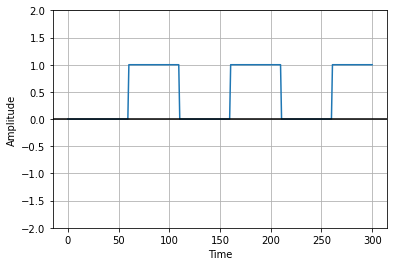

In [ ]:
# Plot the square wave signal 
plot.plot(t, square_wave_1)
plot.xlabel('Time')
plot.ylabel('Amplitude')
plot.grid(True, which='both')
plot.axhline(y=0, color='k')
plot.ylim(-2, 2)
plot.show()

Transfer Function

In [ ]:
k1 = 0.17203755
k2 = 0.00147499
R = k1/k2
M = (k1 * math.log(R))/2
print(k1, k2, R, M)

0.17203755 0.00147499 116.63641787401949 0.4093686452682931


In [ ]:
num = [M]
den = [1, M]
transfer_function_1 = signal.TransferFunction(num, den)
transfer_function_1

TransferFunctionContinuous(
array([0.40936865]),
array([1.        , 0.40936865]),
dt: None
)

Square Wave Response

In [ ]:
t_out, y_out_1, x_out = lsim(system=transfer_function_1, T=t, U=square_wave_1)

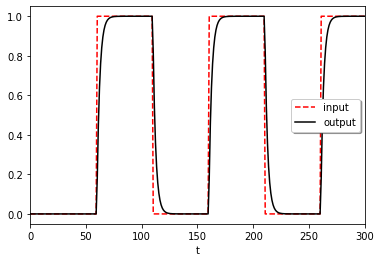

In [ ]:
plot.plot(t, square_wave_1, 'r--', linewidth=1.5, label='input')
plot.plot(t_out, y_out_1, 'k', linewidth=1.5, label='output')
plot.legend(loc='best', shadow=True, framealpha=1)
# plot.grid(alpha=0.3)
plot.xlabel('t')
plot.xlim(0,300)
plot.show()

# **SIR for Japan using JHU Dataset**

Dataset - https://github.com/CSSEGISandData/COVID-19 \\
Reference - https://www.lewuathe.com/covid-19-dynamics-with-sir-model.html

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
from scipy.integrate import odeint

In [ ]:
file_path = '/content/time_series_covid19_confirmed_global.csv'
df_confirm = pd.read_csv(file_path)
file_path = '/content/time_series_covid19_recovered_global.csv'
df_recovered = pd.read_csv(file_path)
file_path = '/content/time_series_covid19_deaths_global.csv'
df_dead = pd.read_csv(file_path)

In [ ]:
df_confirm

Province/State      Country/Region        Lat        Long  1/22/20  \
0              NaN         Afghanistan  33.939110   67.709953        0   
1              NaN             Albania  41.153300   20.168300        0   
2              NaN             Algeria  28.033900    1.659600        0   
3              NaN             Andorra  42.506300    1.521800        0   
4              NaN              Angola -11.202700   17.873900        0   
..             ...                 ...        ...         ...      ...   
271            NaN             Vietnam  14.058324  108.277199        0   
272            NaN  West Bank and Gaza  31.952200   35.233200        0   
273            NaN               Yemen  15.552727   48.516388        0   
274            NaN              Zambia -13.133897   27.849332        0   
275            NaN            Zimbabwe -19.015438   29.154857        0   

     1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  6/5/21  6/6/21  6/7/21  \
0          0        0        0        0        0  ...   77963   79224   80841   
1          0        0        0        0        0  ...  132374  132379  132384   
2          0        0        0        0        0  ...  130681  130958  131283   
3          0        0        0        0        0  ...   13758   13758   13777   
4          0        0        0        0        0  ...   35594   35772   35854   
..       ...      ...      ...      ...      ...  ...     ...     ...     ...   
271        2        2        2        2        2  ...    8580    8791    9027   
272        0        0        0        0        0  ...  309853  310026  310026   
273        0        0        0        0        0  ...    6780    6787    6812   
274        0        0        0        0        0  ...   99540  100278  100765   
275        0        0        0        0        0  ...   39168   39189   39238   

     6/8/21  6/9/21  6/10/21  6/11/21  6/12/21  6/13/21  6/14/21  
0     82326   84050    85892    87716    88740    89861    91458  
1    132397  132415   132426   132437   132449   132459   132461  
2    131647  132034   132355   132727   133070   133388   133742  
3     13781   13791    13805    13813    13813    13813    13826  
4     36004   36115    36325    36455    36600    36705    36790  
..      ...     ...      ...      ...      ...      ...      ...  
271    9222    9635     9835    10048    10337    10630    10881  
272  310544  310544   311018   311018   311018   311534   311690  
273    6823    6832     6836     6856     6857     6862     6863  
274  101996  103763   105909   107974   110332   111746   113134  
275   39321   39432    39496    39688    39852    39959    40077  

[276 rows x 514 columns]

In [ ]:
df_recovered

Province/State      Country/Region        Lat        Long  1/22/20  \
0              NaN         Afghanistan  33.939110   67.709953        0   
1              NaN             Albania  41.153300   20.168300        0   
2              NaN             Algeria  28.033900    1.659600        0   
3              NaN             Andorra  42.506300    1.521800        0   
4              NaN              Angola -11.202700   17.873900        0   
..             ...                 ...        ...         ...      ...   
256            NaN             Vietnam  14.058324  108.277199        0   
257            NaN  West Bank and Gaza  31.952200   35.233200        0   
258            NaN               Yemen  15.552727   48.516388        0   
259            NaN              Zambia -13.133897   27.849332        0   
260            NaN            Zimbabwe -19.015438   29.154857        0   

     1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  6/5/21  6/6/21  6/7/21  \
0          0        0        0        0        0  ...   58265   58622   58998   
1          0        0        0        0        0  ...  129627  129664  129702   
2          0        0        0        0        0  ...   90995   91198   91413   
3          0        0        0        0        0  ...   13527   13527   13557   
4          0        0        0        0        0  ...   28866   28880   29329   
..       ...      ...      ...      ...      ...  ...     ...     ...     ...   
256        0        0        0        0        0  ...    3310    3368    3509   
257        0        0        0        0        0  ...  301670  301881  301881   
258        0        0        0        0        0  ...    3550    3571    3588   
259        0        0        0        0        0  ...   93036   93374   93694   
260        0        0        0        0        0  ...   36698   36728   36746   

     6/8/21  6/9/21  6/10/21  6/11/21  6/12/21  6/13/21  6/14/21  
0     59569   59871    60280    60598    60939    61410    61706  
1    129736  129761   129785   129807   129826   129842   129865  
2     91651   91894    92132    92384    92620    92852    93094  
3     13557   13569    13578    13591    13591    13591    13618  
4     29368   29553    29960    30101    30207    30282    30359  
..      ...     ...      ...      ...      ...      ...      ...  
256    3547    3636     3708     3804     3827     3998     4236  
257  302357  302357   302944   302944   302944   303813   304138  
258    3638    3675     3689     3697     3727     3743     3765  
259   93992   94189    94995    95674    96646    97756    98994  
260   36756   36917    36940    36970    36992    37004    37027  

[261 rows x 514 columns]

In [ ]:
df_dead

Province/State      Country/Region        Lat        Long  1/22/20  \
0              NaN         Afghanistan  33.939110   67.709953        0   
1              NaN             Albania  41.153300   20.168300        0   
2              NaN             Algeria  28.033900    1.659600        0   
3              NaN             Andorra  42.506300    1.521800        0   
4              NaN              Angola -11.202700   17.873900        0   
..             ...                 ...        ...         ...      ...   
271            NaN             Vietnam  14.058324  108.277199        0   
272            NaN  West Bank and Gaza  31.952200   35.233200        0   
273            NaN               Yemen  15.552727   48.516388        0   
274            NaN              Zambia -13.133897   27.849332        0   
275            NaN            Zimbabwe -19.015438   29.154857        0   

     1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  6/5/21  6/6/21  6/7/21  \
0          0        0        0        0        0  ...    3104    3145    3187   
1          0        0        0        0        0  ...    2451    2451    2452   
2          0        0        0        0        0  ...    3510    3518    3527   
3          0        0        0        0        0  ...     127     127     127   
4          0        0        0        0        0  ...     794     797     800   
..       ...      ...      ...      ...      ...  ...     ...     ...     ...   
271        0        0        0        0        0  ...      53      53      53   
272        0        0        0        0        0  ...    3516    3517    3517   
273        0        0        0        0        0  ...    1325    1329    1336   
274        0        0        0        0        0  ...    1303    1308    1315   
275        0        0        0        0        0  ...    1605    1606    1611   

     6/8/21  6/9/21  6/10/21  6/11/21  6/12/21  6/13/21  6/14/21  
0      3251    3305     3356     3412     3449     3527     3612  
1      2452    2452     2452     2453     2453     2453     2453  
2      3537    3544     3552     3560     3565     3571     3579  
3       127     127      127      127      127      127      127  
4       803     811      815      819      825      831      836  
..      ...     ...      ...      ...      ...      ...      ...  
271      55      55       55       57       58       59       59  
272    3520    3520     3524     3524     3524     3533     3539  
273    1336    1337     1338     1342     1347     1349     1350  
274    1321    1324     1332     1348     1365     1389     1416  
275    1617    1622     1626     1629     1632     1632     1635  

[276 rows x 514 columns]

In [ ]:
Japan_confirm = df_confirm.loc[df_confirm['Country/Region'] == 'Japan']
Japan_confirm

Province/State Country/Region        Lat        Long  1/22/20  1/23/20  \
155            NaN          Japan  36.204824  138.252924        2        2   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  6/5/21  6/6/21  6/7/21  6/8/21  \
155        2        2        4        4  ...  760953  762980  764185  766068   

     6/9/21  6/10/21  6/11/21  6/12/21  6/13/21  6/14/21  
155  768313   770357   772293   774240   775624   776565  

[1 rows x 514 columns]

In [ ]:
confirmed = Japan_confirm.iloc[0].loc['1/22/20':]
confirmed

1/22/20         2
1/23/20         2
1/24/20         2
1/25/20         2
1/26/20         4
            ...  
6/10/21    770357
6/11/21    772293
6/12/21    774240
6/13/21    775624
6/14/21    776565
Name: 155, Length: 510, dtype: object

In [ ]:
Japan_recovered = df_recovered.loc[df_recovered['Country/Region'] == 'Japan']
Japan_recovered

Province/State Country/Region        Lat        Long  1/22/20  1/23/20  \
140            NaN          Japan  36.204824  138.252924        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  6/5/21  6/6/21  6/7/21  6/8/21  \
140        0        0        1        1  ...  699585  703369  706488  710060   

     6/9/21  6/10/21  6/11/21  6/12/21  6/13/21  6/14/21  
140  713651   717726   721104   724648   727574   730290  

[1 rows x 514 columns]

In [ ]:
recovered = Japan_recovered.iloc[0].loc['1/22/20':]
recovered

1/22/20         0
1/23/20         0
1/24/20         0
1/25/20         0
1/26/20         1
            ...  
6/10/21    717726
6/11/21    721104
6/12/21    724648
6/13/21    727574
6/14/21    730290
Name: 140, Length: 510, dtype: object

In [ ]:
Japan_dead = df_dead.loc[df_dead['Country/Region'] == 'Japan']
Japan_dead

Province/State Country/Region        Lat        Long  1/22/20  1/23/20  \
155            NaN          Japan  36.204824  138.252924        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  6/5/21  6/6/21  6/7/21  6/8/21  \
155        0        0        0        0  ...   13481   13531   13606   13705   

     6/9/21  6/10/21  6/11/21  6/12/21  6/13/21  6/14/21  
155   13801    13872    13936    13991    14023    14083  

[1 rows x 514 columns]

In [ ]:
dead = Japan_dead.iloc[0].loc['1/22/20':]
dead

1/22/20        0
1/23/20        0
1/24/20        0
1/25/20        0
1/26/20        0
           ...  
6/10/21    13872
6/11/21    13936
6/12/21    13991
6/13/21    14023
6/14/21    14083
Name: 155, Length: 510, dtype: object

In [ ]:
print(len(confirmed),len(recovered), len(dead))

510 510 510


In [ ]:
t = np.arange(0, len(confirmed))
len(t)

510

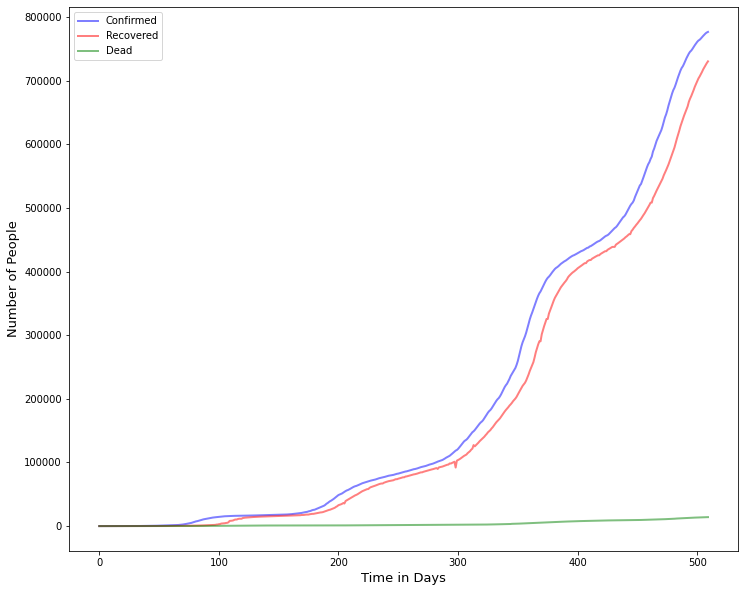

In [ ]:
fig = plt.figure(facecolor='w', figsize=(12,10))
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(t, confirmed, 'b', alpha=0.5, lw=2, label='Confirmed')
ax.plot(t, recovered, 'r', alpha=0.5, lw=2, label='Recovered')
ax.plot(t, dead, 'g', alpha=0.5, lw=2, label='Dead')
ax.set_xlabel('Time in Days', size=13)
ax.set_ylabel('Number of People', size=13)
legend = ax.legend()
plt.show()

In [ ]:
activecases = confirmed - recovered - dead
activecases

1/22/20        2
1/23/20        2
1/24/20        2
1/25/20        2
1/26/20        3
           ...  
6/10/21    38759
6/11/21    37253
6/12/21    35601
6/13/21    34027
6/14/21    32192
Length: 510, dtype: object

In [ ]:
datadf = {"Active Cases": activecases, "Infected": confirmed, "Recovered": recovered}
days = [x for x in range(0,len(activecases))]
df = pd.DataFrame(data=datadf)
df["Days"] = days
df

Active Cases Infected Recovered  Days
1/22/20            2        2         0     0
1/23/20            2        2         0     1
1/24/20            2        2         0     2
1/25/20            2        2         0     3
1/26/20            3        4         1     4
...              ...      ...       ...   ...
6/10/21        38759   770357    717726   505
6/11/21        37253   772293    721104   506
6/12/21        35601   774240    724648   507
6/13/21        34027   775624    727574   508
6/14/21        32192   776565    730290   509

[510 rows x 4 columns]

In [ ]:
index = list(df.index.values)
index.index('3/22/20')

60

We will divide the dataset in two parts - Pre-Lockdown Period and Lockdown Period \\
1) Pre Lockdown Period - 22/1/20 - 22/3/2020 \\
2) Lockdown Period - 22/3/2020 - 20/4/2020

**Pre Lockdown Period**

In [ ]:
data = df["Active Cases"][:index.index('3/22/20')]
infected = df["Infected"][:index.index('3/22/20')]
recovered = df["Recovered"][:index.index('3/22/20')]

In [ ]:
def loss(point, data, recovered, s_0, i_0, r_0):
    size = len(data)
    beta, gamma = point
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I/s_0, beta*S*I/s_0-gamma*I, gamma*I]
    solution = solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1), vectorized=True)
    l1 = np.sqrt(np.mean((solution.y[1] - data)**2))
    l2 = np.sqrt(np.mean((solution.y[2] - recovered)**2))
    alpha = 0.1
    return alpha * l1 + (1 - alpha) * l2

In [ ]:
def predict(beta, gamma, data, recovered, s_0, i_0, r_0):
    new_index = list(data.index.values)
    size = len(new_index)
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I/s_0, beta*S*I/s_0-gamma*I, gamma*I]
    extended_actual = np.concatenate((data.values, [None] * (size - len(data.values))))
    extended_recovered = np.concatenate((recovered.values, [None] * (size - len(recovered.values))))
    return new_index, extended_actual, extended_recovered, solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1))

In [ ]:
def train(recovered, infected, data):
    recovered = recovered
    infected = infected
    data = data

    optimal = minimize(loss, [0.001, 0.001], args=(data, recovered, s_0, i_0, r_0), method='L-BFGS-B', bounds=[(0.00000001, 2), (0.00000001, 0.4)])
    print(optimal)
    beta, gamma = optimal.x
    new_index, extended_actual, extended_recovered, prediction = predict(beta, gamma, data, recovered, s_0, i_0, r_0)
    df = pd.DataFrame({'Actual Infected': extended_actual, 'Actual Recovered': extended_recovered, 'Susceptible': prediction.y[0], 'Predicted Infected': prediction.y[1], 'Predicted Recovered': prediction.y[2]}, index=new_index)
    fig, ax = plt.subplots(figsize=(25, 10))
    ax.set_title('Curves using JHU Dataset for India in Pre-Lockdown Period')
    df.plot(ax=ax)
    print(f"country=India, beta={beta:.8f}, gamma={gamma:.8f}, r_0:{(beta/gamma):.8f}")

In [ ]:
s_0 = 100000
i_0 = 1
r_0 = 0

      fun: 22.95754680773146
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.00093081, -0.00035953])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 69
      nit: 8
   status: 0
  success: True
        x: array([0.14506324, 0.02672761])
country=India, beta=0.14506324, gamma=0.02672761, r_0:5.42746761


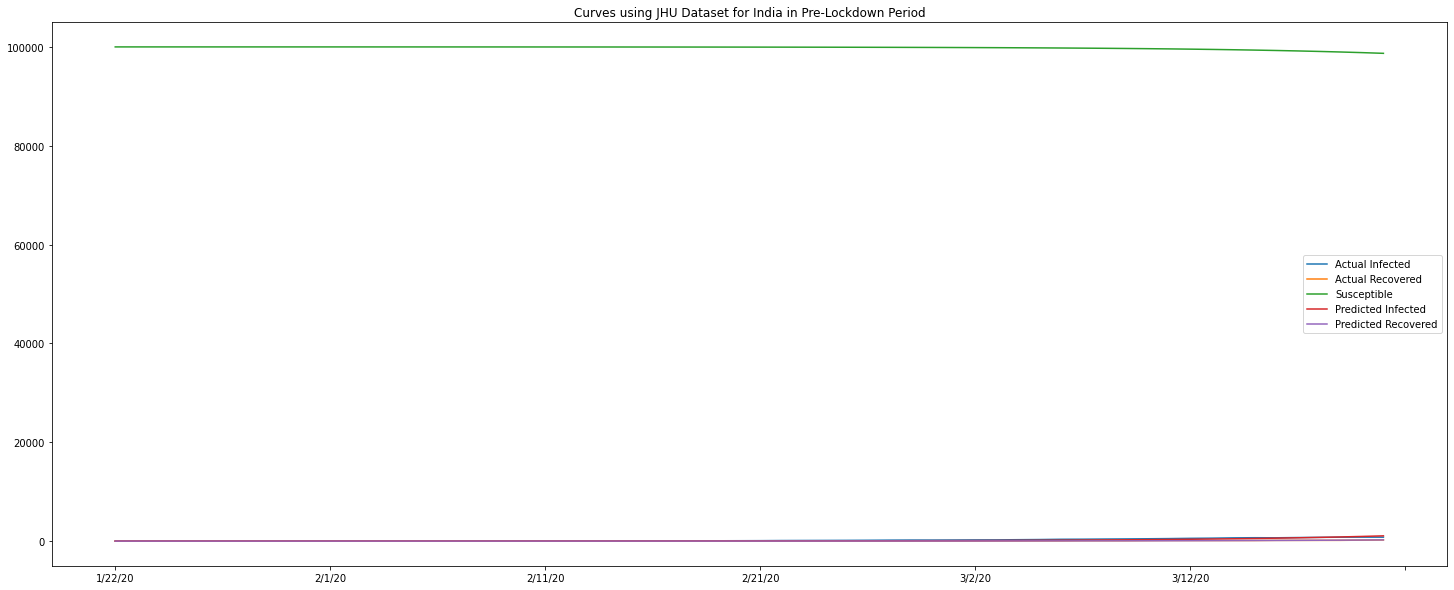

In [ ]:
train(recovered, infected, data)

**Lockdown Period**

In [ ]:
data = df["Active Cases"][:index.index('3/22/20')]
infected = df["Infected"][:index.index('3/22/20')]
recovered = df["Recovered"][:index.index('3/22/20')]

In [ ]:
def loss(point, data, recovered, s_0, i_0, r_0):
    size = len(data)
    beta, gamma = point
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I/s_0, beta*S*I/s_0-gamma*I, gamma*I]
    solution = solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1), vectorized=True)
    l1 = np.sqrt(np.mean((solution.y[1] - data)**2))
    l2 = np.sqrt(np.mean((solution.y[2] - recovered)**2))
    alpha = 0.1
    return alpha * l1 + (1 - alpha) * l2

In [ ]:
print(index.index('3/22/20'), index.index('5/15/20'))

60 114


In [ ]:
pres_fut = np.array(list(data.index.values)+ list((np.array(index[60:115]))))

In [ ]:
def predict(beta, gamma, data, recovered, s_0, i_0, r_0):
    new_index = pres_fut
    size = len(new_index)
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I/s_0, beta*S*I/s_0-gamma*I, gamma*I]
    extended_actual = np.concatenate((data.values, [None] * (size - len(data.values))))
    extended_recovered = np.concatenate((recovered.values, [None] * (size - len(recovered.values))))
    return new_index, extended_actual, extended_recovered, solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1))

In [ ]:
def train(recovered, infected, data):
    recovered = recovered
    infected = infected
    data = data

    optimal = minimize(loss, [0.001, 0.001], args=(data, recovered, s_0, i_0, r_0), method='L-BFGS-B', bounds=[(0.00000001, 2), (0.00000001, 0.4)])
    print(optimal)
    beta, gamma = optimal.x
    new_index, extended_actual, extended_recovered, prediction = predict(beta, gamma, data, recovered, s_0, i_0, r_0)
    df = pd.DataFrame({'Actual Infected': extended_actual, 'Actual Recovered': extended_recovered, 'Susceptible': prediction.y[0], 'Predicted Infected': prediction.y[1], 'Predicted Recovered': prediction.y[2]}, index=new_index)
    fig, ax = plt.subplots(figsize=(25, 10))
    ax.set_title('Curves using JHU Dataset for India in Lockdown Period and Prediction for 50 days')
    df.plot(ax=ax)
    print(f"country=India, beta={beta:.8f}, gamma={gamma:.8f}, r_0:{(beta/gamma):.8f}")
    return prediction.y[0], prediction.y[1], prediction.y[2]

In [ ]:
print(data[0], infected[0], recovered[0])

2 2 0


In [ ]:
s_0 = 20000
i_0 = 1
r_0 = 1

      fun: 22.055460029286923
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.00041496, -0.00014388])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 90
      nit: 8
   status: 0
  success: True
        x: array([0.14525174, 0.02585798])
country=India, beta=0.14525174, gamma=0.02585798, r_0:5.61728896


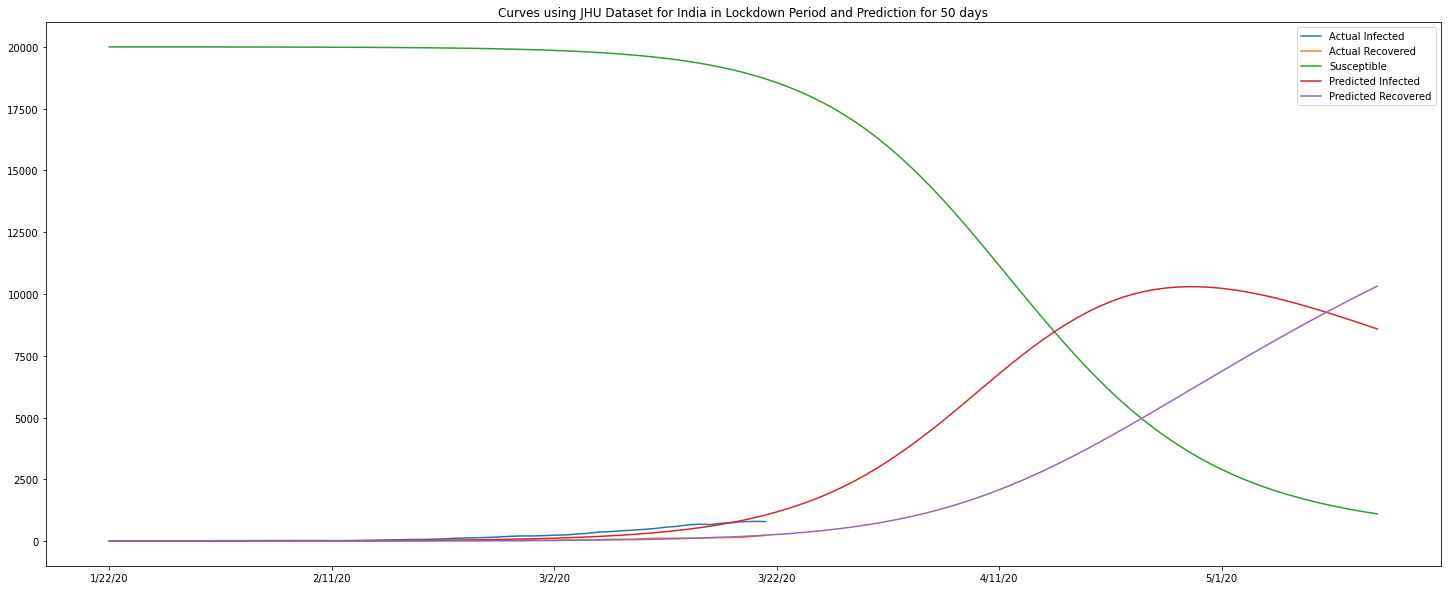

In [ ]:
susceptible, predicted_infected, predicted_recovered = train(recovered, infected, data)

In [ ]:
actual_infected = df["Active Cases"][:len(susceptible)]
actual_recovered = df["Recovered"][:len(susceptible)]

In [ ]:
plot_data = {"Predicted Infected": predicted_infected, "Predicted Recovered": predicted_recovered, "Susceptible": susceptible, "Actual Infected": actual_infected, "Actual Recovered": actual_recovered}
df_plot = pd.DataFrame(data=plot_data)
df_plot

Predicted Infected  Predicted Recovered   Susceptible  \
1/22/20            1.000000             1.000000  20000.000000   
1/23/20            1.126813             1.027465  19999.845722   
1/24/20            1.269708             1.058413  19999.671879   
1/25/20            1.430796             1.093302  19999.475901   
1/26/20            1.612271             1.132607  19999.255122   
...                     ...                  ...           ...   
5/11/20         9177.126650          9401.098779   1423.774571   
5/12/20         9032.865203          9636.567946   1332.566851   
5/13/20         8885.243346          9868.271379   1248.485275   
5/14/20         8734.925443         10096.121604   1170.952952   
5/15/20         8582.498121         10320.047522   1099.454358   

        Actual Infected Actual Recovered  
1/22/20               2                0  
1/23/20               2                0  
1/24/20               2                0  
1/25/20               2                0  
1/26/20               3                1  
...                 ...              ...  
5/11/20            6883             8293  
5/12/20            6710             8531  
5/13/20            6352             8920  
5/14/20            5486             9868  
5/15/20            5050            10338  

[115 rows x 5 columns]

In [ ]:
days = list(range(index.index('1/22/20'), index.index('5/15/20')+1))
len(days)

115

In [ ]:
len(df_plot['Predicted Recovered'])

115

In [ ]:
x, y = intersection(days, df_plot['Predicted Infected'], days, df_plot['Predicted Recovered'])

In [ ]:
x

array([  0.        , 109.40949634])

In [ ]:
start = index.index('4/1/20')
pw_1 = abs(x[1] - start)
pw_1

39.409496338816666

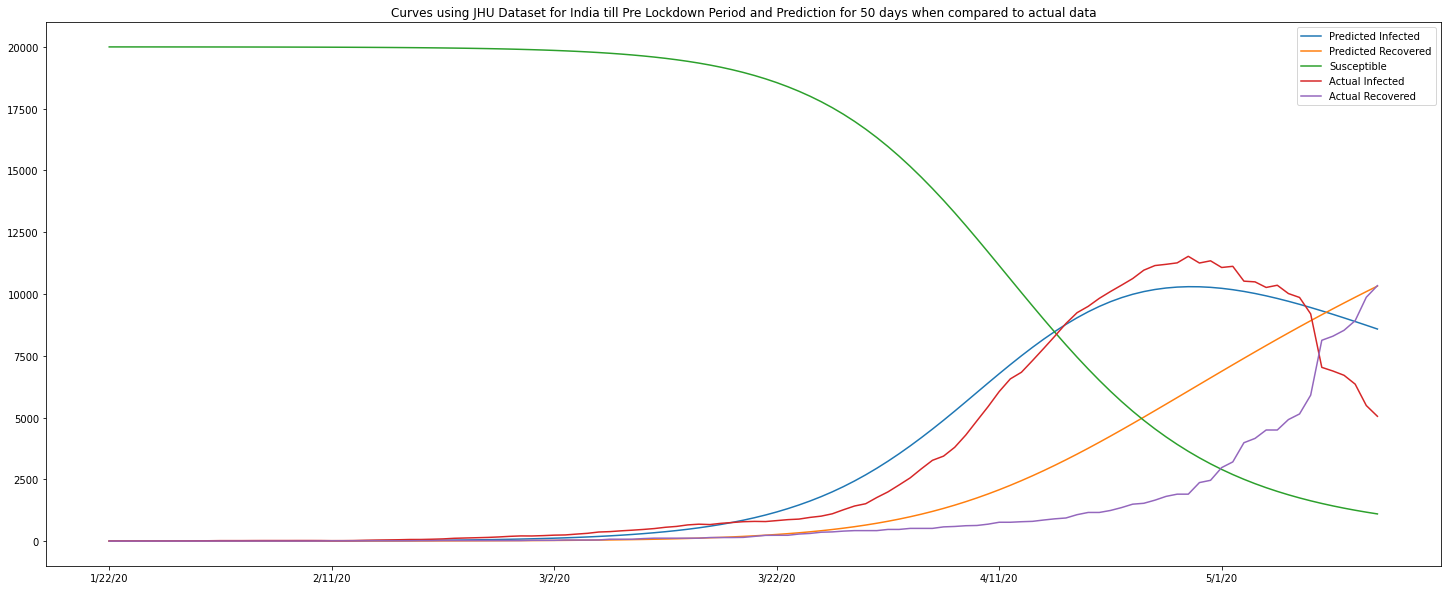

In [ ]:
fig, ax = plt.subplots(figsize=(25, 10))
ax.set_title('Curves using JHU Dataset for India till Pre Lockdown Period and Prediction for 50 days when compared to actual data')
df_plot.plot(ax=ax)

**Taking Data till 10/5/20 for plotting SIR curves**

In [ ]:
data = df["Active Cases"][:index.index('5/29/20')]
infected = df["Infected"][:index.index('5/29/20')]
recovered = df["Recovered"][:index.index('5/29/20')]

In [ ]:
def loss(point, data, recovered, s_0, i_0, r_0):
    size = len(data)
    beta, gamma = point
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I/s_0, beta*S*I/s_0-gamma*I, gamma*I]
    solution = solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1), vectorized=True)
    l1 = np.sqrt(np.mean((solution.y[1] - data)**2))
    l2 = np.sqrt(np.mean((solution.y[2] - recovered)**2))
    alpha = 0.1
    return alpha * l1 + (1 - alpha) * l2

In [ ]:
def predict(beta, gamma, data, recovered, s_0, i_0, r_0):
    new_index = list(data.index.values)
    size = len(new_index)
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I/s_0, beta*S*I/s_0-gamma*I, gamma*I]
    extended_actual = np.concatenate((data.values, [None] * (size - len(data.values))))
    extended_recovered = np.concatenate((recovered.values, [None] * (size - len(recovered.values))))
    return new_index, extended_actual, extended_recovered, solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1))

In [ ]:
def train(recovered, infected, data):
    recovered = recovered
    infected = infected
    data = data

    optimal = minimize(loss, [0.001, 0.001], args=(data, recovered, s_0, i_0, r_0), method='L-BFGS-B', bounds=[(0.00000001, 2), (0.00000001, 0.4)])
    print(optimal)
    beta, gamma = optimal.x
    new_index, extended_actual, extended_recovered, prediction = predict(beta, gamma, data, recovered, s_0, i_0, r_0)
    df = pd.DataFrame({'Actual Infected': extended_actual, 'Actual Recovered': extended_recovered, 'Susceptible': prediction.y[0], 'Predicted Infected': prediction.y[1], 'Predicted Recovered': prediction.y[2]}, index=new_index)
    fig, ax = plt.subplots(figsize=(25, 10))
    ax.set_title('Curves using JHU Dataset for India till Lockdown Period')
    df.plot(ax=ax)
    print(f"country=India, beta={beta:.8f}, gamma={gamma:.8f}, r_0:{(beta/gamma):.8f}")

In [ ]:
print(data[0], infected[0], recovered[0])

2 2 0


In [ ]:
s_0 = 18000
i_0 = 1
r_0 = 1

      fun: 1242.6434324060504
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.00707132, -0.00591172])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 81
      nit: 10
   status: 0
  success: True
        x: array([0.1448047 , 0.04209237])
country=India, beta=0.14480470, gamma=0.04209237, r_0:3.44016495


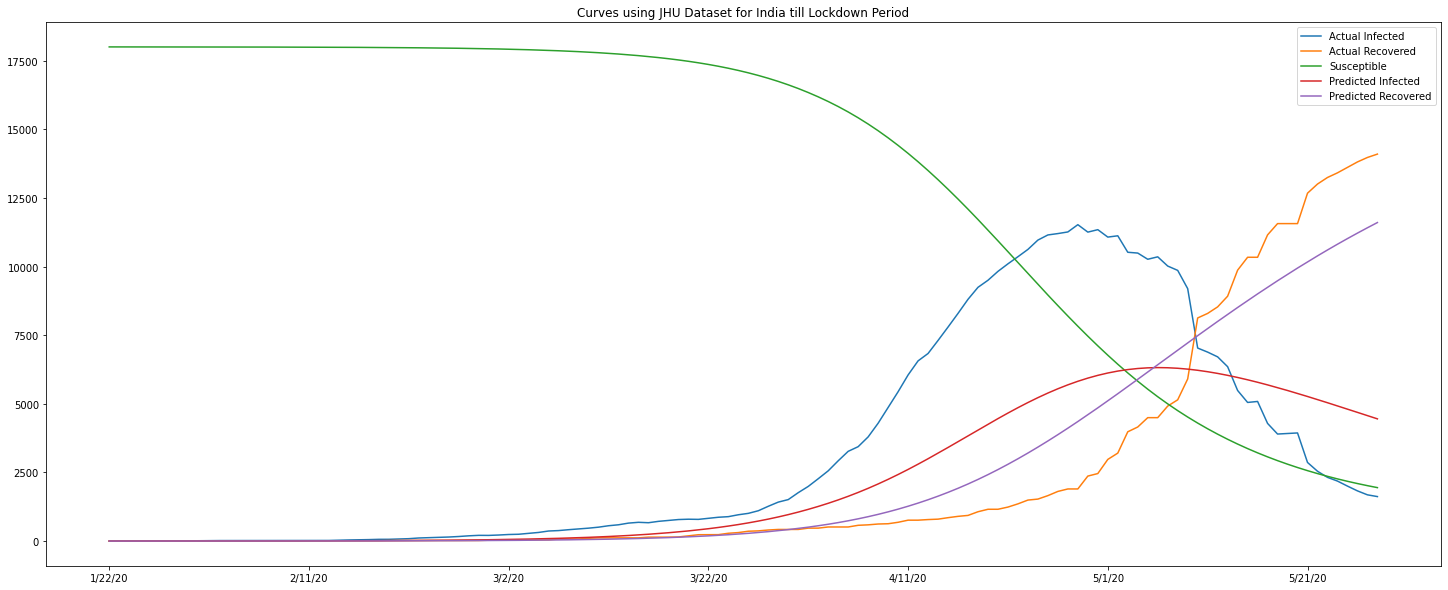

In [ ]:
train(recovered, infected, data)

**Predicting the curve for next 30 days**

In [ ]:
data = df["Active Cases"][:index.index('5/15/20')]
infected = df["Infected"][:index.index('5/15/20')]
recovered = df["Recovered"][:index.index('5/15/20')]

In [ ]:
def loss(point, data, recovered, s_0, i_0, r_0):
    size = len(data)
    beta, gamma = point
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I/s_0, beta*S*I/s_0-gamma*I, gamma*I]
    solution = solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1), vectorized=True)
    l1 = np.sqrt(np.mean((solution.y[1] - data)**2))
    l2 = np.sqrt(np.mean((solution.y[2] - recovered)**2))
    alpha = 0.1
    return alpha * l1 + (1 - alpha) * l2

In [ ]:
print(index.index('5/15/20'))

114


In [ ]:
pres_fut = np.array(list(data.index.values)+ list((np.array(index[114:144]))))

In [ ]:
def predict(beta, gamma, data, recovered, s_0, i_0, r_0):
    new_index = pres_fut
    size = len(new_index)
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I/s_0, beta*S*I/s_0-gamma*I, gamma*I]
    extended_actual = np.concatenate((data.values, [None] * (size - len(data.values))))
    extended_recovered = np.concatenate((recovered.values, [None] * (size - len(recovered.values))))
    return new_index, extended_actual, extended_recovered, solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1))

In [ ]:
def train(recovered, infected, data):
    recovered = recovered
    infected = infected
    data = data

    optimal = minimize(loss, [0.001, 0.001], args=(data, recovered, s_0, i_0, r_0), method='L-BFGS-B', bounds=[(0.00000001, 2), (0.00000001, 0.4)])
    print(optimal)
    beta, gamma = optimal.x
    new_index, extended_actual, extended_recovered, prediction = predict(beta, gamma, data, recovered, s_0, i_0, r_0)
    df = pd.DataFrame({'Actual Infected': extended_actual, 'Actual Recovered': extended_recovered, 'Susceptible': prediction.y[0], 'Predicted Infected': prediction.y[1], 'Predicted Recovered': prediction.y[2]}, index=new_index)
    fig, ax = plt.subplots(figsize=(25, 10))
    ax.set_title('Curves using JHU Dataset for India in Lockdown Period and Prediction for 50 days')
    df.plot(ax=ax)
    print(f"country=India, beta={beta:.8f}, gamma={gamma:.8f}, r_0:{(beta/gamma):.8f}")
    return prediction.y[0], prediction.y[1], prediction.y[2]

In [ ]:
print(data[0], infected[0], recovered[0])

2 2 0


In [ ]:
s_0 = 300000
i_0 = 1
r_0 = 1

      fun: 558.6177576371424
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.00724185,  0.00575255])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 111
      nit: 17
   status: 0
  success: True
        x: array([0.13449513, 0.0472714 ])
country=India, beta=0.13449513, gamma=0.04727140, r_0:2.84516920


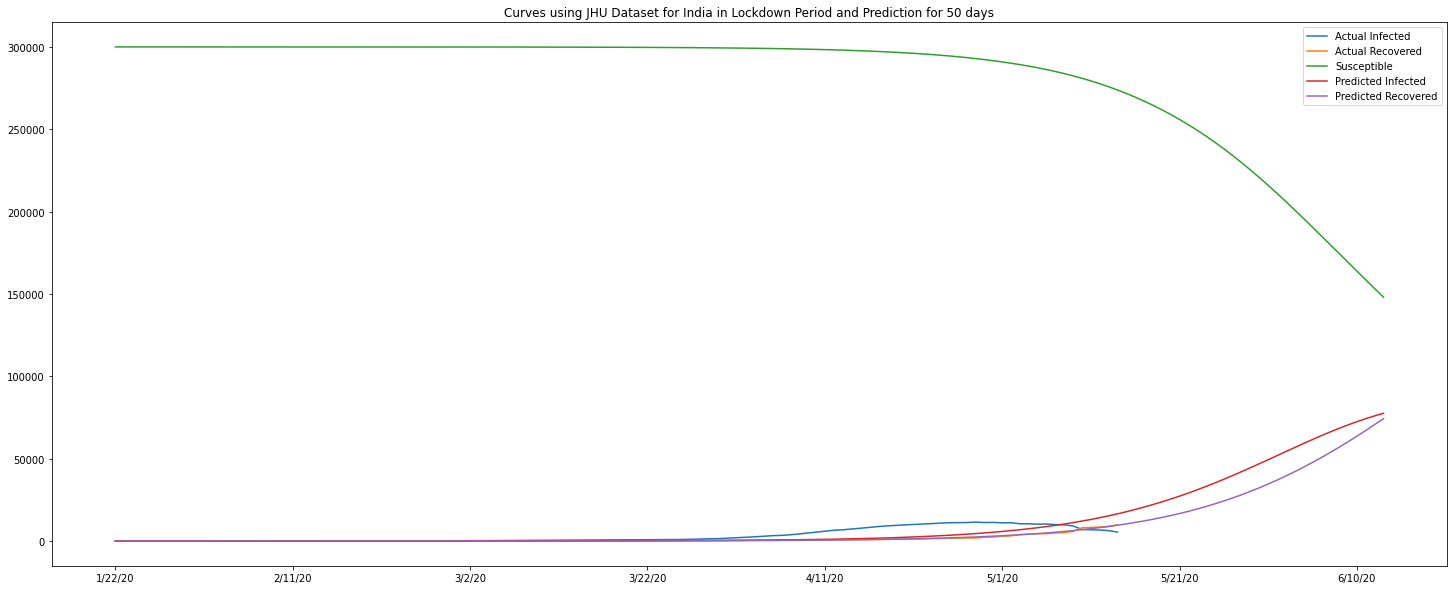

In [ ]:
susceptible, predicted_infected, predicted_recovered = train(recovered, infected, data)

In [ ]:
actual_infected = df["Active Cases"][:len(susceptible)]
actual_recovered = df["Recovered"][:len(susceptible)]

In [ ]:
plot_data = {"Predicted Infected": predicted_infected, "Predicted Recovered": predicted_recovered, "Susceptible": susceptible, "Actual Infected": actual_infected, "Actual Recovered": actual_recovered}
df_plot = pd.DataFrame(data=plot_data)
df_plot

Predicted Infected  Predicted Recovered    Susceptible  \
1/22/20            1.000000             1.000000  300000.000000   
1/23/20            1.091141             1.049394  299999.859465   
1/24/20            1.190588             1.103290  299999.706121   
1/25/20            1.299138             1.162120  299999.538742   
1/26/20            1.417590             1.226316  299999.356094   
...                     ...                  ...            ...   
6/9/20         70535.311699         60307.729269  169158.959032   
6/10/20        72492.138145         63688.653116  163821.208739   
6/11/20        74325.690843         67159.183752  158517.125405   
6/12/20        76025.628856         70713.325648  153263.045496   
6/13/20        77582.818993         74344.576336  148074.604670   

        Actual Infected Actual Recovered  
1/22/20               2                0  
1/23/20               2                0  
1/24/20               2                0  
1/25/20               2                0  
1/26/20               3                1  
...                 ...              ...  
6/9/20             1050            15141  
6/10/20            1007            15217  
6/11/20            1032            15233  
6/12/20             964            15362  
6/13/20             908            15458  

[144 rows x 5 columns]

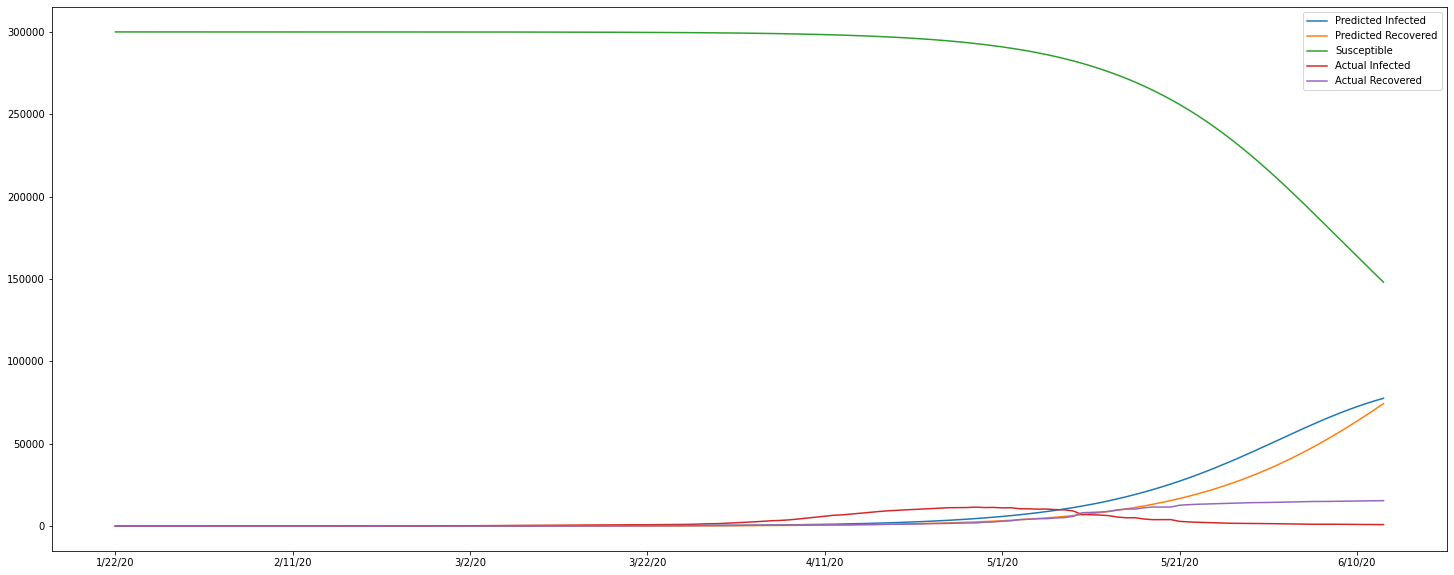

In [ ]:
fig, ax = plt.subplots(figsize=(25, 10))
df_plot.plot(ax=ax)

In [ ]:
!pip install plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


fig=go.Figure()
fig.layout.plot_bgcolor = '#FFFFFF'
fig.layout.paper_bgcolor = '#FFFFFF'
fig.add_trace(go.Scatter(x=pres_fut, y=susceptible,
                    mode='lines',name="Active Cases", line=dict(color='blue', dash='dashdot', shape='linear')))

fig.add_trace(go.Scatter(x=pres_fut, y=actual_infected,
                    mode='lines+markers',name="Infected Cases", line=dict(color='red', dash='dash', shape='linear'), marker = dict(symbol = "cross-dot")))

fig.add_trace(go.Scatter(x=pres_fut, y=predicted_infected,
                    mode='lines',name="Predicted Infected",
                    line=dict(color='red', dash='dash', shape='linear')))

fig.add_trace(go.Scatter(x=pres_fut, y=predicted_recovered,
                    mode='lines',name="Predicted Recovered",
                    line=dict(color='green', dash='dot', shape='linear')))
fig.add_trace(go.Scatter(x=pres_fut, y=actual_recovered,
                    mode='lines+markers',name="Recovered Cases", line=dict(color='green', dash='dot', shape='linear')))

fig.update_layout(xaxis_title="Date",yaxis_title="Covid 19 Cases",
                 legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Transfer Function**

Input Signal

In [ ]:
#Sampling Rate
t = np.linspace(0, 300, 300, endpoint=True)

In [ ]:
pw_1

39.409496338816666

In [ ]:
square_wave_1 = []
for i in range(index.index('1/22/20'), index.index('3/22/20')):
  square_wave_1.append(0)
while len(square_wave_1) < 300:
  for i in range(0, 39):
    if len(square_wave_1) >= 300:
      break
    else:
      square_wave_1.append(1)
  for i in range(0, 39):
    if len(square_wave_1) >= 300:
      break
    else:
      square_wave_1.append(0)

In [ ]:
len(square_wave_1)

300

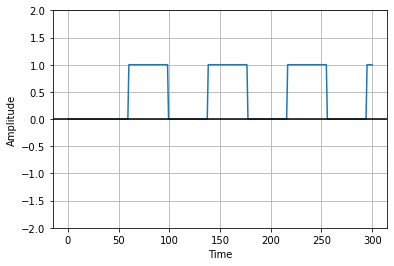

In [ ]:
# Plot the square wave signal 
plot.plot(t, square_wave_1)
plot.xlabel('Time')
plot.ylabel('Amplitude')
plot.grid(True, which='both')
plot.axhline(y=0, color='k')
plot.ylim(-2, 2)
plot.show()

Transfer Function 

In [ ]:
k1 = 0.14525174
k2 = 0.02585798
R = k1/k2
M = (k1 * math.log(R))/2
print(k1, k2, R, M)

0.14525174 0.02585798 5.617288744132372 0.12534129365655192


In [ ]:
num = [M]
den = [1, M]
transfer_function_1 = signal.TransferFunction(num, den)
transfer_function_1

TransferFunctionContinuous(
array([0.12534129]),
array([1.        , 0.12534129]),
dt: None
)

Square Wave Response

In [ ]:
t_out, y_out_1, x_out = lsim(system=transfer_function_1, T=t, U=square_wave_1)

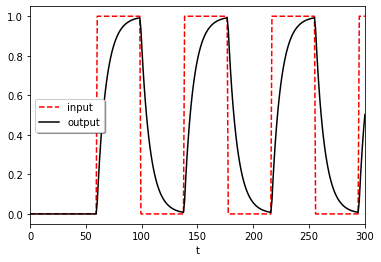

In [ ]:
plot.plot(t, square_wave_1, 'r--', linewidth=1.5, label='input')
plot.plot(t_out, y_out_1, 'k', linewidth=1.5, label='output')
plot.legend(loc='best', shadow=True, framealpha=1)
# plot.grid(alpha=0.3)
plot.xlabel('t')
plot.xlim(0,300)
plot.show()

# **SIR for Iran using JHU Dataset**

Dataset - https://github.com/CSSEGISandData/COVID-19 \\
Reference - https://www.lewuathe.com/covid-19-dynamics-with-sir-model.html

In [ ]:
file_path = '/content/time_series_covid19_confirmed_global.csv'
df_confirm = pd.read_csv(file_path)
file_path = '/content/time_series_covid19_recovered_global.csv'
df_recovered = pd.read_csv(file_path)
file_path = '/content/time_series_covid19_deaths_global.csv'
df_dead = pd.read_csv(file_path)

In [ ]:
df_confirm

Province/State      Country/Region        Lat        Long  1/22/20  \
0              NaN         Afghanistan  33.939110   67.709953        0   
1              NaN             Albania  41.153300   20.168300        0   
2              NaN             Algeria  28.033900    1.659600        0   
3              NaN             Andorra  42.506300    1.521800        0   
4              NaN              Angola -11.202700   17.873900        0   
..             ...                 ...        ...         ...      ...   
271            NaN             Vietnam  14.058324  108.277199        0   
272            NaN  West Bank and Gaza  31.952200   35.233200        0   
273            NaN               Yemen  15.552727   48.516388        0   
274            NaN              Zambia -13.133897   27.849332        0   
275            NaN            Zimbabwe -19.015438   29.154857        0   

     1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  6/5/21  6/6/21  6/7/21  \
0          0        0        0        0        0  ...   77963   79224   80841   
1          0        0        0        0        0  ...  132374  132379  132384   
2          0        0        0        0        0  ...  130681  130958  131283   
3          0        0        0        0        0  ...   13758   13758   13777   
4          0        0        0        0        0  ...   35594   35772   35854   
..       ...      ...      ...      ...      ...  ...     ...     ...     ...   
271        2        2        2        2        2  ...    8580    8791    9027   
272        0        0        0        0        0  ...  309853  310026  310026   
273        0        0        0        0        0  ...    6780    6787    6812   
274        0        0        0        0        0  ...   99540  100278  100765   
275        0        0        0        0        0  ...   39168   39189   39238   

     6/8/21  6/9/21  6/10/21  6/11/21  6/12/21  6/13/21  6/14/21  
0     82326   84050    85892    87716    88740    89861    91458  
1    132397  132415   132426   132437   132449   132459   132461  
2    131647  132034   132355   132727   133070   133388   133742  
3     13781   13791    13805    13813    13813    13813    13826  
4     36004   36115    36325    36455    36600    36705    36790  
..      ...     ...      ...      ...      ...      ...      ...  
271    9222    9635     9835    10048    10337    10630    10881  
272  310544  310544   311018   311018   311018   311534   311690  
273    6823    6832     6836     6856     6857     6862     6863  
274  101996  103763   105909   107974   110332   111746   113134  
275   39321   39432    39496    39688    39852    39959    40077  

[276 rows x 514 columns]

In [ ]:
df_recovered

Province/State      Country/Region        Lat        Long  1/22/20  \
0              NaN         Afghanistan  33.939110   67.709953        0   
1              NaN             Albania  41.153300   20.168300        0   
2              NaN             Algeria  28.033900    1.659600        0   
3              NaN             Andorra  42.506300    1.521800        0   
4              NaN              Angola -11.202700   17.873900        0   
..             ...                 ...        ...         ...      ...   
256            NaN             Vietnam  14.058324  108.277199        0   
257            NaN  West Bank and Gaza  31.952200   35.233200        0   
258            NaN               Yemen  15.552727   48.516388        0   
259            NaN              Zambia -13.133897   27.849332        0   
260            NaN            Zimbabwe -19.015438   29.154857        0   

     1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  6/5/21  6/6/21  6/7/21  \
0          0        0        0        0        0  ...   58265   58622   58998   
1          0        0        0        0        0  ...  129627  129664  129702   
2          0        0        0        0        0  ...   90995   91198   91413   
3          0        0        0        0        0  ...   13527   13527   13557   
4          0        0        0        0        0  ...   28866   28880   29329   
..       ...      ...      ...      ...      ...  ...     ...     ...     ...   
256        0        0        0        0        0  ...    3310    3368    3509   
257        0        0        0        0        0  ...  301670  301881  301881   
258        0        0        0        0        0  ...    3550    3571    3588   
259        0        0        0        0        0  ...   93036   93374   93694   
260        0        0        0        0        0  ...   36698   36728   36746   

     6/8/21  6/9/21  6/10/21  6/11/21  6/12/21  6/13/21  6/14/21  
0     59569   59871    60280    60598    60939    61410    61706  
1    129736  129761   129785   129807   129826   129842   129865  
2     91651   91894    92132    92384    92620    92852    93094  
3     13557   13569    13578    13591    13591    13591    13618  
4     29368   29553    29960    30101    30207    30282    30359  
..      ...     ...      ...      ...      ...      ...      ...  
256    3547    3636     3708     3804     3827     3998     4236  
257  302357  302357   302944   302944   302944   303813   304138  
258    3638    3675     3689     3697     3727     3743     3765  
259   93992   94189    94995    95674    96646    97756    98994  
260   36756   36917    36940    36970    36992    37004    37027  

[261 rows x 514 columns]

In [ ]:
df_dead

Province/State      Country/Region        Lat        Long  1/22/20  \
0              NaN         Afghanistan  33.939110   67.709953        0   
1              NaN             Albania  41.153300   20.168300        0   
2              NaN             Algeria  28.033900    1.659600        0   
3              NaN             Andorra  42.506300    1.521800        0   
4              NaN              Angola -11.202700   17.873900        0   
..             ...                 ...        ...         ...      ...   
271            NaN             Vietnam  14.058324  108.277199        0   
272            NaN  West Bank and Gaza  31.952200   35.233200        0   
273            NaN               Yemen  15.552727   48.516388        0   
274            NaN              Zambia -13.133897   27.849332        0   
275            NaN            Zimbabwe -19.015438   29.154857        0   

     1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  6/5/21  6/6/21  6/7/21  \
0          0        0        0        0        0  ...    3104    3145    3187   
1          0        0        0        0        0  ...    2451    2451    2452   
2          0        0        0        0        0  ...    3510    3518    3527   
3          0        0        0        0        0  ...     127     127     127   
4          0        0        0        0        0  ...     794     797     800   
..       ...      ...      ...      ...      ...  ...     ...     ...     ...   
271        0        0        0        0        0  ...      53      53      53   
272        0        0        0        0        0  ...    3516    3517    3517   
273        0        0        0        0        0  ...    1325    1329    1336   
274        0        0        0        0        0  ...    1303    1308    1315   
275        0        0        0        0        0  ...    1605    1606    1611   

     6/8/21  6/9/21  6/10/21  6/11/21  6/12/21  6/13/21  6/14/21  
0      3251    3305     3356     3412     3449     3527     3612  
1      2452    2452     2452     2453     2453     2453     2453  
2      3537    3544     3552     3560     3565     3571     3579  
3       127     127      127      127      127      127      127  
4       803     811      815      819      825      831      836  
..      ...     ...      ...      ...      ...      ...      ...  
271      55      55       55       57       58       59       59  
272    3520    3520     3524     3524     3524     3533     3539  
273    1336    1337     1338     1342     1347     1349     1350  
274    1321    1324     1332     1348     1365     1389     1416  
275    1617    1622     1626     1629     1632     1632     1635  

[276 rows x 514 columns]

In [ ]:
Iran_confirm = df_confirm.loc[df_confirm['Country/Region'] == 'Iran']
Iran_confirm

Province/State Country/Region        Lat       Long  1/22/20  1/23/20  \
149            NaN           Iran  32.427908  53.688046        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...   6/5/21   6/6/21   6/7/21  \
149        0        0        0        0  ...  2960751  2966363  2971270   

      6/8/21   6/9/21  6/10/21  6/11/21  6/12/21  6/13/21  6/14/21  
149  2980116  2990714  3003112  3013078  3020522  3028717  3039432  

[1 rows x 514 columns]

In [ ]:
confirmed = Iran_confirm.iloc[0].loc['1/22/20':]
confirmed

1/22/20          0
1/23/20          0
1/24/20          0
1/25/20          0
1/26/20          0
            ...   
6/10/21    3003112
6/11/21    3013078
6/12/21    3020522
6/13/21    3028717
6/14/21    3039432
Name: 149, Length: 510, dtype: object

In [ ]:
Iran_recovered = df_recovered.loc[df_recovered['Country/Region'] == 'Iran']
Iran_recovered

Province/State Country/Region        Lat       Long  1/22/20  1/23/20  \
134            NaN           Iran  32.427908  53.688046        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...   6/5/21   6/6/21   6/7/21  \
134        0        0        0        0  ...  2537092  2552401  2565972   

      6/8/21   6/9/21  6/10/21  6/11/21  6/12/21  6/13/21  6/14/21  
134  2578263  2590682  2612091  2624802  2640281  2652792  2666601  

[1 rows x 514 columns]

In [ ]:
recovered = Iran_recovered.iloc[0].loc['1/22/20':]
recovered

1/22/20          0
1/23/20          0
1/24/20          0
1/25/20          0
1/26/20          0
            ...   
6/10/21    2612091
6/11/21    2624802
6/12/21    2640281
6/13/21    2652792
6/14/21    2666601
Name: 134, Length: 510, dtype: object

In [ ]:
Iran_dead = df_dead.loc[df_dead['Country/Region'] == 'Iran']
Iran_dead

Province/State Country/Region        Lat       Long  1/22/20  1/23/20  \
149            NaN           Iran  32.427908  53.688046        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  6/5/21  6/6/21  6/7/21  6/8/21  \
149        0        0        0        0  ...   80941   81063   81183   81362   

     6/9/21  6/10/21  6/11/21  6/12/21  6/13/21  6/14/21  
149   81519    81672    81796    81911    82098    82217  

[1 rows x 514 columns]

In [ ]:
dead = Iran_dead.iloc[0].loc['1/22/20':]
dead

1/22/20        0
1/23/20        0
1/24/20        0
1/25/20        0
1/26/20        0
           ...  
6/10/21    81672
6/11/21    81796
6/12/21    81911
6/13/21    82098
6/14/21    82217
Name: 149, Length: 510, dtype: object

In [ ]:
print(len(confirmed),len(recovered), len(dead))

510 510 510


In [ ]:
t = np.arange(0, len(confirmed))
len(t)

510

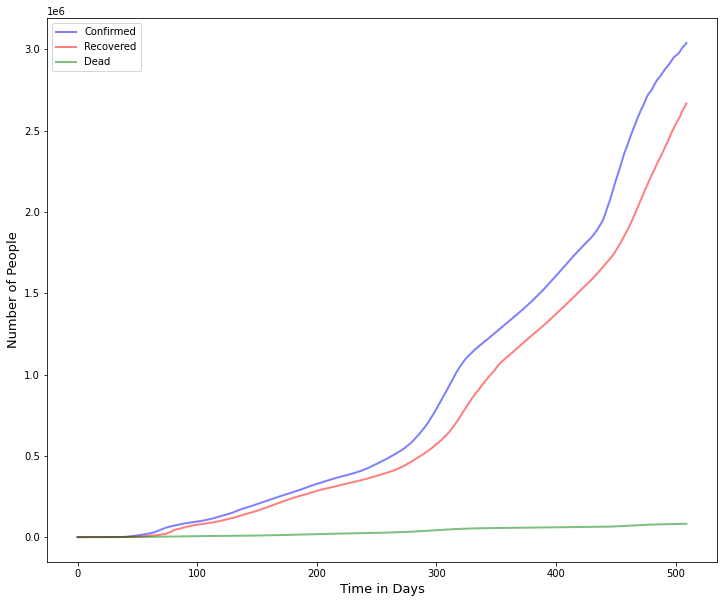

In [ ]:
fig = plt.figure(facecolor='w', figsize=(12,10))
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(t, confirmed, 'b', alpha=0.5, lw=2, label='Confirmed')
ax.plot(t, recovered, 'r', alpha=0.5, lw=2, label='Recovered')
ax.plot(t, dead, 'g', alpha=0.5, lw=2, label='Dead')
ax.set_xlabel('Time in Days', size=13)
ax.set_ylabel('Number of People', size=13)
legend = ax.legend()
plt.show()

In [ ]:
activecases = confirmed - recovered - dead
activecases

1/22/20         0
1/23/20         0
1/24/20         0
1/25/20         0
1/26/20         0
            ...  
6/10/21    309349
6/11/21    306480
6/12/21    298330
6/13/21    293827
6/14/21    290614
Length: 510, dtype: object

In [ ]:
datadf = {"Active Cases": activecases, "Infected": confirmed, "Recovered": recovered}
days = [x for x in range(0,len(activecases))]
df = pd.DataFrame(data=datadf)
df["Days"] = days
df

Active Cases Infected Recovered  Days
1/22/20            0        0         0     0
1/23/20            0        0         0     1
1/24/20            0        0         0     2
1/25/20            0        0         0     3
1/26/20            0        0         0     4
...              ...      ...       ...   ...
6/10/21       309349  3003112   2612091   505
6/11/21       306480  3013078   2624802   506
6/12/21       298330  3020522   2640281   507
6/13/21       293827  3028717   2652792   508
6/14/21       290614  3039432   2666601   509

[510 rows x 4 columns]

In [ ]:
index = list(df.index.values)
index.index('3/14/20')

52

We will divide the dataset in two parts - Pre-Lockdown Period and Lockdown Period \\
1) Pre Lockdown Period - 22/1/20 - 14/3/2020 \\
2) Lockdown Period - 14/3/2020 - 20/4/2020

**Pre Lockdown Period**

In [ ]:
data = df["Active Cases"][:index.index('3/14/20')]
infected = df["Infected"][:index.index('3/14/20')]
recovered = df["Recovered"][:index.index('3/14/20')]

In [ ]:
def loss(point, data, recovered, s_0, i_0, r_0):
    size = len(data)
    beta, gamma = point
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I/s_0, beta*S*I/s_0-gamma*I, gamma*I]
    solution = solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1), vectorized=True)
    l1 = np.sqrt(np.mean((solution.y[1] - data)**2))
    l2 = np.sqrt(np.mean((solution.y[2] - recovered)**2))
    alpha = 0.1
    return alpha * l1 + (1 - alpha) * l2

In [ ]:
def predict(beta, gamma, data, recovered, s_0, i_0, r_0):
    new_index = list(data.index.values)
    size = len(new_index)
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I/s_0, beta*S*I/s_0-gamma*I, gamma*I]
    extended_actual = np.concatenate((data.values, [None] * (size - len(data.values))))
    extended_recovered = np.concatenate((recovered.values, [None] * (size - len(recovered.values))))
    return new_index, extended_actual, extended_recovered, solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1))

In [ ]:
def train(recovered, infected, data):
    recovered = recovered
    infected = infected
    data = data

    optimal = minimize(loss, [0.001, 0.001], args=(data, recovered, s_0, i_0, r_0), method='L-BFGS-B', bounds=[(0.00000001, 2), (0.00000001, 0.4)])
    print(optimal)
    beta, gamma = optimal.x
    new_index, extended_actual, extended_recovered, prediction = predict(beta, gamma, data, recovered, s_0, i_0, r_0)
    df = pd.DataFrame({'Actual Infected': extended_actual, 'Actual Recovered': extended_recovered, 'Susceptible': prediction.y[0], 'Predicted Infected': prediction.y[1], 'Predicted Recovered': prediction.y[2]}, index=new_index)
    fig, ax = plt.subplots(figsize=(25, 10))
    ax.set_title('Curves using JHU Dataset for India in Pre-Lockdown Period')
    df.plot(ax=ax)
    print(f"country=India, beta={beta:.8f}, gamma={gamma:.8f}, r_0:{(beta/gamma):.8f}")

In [ ]:
s_0 = 10000
i_0 = 1
r_0 = 0

      fun: 290.13583136591546
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.13484396,  0.04206413])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 69
      nit: 9
   status: 0
  success: True
        x: array([0.25871302, 0.05426221])
country=India, beta=0.25871302, gamma=0.05426221, r_0:4.76783042


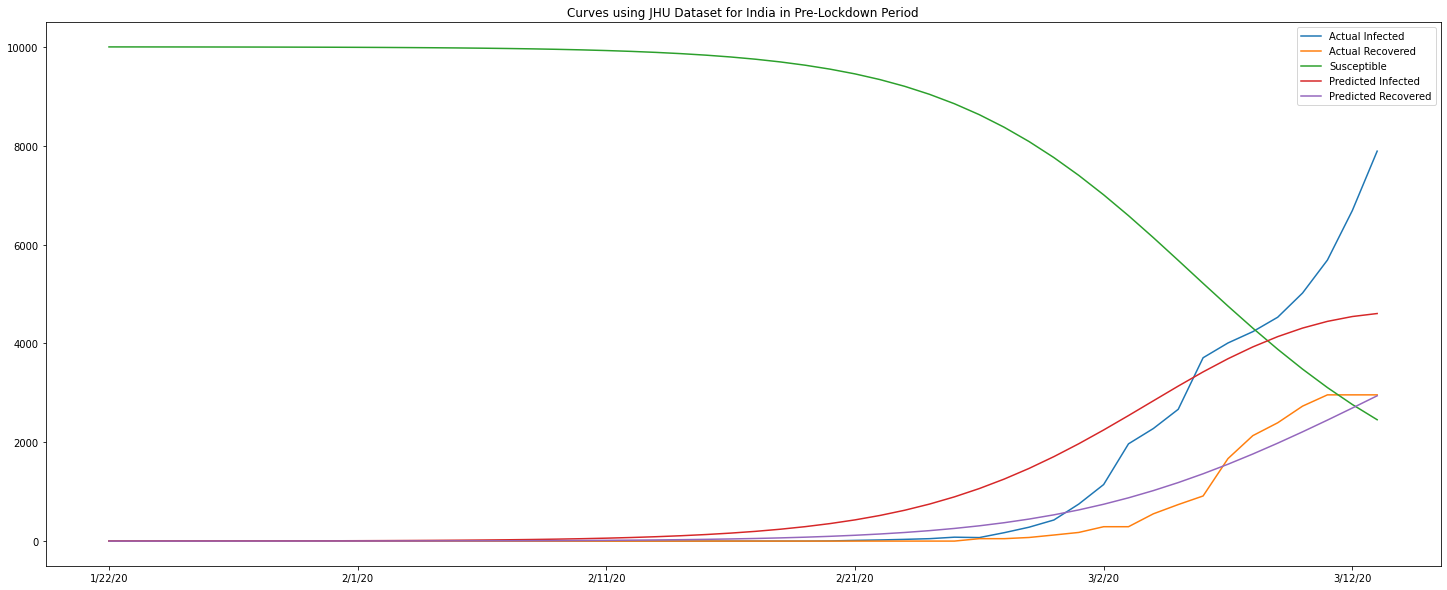

In [ ]:
train(recovered, infected, data)

**Lockdown Period**

In [ ]:
data = df["Active Cases"][:index.index('3/14/20')]
infected = df["Infected"][:index.index('3/14/20')]
recovered = df["Recovered"][:index.index('3/14/20')]

In [ ]:
def loss(point, data, recovered, s_0, i_0, r_0):
    size = len(data)
    beta, gamma = point
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I/s_0, beta*S*I/s_0-gamma*I, gamma*I]
    solution = solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1), vectorized=True)
    l1 = np.sqrt(np.mean((solution.y[1] - data)**2))
    l2 = np.sqrt(np.mean((solution.y[2] - recovered)**2))
    alpha = 0.1
    return alpha * l1 + (1 - alpha) * l2

In [ ]:
print(index.index('3/14/20'), index.index('4/20/20'))

52 89


In [ ]:
pres_fut = np.array(list(data.index.values)+ list((np.array(index[52:89]))))

In [ ]:
def predict(beta, gamma, data, recovered, s_0, i_0, r_0):
    new_index = pres_fut
    size = len(new_index)
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I/s_0, beta*S*I/s_0-gamma*I, gamma*I]
    extended_actual = np.concatenate((data.values, [None] * (size - len(data.values))))
    extended_recovered = np.concatenate((recovered.values, [None] * (size - len(recovered.values))))
    return new_index, extended_actual, extended_recovered, solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1))

In [ ]:
def train(recovered, infected, data):
    recovered = recovered
    infected = infected
    data = data

    optimal = minimize(loss, [0.001, 0.001], args=(data, recovered, s_0, i_0, r_0), method='L-BFGS-B', bounds=[(0.00000001, 2), (0.00000001, 0.4)])
    print(optimal)
    beta, gamma = optimal.x
    new_index, extended_actual, extended_recovered, prediction = predict(beta, gamma, data, recovered, s_0, i_0, r_0)
    df = pd.DataFrame({'Actual Infected': extended_actual, 'Actual Recovered': extended_recovered, 'Susceptible': prediction.y[0], 'Predicted Infected': prediction.y[1], 'Predicted Recovered': prediction.y[2]}, index=new_index)
    fig, ax = plt.subplots(figsize=(25, 10))
    ax.set_title('Curves using JHU Dataset for India in Lockdown Period and Prediction for 50 days')
    df.plot(ax=ax)
    print(f"country=India, beta={beta:.8f}, gamma={gamma:.8f}, r_0:{(beta/gamma):.8f}")
    return prediction.y[0], prediction.y[1], prediction.y[2]

In [ ]:
print(data[0], infected[0], recovered[0])

0 0 0


In [ ]:
s_0 = 300000
i_0 = 1
r_0 = 1

      fun: 228.25871343564916
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.00429452, -0.00407283])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 81
      nit: 10
   status: 0
  success: True
        x: array([0.25449623, 0.07611356])
country=India, beta=0.25449623, gamma=0.07611356, r_0:3.34363865


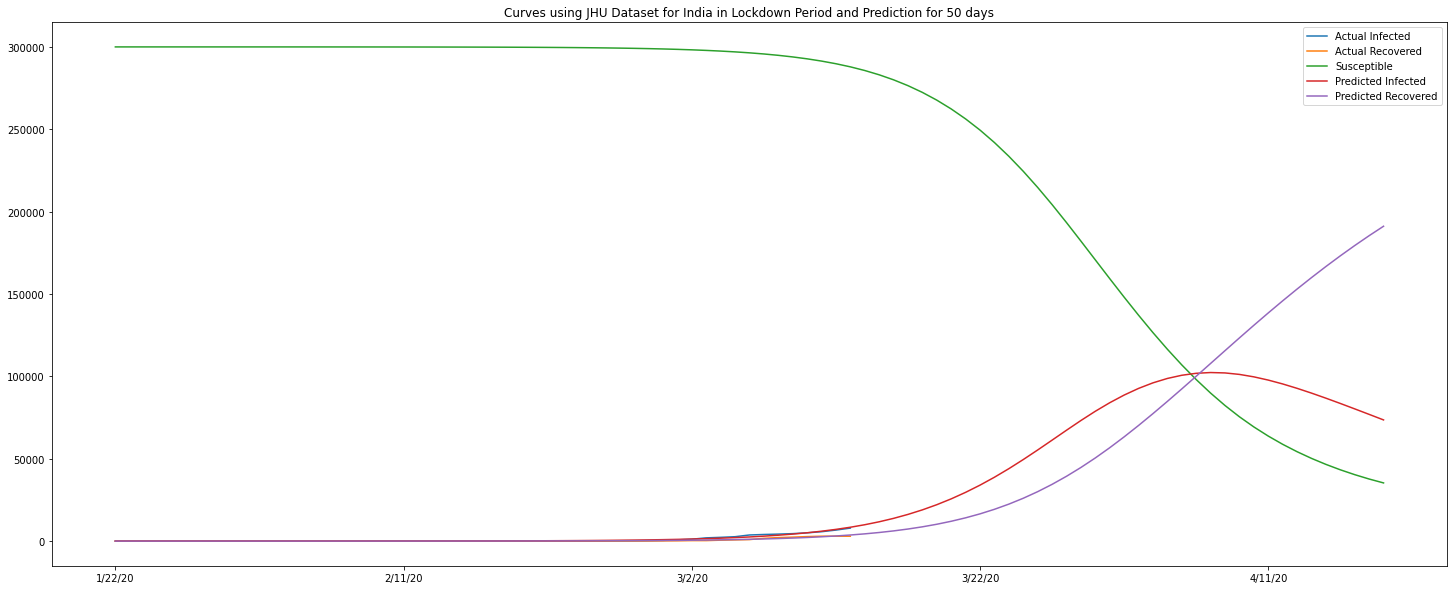

In [ ]:
susceptible, predicted_infected, predicted_recovered = train(recovered, infected, data)

In [ ]:
actual_infected = df["Active Cases"][:len(susceptible)]
actual_recovered = df["Recovered"][:len(susceptible)]

In [ ]:
plot_data = {"Predicted Infected": predicted_infected, "Predicted Recovered": predicted_recovered, "Susceptible": susceptible, "Actual Infected": actual_infected, "Actual Recovered": actual_recovered}
df_plot = pd.DataFrame(data=plot_data)
df_plot

Predicted Infected  Predicted Recovered    Susceptible  \
1/22/20            1.000000             1.000000  300000.000000   
1/23/20            1.195283             1.083325  299999.721393   
1/24/20            1.428720             1.182930  299999.388350   
1/25/20            1.707839             1.302026  299998.990134   
1/26/20            2.041194             1.444266  299998.514540   
...                     ...                  ...            ...   
4/15/20        86759.897066        166675.612148   46566.490787   
4/16/20        83553.410143        173165.512306   43283.077551   
4/17/20        80262.796298        179408.957672   40330.246030   
4/18/20        76922.895586        185398.589395   37680.515020   
4/19/20        73559.877674        191130.034589   35312.087736   

        Actual Infected Actual Recovered  
1/22/20               0                0  
1/23/20               0                0  
1/24/20               0                0  
1/25/20               0                0  
1/26/20               0                0  
...                 ...              ...  
4/15/20           21679            49933  
4/16/20           20897            52229  
4/17/20           20472            54064  
4/18/20           19850            55987  
4/19/20           20070            57023  

[89 rows x 5 columns]

In [ ]:
days = list(range(index.index('1/22/20'), index.index('4/19/20')+1))
len(days)

89

In [ ]:
len(df_plot['Predicted Recovered'])

89

In [ ]:
x, y = intersection(days, df_plot['Predicted Infected'], days, df_plot['Predicted Recovered'])

In [ ]:
x

array([ 0.        , 75.24429102])

In [ ]:
start = index.index('4/20/20')
pw_1 = abs(x[1] - start)
pw_1

13.755708984664494

Predicted Lockdown Interval = 21 , Actual Lockdown Interval = 37

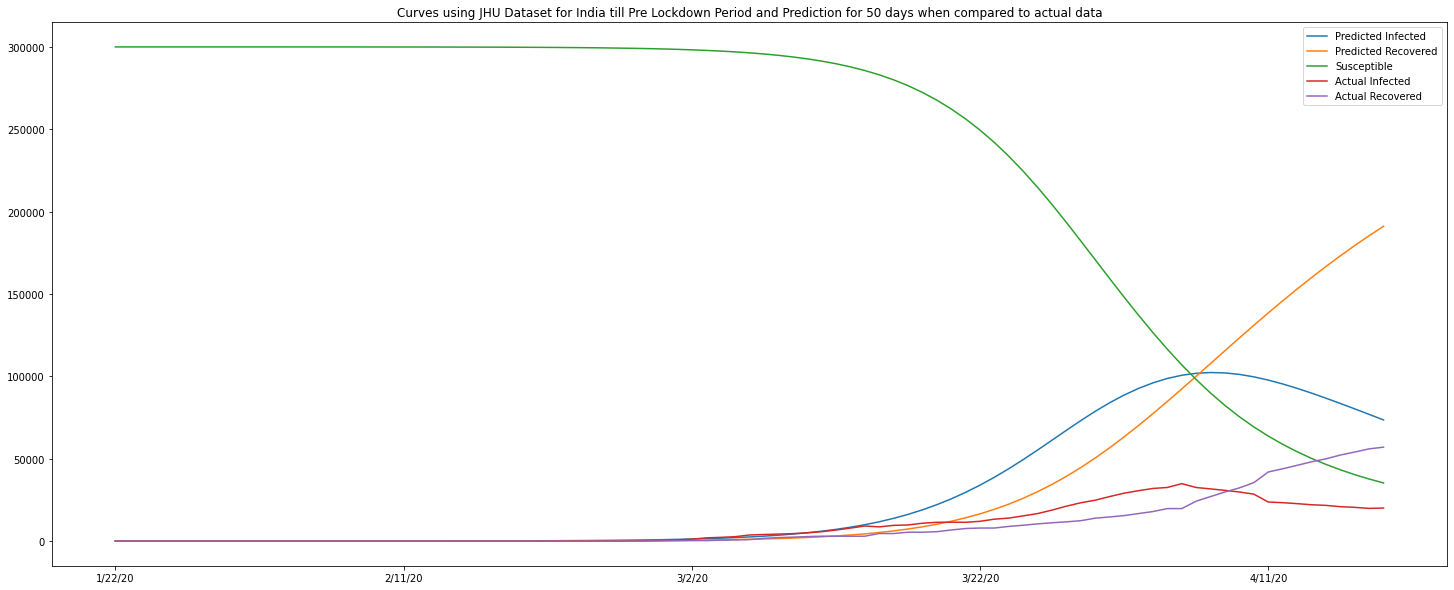

In [ ]:
fig, ax = plt.subplots(figsize=(25, 10))
ax.set_title('Curves using JHU Dataset for India till Pre Lockdown Period and Prediction for 50 days when compared to actual data')
df_plot.plot(ax=ax)

**Taking Data till 20/4/20 for plotting SIR curves**

In [ ]:
data = df["Active Cases"][:index.index('3/30/20')]
infected = df["Infected"][:index.index('3/30/20')]
recovered = df["Recovered"][:index.index('3/30/20')]

In [ ]:
def loss(point, data, recovered, s_0, i_0, r_0):
    size = len(data)
    beta, gamma = point
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I/s_0, beta*S*I/s_0-gamma*I, gamma*I]
    solution = solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1), vectorized=True)
    l1 = np.sqrt(np.mean((solution.y[1] - data)**2))
    l2 = np.sqrt(np.mean((solution.y[2] - recovered)**2))
    alpha = 0.1
    return alpha * l1 + (1 - alpha) * l2

In [ ]:
def predict(beta, gamma, data, recovered, s_0, i_0, r_0):
    new_index = list(data.index.values)
    size = len(new_index)
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I/s_0, beta*S*I/s_0-gamma*I, gamma*I]
    extended_actual = np.concatenate((data.values, [None] * (size - len(data.values))))
    extended_recovered = np.concatenate((recovered.values, [None] * (size - len(recovered.values))))
    return new_index, extended_actual, extended_recovered, solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1))

In [ ]:
def train(recovered, infected, data):
    recovered = recovered
    infected = infected
    data = data

    optimal = minimize(loss, [0.001, 0.001], args=(data, recovered, s_0, i_0, r_0), method='L-BFGS-B', bounds=[(0.00000001, 2), (0.00000001, 0.4)])
    print(optimal)
    beta, gamma = optimal.x
    new_index, extended_actual, extended_recovered, prediction = predict(beta, gamma, data, recovered, s_0, i_0, r_0)
    df = pd.DataFrame({'Actual Infected': extended_actual, 'Actual Recovered': extended_recovered, 'Susceptible': prediction.y[0], 'Predicted Infected': prediction.y[1], 'Predicted Recovered': prediction.y[2]}, index=new_index)
    fig, ax = plt.subplots(figsize=(25, 10))
    ax.set_title('Curves using JHU Dataset for India till Lockdown Period')
    df.plot(ax=ax)
    print(f"country=India, beta={beta:.8f}, gamma={gamma:.8f}, r_0:{(beta/gamma):.8f}")

In [ ]:
print(data[0], infected[0], recovered[0])

0 0 0


In [ ]:
s_0 = 75000
i_0 = 1
r_0 = 1

      fun: 935.6713551290088
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.00053433,  0.00102318])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 93
      nit: 13
   status: 0
  success: True
        x: array([0.23306447, 0.06756005])
country=India, beta=0.23306447, gamma=0.06756005, r_0:3.44973814


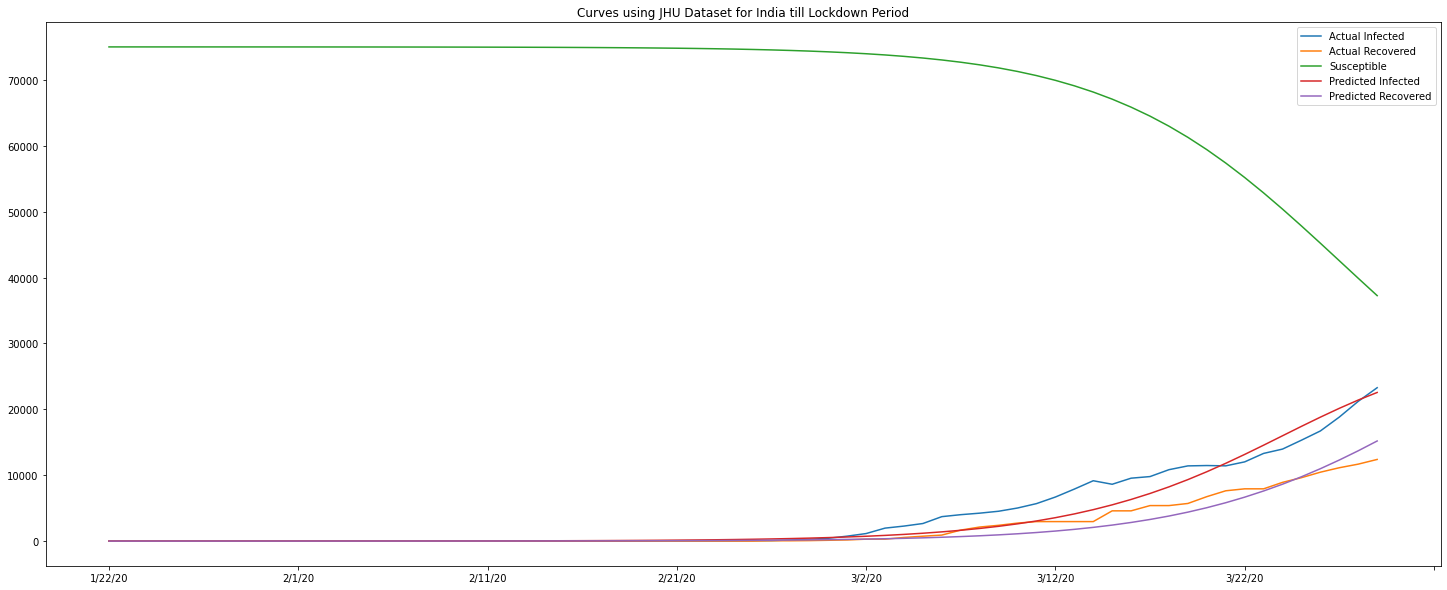

In [ ]:
train(recovered, infected, data)

**Predicting the curve for next 30 days**

In [ ]:
data = df["Active Cases"][:index.index('4/20/20')]
infected = df["Infected"][:index.index('4/20/20')]
recovered = df["Recovered"][:index.index('4/20/20')]

In [ ]:
def loss(point, data, recovered, s_0, i_0, r_0):
    size = len(data)
    beta, gamma = point
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I/s_0, beta*S*I/s_0-gamma*I, gamma*I]
    solution = solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1), vectorized=True)
    l1 = np.sqrt(np.mean((solution.y[1] - data)**2))
    l2 = np.sqrt(np.mean((solution.y[2] - recovered)**2))
    alpha = 0.1
    return alpha * l1 + (1 - alpha) * l2

In [ ]:
print(index.index('4/20/20'))

89


In [ ]:
pres_fut = np.array(list(data.index.values)+ list((np.array(index[109:139]))))

In [ ]:
def predict(beta, gamma, data, recovered, s_0, i_0, r_0):
    new_index = pres_fut
    size = len(new_index)
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I/s_0, beta*S*I/s_0-gamma*I, gamma*I]
    extended_actual = np.concatenate((data.values, [None] * (size - len(data.values))))
    extended_recovered = np.concatenate((recovered.values, [None] * (size - len(recovered.values))))
    return new_index, extended_actual, extended_recovered, solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1))

In [ ]:
def train(recovered, infected, data):
    recovered = recovered
    infected = infected
    data = data

    optimal = minimize(loss, [0.001, 0.001], args=(data, recovered, s_0, i_0, r_0), method='L-BFGS-B', bounds=[(0.00000001, 2), (0.00000001, 0.4)])
    print(optimal)
    beta, gamma = optimal.x
    new_index, extended_actual, extended_recovered, prediction = predict(beta, gamma, data, recovered, s_0, i_0, r_0)
    df = pd.DataFrame({'Actual Infected': extended_actual, 'Actual Recovered': extended_recovered, 'Susceptible': prediction.y[0], 'Predicted Infected': prediction.y[1], 'Predicted Recovered': prediction.y[2]}, index=new_index)
    fig, ax = plt.subplots(figsize=(25, 10))
    ax.set_title('Curves using JHU Dataset for India in Lockdown Period and Prediction for 50 days')
    df.plot(ax=ax)
    print(f"country=India, beta={beta:.8f}, gamma={gamma:.8f}, r_0:{(beta/gamma):.8f}")
    return prediction.y[0], prediction.y[1], prediction.y[2]

In [ ]:
print(data[0], infected[0], recovered[0])

0 0 0


In [ ]:
s_0 = 300000
i_0 = 1
r_0 = 1

      fun: 3232.334144930168
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 2979.18581964, -7427.70826037])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 138
      nit: 17
   status: 0
  success: True
        x: array([0.4202407 , 0.29569011])
country=India, beta=0.42024070, gamma=0.29569011, r_0:1.42122001


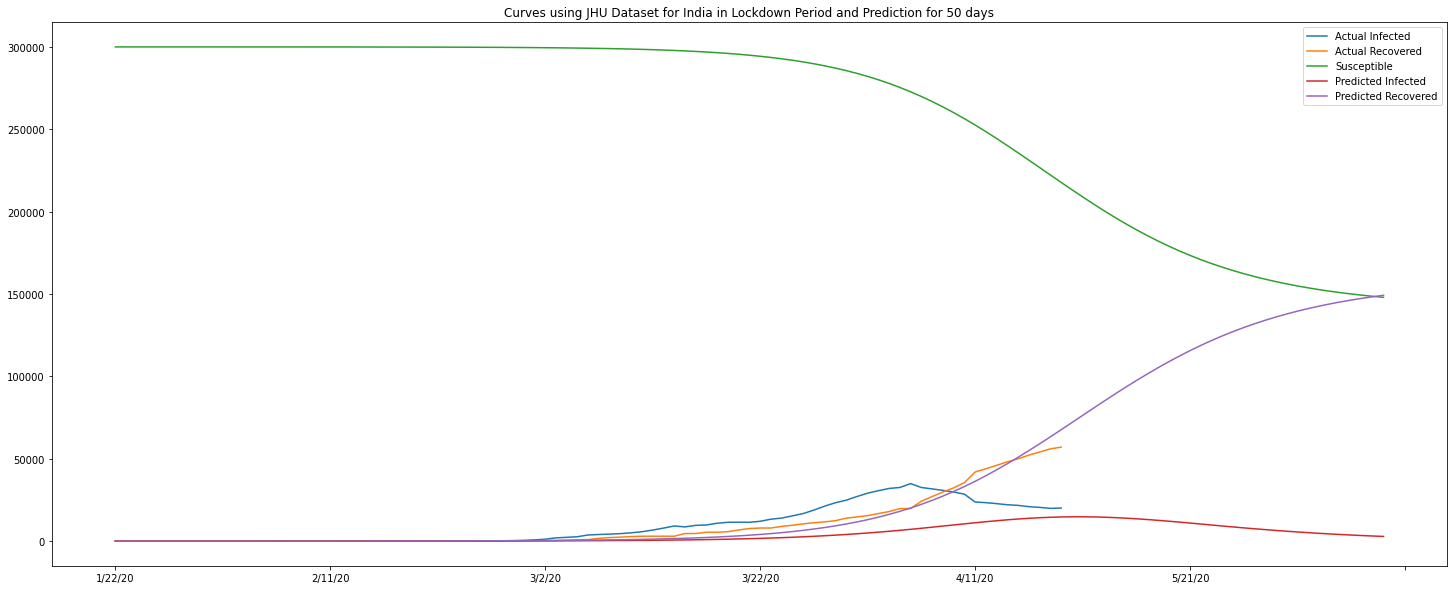

In [ ]:
susceptible, predicted_infected, predicted_recovered = train(recovered, infected, data)

In [ ]:
actual_infected = df["Active Cases"][:len(susceptible)]
actual_recovered = df["Recovered"][:len(susceptible)]

In [ ]:
plot_data = {"Predicted Infected": predicted_infected, "Predicted Recovered": predicted_recovered, "Susceptible": susceptible, "Actual Infected": actual_infected, "Actual Recovered": actual_recovered}
df_plot = pd.DataFrame(data=plot_data)
df_plot

Predicted Infected  Predicted Recovered    Susceptible  \
1/22/20            1.000000             1.000000  300000.000000   
1/23/20            1.132639             1.314893  299999.552468   
1/24/20            1.282883             1.671584  299999.045533   
1/25/20            1.453089             2.075669  299998.471241   
1/26/20            1.645806             2.533199  299997.820994   
...                     ...                  ...            ...   
5/15/20         3993.521145        145199.629451  150808.849404   
5/16/20         3667.391881        146333.804650  150000.803469   
5/17/20         3364.595852        147374.604914  149262.799234   
5/18/20         3084.141847        148328.562766  148589.295387   
5/19/20         2824.779622        149202.085971  147975.134407   

        Actual Infected Actual Recovered  
1/22/20               0                0  
1/23/20               0                0  
1/24/20               0                0  
1/25/20               0                0  
1/26/20               0                0  
...                 ...              ...  
5/15/20           17897            91836  
5/16/20           18308            93147  
5/17/20           18746            94464  
5/18/20           19774            95661  
5/19/20           20311            97173  

[119 rows x 5 columns]

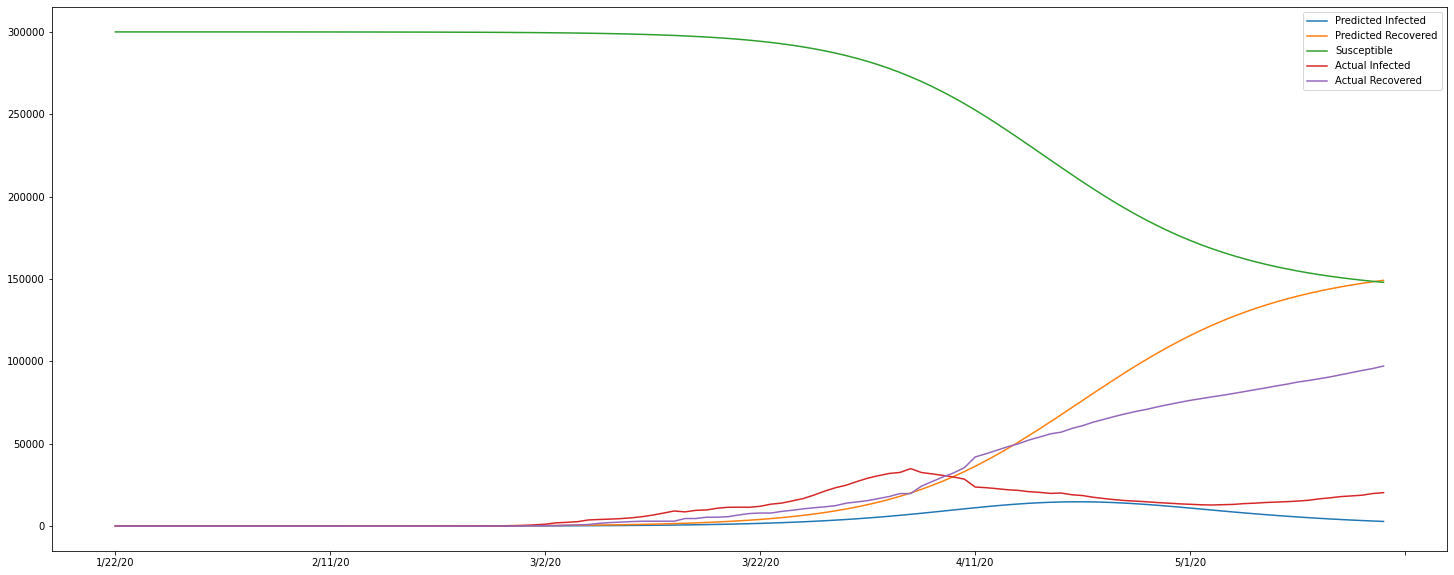

In [ ]:
fig, ax = plt.subplots(figsize=(25, 10))
df_plot.plot(ax=ax)

In [ ]:
!pip install plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


fig=go.Figure()
fig.layout.plot_bgcolor = '#FFFFFF'
fig.layout.paper_bgcolor = '#FFFFFF'
fig.add_trace(go.Scatter(x=pres_fut, y=susceptible,
                    mode='lines',name="Active Cases", line=dict(color='blue', dash='dashdot', shape='linear')))

fig.add_trace(go.Scatter(x=pres_fut, y=actual_infected,
                    mode='lines+markers',name="Infected Cases", line=dict(color='red', dash='dash', shape='linear'), marker = dict(symbol = "cross-dot")))

fig.add_trace(go.Scatter(x=pres_fut, y=predicted_infected,
                    mode='lines',name="Predicted Infected",
                    line=dict(color='red', dash='dash', shape='linear')))

fig.add_trace(go.Scatter(x=pres_fut, y=predicted_recovered,
                    mode='lines',name="Predicted Recovered",
                    line=dict(color='green', dash='dot', shape='linear')))
fig.add_trace(go.Scatter(x=pres_fut, y=actual_recovered,
                    mode='lines+markers',name="Recovered Cases", line=dict(color='green', dash='dot', shape='linear')))

fig.update_layout(xaxis_title="Date",yaxis_title="Covid 19 Cases",
                 legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Transfer Function**

Input Signal

In [ ]:
#Sampling Rate
t = np.linspace(0, 300, 300, endpoint=True)

In [ ]:
pw_1

13.755708984664494

In [ ]:
square_wave_1 = []
for i in range(index.index('1/22/20'), index.index('4/20/20')):
  square_wave_1.append(0)
while len(square_wave_1) < 300:
  for i in range(0, 21):
    if len(square_wave_1) >= 300:
      break
    else:
      square_wave_1.append(1)
  for i in range(0, 21):
    if len(square_wave_1) >= 300:
      break
    else:
      square_wave_1.append(0)

In [ ]:
len(square_wave_1)

300

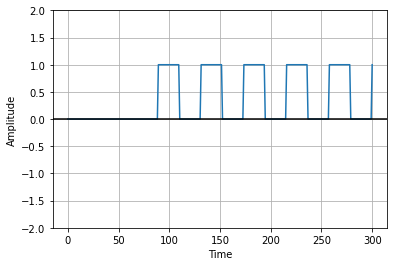

In [ ]:
# Plot the square wave signal 
plot.plot(t, square_wave_1)
plot.xlabel('Time')
plot.ylabel('Amplitude')
plot.grid(True, which='both')
plot.axhline(y=0, color='k')
plot.ylim(-2, 2)
plot.show()

Transfer Function 

In [ ]:
k1 = 0.25332766
k2 = 0.07203243
R = k1/k2
M = (k1 * math.log(R))/2
print(k1, k2, R, M)

0.25332766 0.07203243 3.5168556718133765 0.1592882926449316


In [ ]:
num = [M]
den = [1, M]
transfer_function_1 = signal.TransferFunction(num, den)
transfer_function_1

TransferFunctionContinuous(
array([0.15928829]),
array([1.        , 0.15928829]),
dt: None
)

Square Wave Response

In [ ]:
t_out, y_out_1, x_out = lsim(system=transfer_function_1, T=t, U=square_wave_1)

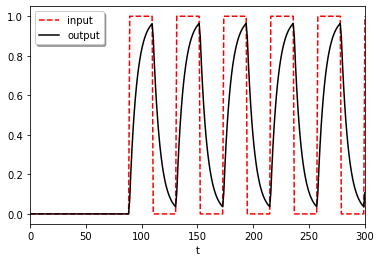

In [ ]:
plot.plot(t, square_wave_1, 'r--', linewidth=1.5, label='input')
plot.plot(t_out, y_out_1, 'k', linewidth=1.5, label='output')
plot.legend(loc='best', shadow=True, framealpha=1)
# plot.grid(alpha=0.3)
plot.xlabel('t')
plot.xlim(0,300)
plot.show()

# **SIR for Burma using JHU dataset**

Dataset - https://github.com/CSSEGISandData/COVID-19 \\
Reference - https://www.lewuathe.com/covid-19-dynamics-with-sir-model.html

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
from scipy.integrate import odeint

In [ ]:
file_path = '/content/time_series_covid19_confirmed_global.csv'
df_confirm = pd.read_csv(file_path)
file_path = '/content/time_series_covid19_recovered_global.csv'
df_recovered = pd.read_csv(file_path)
file_path = '/content/time_series_covid19_deaths_global.csv'
df_dead = pd.read_csv(file_path)

In [ ]:
df_confirm

Province/State      Country/Region        Lat  ...  6/12/21  6/13/21  6/14/21
0              NaN         Afghanistan  33.939110  ...    88740    89861    91458
1              NaN             Albania  41.153300  ...   132449   132459   132461
2              NaN             Algeria  28.033900  ...   133070   133388   133742
3              NaN             Andorra  42.506300  ...    13813    13813    13826
4              NaN              Angola -11.202700  ...    36600    36705    36790
..             ...                 ...        ...  ...      ...      ...      ...
271            NaN             Vietnam  14.058324  ...    10337    10630    10881
272            NaN  West Bank and Gaza  31.952200  ...   311018   311534   311690
273            NaN               Yemen  15.552727  ...     6857     6862     6863
274            NaN              Zambia -13.133897  ...   110332   111746   113134
275            NaN            Zimbabwe -19.015438  ...    39852    39959    40077

[276 rows x 514 columns]

In [ ]:
df_recovered

Province/State      Country/Region        Lat  ...  6/12/21  6/13/21  6/14/21
0              NaN         Afghanistan  33.939110  ...    60939    61410    61706
1              NaN             Albania  41.153300  ...   129826   129842   129865
2              NaN             Algeria  28.033900  ...    92620    92852    93094
3              NaN             Andorra  42.506300  ...    13591    13591    13618
4              NaN              Angola -11.202700  ...    30207    30282    30359
..             ...                 ...        ...  ...      ...      ...      ...
256            NaN             Vietnam  14.058324  ...     3827     3998     4236
257            NaN  West Bank and Gaza  31.952200  ...   302944   303813   304138
258            NaN               Yemen  15.552727  ...     3727     3743     3765
259            NaN              Zambia -13.133897  ...    96646    97756    98994
260            NaN            Zimbabwe -19.015438  ...    36992    37004    37027

[261 rows x 514 columns]

In [ ]:
df_dead

Province/State      Country/Region        Lat  ...  6/12/21  6/13/21  6/14/21
0              NaN         Afghanistan  33.939110  ...     3449     3527     3612
1              NaN             Albania  41.153300  ...     2453     2453     2453
2              NaN             Algeria  28.033900  ...     3565     3571     3579
3              NaN             Andorra  42.506300  ...      127      127      127
4              NaN              Angola -11.202700  ...      825      831      836
..             ...                 ...        ...  ...      ...      ...      ...
271            NaN             Vietnam  14.058324  ...       58       59       59
272            NaN  West Bank and Gaza  31.952200  ...     3524     3533     3539
273            NaN               Yemen  15.552727  ...     1347     1349     1350
274            NaN              Zambia -13.133897  ...     1365     1389     1416
275            NaN            Zimbabwe -19.015438  ...     1632     1632     1635

[276 rows x 514 columns]

In [ ]:
Burma_confirm = df_confirm.loc[df_confirm['Country/Region'] == 'Burma']
Burma_confirm

Province/State Country/Region      Lat  ...  6/12/21  6/13/21  6/14/21
34            NaN          Burma  21.9162  ...   145230   145603   145826

[1 rows x 514 columns]

In [ ]:
confirmed = Burma_confirm.iloc[0].loc['1/22/20':]
confirmed

1/22/20         0
1/23/20         0
1/24/20         0
1/25/20         0
1/26/20         0
            ...  
6/10/21    144876
6/11/21    145064
6/12/21    145230
6/13/21    145603
6/14/21    145826
Name: 34, Length: 510, dtype: object

In [ ]:
Burma_recovered = df_recovered.loc[df_recovered['Country/Region'] == 'Burma']
Burma_recovered

Province/State Country/Region      Lat  ...  6/12/21  6/13/21  6/14/21
34            NaN          Burma  21.9162  ...   132830   132928   132969

[1 rows x 514 columns]

In [ ]:
recovered = Burma_recovered.iloc[0].loc['1/22/20':]
recovered

1/22/20         0
1/23/20         0
1/24/20         0
1/25/20         0
1/26/20         0
            ...  
6/10/21    132690
6/11/21    132765
6/12/21    132830
6/13/21    132928
6/14/21    132969
Name: 34, Length: 510, dtype: object

In [ ]:
Burma_dead = df_dead.loc[df_dead['Country/Region'] == 'Burma']
Burma_dead

Province/State Country/Region      Lat  ...  6/12/21  6/13/21  6/14/21
34            NaN          Burma  21.9162  ...     3241     3244     3248

[1 rows x 514 columns]

In [ ]:
dead = Burma_dead.iloc[0].loc['1/22/20':]
dead

1/22/20       0
1/23/20       0
1/24/20       0
1/25/20       0
1/26/20       0
           ... 
6/10/21    3237
6/11/21    3239
6/12/21    3241
6/13/21    3244
6/14/21    3248
Name: 34, Length: 510, dtype: object

In [ ]:
print(len(confirmed), len(recovered), len(dead))

510 510 510


In [ ]:
t = np.arange(0, len(confirmed))
len(t)

510

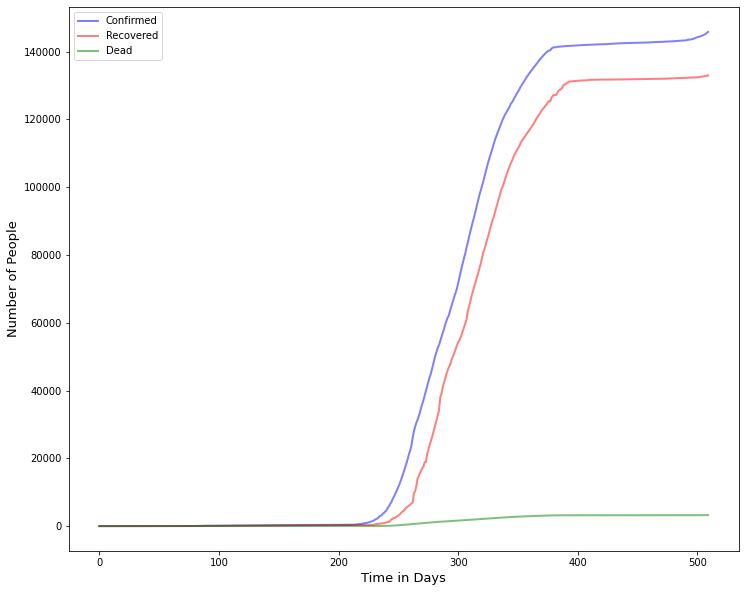

In [ ]:
fig = plt.figure(facecolor='w', figsize=(12,10))
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(t, confirmed, 'b', alpha=0.5, lw=2, label='Confirmed')
ax.plot(t, recovered, 'r', alpha=0.5, lw=2, label='Recovered')
ax.plot(t, dead, 'g', alpha=0.5, lw=2, label='Dead')
ax.set_xlabel('Time in Days', size=13)
ax.set_ylabel('Number of People', size=13)
legend = ax.legend()
plt.show()

In [ ]:
activecases = confirmed - recovered - dead
activecases

1/22/20       0
1/23/20       0
1/24/20       0
1/25/20       0
1/26/20       0
           ... 
6/10/21    8949
6/11/21    9060
6/12/21    9159
6/13/21    9431
6/14/21    9609
Name: 34, Length: 510, dtype: object

In [ ]:
datadf = {"Active Cases": activecases, "Infected": confirmed, "Recovered": recovered}
days = [x for x in range(0,len(activecases))]
df = pd.DataFrame(data=datadf)
df["Days"] = days
df

Active Cases Infected Recovered  Days
1/22/20            0        0         0     0
1/23/20            0        0         0     1
1/24/20            0        0         0     2
1/25/20            0        0         0     3
1/26/20            0        0         0     4
...              ...      ...       ...   ...
6/10/21         8949   144876    132690   505
6/11/21         9060   145064    132765   506
6/12/21         9159   145230    132830   507
6/13/21         9431   145603    132928   508
6/14/21         9609   145826    132969   509

[510 rows x 4 columns]

In [ ]:
index = list(df.index.values)
index.index('4/20/20')

89

**Pre Lockdown Period**

In [ ]:
data = df["Active Cases"][:index.index('4/20/20')]
infected = df["Infected"][:index.index('4/20/20')]
recovered = df["Recovered"][:index.index('4/20/20')]

In [ ]:
def loss(point, data, recovered, s_0, i_0, r_0):
    size = len(data)
    beta, gamma = point
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I/s_0, beta*S*I/s_0-gamma*I, gamma*I]
    solution = solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1), vectorized=True)
    l1 = np.sqrt(np.mean((solution.y[1] - data)**2))
    l2 = np.sqrt(np.mean((solution.y[2] - recovered)**2))
    alpha = 0.1
    return alpha * l1 + (1 - alpha) * l2

In [ ]:
def predict(beta, gamma, data, recovered, s_0, i_0, r_0):
    new_index = list(data.index.values)
    size = len(new_index)
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I/s_0, beta*S*I/s_0-gamma*I, gamma*I]
    extended_actual = np.concatenate((data.values, [None] * (size - len(data.values))))
    extended_recovered = np.concatenate((recovered.values, [None] * (size - len(recovered.values))))
    return new_index, extended_actual, extended_recovered, solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1))

In [ ]:
def train(recovered, infected, data):
    recovered = recovered
    infected = infected
    data = data

    optimal = minimize(loss, [0.001, 0.001], args=(data, recovered, s_0, i_0, r_0), method='L-BFGS-B', bounds=[(0.00000001, 2), (0.00000001, 0.4)])
    print(optimal)
    beta, gamma = optimal.x
    new_index, extended_actual, extended_recovered, prediction = predict(beta, gamma, data, recovered, s_0, i_0, r_0)
    df = pd.DataFrame({'Actual Infected': extended_actual, 'Actual Recovered': extended_recovered, 'Susceptible': prediction.y[0], 'Predicted Infected': prediction.y[1], 'Predicted Recovered': prediction.y[2]}, index=new_index)
    fig, ax = plt.subplots(figsize=(25, 10))
    ax.set_title('Curves using JHU Dataset for Italy in Pre-Lockdown Period')
    df.plot(ax=ax)
    print(f"country=Burma, beta={beta:.8f}, gamma={gamma:.8f}, r_0:{(beta/gamma):.8f}")

In [ ]:
s_0 = 1000
i_0 = 1
r_0 = 1

      fun: 2.3102608844042485
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1.37667655e-06, -8.43769499e-07])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 45
      nit: 6
   status: 0
  success: True
        x: array([0.047652  , 0.00053261])
country=Burma, beta=0.04765200, gamma=0.00053261, r_0:89.46847901


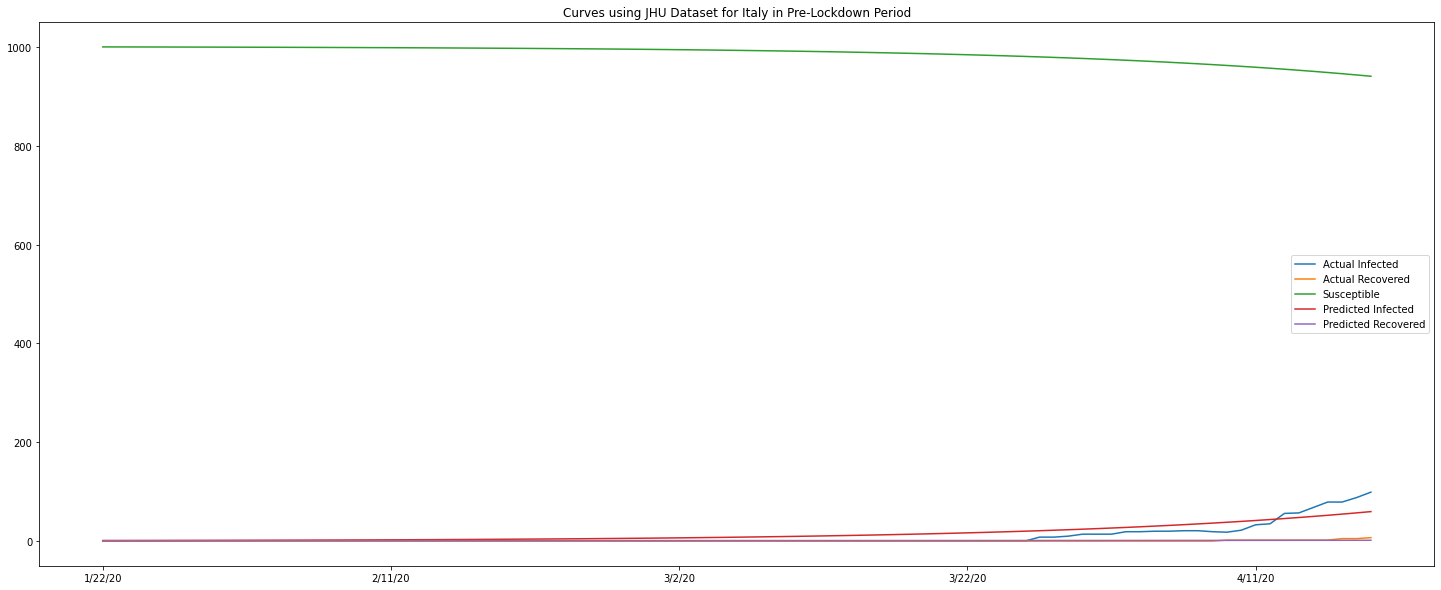

In [ ]:
train(recovered, infected, data)

**Lockdown Period**

In [ ]:
data = df["Active Cases"][:index.index('4/20/20')]
infected = df["Infected"][:index.index('4/20/20')]
recovered = df["Recovered"][:index.index('4/20/20')]

In [ ]:
def loss(point, data, recovered, s_0, i_0, r_0):
    size = len(data)
    beta, gamma = point
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I/s_0, beta*S*I/s_0-gamma*I, gamma*I]
    solution = solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1), vectorized=True)
    l1 = np.sqrt(np.mean((solution.y[1] - data)**2))
    l2 = np.sqrt(np.mean((solution.y[2] - recovered)**2))
    alpha = 0.1
    return alpha * l1 + (1 - alpha) * l2

In [ ]:
pres_fut = np.array(list(data.index.values)+ list((np.array(pd.date_range('4/11/20', periods=50)))))

In [ ]:
def predict(beta, gamma, data, recovered, s_0, i_0, r_0):
    new_index = pres_fut
    size = len(new_index)
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I/s_0, beta*S*I/s_0-gamma*I, gamma*I]
    extended_actual = np.concatenate((data.values, [None] * (size - len(data.values))))
    extended_recovered = np.concatenate((recovered.values, [None] * (size - len(recovered.values))))
    return new_index, extended_actual, extended_recovered, solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1))

In [ ]:
def train(recovered, infected, data):
    recovered = recovered
    infected = infected
    data = data

    optimal = minimize(loss, [0.001, 0.001], args=(data, recovered, s_0, i_0, r_0), method='L-BFGS-B', bounds=[(0.00000001, 2), (0.00000001, 0.4)])
    print(optimal)
    beta, gamma = optimal.x
    new_index, extended_actual, extended_recovered, prediction = predict(beta, gamma, data, recovered, s_0, i_0, r_0)
    df = pd.DataFrame({'Actual Infected': extended_actual, 'Actual Recovered': extended_recovered, 'Susceptible': prediction.y[0], 'Predicted Infected': prediction.y[1], 'Predicted Recovered': prediction.y[2]}, index=new_index)
    fig, ax = plt.subplots(figsize=(25, 10))
    ax.set_title('Curves using JHU Dataset for Italy in Lockdown Period and Prediction for 50 days')
    df.plot(ax=ax)
    print(f"country=Italy, beta={beta:.8f}, gamma={gamma:.8f}, r_0:{(beta/gamma):.8f}")
    return prediction.y[0], prediction.y[1], prediction.y[2]

In [ ]:
print(data[0], infected[0], recovered[0])

0 0 0


In [ ]:
s_0 = 3000
i_0 = 1
r_0 = 1

      fun: 2.29642987446294
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-7.95363775e-05,  3.30313554e-04])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 84
      nit: 6
   status: 0
  success: True
        x: array([0.04742947, 0.00054395])
country=Italy, beta=0.04742947, gamma=0.00054395, r_0:87.19414850


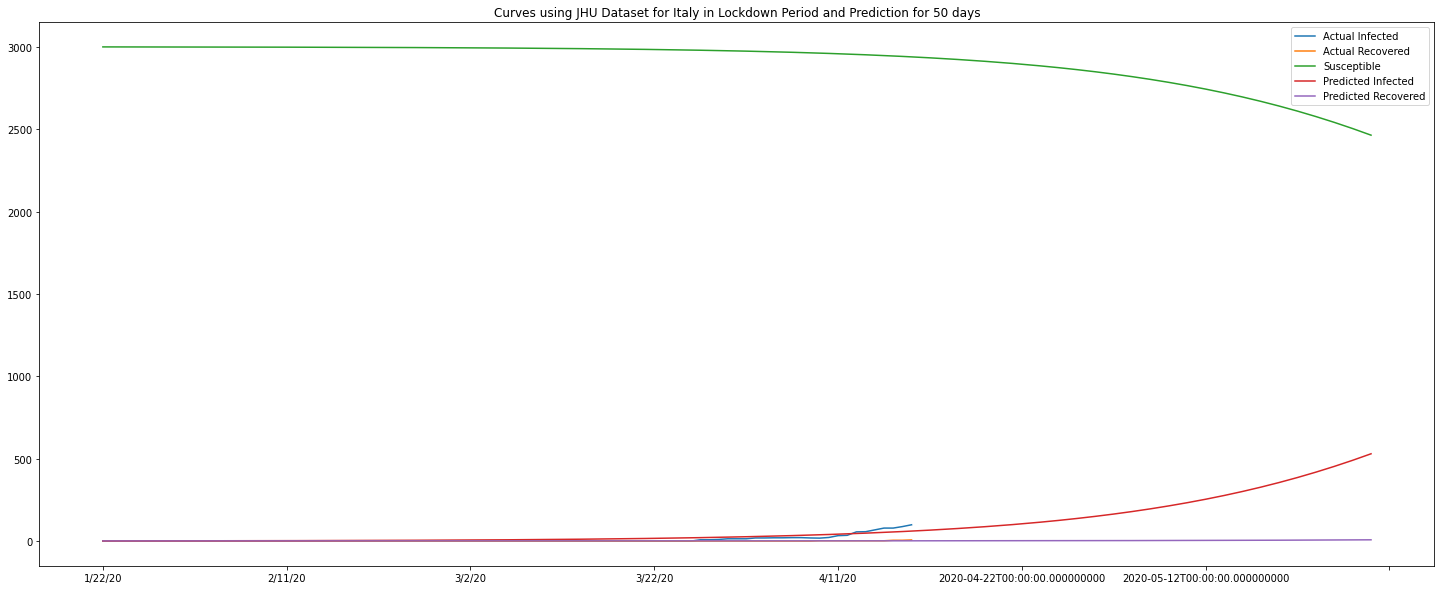

In [ ]:
susceptible, predicted_infected, predicted_recovered = train(recovered, infected, data)

In [ ]:
actual_infected = df["Active Cases"][:len(susceptible)]
actual_recovered = df["Recovered"][:len(susceptible)]

In [ ]:
plot_data = {"Predicted Infected": predicted_infected, "Predicted Recovered": predicted_recovered, "Susceptible": susceptible, "Actual Infected": actual_infected, "Actual Recovered": actual_recovered}
df_plot = pd.DataFrame(data=plot_data)
df_plot

Predicted Infected  ...  Actual Recovered
1/22/20            1.000000  ...                 0
1/23/20            1.048002  ...                 0
1/24/20            1.098307  ...                 0
1/25/20            1.151030  ...                 0
1/26/20            1.206295  ...                 0
...                     ...  ...               ...
6/4/20           453.380224  ...               148
6/5/20           471.648915  ...               151
6/6/20           490.506109  ...               156
6/7/20           509.959235  ...               156
6/8/20           530.015205  ...               159

[139 rows x 5 columns]

In [ ]:
days = list(range(index.index('1/22/20'), index.index('6/8/20')+1))
len(days)

139

In [ ]:
len(df_plot['Predicted Recovered'])

139

In [ ]:
x, y = intersection(days, df_plot['Predicted Infected'], days, df_plot['Predicted Recovered'])

In [ ]:
x

array([0.])

In [ ]:
# start = index.index('3/9/20')
# pw_1 = abs(x[1] - start)
# pw_1

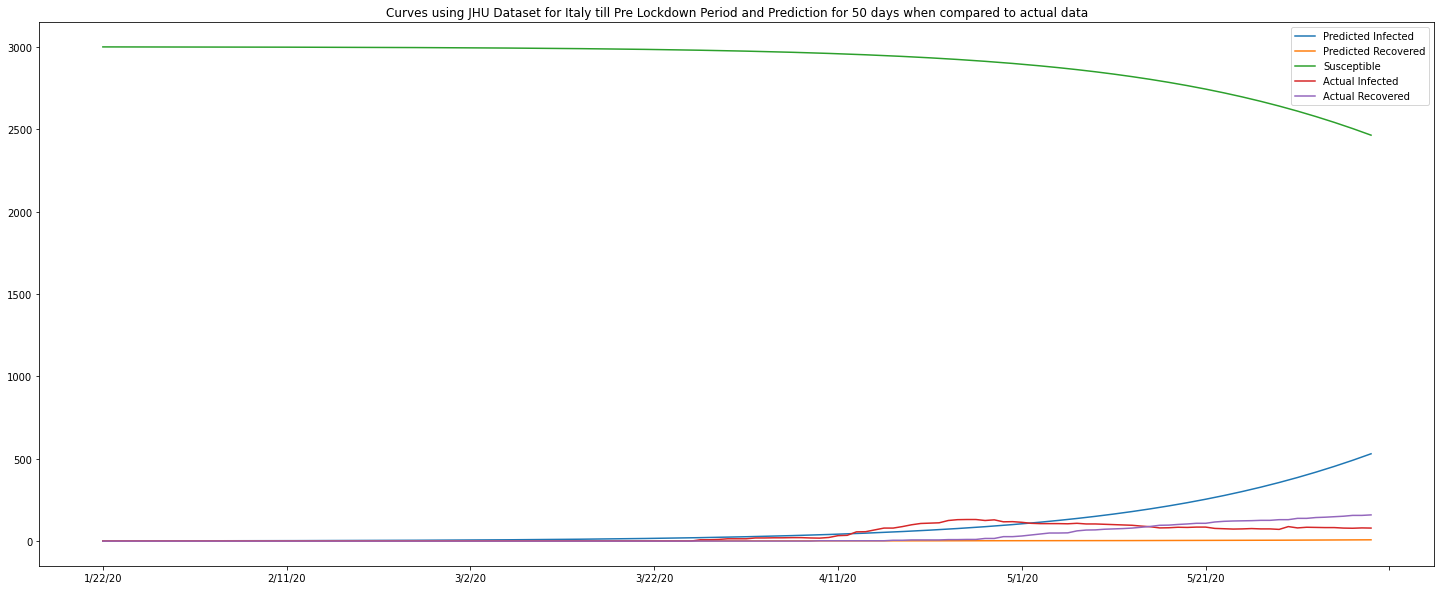

In [ ]:
fig, ax = plt.subplots(figsize=(25, 10))
ax.set_title('Curves using JHU Dataset for Italy till Pre Lockdown Period and Prediction for 50 days when compared to actual data')
df_plot.plot(ax=ax)

**Taking Date till 21/6/2020 for plotting SIR curves**

In [ ]:
data = df["Active Cases"][:index.index('5/21/20')]
infected = df["Infected"][:index.index('5/21/20')]
recovered = df["Recovered"][:index.index('5/21/20')]

In [ ]:
def loss(point, data, recovered, s_0, i_0, r_0):
    size = len(data)
    beta, gamma = point
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I/s_0, beta*S*I/s_0-gamma*I, gamma*I]
    solution = solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1), vectorized=True)
    l1 = np.sqrt(np.mean((solution.y[1] - data)**2))
    l2 = np.sqrt(np.mean((solution.y[2] - recovered)**2))
    alpha = 0.1
    return alpha * l1 + (1 - alpha) * l2

In [ ]:
def predict(beta, gamma, data, recovered, s_0, i_0, r_0):
    new_index = list(data.index.values)
    size = len(new_index)
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I/s_0, beta*S*I/s_0-gamma*I, gamma*I]
    extended_actual = np.concatenate((data.values, [None] * (size - len(data.values))))
    extended_recovered = np.concatenate((recovered.values, [None] * (size - len(recovered.values))))
    return new_index, extended_actual, extended_recovered, solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1))

In [ ]:
def train(recovered, infected, data):
    recovered = recovered
    infected = infected
    data = data

    optimal = minimize(loss, [0.001, 0.001], args=(data, recovered, s_0, i_0, r_0), method='L-BFGS-B', bounds=[(0.00000001, 2), (0.00000001, 0.4)])
    print(optimal)
    beta, gamma = optimal.x
    new_index, extended_actual, extended_recovered, prediction = predict(beta, gamma, data, recovered, s_0, i_0, r_0)
    df = pd.DataFrame({'Actual Infected': extended_actual, 'Actual Recovered': extended_recovered, 'Susceptible': prediction.y[0], 'Predicted Infected': prediction.y[1], 'Predicted Recovered': prediction.y[2]}, index=new_index)
    fig, ax = plt.subplots(figsize=(25, 10))
    ax.set_title('Curves using JHU Dataset for Italy till Lockdown Period')
    df.plot(ax=ax)
    print(f"country=Italy, beta={beta:.8f}, gamma={gamma:.8f}, r_0:{(beta/gamma):.8f}")

In [ ]:
print(data[0], infected[0], recovered[0])

0 0 0


In [ ]:
s_0 = 3000
i_0 = 1
r_0 = 1

      fun: 12.139854779002048
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1.31983313e-04, -5.59552404e-05])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 96
      nit: 10
   status: 0
  success: True
        x: array([0.06583805, 0.02078926])
country=Italy, beta=0.06583805, gamma=0.02078926, r_0:3.16692699


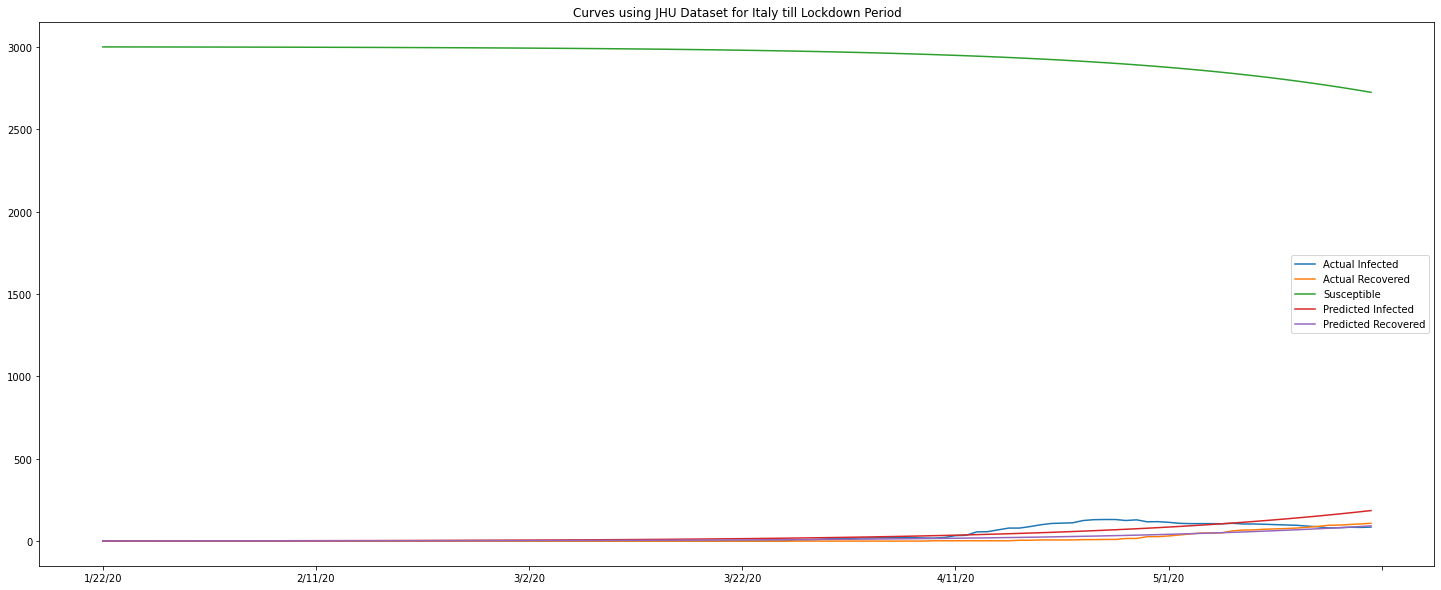

In [ ]:
train(recovered, infected, data)

**Predicting the Curve for next 30 days**

In [ ]:
data = df["Active Cases"][:index.index('5/21/20')]
infected = df["Infected"][:index.index('5/21/20')]
recovered = df["Recovered"][:index.index('5/21/20')]

In [ ]:
def loss(point, data, recovered, s_0, i_0, r_0):
    size = len(data)
    beta, gamma = point
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I/s_0, beta*S*I/s_0-gamma*I, gamma*I]
    solution = solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1), vectorized=True)
    l1 = np.sqrt(np.mean((solution.y[1] - data)**2))
    l2 = np.sqrt(np.mean((solution.y[2] - recovered)**2))
    alpha = 0.1
    return alpha * l1 + (1 - alpha) * l2

In [ ]:
index.index('5/21/20')

120

In [ ]:
pres_fut = np.array(list(data.index.values)+ list((np.array(index[120:170]))))

In [ ]:
def predict(beta, gamma, data, recovered, s_0, i_0, r_0):
    new_index = pres_fut
    size = len(new_index)
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I/s_0, beta*S*I/s_0-gamma*I, gamma*I]
    extended_actual = np.concatenate((data.values, [None] * (size - len(data.values))))
    extended_recovered = np.concatenate((recovered.values, [None] * (size - len(recovered.values))))
    return new_index, extended_actual, extended_recovered, solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1))

In [ ]:
def train(recovered, infected, data):
    recovered = recovered
    infected = infected
    data = data

    optimal = minimize(loss, [0.001, 0.001], args=(data, recovered, s_0, i_0, r_0), method='L-BFGS-B', bounds=[(0.00000001, 2), (0.00000001, 0.4)])
    print(optimal)
    beta, gamma = optimal.x
    new_index, extended_actual, extended_recovered, prediction = predict(beta, gamma, data, recovered, s_0, i_0, r_0)
    df = pd.DataFrame({'Actual Infected': extended_actual, 'Actual Recovered': extended_recovered, 'Susceptible': prediction.y[0], 'Predicted Infected': prediction.y[1], 'Predicted Recovered': prediction.y[2]}, index=new_index)
    fig, ax = plt.subplots(figsize=(25, 10))
    ax.set_title('Curves using JHU Dataset for Italy till Lockdown Period and Prediction for 50 days')
    df.plot(ax=ax)
    print(f"country=Italy, beta={beta:.8f}, gamma={gamma:.8f}, r_0:{(beta/gamma):.8f}")
    return prediction.y[0], prediction.y[1], prediction.y[2]

In [ ]:
print(data[0], infected[0], recovered[0])

0 0 0


In [ ]:
s_0 = 3000
i_0 = 1
r_0 = 1

      fun: 12.139854779002048
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1.31983313e-04, -5.59552404e-05])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 96
      nit: 10
   status: 0
  success: True
        x: array([0.06583805, 0.02078926])
country=Italy, beta=0.06583805, gamma=0.02078926, r_0:3.16692699


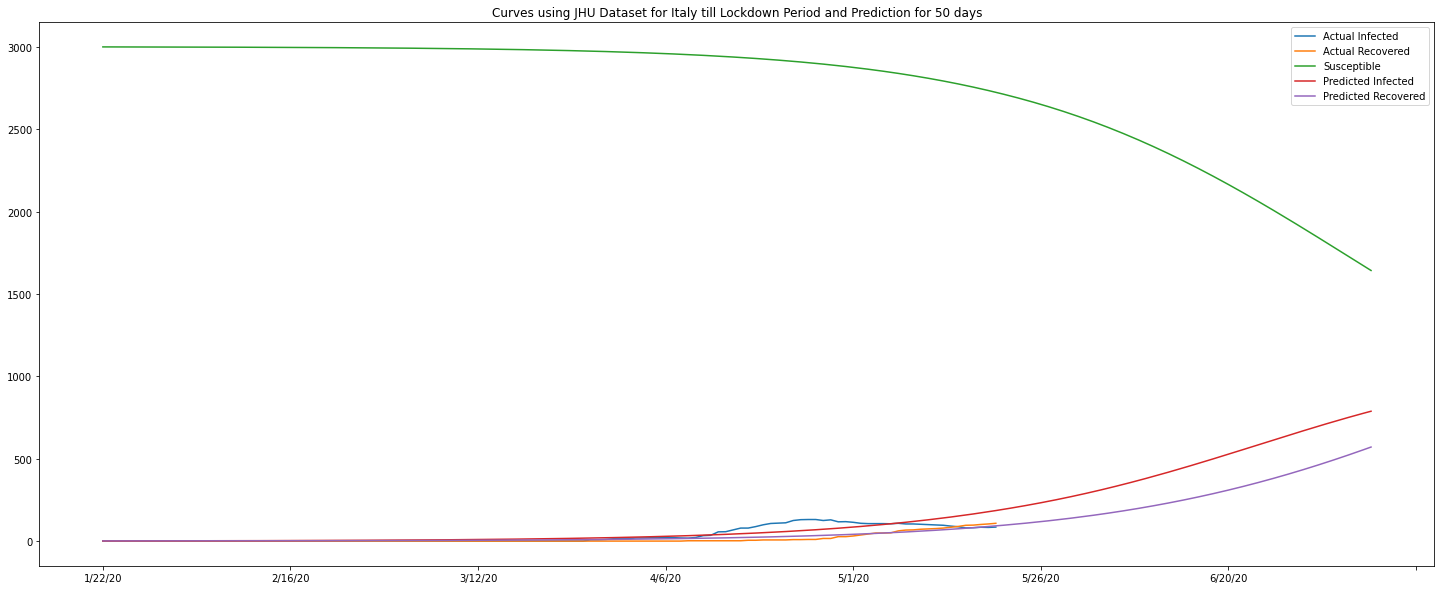

In [ ]:
susceptible, predicted_infected, predicted_recovered = train(recovered, infected, data)

In [ ]:
actual_infected = df["Active Cases"][:len(susceptible)]
actual_recovered = df["Recovered"][:len(susceptible)]

In [ ]:
plot_data = {"Actual Infected": actual_infected, "Actual Recovered": actual_recovered, "Susceptible": susceptible, "Predicted Infected": predicted_infected, "Predicted Recovered": predicted_recovered}
df_plot = pd.DataFrame(data=plot_data)
df_plot

Actual Infected  ... Predicted Recovered
1/22/20               0  ...            1.000000
1/23/20               0  ...            1.021265
1/24/20               0  ...            1.043509
1/25/20               0  ...            1.066780
1/26/20               0  ...            1.091128
...                 ...  ...                 ...
7/5/20               66  ...          507.428363
7/6/20               65  ...          522.904968
7/7/20               65  ...          538.649120
7/8/20               61  ...          554.655447
7/9/20               61  ...          570.918136

[170 rows x 5 columns]

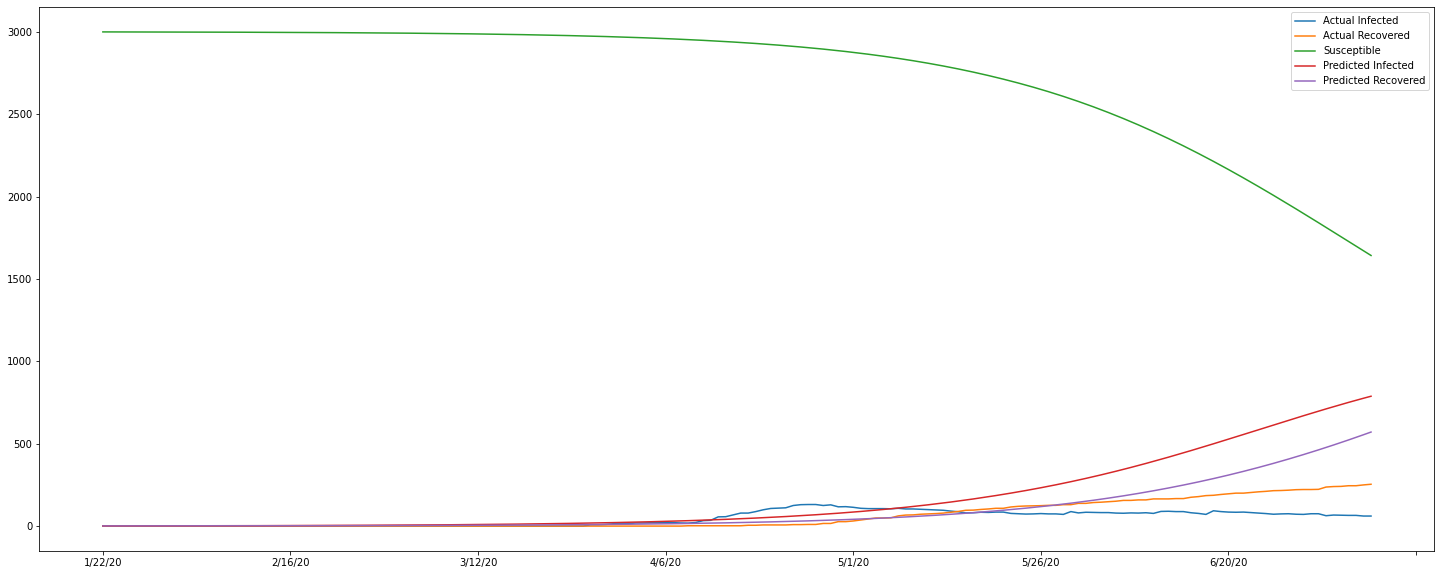

In [ ]:
fig, ax = plt.subplots(figsize=(25, 10))
df_plot.plot(ax=ax)

In [ ]:
!pip install plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig=go.Figure()
fig.add_trace(go.Scatter(x=pres_fut, y=susceptible,
                    mode='lines+markers',name="Active Cases"))

fig.add_trace(go.Scatter(x=pres_fut, y=actual_infected,
                    mode='lines+markers',name="Infected Cases", line=dict(color='red')))

fig.add_trace(go.Scatter(x=pres_fut, y=predicted_infected,
                    mode='lines',name="Predicted Infected",
                    line=dict(color='red', dash='dot')))

fig.add_trace(go.Scatter(x=pres_fut, y=predicted_recovered,
                    mode='lines',name="Predicted Recovered",
                    line=dict(color='green', dash='dot')))
fig.add_trace(go.Scatter(x=pres_fut, y=actual_recovered,
                    mode='lines+markers',name="Recovered Cases", line=dict(color='green')))


fig.update_layout(title="Italy SIR Prediction",
                 xaxis_title="Date",yaxis_title="Covid 19 Cases",
                 legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

**Transfer Function**

Input Signal

In [ ]:
#Sampling Rate
t = np.linspace(0, 300, 300, endpoint=True)

In [ ]:
#pw_1

In [ ]:
square_wave_1 = []
for i in range(index.index('1/22/20'), index.index('3/9/20')):
  square_wave_1.append(0)
while len(square_wave_1) < 300:
  for i in range(0, 40):
    if len(square_wave_1) >= 300:
      break
    else:
      square_wave_1.append(1)
  for i in range(0, 40):
    if len(square_wave_1) >= 300:
      break
    else:
      square_wave_1.append(0)

In [ ]:
len(square_wave_1)

300

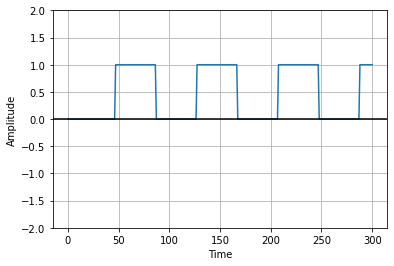

In [ ]:
# Plot the square wave signal 
plt.plot(t, square_wave_1)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.ylim(-2, 2)
plt.show()

Transfer Function

In [ ]:
#After Lockdown
k1 = 0.03539527
k2 = 0.00070738
M = k2/k1
print(k1, k2, M)

0.03539527 0.00070738 0.019985156208725062


In [ ]:
num = [M]
den = [1, M]
transfer_function_1 = signal.TransferFunction(num, den)
transfer_function_1

TransferFunctionContinuous(
array([0.01998516]),
array([1.        , 0.01998516]),
dt: None
)

Square Wave Response

In [ ]:
t_out, y_out_1, x_out = lsim(system=transfer_function_1, T=t, U=square_wave_1)

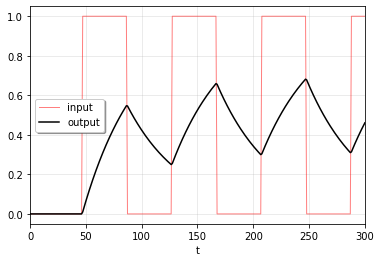

In [ ]:
plt.plot(t, square_wave_1, 'r', alpha=0.5, linewidth=1, label='input')
plt.plot(t_out, y_out_1, 'k', linewidth=1.5, label='output')
plt.legend(loc='best', shadow=True, framealpha=1)
plt.grid(alpha=0.3)
plt.xlabel('t')
plt.xlim(0,300)
plt.show()

# **SIR for Maldives using JHU Dataset**

Dataset - https://github.com/CSSEGISandData/COVID-19 \\
Reference - https://www.lewuathe.com/covid-19-dynamics-with-sir-model.html

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
from scipy.integrate import odeint

In [ ]:
file_path = '/content/time_series_covid19_confirmed_global.csv'
df_confirm = pd.read_csv(file_path)
file_path = '/content/time_series_covid19_recovered_global.csv'
df_recovered = pd.read_csv(file_path)
file_path = '/content/time_series_covid19_deaths_global.csv'
df_dead = pd.read_csv(file_path)

In [ ]:
df_confirm

Province/State      Country/Region        Lat  ...  6/12/21  6/13/21  6/14/21
0              NaN         Afghanistan  33.939110  ...    88740    89861    91458
1              NaN             Albania  41.153300  ...   132449   132459   132461
2              NaN             Algeria  28.033900  ...   133070   133388   133742
3              NaN             Andorra  42.506300  ...    13813    13813    13826
4              NaN              Angola -11.202700  ...    36600    36705    36790
..             ...                 ...        ...  ...      ...      ...      ...
271            NaN             Vietnam  14.058324  ...    10337    10630    10881
272            NaN  West Bank and Gaza  31.952200  ...   311018   311534   311690
273            NaN               Yemen  15.552727  ...     6857     6862     6863
274            NaN              Zambia -13.133897  ...   110332   111746   113134
275            NaN            Zimbabwe -19.015438  ...    39852    39959    40077

[276 rows x 514 columns]

In [ ]:
df_recovered

Province/State      Country/Region        Lat  ...  6/12/21  6/13/21  6/14/21
0              NaN         Afghanistan  33.939110  ...    60939    61410    61706
1              NaN             Albania  41.153300  ...   129826   129842   129865
2              NaN             Algeria  28.033900  ...    92620    92852    93094
3              NaN             Andorra  42.506300  ...    13591    13591    13618
4              NaN              Angola -11.202700  ...    30207    30282    30359
..             ...                 ...        ...  ...      ...      ...      ...
256            NaN             Vietnam  14.058324  ...     3827     3998     4236
257            NaN  West Bank and Gaza  31.952200  ...   302944   303813   304138
258            NaN               Yemen  15.552727  ...     3727     3743     3765
259            NaN              Zambia -13.133897  ...    96646    97756    98994
260            NaN            Zimbabwe -19.015438  ...    36992    37004    37027

[261 rows x 514 columns]

In [ ]:
df_dead

Province/State      Country/Region        Lat  ...  6/12/21  6/13/21  6/14/21
0              NaN         Afghanistan  33.939110  ...     3449     3527     3612
1              NaN             Albania  41.153300  ...     2453     2453     2453
2              NaN             Algeria  28.033900  ...     3565     3571     3579
3              NaN             Andorra  42.506300  ...      127      127      127
4              NaN              Angola -11.202700  ...      825      831      836
..             ...                 ...        ...  ...      ...      ...      ...
271            NaN             Vietnam  14.058324  ...       58       59       59
272            NaN  West Bank and Gaza  31.952200  ...     3524     3533     3539
273            NaN               Yemen  15.552727  ...     1347     1349     1350
274            NaN              Zambia -13.133897  ...     1365     1389     1416
275            NaN            Zimbabwe -19.015438  ...     1632     1632     1635

[276 rows x 514 columns]

In [ ]:
Maldives_confirm = df_confirm.loc[df_confirm['Country/Region'] == 'Maldives']
Maldives_confirm

Province/State Country/Region     Lat  ...  6/12/21  6/13/21  6/14/21
177            NaN       Maldives  3.2028  ...    70077    70301    70673

[1 rows x 514 columns]

In [ ]:
confirmed = Maldives_confirm.iloc[0].loc['1/22/20':]
confirmed

1/22/20        0
1/23/20        0
1/24/20        0
1/25/20        0
1/26/20        0
           ...  
6/10/21    69536
6/11/21    69831
6/12/21    70077
6/13/21    70301
6/14/21    70673
Name: 177, Length: 510, dtype: object

In [ ]:
Maldives_recovered = df_recovered.loc[df_recovered['Country/Region'] == 'Maldives']
Maldives_recovered

Province/State Country/Region     Lat  ...  6/12/21  6/13/21  6/14/21
162            NaN       Maldives  3.2028  ...    58832    60769    61761

[1 rows x 514 columns]

In [ ]:
recovered = Maldives_recovered.iloc[0].loc['1/22/20':]
recovered

1/22/20        0
1/23/20        0
1/24/20        0
1/25/20        0
1/26/20        0
           ...  
6/10/21    55055
6/11/21    56559
6/12/21    58832
6/13/21    60769
6/14/21    61761
Name: 162, Length: 510, dtype: object

In [ ]:
Maldives_dead = df_dead.loc[df_dead['Country/Region'] == 'Maldives']
Maldives_dead

Province/State Country/Region     Lat  ...  6/12/21  6/13/21  6/14/21
177            NaN       Maldives  3.2028  ...      195      197      198

[1 rows x 514 columns]

In [ ]:
dead = Maldives_dead.iloc[0].loc['1/22/20':]
dead

1/22/20      0
1/23/20      0
1/24/20      0
1/25/20      0
1/26/20      0
          ... 
6/10/21    191
6/11/21    192
6/12/21    195
6/13/21    197
6/14/21    198
Name: 177, Length: 510, dtype: object

In [ ]:
print(len(confirmed), len(recovered), len(dead))

510 510 510


In [ ]:
t = np.arange(0, len(confirmed))
len(t)

510

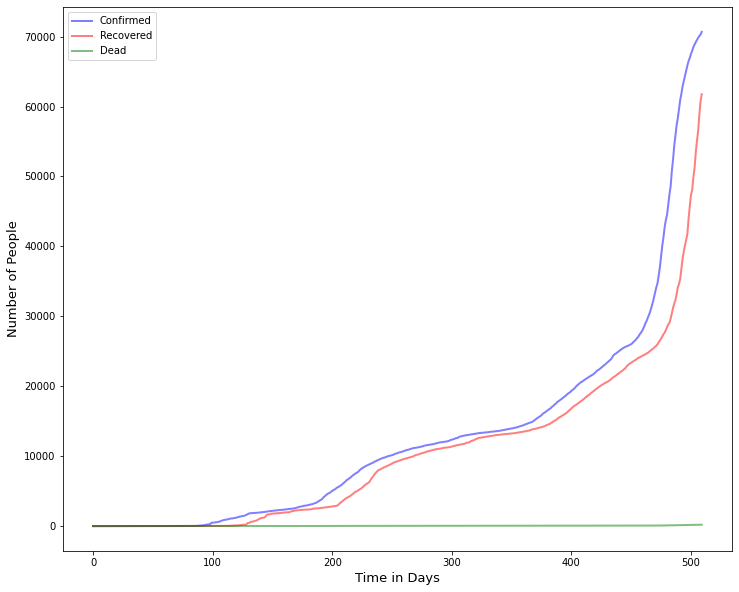

In [ ]:
fig = plt.figure(facecolor='w', figsize=(12,10))
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(t, confirmed, 'b', alpha=0.5, lw=2, label='Confirmed')
ax.plot(t, recovered, 'r', alpha=0.5, lw=2, label='Recovered')
ax.plot(t, dead, 'g', alpha=0.5, lw=2, label='Dead')
ax.set_xlabel('Time in Days', size=13)
ax.set_ylabel('Number of People', size=13)
legend = ax.legend()
plt.show()

In [ ]:
activecases = confirmed - recovered - dead
activecases

1/22/20        0
1/23/20        0
1/24/20        0
1/25/20        0
1/26/20        0
           ...  
6/10/21    14290
6/11/21    13080
6/12/21    11050
6/13/21     9335
6/14/21     8714
Length: 510, dtype: object

In [ ]:
datadf = {"Active Cases": activecases, "Infected": confirmed, "Recovered": recovered}
days = [x for x in range(0,len(activecases))]
df = pd.DataFrame(data=datadf)
df["Days"] = days
df

Active Cases Infected Recovered  Days
1/22/20            0        0         0     0
1/23/20            0        0         0     1
1/24/20            0        0         0     2
1/25/20            0        0         0     3
1/26/20            0        0         0     4
...              ...      ...       ...   ...
6/10/21        14290    69536     55055   505
6/11/21        13080    69831     56559   506
6/12/21        11050    70077     58832   507
6/13/21         9335    70301     60769   508
6/14/21         8714    70673     61761   509

[510 rows x 4 columns]

In [ ]:
index = list(df.index.values)
index.index('3/9/20')

47

**Pre Lockdown Period**

In [ ]:
data = df["Active Cases"][:index.index('4/15/20')]
infected = df["Infected"][:index.index('4/15/20')]
recovered = df["Recovered"][:index.index('4/15/20')]

In [ ]:
def loss(point, data, recovered, s_0, i_0, r_0):
    size = len(data)
    beta, gamma = point
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I/s_0, beta*S*I/s_0-gamma*I, gamma*I]
    solution = solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1), vectorized=True)
    l1 = np.sqrt(np.mean((solution.y[1] - data)**2))
    l2 = np.sqrt(np.mean((solution.y[2] - recovered)**2))
    alpha = 0.1
    return alpha * l1 + (1 - alpha) * l2

In [ ]:
def predict(beta, gamma, data, recovered, s_0, i_0, r_0):
    new_index = list(data.index.values)
    size = len(new_index)
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I/s_0, beta*S*I/s_0-gamma*I, gamma*I]
    extended_actual = np.concatenate((data.values, [None] * (size - len(data.values))))
    extended_recovered = np.concatenate((recovered.values, [None] * (size - len(recovered.values))))
    return new_index, extended_actual, extended_recovered, solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1))

In [ ]:
def train(recovered, infected, data):
    recovered = recovered
    infected = infected
    data = data

    optimal = minimize(loss, [0.001, 0.001], args=(data, recovered, s_0, i_0, r_0), method='L-BFGS-B', bounds=[(0.00000001, 2), (0.00000001, 0.4)])
    print(optimal)
    beta, gamma = optimal.x
    new_index, extended_actual, extended_recovered, prediction = predict(beta, gamma, data, recovered, s_0, i_0, r_0)
    df = pd.DataFrame({'Actual Infected': extended_actual, 'Actual Recovered': extended_recovered, 'Susceptible': prediction.y[0], 'Predicted Infected': prediction.y[1], 'Predicted Recovered': prediction.y[2]}, index=new_index)
    fig, ax = plt.subplots(figsize=(25, 10))
    ax.set_title('Curves using JHU Dataset for Italy in Pre-Lockdown Period')
    df.plot(ax=ax)
    print(f"country=Italy, beta={beta:.8f}, gamma={gamma:.8f}, r_0:{(beta/gamma):.8f}")

In [ ]:
s_0 = 200
i_0 = 1
r_0 = 1

      fun: 3.301194544756374
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-3.99680289e-07,  3.99680289e-07])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 57
      nit: 9
   status: 0
  success: True
        x: array([0.06136127, 0.02574847])
country=Italy, beta=0.06136127, gamma=0.02574847, r_0:2.38310410


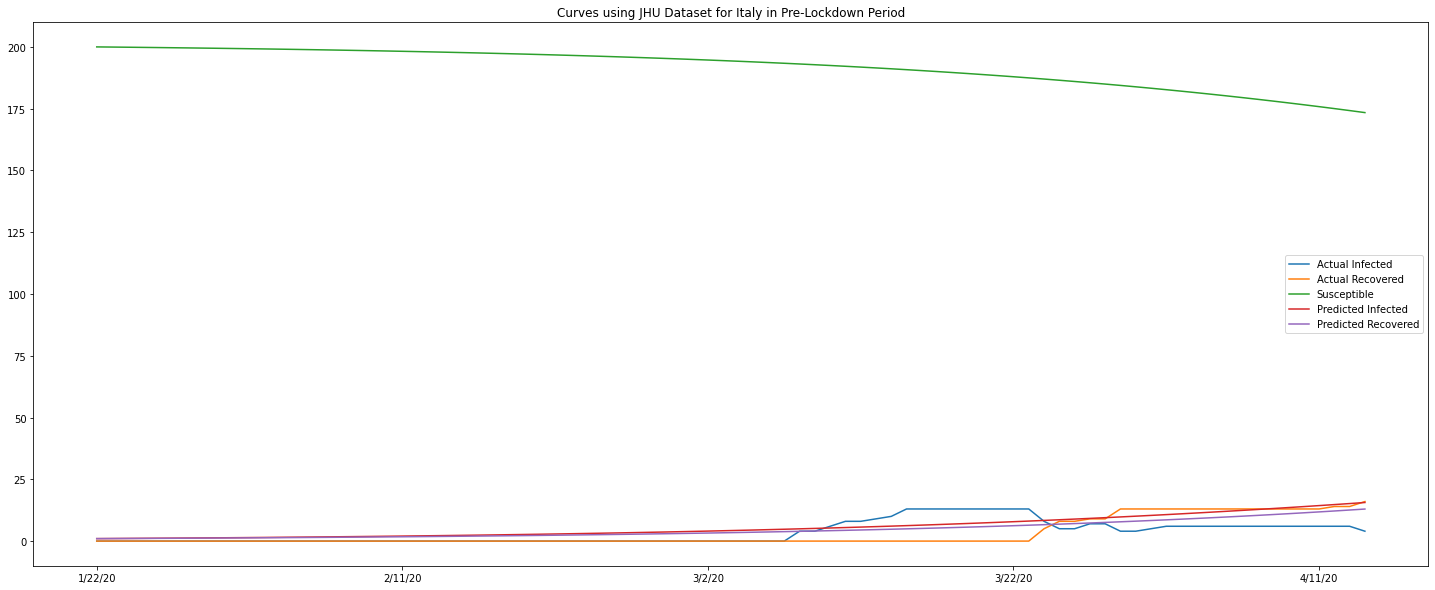

In [ ]:
train(recovered, infected, data)

**Lockdown Period**

In [ ]:
data = df["Active Cases"][:index.index('4/15/20')]
infected = df["Infected"][:index.index('4/15/20')]
recovered = df["Recovered"][:index.index('4/15/20')]

In [ ]:
def loss(point, data, recovered, s_0, i_0, r_0):
    size = len(data)
    beta, gamma = point
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I/s_0, beta*S*I/s_0-gamma*I, gamma*I]
    solution = solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1), vectorized=True)
    l1 = np.sqrt(np.mean((solution.y[1] - data)**2))
    l2 = np.sqrt(np.mean((solution.y[2] - recovered)**2))
    alpha = 0.1
    return alpha * l1 + (1 - alpha) * l2

In [ ]:
pres_fut = np.array(list(data.index.values)+ list((np.array(pd.date_range('4/15/20', periods=50)))))

In [ ]:
def predict(beta, gamma, data, recovered, s_0, i_0, r_0):
    new_index = pres_fut
    size = len(new_index)
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I/s_0, beta*S*I/s_0-gamma*I, gamma*I]
    extended_actual = np.concatenate((data.values, [None] * (size - len(data.values))))
    extended_recovered = np.concatenate((recovered.values, [None] * (size - len(recovered.values))))
    return new_index, extended_actual, extended_recovered, solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1))

In [ ]:
def train(recovered, infected, data):
    recovered = recovered
    infected = infected
    data = data

    optimal = minimize(loss, [0.001, 0.001], args=(data, recovered, s_0, i_0, r_0), method='L-BFGS-B', bounds=[(0.00000001, 2), (0.00000001, 0.4)])
    print(optimal)
    beta, gamma = optimal.x
    new_index, extended_actual, extended_recovered, prediction = predict(beta, gamma, data, recovered, s_0, i_0, r_0)
    df = pd.DataFrame({'Actual Infected': extended_actual, 'Actual Recovered': extended_recovered, 'Susceptible': prediction.y[0], 'Predicted Infected': prediction.y[1], 'Predicted Recovered': prediction.y[2]}, index=new_index)
    fig, ax = plt.subplots(figsize=(25, 10))
    ax.set_title('Curves using JHU Dataset for Italy in Lockdown Period and Prediction for 50 days')
    df.plot(ax=ax)
    print(f"country=Italy, beta={beta:.8f}, gamma={gamma:.8f}, r_0:{(beta/gamma):.8f}")
    return prediction.y[0], prediction.y[1], prediction.y[2]

In [ ]:
print(data[0], infected[0], recovered[0])

0 0 0


In [ ]:
s_0 = 3000
i_0 = 1
r_0 = 1

      fun: 3.297986759524311
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1.58983937e-05, -1.96731520e-05])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 78
      nit: 11
   status: 0
  success: True
        x: array([0.06040991, 0.0266463 ])
country=Italy, beta=0.06040991, gamma=0.02664630, r_0:2.26710343


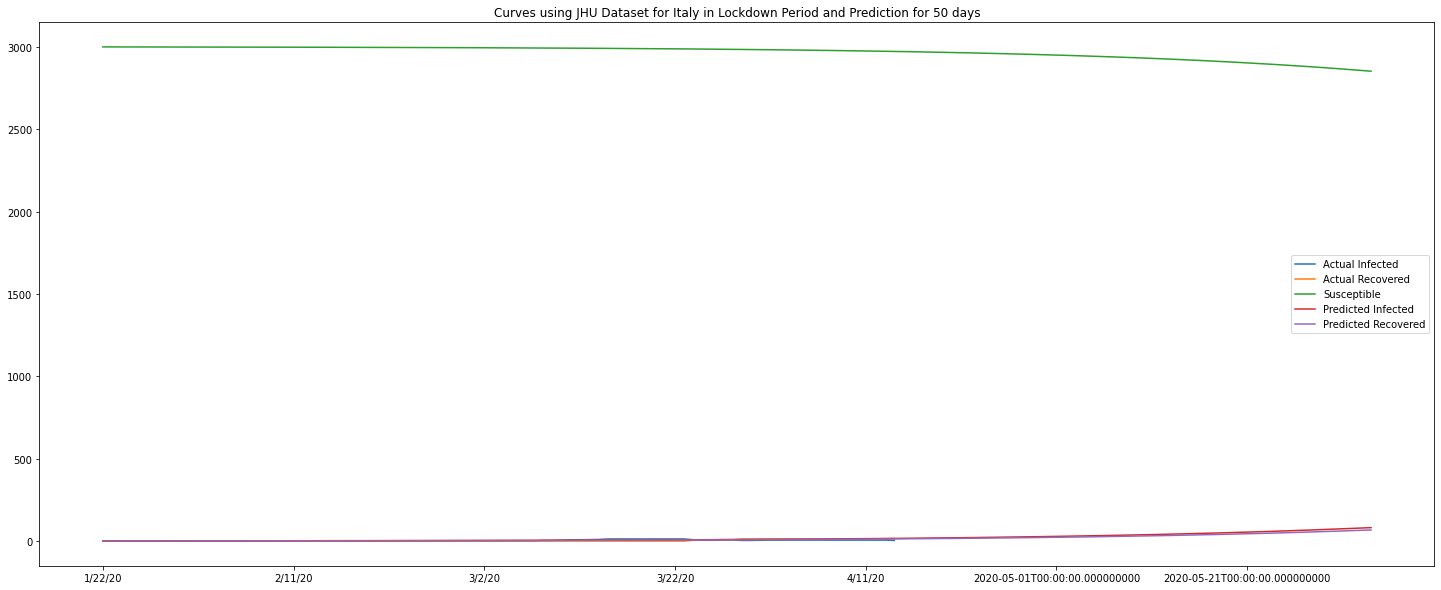

In [ ]:
susceptible, predicted_infected, predicted_recovered = train(recovered, infected, data)

In [ ]:
actual_infected = df["Active Cases"][:len(susceptible)]
actual_recovered = df["Recovered"][:len(susceptible)]

In [ ]:
plot_data = {"Predicted Infected": predicted_infected, "Predicted Recovered": predicted_recovered, "Susceptible": susceptible, "Actual Infected": actual_infected, "Actual Recovered": actual_recovered}
df_plot = pd.DataFrame(data=plot_data)
df_plot

Predicted Infected  ...  Actual Recovered
1/22/20            1.000000  ...                 0
1/23/20            1.034339  ...                 0
1/24/20            1.069857  ...                 0
1/25/20            1.106593  ...                 0
1/26/20            1.144592  ...                 0
...                     ...  ...               ...
5/30/20           72.268796  ...               406
5/31/20           74.552764  ...               453
6/1/20            76.902076  ...               488
6/2/20            79.318183  ...               608
6/3/20            81.802554  ...               644

[134 rows x 5 columns]

In [ ]:
days = list(range(index.index('1/22/20'), index.index('6/3/20')+1))
len(days)

134

In [ ]:
len(df_plot['Predicted Recovered'])

134

In [ ]:
x, y = intersection(days, df_plot['Predicted Infected'], days, df_plot['Predicted Recovered'])

In [ ]:
# start = index.index('4/15/20')
# pw_1 = abs(x[1] - start)
# pw_1

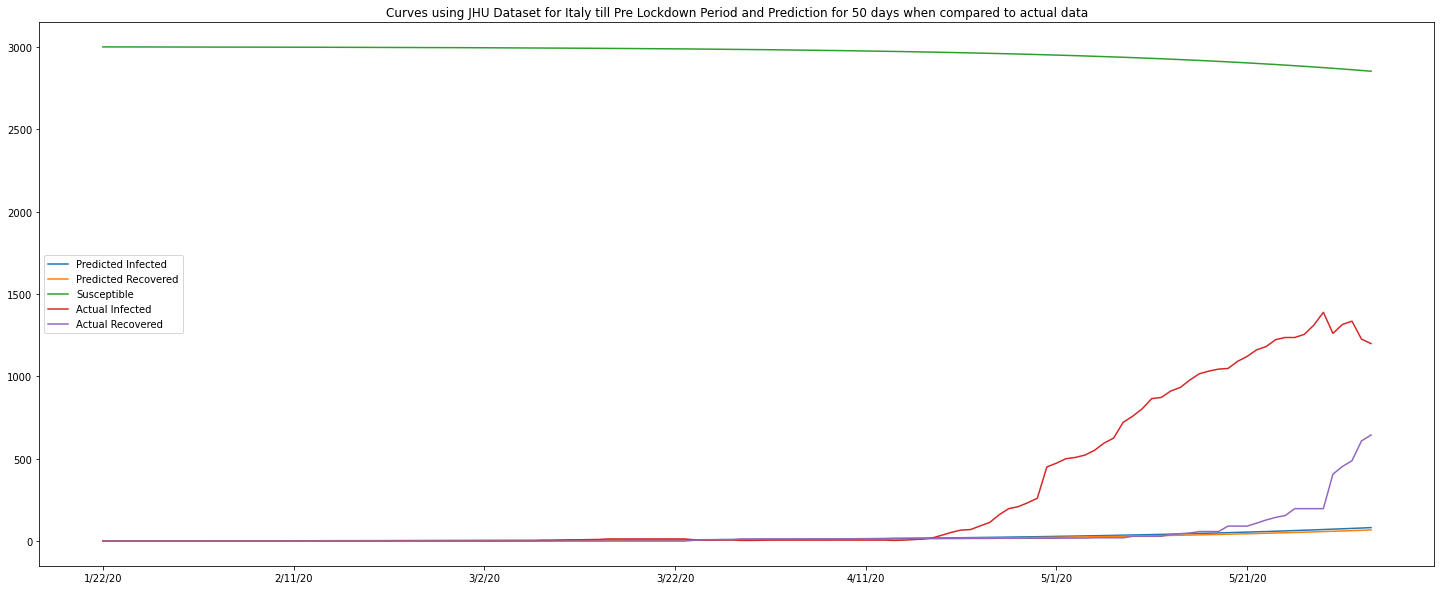

In [ ]:
fig, ax = plt.subplots(figsize=(25, 10))
ax.set_title('Curves using JHU Dataset for Italy till Pre Lockdown Period and Prediction for 50 days when compared to actual data')
df_plot.plot(ax=ax)

**Taking data till 6/3/20 for plotting SIR curves**

In [ ]:
data = df["Active Cases"][:index.index('6/3/20')]
infected = df["Infected"][:index.index('6/3/20')]
recovered = df["Recovered"][:index.index('6/3/20')]

In [ ]:
def loss(point, data, recovered, s_0, i_0, r_0):
    size = len(data)
    beta, gamma = point
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I/s_0, beta*S*I/s_0-gamma*I, gamma*I]
    solution = solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1), vectorized=True)
    l1 = np.sqrt(np.mean((solution.y[1] - data)**2))
    l2 = np.sqrt(np.mean((solution.y[2] - recovered)**2))
    alpha = 0.1
    return alpha * l1 + (1 - alpha) * l2

In [ ]:
def predict(beta, gamma, data, recovered, s_0, i_0, r_0):
    new_index = list(data.index.values)
    size = len(new_index)
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I/s_0, beta*S*I/s_0-gamma*I, gamma*I]
    extended_actual = np.concatenate((data.values, [None] * (size - len(data.values))))
    extended_recovered = np.concatenate((recovered.values, [None] * (size - len(recovered.values))))
    return new_index, extended_actual, extended_recovered, solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1))

In [ ]:
def train(recovered, infected, data):
    recovered = recovered
    infected = infected
    data = data

    optimal = minimize(loss, [0.001, 0.001], args=(data, recovered, s_0, i_0, r_0), method='L-BFGS-B', bounds=[(0.00000001, 2), (0.00000001, 0.4)])
    print(optimal)
    beta, gamma = optimal.x
    new_index, extended_actual, extended_recovered, prediction = predict(beta, gamma, data, recovered, s_0, i_0, r_0)
    df = pd.DataFrame({'Actual Infected': extended_actual, 'Actual Recovered': extended_recovered, 'Susceptible': prediction.y[0], 'Predicted Infected': prediction.y[1], 'Predicted Recovered': prediction.y[2]}, index=new_index)
    fig, ax = plt.subplots(figsize=(25, 10))
    ax.set_title('Curves using JHU Dataset for Italy till Lockdown Period')
    df.plot(ax=ax)
    print(f"country=Italy, beta={beta:.8f}, gamma={gamma:.8f}, r_0:{(beta/gamma):.8f}")

In [ ]:
print(data[0], infected[0], recovered[0])

0 0 0


In [ ]:
s_0 = 3000
i_0 = 1
r_0 = 1

      fun: 53.758076229174705
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 3.26849658e-05, -2.18847163e-04])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 96
      nit: 7
   status: 0
  success: True
        x: array([0.07036964, 0.00750968])
country=Italy, beta=0.07036964, gamma=0.00750968, r_0:9.37052365


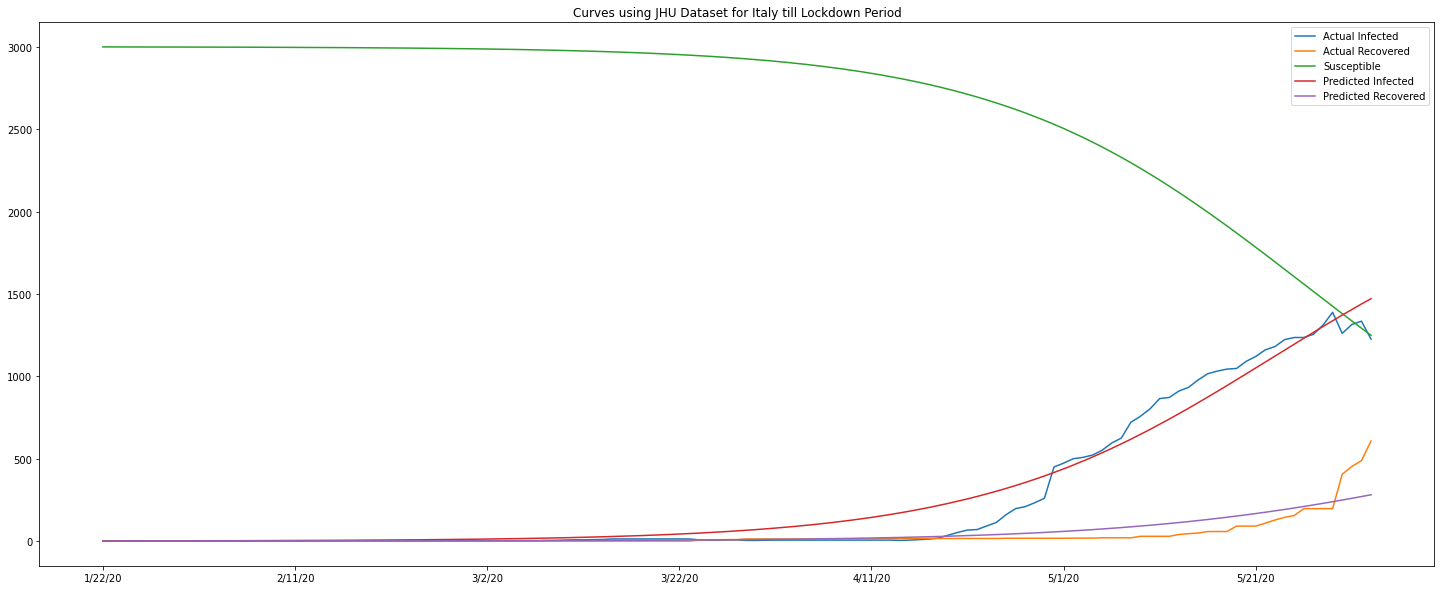

In [ ]:
train(recovered, infected, data)

**Predicting the curve for next 30 days**

In [ ]:
data = df["Active Cases"][:index.index('6/3/20')]
infected = df["Infected"][:index.index('6/3/20')]
recovered = df["Recovered"][:index.index('6/3/20')]

In [ ]:
def loss(point, data, recovered, s_0, i_0, r_0):
    size = len(data)
    beta, gamma = point
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I/s_0, beta*S*I/s_0-gamma*I, gamma*I]
    solution = solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1), vectorized=True)
    l1 = np.sqrt(np.mean((solution.y[1] - data)**2))
    l2 = np.sqrt(np.mean((solution.y[2] - recovered)**2))
    alpha = 0.1
    return alpha * l1 + (1 - alpha) * l2

In [ ]:
pres_fut = np.array(list(data.index.values)+ list((np.array(index[120:170]))))

In [ ]:
def predict(beta, gamma, data, recovered, s_0, i_0, r_0):
    new_index = pres_fut
    size = len(new_index)
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I/s_0, beta*S*I/s_0-gamma*I, gamma*I]
    extended_actual = np.concatenate((data.values, [None] * (size - len(data.values))))
    extended_recovered = np.concatenate((recovered.values, [None] * (size - len(recovered.values))))
    return new_index, extended_actual, extended_recovered, solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1))

In [ ]:
def train(recovered, infected, data):
    recovered = recovered
    infected = infected
    data = data

    optimal = minimize(loss, [0.001, 0.001], args=(data, recovered, s_0, i_0, r_0), method='L-BFGS-B', bounds=[(0.00000001, 2), (0.00000001, 0.4)])
    print(optimal)
    beta, gamma = optimal.x
    new_index, extended_actual, extended_recovered, prediction = predict(beta, gamma, data, recovered, s_0, i_0, r_0)
    df = pd.DataFrame({'Actual Infected': extended_actual, 'Actual Recovered': extended_recovered, 'Susceptible': prediction.y[0], 'Predicted Infected': prediction.y[1], 'Predicted Recovered': prediction.y[2]}, index=new_index)
    fig, ax = plt.subplots(figsize=(25, 10))
    ax.set_title('Curves using JHU Dataset for Italy till Lockdown Period and Prediction for 50 days')
    df.plot(ax=ax)
    print(f"country=Italy, beta={beta:.8f}, gamma={gamma:.8f}, r_0:{(beta/gamma):.8f}")
    return prediction.y[0], prediction.y[1], prediction.y[2]

In [ ]:
print(data[0], infected[0], recovered[0])

0 0 0


In [ ]:
s_0 = 3000
i_0 = 1
r_0 = 1

      fun: 53.758076229174705
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 3.26849658e-05, -2.18847163e-04])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 96
      nit: 7
   status: 0
  success: True
        x: array([0.07036964, 0.00750968])
country=Italy, beta=0.07036964, gamma=0.00750968, r_0:9.37052365


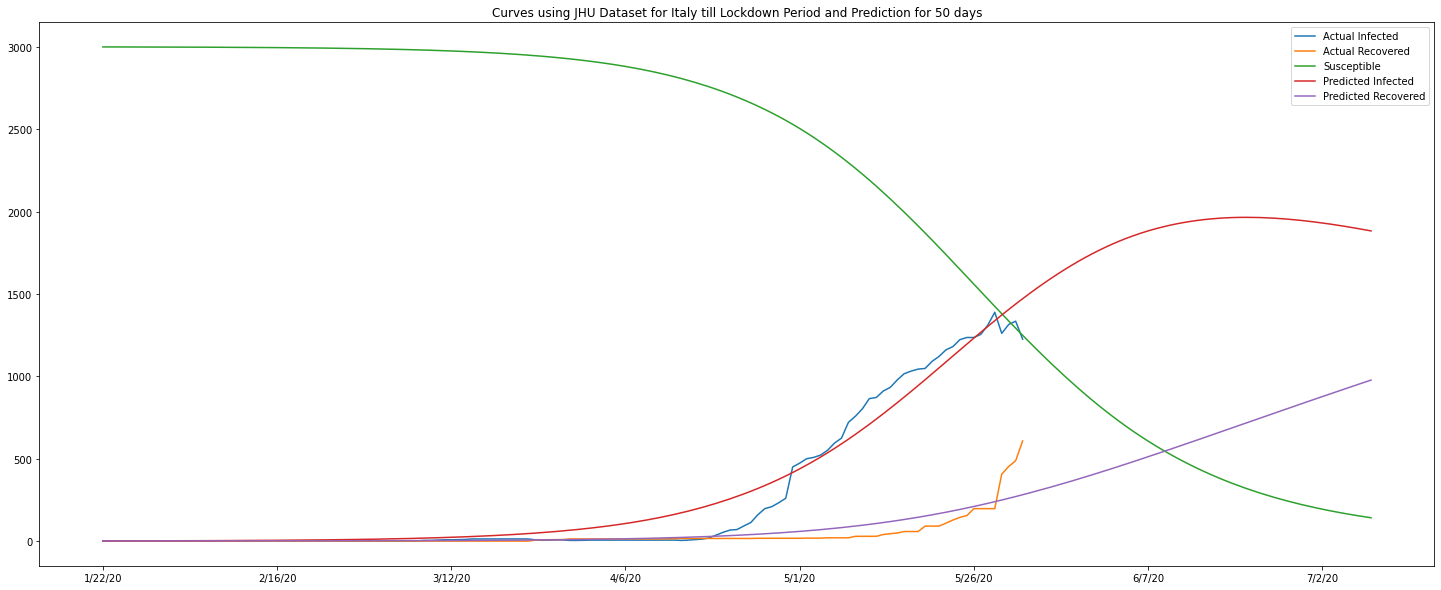

In [ ]:
susceptible, predicted_infected, predicted_recovered = train(recovered, infected, data)

In [ ]:
actual_infected = df["Active Cases"][:len(susceptible)]
actual_recovered = df["Recovered"][:len(susceptible)]

In [ ]:
plot_data = {"Actual Infected": actual_infected, "Actual Recovered": actual_recovered, "Susceptible": susceptible, "Predicted Infected": predicted_infected, "Predicted Recovered": predicted_recovered}
df_plot = pd.DataFrame(data=plot_data)
df_plot

Actual Infected  ... Predicted Recovered
1/22/20               0  ...            1.000000
1/23/20               0  ...            1.007751
1/24/20               0  ...            1.016004
1/25/20               0  ...            1.024795
1/26/20               0  ...            1.034159
...                 ...  ...                 ...
7/18/20             561  ...          920.454674
7/19/20             589  ...          934.790486
7/20/20             615  ...          949.073192
7/21/20             632  ...          963.300559
7/22/20             691  ...          977.470493

[183 rows x 5 columns]

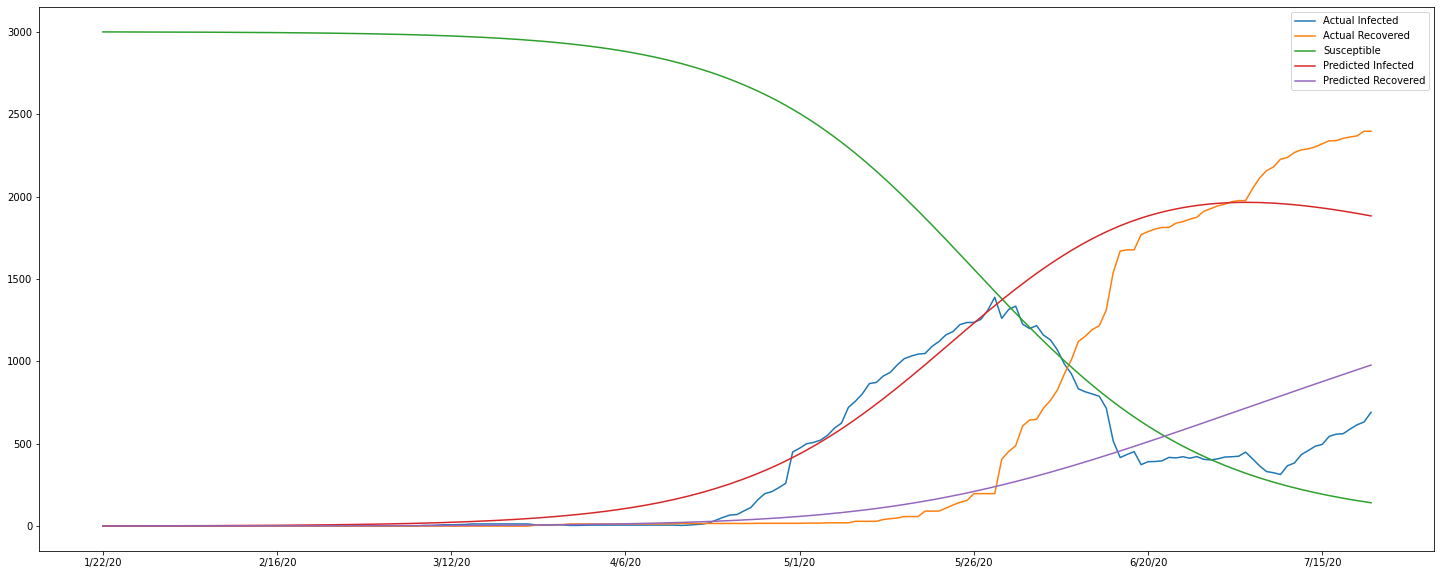

In [ ]:
fig, ax = plt.subplots(figsize=(25, 10))
df_plot.plot(ax=ax)

In [ ]:
!pip install plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig=go.Figure()
fig.add_trace(go.Scatter(x=pres_fut, y=susceptible,
                    mode='lines+markers',name="Active Cases"))

fig.add_trace(go.Scatter(x=pres_fut, y=actual_infected,
                    mode='lines+markers',name="Infected Cases", line=dict(color='red')))

fig.add_trace(go.Scatter(x=pres_fut, y=predicted_infected,
                    mode='lines',name="Predicted Infected",
                    line=dict(color='red', dash='dot')))

fig.add_trace(go.Scatter(x=pres_fut, y=predicted_recovered,
                    mode='lines',name="Predicted Recovered",
                    line=dict(color='green', dash='dot')))
fig.add_trace(go.Scatter(x=pres_fut, y=actual_recovered,
                    mode='lines+markers',name="Recovered Cases", line=dict(color='green')))


fig.update_layout(title="Italy SIR Prediction",
                 xaxis_title="Date",yaxis_title="Covid 19 Cases",
                 legend=dict(x=0,y=1,traceorder="normal"))
fig.show()